# **Install Packages**

In [1]:
!pip install convokit # used to access reddit corpus
!pip install codeswitch # nlp tool for hinglish language identification, pos tagging
!pip install cleantext # used to clean raw text data
!pip install demoji # used to remove presence of emojis from text

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 14.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 kB 11.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 120.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.6/313.6 kB 37.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 84.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 136.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 336.4/336.4 kB 37.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 28.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.1/76.1 MB 30.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 45.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━

# **Get Reddit Repo Lists**

In [1]:
# Allows us to read/write files that are present in personal drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd

# The subreddits_file contains a list of subreddits relevant to India and Hindi
subreddits_file = open(r'/content/drive/MyDrive/CS521_FinalProject/Resources/unfamiliar_indian_subreddits.txt', 'r')

# The below code creates a dataframe containing information about each subreddit
# and the number of utterances it contains
data = []
for line in subreddits_file:
  subreddit = line[0:line.index(".corpus")]
  count = int(line[line.index(":")+3:].strip())
  # print(subreddit, count)
  data.append([subreddit, count])

subreddits_df = pd.DataFrame(data, columns=['subreddits', 'num_utterances'])
subreddits_df = subreddits_df.sort_values(by=['num_utterances'], ascending=False)

In [4]:
subreddits_df.head(10)

,subreddits,num_utterances
540,india,1091511572
146,IndiaSpeaks,70935562
641,indianews,37117328
684,indianpeoplefacebook,22954179
116,IndiaNonPolitical,15493474
93,IndiaInvestments,14645091
302,IndianGaming,14526720
508,IndiansGoneWild,10914429
259,IndianCountry,9184949
293,IndianFood,8383823


In [5]:
print("Total utterances across all subreddits:", subreddits_df['num_utterances'].sum())
print("Total subreddits:", len(subreddits_df))

Total utterances across all subreddits: 1361335818
Total subreddits: 833


# **Merge All Dataframes**

In [6]:
from convokit import Corpus, download
"""
The subreddit we will be working with for this project is IndiaSpeaks
It is a general subreddit ews, entertainment, science & technology, sports, history
& culture, economy and geopolitics related to India.
"""
master_corpus = Corpus(filename=download("subreddit-IndiaSpeaks")) #download data from the IndiaSpeaks subreddit
total_utter_count = len(master_corpus.utterances) # store the total number of utterances in this subreddit

"""
The below code merges the data from all India/Hindi related subreddits into one dataframe
Uncomment only if enough compute power and storage is available
Otherwise continue to work with IndiaSpeaks subreddit as it is large and general
"""
# for subreddit in all_subreddits:
#   subreddit_name = "subreddit-" + subreddit
#   print("Currently downloading", subreddit_name, "...")
#   corpus = Corpus(filename=download(subreddit_name))
#   master_corpus =  Corpus.merge(master_corpus, corpus)
#   total_utter_count += len(corpus.utterances)

print(total_utter_count)

No configuration file found at /root/.convokit/config.yml; writing with contents: 
# Default Backend Parameters
db_host: localhost:27017
data_directory: ~/.convokit/saved-corpora
model_directory: ~/.convokit/saved-models
default_backend: mem
532696


# **Cleaning**

In [7]:
from codeswitch.codeswitch import LanguageIdentification # import hinglish language identification tool
lid = LanguageIdentification('hin-eng') # load model to classify words

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/991 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/711M [00:00<?, ?B/s]

Some weights of the model checkpoint at sagorsarker/codeswitch-hineng-lid-lince were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Model Download Completed!


In [8]:
import cleantext # used to clean raw text data
import demoji # used to remove presence of emojis
cleaned = 0
def clean_utterance(text):
  global cleaned
  print((cleaned/len(master_corpus)) * 100, "% Cleaned")
  cleaned += 1
  text = cleantext.clean(text, extra_spaces=True, lowercase=True, numbers=True, punct=True)
  text = demoji.replace(text, "")
  return text

In [9]:
# extract just the utterances from the entire corpus
master_corpus = master_corpus.get_utterances_dataframe()
# remove empty texts form dataframe
master_corpus = master_corpus[(master_corpus["text"] != "[removed]") & (master_corpus["text"] != "") & (master_corpus["text"] != "[deleted]")]

In [10]:
# clean all utterances
master_corpus["text"] = master_corpus["text"].apply(clean_utterance)

0.0 % Cleaned


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Streaming output truncated to the last 5000 lines.
98.90676928458983 % Cleaned
98.90698793073291 % Cleaned
98.90720657687598 % Cleaned
98.90742522301906 % Cleaned
98.90764386916214 % Cleaned
98.90786251530524 % Cleaned
98.90808116144831 % Cleaned
98.90829980759139 % Cleaned
98.90851845373447 % Cleaned
98.90873709987756 % Cleaned
98.90895574602064 % Cleaned
98.90917439216372 % Cleaned
98.9093930383068 % Cleaned
98.90961168444989 % Cleaned
98.90983033059297 % Cleaned
98.91004897673605 % Cleaned
98.91026762287913 % Cleaned
98.91048626902221 % Cleaned
98.9107049151653 % Cleaned
98.91092356130838 % Cleaned
98.91114220745146 % Cleaned
98.91136085359454 % Cleaned
98.91157949973763 % Cleaned
98.91179814588071 % Cleaned
98.91201679202379 % Cleaned
98.91223543816687 % Cleaned
98.91245408430996 % Cleaned
98.91267273045304 % Cleaned
98.91289137659611 % Cleaned
98.9131100227392 % Cleaned
98.91332866888229 % Cleaned
98.91354731502537 % Cleaned
98.91376596116844 % Cleaned
98.91398460731152 % Cleaned


In [11]:
# remove empty text again after cleaning existing text
master_corpus = master_corpus[(master_corpus["text"].str.strip() != "")]

# Cleaning takes a while. Store this file as a csv file into drive so we won't have run code again
master_corpus.to_csv(r'/content/drive/MyDrive/CS521_FinalProject/Resources/cleaned_corpus.csv')

# **Break Down Data**

In [ ]:
# Reload the file into master corpus in case the runtime disconnected -- no need to run above cells
import pandas as pd
master_corpus = pd.read_csv(r'/content/drive/MyDrive/CS521_FinalProject/Resources/cleaned_corpus.csv')

In [13]:
# master_corpus (which contains IndiaSpeaks subreddit) still has a lot of data
# working with all the data at once will give us runtime issues so we need to do
# it in batches or make it smaller
corpus_size = len(master_corpus)
slice_size = corpus_size//30
print("Corpus size:", corpus_size)
print("Slice size:", slice_size)
# We are going to be working with 15k texts specifically

Corpus size: 454954
Slice size: 15165


In [14]:
# We need to slice the dataframe and perform batch processing so we don't get a runtime error from running the code for too long
master_corpus1 = master_corpus.iloc[0:slice_size]
# master_corpus2 = master_corpus.iloc[slice_count:slice_count*2]
# master_corpus3 = master_corpus.iloc[slice_count*2:slice_count*3]
# master_corpus4 = master_corpus.iloc[slice_count*3:total_utter_count]

# **Filter out Hinglish Text**

In [15]:
"""
This function determines whether a piece of text is Hinglish.
The condition for a text to qualify is that it should have at
least 20% Hindi and 20% English.
"""
utter_checked = 1 # this keeps track of the number of texts the below function has checked if it is hinglish
hinglish_found = 0 # this keeps track of the number of hinglish texts dounf

def isHinglish (text):
  global hinglish_found
  global utter_checked
  print(utter_checked/len(master_corpus) * 100, "% Checked")
  utter_checked += 1
  if isinstance(text, str) and text: # check if text is string and not null
    word_list = text.split() # get the list of words in text

    hin_count = 0
    eng_count = 0

    # categorize each word in text as either hindi or english
    result = lid.identify(text)
    for map in result:
      if "#" in map['word']:
        # This is from a splitted word.
        # Already has been counted. Ignore.
        continue
      else:
        if map['entity'] == "hin":
          # print("hindi", map['word'])
          hin_count += 1
        else:
          # print("english", map['word'])
          eng_count += 1
    # calculate the percentages of hindi and english text
    hin_pct = round((hin_count/len(word_list))*100, 2)
    eng_pct = round((eng_count/len(word_list))*100, 2)
    # print("Hindi percentage: ", hin_pct)
    # print("English percentage: ", eng_pct)

    # A text will only be considered Hinglish if it contains
    # 20% hindi and 20% english minimum
    if (hin_pct >= 20 and eng_pct >= 20):
      hinglish_found += 1
      print("Hinglish found", hinglish_found)
    return (hin_pct >= 20 and eng_pct >= 20)

In [16]:
# only keep hinglish text
master_corpus1 = master_corpus1[master_corpus1["text"].apply(isHinglish)]

Device set to use cuda:0


0.0002198024415655209 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.0004396048831310418 % Checked
0.0006594073246965628 % Checked
0.0008792097662620836 % Checked
0.0010990122078276046 % Checked
0.0013188146493931256 % Checked
0.0015386170909586462 % Checked
0.0017584195325241671 % Checked
0.0019782219740896883 % Checked
0.0021980244156552093 % Checked
0.0024178268572207303 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.0026376292987862512 % Checked
0.0028574317403517718 % Checked
0.0030772341819172923 % Checked
0.0032970366234828133 % Checked
0.0035168390650483342 % Checked
0.003736641506613855 % Checked
Hinglish found 1
0.003956443948179377 % Checked
0.004176246389744898 % Checked
0.0043960488313104186 % Checked
0.0046158512728759395 % Checked
0.0048356537144414605 % Checked
0.0050554561560069815 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.0052752585975725024 % Checked
0.0054950610391380226 % Checked
0.0057148634807035435 % Checked
0.0059346659222690645 % Checked
0.006154468363834585 % Checked
0.0063742708054001064 % Checked
0.0065940732469656265 % Checked
0.006813875688531148 % Checked
0.0070336781300966685 % Checked
0.00725348057166219 % Checked
0.00747328301322771 % Checked
0.007693085454793231 % Checked
0.007912887896358753 % Checked
0.008132690337924273 % Checked
0.008352492779489795 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.008572295221055315 % Checked
0.008792097662620837 % Checked
0.009011900104186357 % Checked
0.009231702545751879 % Checked
0.0094515049873174 % Checked
0.009671307428882921 % Checked
0.009891109870448441 % Checked
0.010110912312013963 % Checked
0.010330714753579483 % Checked
0.010550517195145005 % Checked
0.010770319636710525 % Checked
0.010990122078276045 % Checked
0.011209924519841565 % Checked
0.011429726961407087 % Checked
0.011649529402972607 % Checked
0.011869331844538129 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.012089134286103649 % Checked
0.01230893672766917 % Checked
0.012528739169234693 % Checked
0.012748541610800213 % Checked
0.012968344052365733 % Checked
0.013188146493931253 % Checked
0.013407948935496777 % Checked
0.013627751377062297 % Checked
0.013847553818627817 % Checked
0.014067356260193337 % Checked
0.01428715870175886 % Checked
0.01450696114332438 % Checked
0.0147267635848899 % Checked
0.01494656602645542 % Checked
0.015166368468020943 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.015386170909586463 % Checked
0.015605973351151985 % Checked
0.015825775792717506 % Checked
0.01604557823428303 % Checked
0.016265380675848547 % Checked
0.01648518311741407 % Checked
0.01670498555897959 % Checked
0.016924788000545112 % Checked
0.01714459044211063 % Checked
0.017364392883676152 % Checked
0.017584195325241674 % Checked
0.017803997766807193 % Checked
0.018023800208372714 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.018243602649938233 % Checked
0.018463405091503758 % Checked
Hinglish found 2
0.018683207533069277 % Checked
0.0189030099746348 % Checked
0.019122812416200317 % Checked
0.019342614857765842 % Checked
0.01956241729933136 % Checked
0.019782219740896882 % Checked
0.0200020221824624 % Checked
0.020221824624027926 % Checked
0.020441627065593444 % Checked
0.020661429507158966 % Checked
0.020881231948724484 % Checked
0.02110103439029001 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.021320836831855528 % Checked
Hinglish found 3
0.02154063927342105 % Checked
0.02176044171498657 % Checked
0.02198024415655209 % Checked
0.022200046598117612 % Checked
0.02241984903968313 % Checked
0.022639651481248652 % Checked
0.022859453922814174 % Checked
0.023079256364379696 % Checked
0.023299058805945214 % Checked
0.02351886124751074 % Checked
0.023738663689076258 % Checked
0.02395846613064178 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.024178268572207298 % Checked
0.024398071013772824 % Checked
0.02461787345533834 % Checked
0.024837675896903864 % Checked
0.025057478338469386 % Checked
0.025277280780034904 % Checked
0.025497083221600426 % Checked
0.025716885663165948 % Checked
0.025936688104731466 % Checked
0.026156490546296988 % Checked
0.026376292987862506 % Checked
0.026596095429428028 % Checked
0.026815897870993553 % Checked
0.02703570031255907 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.027255502754124594 % Checked
0.027475305195690115 % Checked
0.027695107637255634 % Checked
0.027914910078821156 % Checked
0.028134712520386674 % Checked
0.028354514961952196 % Checked
0.02857431740351772 % Checked
0.028794119845083236 % Checked
0.02901392228664876 % Checked
0.029233724728214283 % Checked
0.0294535271697798 % Checked
0.029673329611345323 % Checked
0.02989313205291084 % Checked
0.030112934494476364 % Checked
0.030332736936041885 % Checked
0.030552539377607404 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.030772341819172926 % Checked
0.03099214426073845 % Checked
0.03121194670230397 % Checked
0.03143174914386949 % Checked
0.03165155158543501 % Checked
0.03187135402700053 % Checked
0.03209115646856606 % Checked
0.03231095891013157 % Checked
0.03253076135169709 % Checked
0.03275056379326262 % Checked
0.03297036623482814 % Checked
0.033190168676393655 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.03340997111795918 % Checked
0.0336297735595247 % Checked
0.033849576001090224 % Checked
0.034069378442655736 % Checked
0.03428918088422126 % Checked
0.034508983325786786 % Checked
0.034728785767352305 % Checked
0.03494858820891782 % Checked
0.03516839065048335 % Checked
0.03538819309204887 % Checked
0.035607995533614385 % Checked
0.035827797975179904 % Checked
0.03604760041674543 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.036267402858310954 % Checked
0.036487205299876466 % Checked
0.03670700774144199 % Checked
0.036926810183007516 % Checked
0.037146612624573035 % Checked
0.03736641506613855 % Checked
0.03758621750770407 % Checked
0.0378060199492696 % Checked
0.03802582239083512 % Checked
0.03824562483240063 % Checked
0.03846542727396616 % Checked
0.038685229715531684 % Checked
0.0389050321570972 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.03912483459866272 % Checked
0.039344637040228246 % Checked
0.039564439481793764 % Checked
0.03978424192335928 % Checked
0.0400040443649248 % Checked
0.040223846806490327 % Checked
0.04044364924805585 % Checked
0.04066345168962136 % Checked
0.04088325413118689 % Checked
0.041103056572752414 % Checked
0.04132285901431793 % Checked
Hinglish found 4
0.04154266145588345 % Checked
0.04176246389744897 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.041982266339014494 % Checked
0.04220206878058002 % Checked
0.04242187122214553 % Checked
0.042641673663711056 % Checked
0.04286147610527658 % Checked
0.0430812785468421 % Checked
0.04330108098840762 % Checked
0.04352088342997314 % Checked
0.04374068587153866 % Checked
0.04396048831310418 % Checked
0.0441802907546697 % Checked
0.044400093196235224 % Checked
0.04461989563780075 % Checked
0.04483969807936626 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.045059500520931786 % Checked
0.045279302962497305 % Checked
0.04549910540406283 % Checked
0.04571890784562835 % Checked
0.04593871028719387 % Checked
0.04615851272875939 % Checked
0.04637831517032492 % Checked
0.04659811761189043 % Checked
0.046817920053455954 % Checked
0.04703772249502148 % Checked
0.047257524936587 % Checked
0.047477327378152516 % Checked
0.047697129819718034 % Checked
0.04791693226128356 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.04813673470284908 % Checked
0.048356537144414596 % Checked
0.04857633958598012 % Checked
0.04879614202754565 % Checked
0.04901594446911116 % Checked
0.04923574691067668 % Checked
0.04945554935224221 % Checked
0.04967535179380773 % Checked
0.049895154235373246 % Checked
0.05011495667693877 % Checked
0.05033475911850429 % Checked
0.05055456156006981 % Checked
0.05077436400163533 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.05099416644320085 % Checked
0.05121396888476637 % Checked
0.051433771326331895 % Checked
0.051653573767897414 % Checked
0.05187337620946293 % Checked
0.05209317865102845 % Checked
0.052312981092593976 % Checked
0.052532783534159494 % Checked
0.05275258597572501 % Checked
0.052972388417290545 % Checked
0.053192190858856056 % Checked
0.053411993300421574 % Checked
0.05363179574198711 % Checked
0.053851598183552625 % Checked
0.05407140062511814 % Checked
0.05429120306668367 % Checked
0.05451100550824919 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.054730807949814705 % Checked
0.05495061039138023 % Checked
0.05517041283294575 % Checked
0.05539021527451127 % Checked
0.05561001771607679 % Checked
0.05582982015764231 % Checked
0.05604962259920783 % Checked
0.05626942504077335 % Checked
0.05648922748233887 % Checked
0.05670902992390439 % Checked
0.05692883236546991 % Checked
0.05714863480703544 % Checked
0.057368437248600954 % Checked
0.05758823969016647 % Checked
0.057808042131732004 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.05802784457329752 % Checked
0.05824764701486304 % Checked
0.058467449456428566 % Checked
0.058687251897994085 % Checked
0.0589070543395596 % Checked
0.05912685678112513 % Checked
0.05934665922269065 % Checked
0.059566461664256165 % Checked
0.05978626410582168 % Checked
0.06000606654738721 % Checked
0.06022586898895273 % Checked
0.060445671430518245 % Checked
0.06066547387208377 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.06088527631364929 % Checked
0.06110507875521481 % Checked
0.06132488119678034 % Checked
0.06154468363834585 % Checked
0.06176448607991137 % Checked
0.0619842885214769 % Checked
0.06220409096304242 % Checked
0.06242389340460794 % Checked
0.06264369584617346 % Checked
0.06286349828773898 % Checked
0.0630833007293045 % Checked
0.06330310317087003 % Checked
0.06352290561243555 % Checked
0.06374270805400106 % Checked
0.06396251049556657 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.06418231293713211 % Checked
0.06440211537869762 % Checked
0.06462191782026314 % Checked
0.06484172026182868 % Checked
0.06506152270339419 % Checked
0.06528132514495971 % Checked
0.06550112758652524 % Checked
0.06572093002809075 % Checked
0.06594073246965627 % Checked
0.0661605349112218 % Checked
0.06638033735278731 % Checked
0.06660013979435284 % Checked
0.06681994223591836 % Checked
0.06703974467748387 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.0672595471190494 % Checked
0.06747934956061491 % Checked
0.06769915200218045 % Checked
0.06791895444374596 % Checked
0.06813875688531147 % Checked
0.06835855932687701 % Checked
0.06857836176844252 % Checked
0.06879816421000803 % Checked
0.06901796665157357 % Checked
0.06923776909313908 % Checked
0.06945757153470461 % Checked
0.06967737397627013 % Checked
0.06989717641783565 % Checked
0.07011697885940117 % Checked
0.0703367813009667 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.07055658374253221 % Checked
0.07077638618409773 % Checked
0.07099618862566326 % Checked
0.07121599106722877 % Checked
0.0714357935087943 % Checked
0.07165559595035981 % Checked
0.07187539839192535 % Checked
Hinglish found 5
0.07209520083349086 % Checked
0.07231500327505637 % Checked
0.07253480571662191 % Checked
0.07275460815818742 % Checked
0.07297441059975293 % Checked
0.07319421304131847 % Checked
0.07341401548288398 % Checked
0.07363381792444951 % Checked
0.07385362036601503 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.07407342280758054 % Checked
0.07429322524914607 % Checked
0.0745130276907116 % Checked
0.0747328301322771 % Checked
0.07495263257384263 % Checked
0.07517243501540814 % Checked
0.07539223745697367 % Checked
0.0756120398985392 % Checked
0.0758318423401047 % Checked
0.07605164478167024 % Checked
0.07627144722323576 % Checked
0.07649124966480127 % Checked
0.0767110521063668 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.07693085454793232 % Checked
0.07715065698949783 % Checked
0.07737045943106337 % Checked
0.07759026187262888 % Checked
0.0778100643141944 % Checked
0.07802986675575993 % Checked
0.07824966919732544 % Checked
0.07846947163889097 % Checked
0.07868927408045649 % Checked
0.078909076522022 % Checked
0.07912887896358753 % Checked
0.07934868140515304 % Checked
0.07956848384671857 % Checked
0.07978828628828409 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.0800080887298496 % Checked
0.08022789117141514 % Checked
0.08044769361298065 % Checked
0.08066749605454616 % Checked
0.0808872984961117 % Checked
0.08110710093767722 % Checked
0.08132690337924273 % Checked
0.08154670582080827 % Checked
0.08176650826237378 % Checked
0.0819863107039393 % Checked
0.08220611314550483 % Checked
0.08242591558707034 % Checked
0.08264571802863586 % Checked
0.08286552047020138 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.0830853229117669 % Checked
0.08330512535333243 % Checked
0.08352492779489794 % Checked
0.08374473023646346 % Checked
0.08396453267802899 % Checked
0.0841843351195945 % Checked
0.08440413756116004 % Checked
0.08462394000272555 % Checked
0.08484374244429106 % Checked
0.0850635448858566 % Checked
0.08528334732742211 % Checked
0.08550314976898762 % Checked
0.08572295221055316 % Checked
0.08594275465211867 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.0861625570936842 % Checked
0.08638235953524973 % Checked
0.08660216197681524 % Checked
0.08682196441838076 % Checked
0.08704176685994627 % Checked
0.0872615693015118 % Checked
0.08748137174307732 % Checked
0.08770117418464284 % Checked
0.08792097662620836 % Checked
0.08814077906777389 % Checked
0.0883605815093394 % Checked
0.08858038395090494 % Checked
0.08880018639247045 % Checked
0.08901998883403596 % Checked
0.0892397912756015 % Checked
0.08945959371716701 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.08967939615873252 % Checked
0.08989919860029806 % Checked
0.09011900104186357 % Checked
0.0903388034834291 % Checked
0.09055860592499461 % Checked
0.09077840836656013 % Checked
0.09099821080812566 % Checked
0.09121801324969117 % Checked
0.0914378156912567 % Checked
0.09165761813282222 % Checked
0.09187742057438773 % Checked
0.09209722301595326 % Checked
0.09231702545751878 % Checked
0.0925368278990843 % Checked
0.09275663034064983 % Checked
0.09297643278221535 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.09319623522378086 % Checked
0.0934160376653464 % Checked
0.09363584010691191 % Checked
0.09385564254847742 % Checked
0.09407544499004296 % Checked
0.09429524743160847 % Checked
0.094515049873174 % Checked
0.0947348523147395 % Checked
0.09495465475630503 % Checked
0.09517445719787056 % Checked
0.09539425963943607 % Checked
0.0956140620810016 % Checked
0.09583386452256712 % Checked
0.09605366696413263 % Checked
0.09627346940569816 % Checked
0.09649327184726368 % Checked
0.09671307428882919 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.09693287673039473 % Checked
0.09715267917196024 % Checked
0.09737248161352575 % Checked
0.0975922840550913 % Checked
0.0978120864966568 % Checked
0.09803188893822232 % Checked
0.09825169137978784 % Checked
0.09847149382135335 % Checked
0.09869129626291889 % Checked
0.09891109870448442 % Checked
0.09913090114604993 % Checked
0.09935070358761545 % Checked
0.09957050602918097 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.09979030847074649 % Checked
0.10001011091231203 % Checked
0.10022991335387754 % Checked
0.10044971579544305 % Checked
0.10066951823700858 % Checked
0.10088932067857409 % Checked
0.10110912312013962 % Checked
0.10132892556170513 % Checked
0.10154872800327067 % Checked
0.10176853044483619 % Checked
0.1019883328864017 % Checked
0.10220813532796721 % Checked
0.10242793776953274 % Checked
0.10264774021109825 % Checked
0.10286754265266379 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.10308734509422932 % Checked
0.10330714753579483 % Checked
0.10352694997736035 % Checked
0.10374675241892586 % Checked
0.10396655486049139 % Checked
0.1041863573020569 % Checked
Hinglish found 6
0.10440615974362244 % Checked
0.10462596218518795 % Checked
0.10484576462675348 % Checked
0.10506556706831899 % Checked
0.10528536950988451 % Checked
0.10550517195145002 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.10572497439301556 % Checked
0.10594477683458109 % Checked
0.1061645792761466 % Checked
0.10638438171771211 % Checked
0.10660418415927764 % Checked
0.10682398660084315 % Checked
0.10704378904240869 % Checked
0.10726359148397421 % Checked
0.10748339392553972 % Checked
0.10770319636710525 % Checked
0.10792299880867076 % Checked
0.10814280125023629 % Checked
0.1083626036918018 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.10858240613336734 % Checked
0.10880220857493285 % Checked
0.10902201101649837 % Checked
0.10924181345806389 % Checked
0.10946161589962941 % Checked
0.10968141834119492 % Checked
0.10990122078276046 % Checked
0.11012102322432599 % Checked
0.1103408256658915 % Checked
0.11056062810745701 % Checked
0.11078043054902253 % Checked
0.11100023299058805 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.11122003543215359 % Checked
0.11143983787371911 % Checked
0.11165964031528462 % Checked
0.11187944275685015 % Checked
0.11209924519841566 % Checked
0.11231904763998118 % Checked
0.1125388500815467 % Checked
0.11275865252311223 % Checked
0.11297845496467775 % Checked
0.11319825740624327 % Checked
0.11341805984780878 % Checked
0.11363786228937431 % Checked
0.11385766473093982 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.11407746717250536 % Checked
0.11429726961407088 % Checked
0.1145170720556364 % Checked
0.11473687449720191 % Checked
0.11495667693876743 % Checked
0.11517647938033294 % Checked
0.11539628182189848 % Checked
0.11561608426346401 % Checked
0.11583588670502952 % Checked
0.11605568914659505 % Checked
0.11627549158816056 % Checked
0.11649529402972608 % Checked
0.1167150964712916 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.11693489891285713 % Checked
0.11715470135442264 % Checked
0.11737450379598817 % Checked
0.11759430623755368 % Checked
0.1178141086791192 % Checked
0.11803391112068472 % Checked
0.11825371356225026 % Checked
0.11847351600381578 % Checked
0.1186933184453813 % Checked
0.1189131208869468 % Checked
0.11913292332851233 % Checked
0.11935272577007784 % Checked
0.11957252821164337 % Checked
Hinglish found 7
0.1197923306532089 % Checked
0.12001213309477442 % Checked
0.12023193553633994 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.12045173797790545 % Checked
0.12067154041947098 % Checked
0.12089134286103649 % Checked
0.12111114530260203 % Checked
0.12133094774416754 % Checked
0.12155075018573307 % Checked
0.12177055262729858 % Checked
0.1219903550688641 % Checked
0.12221015751042962 % Checked
0.12242995995199515 % Checked
0.12264976239356068 % Checked
0.12286956483512619 % Checked
0.1230893672766917 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.12330916971825723 % Checked
0.12352897215982274 % Checked
0.12374877460138826 % Checked
0.1239685770429538 % Checked
0.12418837948451932 % Checked
0.12440818192608484 % Checked
0.12462798436765035 % Checked
0.12484778680921588 % Checked
0.12506758925078137 % Checked
0.12528739169234693 % Checked
0.12550719413391245 % Checked
0.12572699657547795 % Checked
0.12594679901704348 % Checked
0.126166601458609 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.12638640390017453 % Checked
0.12660620634174005 % Checked
0.12682600878330558 % Checked
0.1270458112248711 % Checked
0.1272656136664366 % Checked
0.12748541610800213 % Checked
0.12770521854956765 % Checked
0.12792502099113315 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.1281448234326987 % Checked
0.12836462587426423 % Checked
0.12858442831582972 % Checked
0.12880423075739525 % Checked
0.12902403319896077 % Checked
0.12924383564052627 % Checked
0.12946363808209183 % Checked
0.12968344052365735 % Checked
0.12990324296522285 % Checked
0.13012304540678837 % Checked
0.1303428478483539 % Checked
0.13056265028991942 % Checked
0.13078245273148495 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.13100225517305047 % Checked
0.131222057614616 % Checked
0.1314418600561815 % Checked
0.13166166249774702 % Checked
0.13188146493931255 % Checked
0.13210126738087805 % Checked
0.1323210698224436 % Checked
0.13254087226400912 % Checked
0.13276067470557462 % Checked
0.13298047714714015 % Checked
0.13320027958870567 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.13342008203027117 % Checked
0.13363988447183672 % Checked
0.13385968691340225 % Checked
0.13407948935496775 % Checked
0.13429929179653327 % Checked
0.1345190942380988 % Checked
0.13473889667966432 % Checked
0.13495869912122982 % Checked
0.13517850156279537 % Checked
0.1353983040043609 % Checked
0.1356181064459264 % Checked
0.13583790888749192 % Checked
0.13605771132905745 % Checked
0.13627751377062294 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.1364973162121885 % Checked
0.13671711865375402 % Checked
0.13693692109531952 % Checked
0.13715672353688504 % Checked
0.13737652597845057 % Checked
0.13759632842001607 % Checked
0.13781613086158162 % Checked
0.13803593330314715 % Checked
0.13825573574471264 % Checked
0.13847553818627817 % Checked
0.1386953406278437 % Checked
0.13891514306940922 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.13913494551097472 % Checked
0.13935474795254027 % Checked
0.1395745503941058 % Checked
0.1397943528356713 % Checked
0.14001415527723682 % Checked
0.14023395771880234 % Checked
0.14045376016036784 % Checked
0.1406735626019334 % Checked
0.14089336504349892 % Checked
0.14111316748506442 % Checked
0.14133296992662994 % Checked
0.14155277236819547 % Checked
0.14177257480976097 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.14199237725132652 % Checked
0.14221217969289204 % Checked
0.14243198213445754 % Checked
0.14265178457602307 % Checked
0.1428715870175886 % Checked
0.14309138945915412 % Checked
0.14331119190071961 % Checked
0.14353099434228517 % Checked
0.1437507967838507 % Checked
0.1439705992254162 % Checked
0.14419040166698172 % Checked
0.14441020410854724 % Checked
0.14463000655011274 % Checked
0.1448498089916783 % Checked
0.14506961143324382 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.14528941387480931 % Checked
0.14550921631637484 % Checked
0.14572901875794037 % Checked
0.14594882119950586 % Checked
0.14616862364107142 % Checked
0.14638842608263694 % Checked
0.14660822852420244 % Checked
0.14682803096576796 % Checked
0.1470478334073335 % Checked
0.14726763584889901 % Checked
0.1474874382904645 % Checked
0.14770724073203007 % Checked
0.1479270431735956 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.1481468456151611 % Checked
0.1483666480567266 % Checked
0.14858645049829214 % Checked
0.14880625293985764 % Checked
0.1490260553814232 % Checked
0.14924585782298871 % Checked
0.1494656602645542 % Checked
0.14968546270611974 % Checked
0.14990526514768526 % Checked
0.15012506758925076 % Checked
0.15034487003081629 % Checked
0.15056467247238184 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.15078447491394734 % Checked
0.15100427735551286 % Checked
0.1512240797970784 % Checked
0.1514438822386439 % Checked
0.1516636846802094 % Checked
0.15188348712177496 % Checked
0.1521032895633405 % Checked
0.15232309200490599 % Checked
0.1525428944464715 % Checked
0.15276269688803704 % Checked
0.15298249932960253 % Checked
0.1532023017711681 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.1534221042127336 % Checked
0.1536419066542991 % Checked
0.15386170909586463 % Checked
0.15408151153743016 % Checked
0.15430131397899566 % Checked
0.15452111642056118 % Checked
0.15474091886212674 % Checked
0.15496072130369223 % Checked
0.15518052374525776 % Checked
0.15540032618682328 % Checked
0.1556201286283888 % Checked
0.1558399310699543 % Checked
0.15605973351151986 % Checked
0.15627953595308539 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.15649933839465088 % Checked
0.1567191408362164 % Checked
0.15693894327778193 % Checked
0.15715874571934743 % Checked
0.15737854816091298 % Checked
0.1575983506024785 % Checked
0.157818153044044 % Checked
0.15803795548560953 % Checked
0.15825775792717506 % Checked
0.15847756036874056 % Checked
0.15869736281030608 % Checked
0.15891716525187163 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.15913696769343713 % Checked
0.15935677013500266 % Checked
0.15957657257656818 % Checked
0.1597963750181337 % Checked
0.1600161774596992 % Checked
0.16023597990126476 % Checked
0.16045578234283028 % Checked
0.16067558478439578 % Checked
0.1608953872259613 % Checked
0.16111518966752683 % Checked
0.16133499210909233 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.16155479455065788 % Checked
0.1617745969922234 % Checked
0.1619943994337889 % Checked
0.16221420187535443 % Checked
0.16243400431691996 % Checked
0.16265380675848545 % Checked
0.16287360920005098 % Checked
0.16309341164161653 % Checked
0.16331321408318203 % Checked
0.16353301652474755 % Checked
0.16375281896631308 % Checked
0.1639726214078786 % Checked
Hinglish found 8
0.1641924238494441 % Checked
0.16441222629100966 % Checked
0.16463202873257518 % Checked
0.16485183117414068 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.1650716336157062 % Checked
0.16529143605727173 % Checked
0.16551123849883723 % Checked
0.16573104094040275 % Checked
0.1659508433819683 % Checked
0.1661706458235338 % Checked
0.16639044826509933 % Checked
0.16661025070666485 % Checked
0.16683005314823035 % Checked
0.16704985558979588 % Checked
0.16726965803136143 % Checked
0.16748946047292693 % Checked
0.16770926291449245 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.16792906535605798 % Checked
Hinglish found 9
0.1681488677976235 % Checked
0.168368670239189 % Checked
0.16858847268075455 % Checked
0.16880827512232008 % Checked
0.16902807756388558 % Checked
0.1692478800054511 % Checked
0.16946768244701663 % Checked
0.16968748488858212 % Checked
0.16990728733014765 % Checked
0.1701270897717132 % Checked
0.1703468922132787 % Checked
0.17056669465484423 % Checked
0.17078649709640975 % Checked
0.17100629953797525 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.17122610197954077 % Checked
0.17144590442110633 % Checked
0.17166570686267182 % Checked
0.17188550930423735 % Checked
0.17210531174580287 % Checked
0.1723251141873684 % Checked
0.1725449166289339 % Checked
0.17276471907049945 % Checked
0.17298452151206498 % Checked
0.17320432395363047 % Checked
0.173424126395196 % Checked
0.17364392883676152 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.17386373127832702 % Checked
0.17408353371989255 % Checked
0.1743033361614581 % Checked
0.1745231386030236 % Checked
0.17474294104458912 % Checked
0.17496274348615465 % Checked
0.17518254592772015 % Checked
0.17540234836928567 % Checked
0.17562215081085122 % Checked
0.17584195325241672 % Checked
0.17606175569398225 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


Hinglish found 10
0.17628155813554777 % Checked
0.1765013605771133 % Checked
0.1767211630186788 % Checked
0.17694096546024435 % Checked
0.17716076790180987 % Checked
0.17738057034337537 % Checked
0.1776003727849409 % Checked
0.17782017522650642 % Checked
0.17803997766807192 % Checked
0.17825978010963744 % Checked
0.178479582551203 % Checked
0.1786993849927685 % Checked
0.17891918743433402 % Checked
0.17913898987589955 % Checked
0.17935879231746504 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.17957859475903057 % Checked
0.17979839720059612 % Checked
0.18001819964216162 % Checked
0.18023800208372714 % Checked
0.18045780452529267 % Checked
0.1806776069668582 % Checked
0.1808974094084237 % Checked
0.18111721184998922 % Checked
0.18133701429155477 % Checked
0.18155681673312027 % Checked
0.1817766191746858 % Checked
0.18199642161625132 % Checked
0.18221622405781682 % Checked
0.18243602649938234 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.1826558289409479 % Checked
0.1828756313825134 % Checked
0.18309543382407892 % Checked
0.18331523626564444 % Checked
0.18353503870720994 % Checked
0.18375484114877547 % Checked
0.18397464359034102 % Checked
0.18419444603190652 % Checked
0.18441424847347204 % Checked
0.18463405091503757 % Checked
0.1848538533566031 % Checked
0.1850736557981686 % Checked
0.18529345823973412 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.18551326068129967 % Checked
0.18573306312286517 % Checked
0.1859528655644307 % Checked
Hinglish found 11
0.18617266800599622 % Checked
0.18639247044756171 % Checked
0.18661227288912724 % Checked
0.1868320753306928 % Checked
0.1870518777722583 % Checked
0.18727168021382382 % Checked
0.18749148265538934 % Checked
0.18771128509695484 % Checked
0.18793108753852036 % Checked
0.18815088998008592 % Checked
0.18837069242165141 % Checked
0.18859049486321694 % Checked
0.18881029730478247 % Checked
0.189030099746348 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.1892499021879135 % Checked
0.189469704629479 % Checked
0.18968950707104457 % Checked
0.18990930951261006 % Checked
0.1901291119541756 % Checked
0.19034891439574111 % Checked
0.1905687168373066 % Checked
0.19078851927887214 % Checked
0.1910083217204377 % Checked
Hinglish found 12
0.1912281241620032 % Checked
0.1914479266035687 % Checked
0.19166772904513424 % Checked
0.19188753148669974 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.19210733392826526 % Checked
0.19232713636983081 % Checked
0.1925469388113963 % Checked
0.19276674125296184 % Checked
0.19298654369452736 % Checked
0.1932063461360929 % Checked
0.19342614857765839 % Checked
0.1936459510192239 % Checked
0.19386575346078946 % Checked
0.19408555590235496 % Checked
0.1943053583439205 % Checked
0.194525160785486 % Checked
0.1947449632270515 % Checked
0.19496476566861703 % Checked
0.1951845681101826 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.19540437055174809 % Checked
0.1956241729933136 % Checked
0.19584397543487916 % Checked
0.19606377787644463 % Checked
0.1962835803180102 % Checked
0.19650338275957568 % Checked
0.1967231852011412 % Checked
0.1969429876427067 % Checked
0.19716279008427226 % Checked
0.19738259252583779 % Checked
0.19760239496740328 % Checked
0.19782219740896884 % Checked
0.19804199985053433 % Checked
0.19826180229209986 % Checked
0.19848160473366536 % Checked
0.1987014071752309 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.19892120961679643 % Checked
0.19914101205836193 % Checked
Hinglish found 13
0.19936081449992749 % Checked
0.19958061694149298 % Checked
0.1998004193830585 % Checked
0.20002022182462406 % Checked
0.20024002426618953 % Checked
0.20045982670775508 % Checked
0.20067962914932058 % Checked
0.2008994315908861 % Checked
0.2011192340324516 % Checked
0.20133903647401716 % Checked
0.20155883891558268 % Checked
0.20177864135714818 % Checked
0.20199844379871373 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.20221824624027923 % Checked
Hinglish found 14
0.20243804868184476 % Checked
0.20265785112341025 % Checked
0.2028776535649758 % Checked
0.20309745600654133 % Checked
0.20331725844810683 % Checked
0.20353706088967238 % Checked
0.20375686333123788 % Checked
0.2039766657728034 % Checked
0.2041964682143689 % Checked
0.20441627065593443 % Checked
0.20463607309749998 % Checked
0.20485587553906548 % Checked
Hinglish found 15
0.205075677980631 % Checked
0.2052954804221965 % Checked
0.20551528286376206 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.20573508530532758 % Checked
0.20595488774689308 % Checked
0.20617469018845863 % Checked
0.20639449263002413 % Checked
0.20661429507158965 % Checked
0.20683409751315515 % Checked
0.2070538999547207 % Checked
0.20727370239628623 % Checked
0.20749350483785173 % Checked
0.20771330727941728 % Checked
0.20793310972098278 % Checked
0.2081529121625483 % Checked
0.2083727146041138 % Checked
0.20859251704567933 % Checked
0.20881231948724488 % Checked
0.20903212192881038 % Checked
0.2092519243703759 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.2094717268119414 % Checked
0.20969152925350695 % Checked
0.20991133169507248 % Checked
0.21013113413663798 % Checked
0.21035093657820353 % Checked
0.21057073901976903 % Checked
0.21079054146133455 % Checked
0.21101034390290005 % Checked
0.2112301463444656 % Checked
0.21144994878603113 % Checked
0.21166975122759663 % Checked
0.21188955366916218 % Checked
0.21210935611072768 % Checked
0.2123291585522932 % Checked
0.2125489609938587 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.21276876343542422 % Checked
0.21298856587698978 % Checked
0.21320836831855527 % Checked
0.2134281707601208 % Checked
0.2136479732016863 % Checked
0.21386777564325185 % Checked
0.21408757808481738 % Checked
0.21430738052638287 % Checked
0.21452718296794843 % Checked
0.21474698540951392 % Checked
0.21496678785107945 % Checked
0.21518659029264495 % Checked
0.2154063927342105 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.21562619517577603 % Checked
Hinglish found 16
0.21584599761734152 % Checked
0.21606580005890708 % Checked
0.21628560250047257 % Checked
0.2165054049420381 % Checked
0.2167252073836036 % Checked
0.21694500982516912 % Checked
0.21716481226673467 % Checked
0.21738461470830017 % Checked
0.2176044171498657 % Checked
0.2178242195914312 % Checked
0.21804402203299675 % Checked
0.21826382447456227 % Checked
0.21848362691612777 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


Hinglish found 17
0.21870342935769332 % Checked
0.21892323179925882 % Checked
0.21914303424082435 % Checked
0.21936283668238984 % Checked
0.2195826391239554 % Checked
0.21980244156552092 % Checked
0.22002224400708642 % Checked
0.22024204644865197 % Checked
0.22046184889021747 % Checked
0.220681651331783 % Checked
0.2209014537733485 % Checked
0.22112125621491402 % Checked
0.22134105865647957 % Checked
0.22156086109804507 % Checked
0.2217806635396106 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.2220004659811761 % Checked
0.22222026842274165 % Checked
0.22244007086430717 % Checked
0.22265987330587267 % Checked
0.22287967574743822 % Checked
0.22309947818900372 % Checked
0.22331928063056924 % Checked
0.22353908307213474 % Checked
0.2237588855137003 % Checked
0.22397868795526582 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.22419849039683132 % Checked
0.22441829283839687 % Checked
0.22463809527996237 % Checked
0.2248578977215279 % Checked
0.2250777001630934 % Checked
0.22529750260465892 % Checked
0.22551730504622447 % Checked
0.22573710748778997 % Checked
0.2259569099293555 % Checked
0.226176712370921 % Checked
0.22639651481248654 % Checked
0.22661631725405207 % Checked
0.22683611969561757 % Checked
0.22705592213718312 % Checked
0.22727572457874862 % Checked
0.22749552702031414 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.22771532946187964 % Checked
0.2279351319034452 % Checked
0.22815493434501072 % Checked
0.22837473678657622 % Checked
0.22859453922814177 % Checked
0.22881434166970727 % Checked
0.2290341441112728 % Checked
0.2292539465528383 % Checked
0.22947374899440381 % Checked
0.22969355143596937 % Checked
0.22991335387753487 % Checked
0.2301331563191004 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.2303529587606659 % Checked
0.23057276120223144 % Checked
0.23079256364379697 % Checked
0.23101236608536246 % Checked
0.23123216852692802 % Checked
0.23145197096849351 % Checked
0.23167177341005904 % Checked
0.23189157585162454 % Checked
0.2321113782931901 % Checked
0.23233118073475562 % Checked
0.2325509831763211 % Checked
0.23277078561788667 % Checked
0.23299058805945216 % Checked
0.2332103905010177 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.2334301929425832 % Checked
0.2336499953841487 % Checked
0.23386979782571427 % Checked
0.23408960026727976 % Checked
0.2343094027088453 % Checked
0.23452920515041079 % Checked
0.23474900759197634 % Checked
0.23496881003354184 % Checked
0.23518861247510736 % Checked
0.23540841491667291 % Checked
0.2356282173582384 % Checked
0.23584801979980394 % Checked
0.23606782224136943 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.236287624682935 % Checked
0.2365074271245005 % Checked
0.236727229566066 % Checked
0.23694703200763156 % Checked
0.23716683444919706 % Checked
0.2373866368907626 % Checked
0.23760643933232808 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.2378262417738936 % Checked
0.23804604421545916 % Checked
0.23826584665702466 % Checked
0.23848564909859019 % Checked
0.23870545154015568 % Checked
0.23892525398172124 % Checked
0.23914505642328673 % Checked
0.23936485886485226 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.2395846613064178 % Checked
0.2398044637479833 % Checked
0.24002426618954883 % Checked
0.24024406863111433 % Checked
0.24046387107267989 % Checked
0.2406836735142454 % Checked
0.2409034759558109 % Checked
0.24112327839737646 % Checked
0.24134308083894196 % Checked
0.24156288328050748 % Checked
0.24178268572207298 % Checked
0.2420024881636385 % Checked
0.24222229060520406 % Checked
0.24244209304676956 % Checked
0.24266189548833508 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.24288169792990058 % Checked
0.24310150037146613 % Checked
0.24332130281303163 % Checked
0.24354110525459716 % Checked
0.2437609076961627 % Checked
0.2439807101377282 % Checked
0.24420051257929373 % Checked
0.24442031502085923 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.24464011746242478 % Checked
0.2448599199039903 % Checked
0.2450797223455558 % Checked
0.24529952478712136 % Checked
0.24551932722868686 % Checked
0.24573912967025238 % Checked
0.24595893211181788 % Checked
0.2461787345533834 % Checked
0.24639853699494896 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.24661833943651446 % Checked
0.24683814187807998 % Checked
0.24705794431964548 % Checked
0.24727774676121103 % Checked
0.24749754920277653 % Checked
0.24771735164434205 % Checked
0.2479371540859076 % Checked
0.2481569565274731 % Checked
0.24837675896903863 % Checked
0.24859656141060413 % Checked
0.24881636385216968 % Checked
0.2490361662937352 % Checked
0.2492559687353007 % Checked
0.24947577117686626 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.24969557361843175 % Checked
0.24991537605999728 % Checked
0.25013517850156275 % Checked
0.2503549809431283 % Checked
0.25057478338469386 % Checked
0.25079458582625935 % Checked
0.2510143882678249 % Checked
0.2512341907093904 % Checked
0.2514539931509559 % Checked
0.2516737955925214 % Checked
0.25189359803408695 % Checked
0.2521134004756525 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.252333202917218 % Checked
0.25255300535878356 % Checked
0.25277280780034905 % Checked
0.25299261024191455 % Checked
0.2532124126834801 % Checked
0.2534322151250456 % Checked
0.25365201756661115 % Checked
0.25387182000817665 % Checked
0.2540916224497422 % Checked
0.25431142489130765 % Checked
0.2545312273328732 % Checked
0.25475102977443875 % Checked
0.25497083221600425 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.2551906346575698 % Checked
0.2554104370991353 % Checked
0.2556302395407008 % Checked
Hinglish found 18
0.2558500419822663 % Checked
0.25606984442383185 % Checked
0.2562896468653974 % Checked
0.2565094493069629 % Checked
0.25672925174852845 % Checked
0.25694905419009395 % Checked
0.25716885663165945 % Checked
0.257388659073225 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.2576084615147905 % Checked
0.25782826395635605 % Checked
0.25804806639792155 % Checked
0.2582678688394871 % Checked
0.25848767128105254 % Checked
0.2587074737226181 % Checked
0.25892727616418365 % Checked
0.25914707860574915 % Checked
0.2593668810473147 % Checked
0.2595866834888802 % Checked
0.2598064859304457 % Checked
0.2600262883720112 % Checked
0.26024609081357675 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.2604658932551423 % Checked
0.2606856956967078 % Checked
0.26090549813827335 % Checked
0.26112530057983885 % Checked
0.26134510302140435 % Checked
0.2615649054629699 % Checked
0.2617847079045354 % Checked
0.26200451034610095 % Checked
0.26222431278766645 % Checked
0.262444115229232 % Checked
0.26266391767079744 % Checked
0.262883720112363 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.26310352255392855 % Checked
0.26332332499549405 % Checked
0.2635431274370596 % Checked
0.2637629298786251 % Checked
0.2639827323201906 % Checked
0.2642025347617561 % Checked
0.26442233720332164 % Checked
0.2646421396448872 % Checked
0.2648619420864527 % Checked
0.26508174452801825 % Checked
0.26530154696958375 % Checked
0.26552134941114924 % Checked
0.26574115185271474 % Checked
0.2659609542942803 % Checked
0.26618075673584585 % Checked
0.26640055917741134 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.2666203616189769 % Checked
0.26684016406054234 % Checked
0.2670599665021079 % Checked
0.26727976894367345 % Checked
0.26749957138523894 % Checked
0.2677193738268045 % Checked
0.26793917626837 % Checked
0.2681589787099355 % Checked
0.268378781151501 % Checked
0.26859858359306654 % Checked
0.2688183860346321 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.2690381884761976 % Checked
0.26925799091776315 % Checked
0.26947779335932864 % Checked
0.26969759580089414 % Checked
0.26991739824245964 % Checked
0.2701372006840252 % Checked
0.27035700312559074 % Checked
0.27057680556715624 % Checked
0.2707966080087218 % Checked
0.27101641045028724 % Checked
0.2712362128918528 % Checked
0.27145601533341834 % Checked
0.27167581777498384 % Checked
0.2718956202165494 % Checked
0.2721154226581149 % Checked
0.2723352250996804 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.2725550275412459 % Checked
0.27277482998281144 % Checked
0.272994632424377 % Checked
0.2732144348659425 % Checked
0.27343423730750804 % Checked
0.27365403974907354 % Checked
0.27387384219063904 % Checked
0.27409364463220454 % Checked
0.2743134470737701 % Checked
0.27453324951533564 % Checked
0.27475305195690114 % Checked
0.2749728543984667 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.27519265684003213 % Checked
0.2754124592815977 % Checked
0.27563226172316324 % Checked
0.27585206416472874 % Checked
0.2760718666062943 % Checked
0.2762916690478598 % Checked
0.2765114714894253 % Checked
0.2767312739309908 % Checked
0.27695107637255634 % Checked
0.2771708788141219 % Checked
0.2773906812556874 % Checked
0.27761048369725294 % Checked
0.27783028613881844 % Checked
0.27805008858038394 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.27826989102194943 % Checked
0.278489693463515 % Checked
0.27870949590508054 % Checked
0.27892929834664604 % Checked
0.2791491007882116 % Checked
0.27936890322977703 % Checked
0.2795887056713426 % Checked
0.27980850811290814 % Checked
0.28002831055447364 % Checked
0.2802481129960392 % Checked
0.2804679154376047 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.2806877178791702 % Checked
0.2809075203207357 % Checked
0.28112732276230123 % Checked
0.2813471252038668 % Checked
0.2815669276454323 % Checked
0.28178673008699784 % Checked
0.28200653252856334 % Checked
0.28222633497012883 % Checked
0.28244613741169433 % Checked
0.2826659398532599 % Checked
0.28288574229482544 % Checked
0.28310554473639093 % Checked
0.2833253471779565 % Checked
0.28354514961952193 % Checked
0.2837649520610875 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.28398475450265304 % Checked
0.28420455694421853 % Checked
0.2844243593857841 % Checked
0.2846441618273496 % Checked
0.2848639642689151 % Checked
0.2850837667104806 % Checked
0.28530356915204613 % Checked
0.2855233715936117 % Checked
0.2857431740351772 % Checked
0.28596297647674274 % Checked
0.28618277891830823 % Checked
0.28640258135987373 % Checked
0.28662238380143923 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.2868421862430048 % Checked
0.28706198868457034 % Checked
0.28728179112613583 % Checked
0.2875015935677014 % Checked
0.2877213960092668 % Checked
0.2879411984508324 % Checked
0.28816100089239793 % Checked
0.28838080333396343 % Checked
0.288600605775529 % Checked
0.2888204082170945 % Checked
0.28904021065866 % Checked
0.2892600131002255 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.28947981554179103 % Checked
0.2896996179833566 % Checked
0.2899194204249221 % Checked
0.29013922286648763 % Checked
0.29035902530805313 % Checked
0.29057882774961863 % Checked
0.2907986301911841 % Checked
0.2910184326327497 % Checked
0.29123823507431523 % Checked
0.29145803751588073 % Checked
0.2916778399574463 % Checked
0.2918976423990117 % Checked
0.2921174448405773 % Checked
0.29233724728214283 % Checked
0.29255704972370833 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.2927768521652739 % Checked
0.2929966546068394 % Checked
0.2932164570484049 % Checked
0.2934362594899704 % Checked
0.2936560619315359 % Checked
0.2938758643731015 % Checked
0.294095666814667 % Checked
0.29431546925623253 % Checked
0.29453527169779803 % Checked
0.2947550741393635 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.294974876580929 % Checked
0.2951946790224946 % Checked
0.29541448146406013 % Checked
0.2956342839056256 % Checked
0.2958540863471912 % Checked
0.2960738887887566 % Checked
0.2962936912303222 % Checked
0.29651349367188773 % Checked
0.2967332961134532 % Checked
0.2969530985550188 % Checked
0.2971729009965843 % Checked
0.2973927034381498 % Checked
0.2976125058797153 % Checked
0.2978323083212808 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.2980521107628464 % Checked
0.2982719132044119 % Checked
0.29849171564597743 % Checked
0.2987115180875429 % Checked
0.2989313205291084 % Checked
0.2991511229706739 % Checked
0.2993709254122395 % Checked
0.29959072785380503 % Checked
0.2998105302953705 % Checked
Hinglish found 19
0.3000303327369361 % Checked
0.3002501351785015 % Checked
0.3004699376200671 % Checked
0.30068974006163257 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.3009095425031981 % Checked
0.3011293449447637 % Checked
0.3013491473863292 % Checked
0.3015689498278947 % Checked
0.30178875226946017 % Checked
0.3020085547110257 % Checked
0.3022283571525913 % Checked
0.3024481595941568 % Checked
0.3026679620357223 % Checked
0.3028877644772878 % Checked
0.3031075669188533 % Checked
0.3033273693604188 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.3035471718019844 % Checked
0.3037669742435499 % Checked
0.3039867766851154 % Checked
0.304206579126681 % Checked
0.3044263815682464 % Checked
0.30464618400981197 % Checked
0.30486598645137747 % Checked
0.305085788892943 % Checked
0.3053055913345086 % Checked
0.3055253937760741 % Checked
0.30574519621763957 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.30596499865920507 % Checked
0.3061848011007706 % Checked
0.3064046035423362 % Checked
0.30662440598390167 % Checked
0.3068442084254672 % Checked
0.3070640108670327 % Checked
0.3072838133085982 % Checked
0.3075036157501637 % Checked
0.30772341819172927 % Checked
0.3079432206332948 % Checked
0.3081630230748603 % Checked
0.3083828255164259 % Checked
0.3086026279579913 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.30882243039955687 % Checked
0.30904223284112237 % Checked
0.3092620352826879 % Checked
0.3094818377242535 % Checked
0.30970164016581897 % Checked
0.30992144260738447 % Checked
0.31014124504894997 % Checked
0.3103610474905155 % Checked
0.31058084993208107 % Checked
0.31080065237364657 % Checked
0.3110204548152121 % Checked
0.3112402572567776 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.3114600596983431 % Checked
0.3116798621399086 % Checked
0.31189966458147417 % Checked
0.3121194670230397 % Checked
0.3123392694646052 % Checked
0.31255907190617077 % Checked
0.3127788743477362 % Checked
0.31299867678930177 % Checked
0.31321847923086726 % Checked
0.3134382816724328 % Checked
0.31365808411399837 % Checked
0.31387788655556387 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.31409768899712937 % Checked
0.31431749143869486 % Checked
0.3145372938802604 % Checked
0.31475709632182597 % Checked
0.31497689876339147 % Checked
0.315196701204957 % Checked
0.3154165036465225 % Checked
0.315636306088088 % Checked
0.3158561085296535 % Checked
0.31607591097121907 % Checked
0.3162957134127846 % Checked
0.3165155158543501 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.31673531829591567 % Checked
0.3169551207374811 % Checked
0.31717492317904666 % Checked
0.31739472562061216 % Checked
0.3176145280621777 % Checked
0.31783433050374327 % Checked
0.31805413294530877 % Checked
0.31827393538687426 % Checked
0.31849373782843976 % Checked
0.3187135402700053 % Checked
0.31893334271157087 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.31915314515313636 % Checked
0.3193729475947019 % Checked
0.3195927500362674 % Checked
0.3198125524778329 % Checked
0.3200323549193984 % Checked
0.32025215736096396 % Checked
0.3204719598025295 % Checked
0.320691762244095 % Checked
0.32091156468566057 % Checked
0.321131367127226 % Checked
0.32135116956879156 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.32157097201035706 % Checked
0.3217907744519226 % Checked
0.32201057689348817 % Checked
0.32223037933505366 % Checked
0.32245018177661916 % Checked
0.32266998421818466 % Checked
0.3228897866597502 % Checked
0.32310958910131576 % Checked
0.32332939154288126 % Checked
0.3235491939844468 % Checked
0.3237689964260123 % Checked
0.3239887988675778 % Checked
0.3242086013091433 % Checked
0.32442840375070886 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.3246482061922744 % Checked
0.3248680086338399 % Checked
0.32508781107540546 % Checked
0.3253076135169709 % Checked
0.32552741595853646 % Checked
0.32574721840010196 % Checked
0.3259670208416675 % Checked
0.32618682328323306 % Checked
0.32640662572479856 % Checked
0.32662642816636406 % Checked
0.32684623060792956 % Checked
0.3270660330494951 % Checked
0.32728583549106066 % Checked
0.32750563793262616 % Checked
Hinglish found 20
0.3277254403741917 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.3279452428157572 % Checked
0.3281650452573227 % Checked
0.3283848476988882 % Checked
0.32860465014045376 % Checked
0.3288244525820193 % Checked
0.3290442550235848 % Checked
0.32926405746515036 % Checked
0.3294838599067158 % Checked
0.32970366234828136 % Checked
Hinglish found 21
0.32992346478984685 % Checked
0.3301432672314124 % Checked
0.33036306967297796 % Checked
0.33058287211454346 % Checked
0.33080267455610896 % Checked
0.33102247699767445 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.33124227943924 % Checked
0.3314620818808055 % Checked
Hinglish found 22
0.33168188432237106 % Checked
0.3319016867639366 % Checked
0.3321214892055021 % Checked
0.3323412916470676 % Checked
0.3325610940886331 % Checked
Hinglish found 23
0.33278089653019866 % Checked
0.3330006989717642 % Checked
0.3332205014133297 % Checked
0.33344030385489526 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.3336601062964607 % Checked
0.33387990873802625 % Checked
0.33409971117959175 % Checked
0.3343195136211573 % Checked
0.33453931606272286 % Checked
0.33475911850428836 % Checked
0.33497892094585385 % Checked
Hinglish found 24
0.33519872338741935 % Checked
0.3354185258289849 % Checked
0.3356383282705504 % Checked
0.33585813071211595 % Checked
0.3360779331536815 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.336297735595247 % Checked
0.3365175380368125 % Checked
0.336737340478378 % Checked
0.33695714291994355 % Checked
0.3371769453615091 % Checked
0.3373967478030746 % Checked
0.33761655024464016 % Checked
0.3378363526862056 % Checked
Hinglish found 25
0.33805615512777115 % Checked
0.33827595756933665 % Checked
0.3384957600109022 % Checked
0.33871556245246776 % Checked
0.33893536489403325 % Checked
0.33915516733559875 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.33937496977716425 % Checked
0.3395947722187298 % Checked
0.3398145746602953 % Checked
0.34003437710186085 % Checked
0.3402541795434264 % Checked
0.3404739819849919 % Checked
0.3406937844265574 % Checked
0.3409135868681229 % Checked
0.34113338930968845 % Checked
0.341353191751254 % Checked
0.3415729941928195 % Checked
Hinglish found 26
0.34179279663438505 % Checked
0.3420125990759505 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.34223240151751605 % Checked
0.34245220395908155 % Checked
0.3426720064006471 % Checked
0.34289180884221265 % Checked
0.34311161128377815 % Checked
0.34333141372534365 % Checked
0.34355121616690915 % Checked
0.3437710186084747 % Checked
0.3439908210500402 % Checked
0.34421062349160575 % Checked
0.3444304259331713 % Checked
0.3446502283747368 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.3448700308163023 % Checked
0.3450898332578678 % Checked
0.34530963569943335 % Checked
0.3455294381409989 % Checked
0.3457492405825644 % Checked
0.34596904302412995 % Checked
0.3461888454656954 % Checked
0.34640864790726095 % Checked
0.34662845034882644 % Checked
0.346848252790392 % Checked
0.34706805523195755 % Checked
0.34728785767352305 % Checked
0.34750766011508855 % Checked
0.34772746255665404 % Checked
0.3479472649982196 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.3481670674397851 % Checked
0.34838686988135065 % Checked
0.3486066723229162 % Checked
0.3488264747644817 % Checked
0.3490462772060472 % Checked
0.3492660796476127 % Checked
0.34948588208917825 % Checked
0.3497056845307438 % Checked
0.3499254869723093 % Checked
0.35014528941387485 % Checked
0.3503650918554403 % Checked
0.35058489429700584 % Checked
0.35080469673857134 % Checked
0.3510244991801369 % Checked
0.35124430162170245 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.35146410406326795 % Checked
0.35168390650483344 % Checked
0.35190370894639894 % Checked
0.3521235113879645 % Checked
0.35234331382953 % Checked
0.35256311627109554 % Checked
0.3527829187126611 % Checked
0.3530027211542266 % Checked
0.3532225235957921 % Checked
0.3534423260373576 % Checked
0.35366212847892314 % Checked
0.3538819309204887 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.3541017333620542 % Checked
0.35432153580361975 % Checked
0.3545413382451852 % Checked
0.35476114068675074 % Checked
0.35498094312831624 % Checked
0.3552007455698818 % Checked
0.35542054801144735 % Checked
0.35564035045301284 % Checked
0.35586015289457834 % Checked
0.35607995533614384 % Checked
0.3562997577777094 % Checked
0.3565195602192749 % Checked
0.35673936266084044 % Checked
0.356959165102406 % Checked
0.3571789675439715 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.357398769985537 % Checked
0.3576185724271025 % Checked
0.35783837486866804 % Checked
0.3580581773102336 % Checked
0.3582779797517991 % Checked
0.35849778219336464 % Checked
0.3587175846349301 % Checked
0.35893738707649564 % Checked
0.35915718951806114 % Checked
0.3593769919596267 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.35959679440119224 % Checked
0.35981659684275774 % Checked
0.36003639928432324 % Checked
0.36025620172588874 % Checked
0.3604760041674543 % Checked
0.3606958066090198 % Checked
0.36091560905058534 % Checked
0.3611354114921509 % Checked
0.3613552139337164 % Checked
0.3615750163752819 % Checked
0.3617948188168474 % Checked
0.36201462125841294 % Checked
0.36223442369997844 % Checked
0.362454226141544 % Checked
0.36267402858310954 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.362893831024675 % Checked
0.36311363346624054 % Checked
0.36333343590780603 % Checked
0.3635532383493716 % Checked
0.36377304079093714 % Checked
0.36399284323250264 % Checked
0.36421264567406814 % Checked
0.36443244811563363 % Checked
0.3646522505571992 % Checked
0.3648720529987647 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.36509185544033024 % Checked
0.3653116578818958 % Checked
0.3655314603234613 % Checked
0.3657512627650268 % Checked
0.3659710652065923 % Checked
0.36619086764815784 % Checked
0.36641067008972333 % Checked
0.3666304725312889 % Checked
0.36685027497285444 % Checked
0.3670700774144199 % Checked
0.36728987985598543 % Checked
0.36750968229755093 % Checked
0.3677294847391165 % Checked
0.36794928718068204 % Checked
0.36816908962224754 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.36838889206381303 % Checked
0.36860869450537853 % Checked
0.3688284969469441 % Checked
0.3690482993885096 % Checked
0.36926810183007513 % Checked
0.3694879042716407 % Checked
0.3697077067132062 % Checked
0.3699275091547717 % Checked
0.3701473115963372 % Checked
0.37036711403790273 % Checked
0.37058691647946823 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.3708067189210338 % Checked
0.37102652136259934 % Checked
0.3712463238041648 % Checked
0.37146612624573033 % Checked
0.37168592868729583 % Checked
0.3719057311288614 % Checked
0.37212553357042694 % Checked
0.37234533601199243 % Checked
0.37256513845355793 % Checked
0.37278494089512343 % Checked
0.373004743336689 % Checked
0.3732245457782545 % Checked
0.37344434821982003 % Checked
0.3736641506613856 % Checked
0.3738839531029511 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.3741037555445166 % Checked
0.3743235579860821 % Checked
0.37454336042764763 % Checked
0.37476316286921313 % Checked
0.3749829653107787 % Checked
0.37520276775234424 % Checked
0.3754225701939097 % Checked
0.37564237263547523 % Checked
0.3758621750770407 % Checked
0.3760819775186063 % Checked
0.37630177996017183 % Checked
0.37652158240173733 % Checked
0.37674138484330283 % Checked
0.3769611872848683 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.3771809897264339 % Checked
0.3774007921679994 % Checked
0.37762059460956493 % Checked
0.3778403970511305 % Checked
0.378060199492696 % Checked
0.3782800019342615 % Checked
0.378499804375827 % Checked
0.37871960681739253 % Checked
0.378939409258958 % Checked
0.3791592117005236 % Checked
0.37937901414208913 % Checked
0.3795988165836546 % Checked
0.3798186190252201 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.3800384214667856 % Checked
0.3802582239083512 % Checked
0.38047802634991673 % Checked
0.38069782879148223 % Checked
0.3809176312330477 % Checked
0.3811374336746132 % Checked
0.3813572361161788 % Checked
0.3815770385577443 % Checked
0.38179684099930983 % Checked
0.3820166434408754 % Checked
0.3822364458824409 % Checked
0.3824562483240064 % Checked
0.3826760507655719 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.3828958532071374 % Checked
0.3831156556487029 % Checked
0.3833354580902685 % Checked
0.38355526053183403 % Checked
0.3837750629733995 % Checked
0.383994865414965 % Checked
0.3842146678565305 % Checked
0.3844344702980961 % Checked
0.38465427273966163 % Checked
0.3848740751812271 % Checked
0.3850938776227926 % Checked
0.3853136800643581 % Checked
0.3855334825059237 % Checked
0.3857532849474892 % Checked
0.3859730873890547 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.3861928898306203 % Checked
0.3864126922721858 % Checked
0.3866324947137513 % Checked
0.38685229715531677 % Checked
0.3870720995968823 % Checked
0.3872919020384478 % Checked
0.3875117044800134 % Checked
0.38773150692157893 % Checked
0.38795130936314437 % Checked
0.3881711118047099 % Checked
Hinglish found 27
0.3883909142462754 % Checked
0.388610716687841 % Checked
0.3888305191294065 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.389050321570972 % Checked
0.3892701240125375 % Checked
0.389489926454103 % Checked
0.3897097288956686 % Checked
0.38992953133723407 % Checked
0.3901493337787996 % Checked
0.3903691362203652 % Checked
0.3905889386619307 % Checked
0.39080874110349617 % Checked
0.39102854354506167 % Checked
Hinglish found 28
0.3912483459866272 % Checked
0.3914681484281928 % Checked
0.39168795086975833 % Checked
0.39190775331132377 % Checked
0.39212755575288927 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.3923473581944548 % Checked
0.3925671606360204 % Checked
0.3927869630775858 % Checked
0.39300676551915137 % Checked
0.3932265679607169 % Checked
0.3934463704022824 % Checked
0.393666172843848 % Checked
0.3938859752854134 % Checked
0.39410577772697897 % Checked
0.3943255801685445 % Checked
0.3945453826101101 % Checked
0.39476518505167557 % Checked
0.39498498749324107 % Checked
0.39520478993480657 % Checked
0.3954245923763721 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.3956443948179377 % Checked
0.3958641972595032 % Checked
Hinglish found 29
0.39608399970106867 % Checked
0.39630380214263417 % Checked
0.3965236045841997 % Checked
0.39674340702576527 % Checked
0.3969632094673307 % Checked
0.39718301190889627 % Checked
0.3974028143504618 % Checked
0.3976226167920273 % Checked
0.39784241923359287 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.3980622216751583 % Checked
0.39828202411672387 % Checked
0.3985018265582894 % Checked
0.39872162899985497 % Checked
0.39894143144142047 % Checked
0.39916123388298597 % Checked
0.39938103632455146 % Checked
0.399600838766117 % Checked
0.39982064120768257 % Checked
0.4000404436492481 % Checked
0.40026024609081357 % Checked
0.40048004853237906 % Checked
0.4006998509739446 % Checked
0.40091965341551017 % Checked
0.4011394558570756 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.40135925829864116 % Checked
0.4015790607402067 % Checked
0.4017988631817722 % Checked
0.40201866562333777 % Checked
0.4022384680649032 % Checked
Hinglish found 30
0.40245827050646876 % Checked
0.4026780729480343 % Checked
0.40289787538959987 % Checked
0.40311767783116537 % Checked
0.40333748027273086 % Checked
0.40355728271429636 % Checked
0.4037770851558619 % Checked
0.40399688759742747 % Checked
0.404216690038993 % Checked
0.40443649248055846 % Checked
Hinglish found 31
0.40465629492212396 % Checked
0.4048760973636895 % Checked
0.40509589980525507 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.4053157022468205 % Checked
0.40553550468838606 % Checked
0.4057553071299516 % Checked
0.4059751095715171 % Checked
0.40619491201308267 % Checked
0.4064147144546481 % Checked
0.40663451689621366 % Checked
0.4068543193377792 % Checked
0.40707412177934477 % Checked
0.40729392422091026 % Checked
0.40751372666247576 % Checked
0.40773352910404126 % Checked
Hinglish found 32
0.4079533315456068 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.40817313398717237 % Checked
0.4083929364287378 % Checked
0.40861273887030336 % Checked
0.40883254131186886 % Checked
0.4090523437534344 % Checked
0.40927214619499996 % Checked
0.4094919486365654 % Checked
0.40971175107813096 % Checked
0.4099315535196965 % Checked
0.410151355961262 % Checked
0.41037115840282756 % Checked
0.410590960844393 % Checked
0.41081076328595856 % Checked
0.4110305657275241 % Checked
0.41125036816908966 % Checked
0.41147017061065516 % Checked
0.41168997305222066 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.41190977549378616 % Checked
0.4121295779353517 % Checked
0.41234938037691726 % Checked
0.4125691828184827 % Checked
0.41278898526004826 % Checked
0.41300878770161376 % Checked
0.4132285901431793 % Checked
0.41344839258474486 % Checked
0.4136681950263103 % Checked
0.41388799746787586 % Checked
0.4141077999094414 % Checked
0.4143276023510069 % Checked
0.41454740479257246 % Checked
0.4147672072341379 % Checked
0.41498700967570346 % Checked
0.415206812117269 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.41542661455883456 % Checked
0.41564641700040006 % Checked
0.41586621944196556 % Checked
0.41608602188353105 % Checked
0.4163058243250966 % Checked
0.41652562676666216 % Checked
0.4167454292082276 % Checked
0.41696523164979316 % Checked
0.41718503409135865 % Checked
0.4174048365329242 % Checked
0.41762463897448976 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.4178444414160552 % Checked
Hinglish found 33
0.41806424385762075 % Checked
0.4182840462991863 % Checked
0.4185038487407518 % Checked
0.41872365118231736 % Checked
0.4189434536238828 % Checked
0.41916325606544835 % Checked
0.4193830585070139 % Checked
0.41960286094857946 % Checked
0.41982266339014496 % Checked
Hinglish found 34
0.42004246583171045 % Checked
0.42026226827327595 % Checked
0.4204820707148415 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.42070187315640706 % Checked
0.4209216755979725 % Checked
0.42114147803953805 % Checked
0.42136128048110355 % Checked
0.4215810829226691 % Checked
0.42180088536423466 % Checked
0.4220206878058001 % Checked
0.42224049024736565 % Checked
0.4224602926889312 % Checked
0.4226800951304967 % Checked
0.42289989757206226 % Checked
0.4231197000136277 % Checked
0.42333950245519325 % Checked
0.4235593048967588 % Checked
0.42377910733832436 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.42399890977988985 % Checked
0.42421871222145535 % Checked
0.42443851466302085 % Checked
0.4246583171045864 % Checked
0.42487811954615196 % Checked
0.4250979219877174 % Checked
0.42531772442928295 % Checked
0.42553752687084845 % Checked
0.425757329312414 % Checked
0.42597713175397955 % Checked
0.426196934195545 % Checked
0.42641673663711055 % Checked
0.4266365390786761 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.4268563415202416 % Checked
0.42707614396180715 % Checked
0.4272959464033726 % Checked
0.42751574884493815 % Checked
0.4277355512865037 % Checked
0.42795535372806925 % Checked
0.42817515616963475 % Checked
0.42839495861120025 % Checked
0.42861476105276575 % Checked
0.4288345634943313 % Checked
0.42905436593589685 % Checked
0.4292741683774623 % Checked
0.42949397081902785 % Checked
0.42971377326059335 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.4299335757021589 % Checked
0.43015337814372445 % Checked
0.4303731805852899 % Checked
0.43059298302685545 % Checked
0.430812785468421 % Checked
0.4310325879099865 % Checked
0.43125239035155205 % Checked
0.4314721927931175 % Checked
0.43169199523468305 % Checked
0.4319117976762486 % Checked
0.43213160011781415 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.43235140255937965 % Checked
0.43257120500094515 % Checked
0.43279100744251064 % Checked
0.4330108098840762 % Checked
0.43323061232564175 % Checked
0.4334504147672072 % Checked
0.43367021720877275 % Checked
0.43389001965033824 % Checked
0.4341098220919038 % Checked
0.43432962453346935 % Checked
0.4345494269750348 % Checked
Hinglish found 35
0.43476922941660034 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.4349890318581659 % Checked
0.4352088342997314 % Checked
0.43542863674129695 % Checked
0.4356484391828624 % Checked
0.43586824162442794 % Checked
0.4360880440659935 % Checked
0.43630784650755905 % Checked
0.43652764894912455 % Checked
0.43674745139069004 % Checked
0.43696725383225554 % Checked
0.4371870562738211 % Checked
0.43740685871538665 % Checked
0.4376266611569521 % Checked
0.43784646359851764 % Checked
0.43806626604008314 % Checked
0.4382860684816487 % Checked
0.43850587092321425 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.4387256733647797 % Checked
0.43894547580634524 % Checked
0.4391652782479108 % Checked
0.4393850806894763 % Checked
0.43960488313104185 % Checked
0.4398246855726073 % Checked
0.44004448801417284 % Checked
0.4402642904557384 % Checked
0.44048409289730395 % Checked
0.44070389533886944 % Checked
0.44092369778043494 % Checked
Hinglish found 36
0.44114350022200044 % Checked
0.441363302663566 % Checked
0.44158310510513155 % Checked
0.441802907546697 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.44202270998826254 % Checked
0.44224251242982804 % Checked
0.4424623148713936 % Checked
0.44268211731295914 % Checked
0.4429019197545246 % Checked
0.44312172219609014 % Checked
0.4433415246376557 % Checked
0.4435613270792212 % Checked
0.44378112952078674 % Checked
0.4440009319623522 % Checked
0.44422073440391774 % Checked
0.4444405368454833 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.44466033928704884 % Checked
0.44488014172861434 % Checked
0.44509994417017984 % Checked
0.44531974661174534 % Checked
0.4455395490533109 % Checked
0.44575935149487644 % Checked
0.4459791539364419 % Checked
0.44619895637800744 % Checked
0.44641875881957294 % Checked
0.4466385612611385 % Checked
0.44685836370270404 % Checked
0.4470781661442695 % Checked
0.44729796858583504 % Checked
0.4475177710274006 % Checked
0.4477375734689661 % Checked
0.44795737591053164 % Checked
0.4481771783520971 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.44839698079366264 % Checked
Hinglish found 37
0.4486167832352282 % Checked
0.44883658567679374 % Checked
0.44905638811835924 % Checked
0.44927619055992474 % Checked
0.44949599300149023 % Checked
0.4497157954430558 % Checked
0.44993559788462134 % Checked
0.4501554003261868 % Checked
0.45037520276775234 % Checked
0.45059500520931783 % Checked
0.4508148076508834 % Checked
0.45103461009244894 % Checked
0.4512544125340144 % Checked
0.45147421497557993 % Checked
0.4516940174171455 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.451913819858711 % Checked
0.45213362230027654 % Checked
0.452353424741842 % Checked
0.45257322718340753 % Checked
0.4527930296249731 % Checked
0.45301283206653864 % Checked
0.45323263450810414 % Checked
0.45345243694966963 % Checked
0.45367223939123513 % Checked
0.4538920418328007 % Checked
0.45411184427436624 % Checked
0.4543316467159317 % Checked
0.45455144915749723 % Checked
0.45477125159906273 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.4549910540406283 % Checked
0.45521085648219384 % Checked
0.4554306589237593 % Checked
0.45565046136532483 % Checked
0.4558702638068904 % Checked
0.4560900662484559 % Checked
0.45630986869002144 % Checked
0.4565296711315869 % Checked
0.45674947357315243 % Checked
0.456969276014718 % Checked
0.45718907845628354 % Checked
0.45740888089784904 % Checked
0.45762868333941453 % Checked
0.45784848578098003 % Checked
0.4580682882225456 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.45828809066411114 % Checked
0.4585078931056766 % Checked
0.45872769554724213 % Checked
0.45894749798880763 % Checked
0.4591673004303732 % Checked
0.45938710287193874 % Checked
0.4596069053135042 % Checked
0.45982670775506973 % Checked
0.4600465101966353 % Checked
0.4602663126382008 % Checked
0.46048611507976633 % Checked
0.4607059175213318 % Checked
0.46092571996289733 % Checked
Hinglish found 38
0.4611455224044629 % Checked
0.46136532484602844 % Checked
0.46158512728759393 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.46180492972915943 % Checked
0.4620247321707249 % Checked
0.4622445346122905 % Checked
0.46246433705385603 % Checked
0.4626841394954215 % Checked
0.46290394193698703 % Checked
0.4631237443785525 % Checked
0.4633435468201181 % Checked
Hinglish found 39
0.46356334926168363 % Checked
0.4637831517032491 % Checked
0.4640029541448146 % Checked
0.4642227565863802 % Checked
0.4644425590279457 % Checked
0.46466236146951123 % Checked
0.4648821639110767 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.4651019663526422 % Checked
0.4653217687942078 % Checked
0.46554157123577333 % Checked
0.46576137367733883 % Checked
0.46598117611890433 % Checked
0.4662009785604698 % Checked
0.4664207810020354 % Checked
0.46664058344360093 % Checked
0.4668603858851664 % Checked
0.4670801883267319 % Checked
0.4672999907682974 % Checked
0.467519793209863 % Checked
Hinglish found 40
0.46773959565142853 % Checked
0.467959398092994 % Checked
0.4681792005345595 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.4683990029761251 % Checked
0.4686188054176906 % Checked
0.46883860785925613 % Checked
0.46905841030082157 % Checked
0.4692782127423871 % Checked
0.4694980151839527 % Checked
0.46971781762551823 % Checked
0.4699376200670837 % Checked
0.4701574225086492 % Checked
Hinglish found 41
0.4703772249502147 % Checked
0.4705970273917803 % Checked
0.47081682983334583 % Checked
0.47103663227491127 % Checked
0.4712564347164768 % Checked
0.4714762371580423 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.4716960395996079 % Checked
0.47191584204117343 % Checked
0.47213564448273887 % Checked
0.4723554469243044 % Checked
0.47257524936587 % Checked
0.4727950518074355 % Checked
0.473014854249001 % Checked
0.47323465669056647 % Checked
0.473454459132132 % Checked
0.4736742615736976 % Checked
0.47389406401526313 % Checked
0.47411386645682857 % Checked
0.4743336688983941 % Checked
0.4745534713399596 % Checked
0.4747732737815252 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.4749930762230907 % Checked
0.47521287866465617 % Checked
0.4754326811062217 % Checked
0.4756524835477872 % Checked
0.4758722859893528 % Checked
0.4760920884309183 % Checked
0.47631189087248377 % Checked
0.4765316933140493 % Checked
0.4767514957556149 % Checked
0.47697129819718037 % Checked
0.4771911006387459 % Checked
0.47741090308031137 % Checked
0.4776307055218769 % Checked
0.4778505079634425 % Checked
0.478070310405008 % Checked
0.47829011284657347 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.478509915288139 % Checked
0.4787297177297045 % Checked
0.47894952017127007 % Checked
0.4791693226128356 % Checked
0.47938912505440107 % Checked
0.4796089274959666 % Checked
0.4798287299375321 % Checked
0.48004853237909767 % Checked
0.4802683348206632 % Checked
0.48048813726222867 % Checked
0.4807079397037942 % Checked
Hinglish found 42
0.48092774214535977 % Checked
0.48114754458692527 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.4813673470284908 % Checked
0.48158714947005626 % Checked
0.4818069519116218 % Checked
0.48202675435318737 % Checked
0.4822465567947529 % Checked
0.48246635923631837 % Checked
0.4826861616778839 % Checked
0.4829059641194494 % Checked
0.48312576656101497 % Checked
0.4833455690025805 % Checked
0.48356537144414596 % Checked
0.4837851738857115 % Checked
0.484004976327277 % Checked
0.48422477876884257 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.4844445812104081 % Checked
0.48466438365197356 % Checked
Hinglish found 43
0.4848841860935391 % Checked
0.48510398853510467 % Checked
0.48532379097667017 % Checked
0.4855435934182357 % Checked
0.48576339585980116 % Checked
0.4859831983013667 % Checked
0.48620300074293227 % Checked
0.4864228031844978 % Checked
0.48664260562606326 % Checked
0.4868624080676288 % Checked
0.4870822105091943 % Checked
Hinglish found 44
0.48730201295075987 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


Hinglish found 45
0.4875218153923254 % Checked
0.48774161783389086 % Checked
0.4879614202754564 % Checked
0.4881812227170219 % Checked
Hinglish found 46
0.48840102515858747 % Checked
0.488620827600153 % Checked
0.48884063004171846 % Checked
0.489060432483284 % Checked
Hinglish found 47
0.48928023492484957 % Checked
0.48950003736641506 % Checked
0.4897198398079806 % Checked
0.48993964224954606 % Checked
0.4901594446911116 % Checked
0.49037924713267717 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.4905990495742427 % Checked
0.49081885201580816 % Checked
0.4910386544573737 % Checked
0.4912584568989392 % Checked
0.49147825934050476 % Checked
0.4916980617820703 % Checked
0.49191786422363576 % Checked
0.4921376666652013 % Checked
0.4923574691067668 % Checked
0.49257727154833236 % Checked
0.4927970739898979 % Checked
Hinglish found 48
0.49301687643146336 % Checked
0.4932366788730289 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.49345648131459446 % Checked
0.49367628375615996 % Checked
0.4938960861977255 % Checked
0.49411588863929096 % Checked
0.4943356910808565 % Checked
0.49455549352242206 % Checked
0.4947752959639876 % Checked
0.49499509840555306 % Checked
0.4952149008471186 % Checked
0.4954347032886841 % Checked
0.49565450573024966 % Checked
0.4958743081718152 % Checked
0.49609411061338066 % Checked
0.4963139130549462 % Checked
0.4965337154965117 % Checked
0.49675351793807726 % Checked
0.4969733203796428 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.49719312282120826 % Checked
0.4974129252627738 % Checked
0.49763272770433936 % Checked
0.49785253014590486 % Checked
0.4980723325874704 % Checked
0.49829213502903585 % Checked
0.4985119374706014 % Checked
0.49873173991216696 % Checked
0.4989515423537325 % Checked
0.49917134479529796 % Checked
0.4993911472368635 % Checked
0.499610949678429 % Checked
0.49983075211999456 % Checked
0.5000505545615601 % Checked
0.5002703570031255 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.5004901594446911 % Checked
0.5007099618862566 % Checked
0.5009297643278222 % Checked
0.5011495667693877 % Checked
0.5013693692109532 % Checked
0.5015891716525187 % Checked
Hinglish found 49
0.5018089740940842 % Checked
0.5020287765356498 % Checked
0.5022485789772153 % Checked
0.5024683814187808 % Checked
0.5026881838603463 % Checked
0.5029079863019118 % Checked
0.5031277887434774 % Checked
0.5033475911850428 % Checked
0.5035673936266084 % Checked
0.5037871960681739 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.5040069985097395 % Checked
0.504226800951305 % Checked
0.5044466033928705 % Checked
0.504666405834436 % Checked
0.5048862082760015 % Checked
0.5051060107175671 % Checked
0.5053258131591326 % Checked
0.5055456156006981 % Checked
0.5057654180422636 % Checked
0.5059852204838291 % Checked
0.5062050229253947 % Checked
0.5064248253669602 % Checked
0.5066446278085257 % Checked
0.5068644302500912 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.5070842326916567 % Checked
0.5073040351332223 % Checked
Hinglish found 50
0.5075238375747877 % Checked
0.5077436400163533 % Checked
0.5079634424579188 % Checked
0.5081832448994844 % Checked
0.5084030473410499 % Checked
0.5086228497826153 % Checked
0.5088426522241809 % Checked
0.5090624546657464 % Checked
0.509282257107312 % Checked
0.5095020595488775 % Checked
0.509721861990443 % Checked
0.5099416644320085 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.510161466873574 % Checked
0.5103812693151396 % Checked
0.5106010717567051 % Checked
0.5108208741982706 % Checked
0.5110406766398361 % Checked
0.5112604790814016 % Checked
0.5114802815229672 % Checked
0.5117000839645326 % Checked
0.5119198864060982 % Checked
0.5121396888476637 % Checked
0.5123594912892293 % Checked
0.5125792937307948 % Checked
0.5127990961723603 % Checked
0.5130188986139258 % Checked
0.5132387010554913 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.5134585034970569 % Checked
0.5136783059386224 % Checked
0.5138981083801879 % Checked
0.5141179108217534 % Checked
0.5143377132633189 % Checked
0.5145575157048845 % Checked
0.51477731814645 % Checked
0.5149971205880155 % Checked
0.515216923029581 % Checked
0.5154367254711465 % Checked
0.5156565279127121 % Checked
0.5158763303542775 % Checked
0.5160961327958431 % Checked
0.5163159352374086 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.5165357376789742 % Checked
0.5167555401205397 % Checked
0.5169753425621051 % Checked
0.5171951450036707 % Checked
0.5174149474452362 % Checked
0.5176347498868018 % Checked
0.5178545523283673 % Checked
0.5180743547699328 % Checked
0.5182941572114983 % Checked
0.5185139596530638 % Checked
0.5187337620946294 % Checked
0.5189535645361949 % Checked
0.5191733669777604 % Checked
0.5193931694193259 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.5196129718608914 % Checked
0.519832774302457 % Checked
0.5200525767440224 % Checked
0.520272379185588 % Checked
0.5204921816271535 % Checked
0.5207119840687191 % Checked
0.5209317865102846 % Checked
0.5211515889518501 % Checked
Hinglish found 51
0.5213713913934156 % Checked
0.5215911938349811 % Checked
0.5218109962765467 % Checked
0.5220307987181122 % Checked
0.5222506011596777 % Checked
0.5224704036012432 % Checked
0.5226902060428087 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.5229100084843743 % Checked
0.5231298109259398 % Checked
0.5233496133675053 % Checked
0.5235694158090708 % Checked
0.5237892182506363 % Checked
0.5240090206922019 % Checked
0.5242288231337673 % Checked
0.5244486255753329 % Checked
0.5246684280168984 % Checked
0.524888230458464 % Checked
0.5251080329000295 % Checked
0.5253278353415949 % Checked
0.5255476377831605 % Checked
0.525767440224726 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.5259872426662916 % Checked
0.5262070451078571 % Checked
0.5264268475494226 % Checked
0.5266466499909881 % Checked
0.5268664524325536 % Checked
0.5270862548741192 % Checked
0.5273060573156847 % Checked
0.5275258597572502 % Checked
0.5277456621988157 % Checked
0.5279654646403812 % Checked
0.5281852670819468 % Checked
0.5284050695235122 % Checked
0.5286248719650778 % Checked
0.5288446744066433 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.5290644768482089 % Checked
0.5292842792897744 % Checked
0.5295040817313399 % Checked
0.5297238841729054 % Checked
0.5299436866144709 % Checked
0.5301634890560365 % Checked
0.530383291497602 % Checked
0.5306030939391675 % Checked
0.530822896380733 % Checked
0.5310426988222985 % Checked
0.5312625012638641 % Checked
0.5314823037054295 % Checked
0.5317021061469951 % Checked
0.5319219085885606 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.5321417110301261 % Checked
0.5323615134716917 % Checked
0.5325813159132571 % Checked
0.5328011183548227 % Checked
0.5330209207963882 % Checked
0.5332407232379538 % Checked
Hinglish found 52
0.5334605256795193 % Checked
0.5336803281210847 % Checked
0.5339001305626503 % Checked
Hinglish found 53
0.5341199330042158 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.5343397354457814 % Checked
0.5345595378873469 % Checked
0.5347793403289124 % Checked
0.5349991427704779 % Checked
0.5352189452120434 % Checked
0.535438747653609 % Checked
0.5356585500951744 % Checked
0.53587835253674 % Checked
0.5360981549783055 % Checked
0.536317957419871 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.5365377598614366 % Checked
0.536757562303002 % Checked
0.5369773647445676 % Checked
Hinglish found 54
0.5371971671861331 % Checked
0.5374169696276987 % Checked
0.5376367720692642 % Checked
0.5378565745108297 % Checked
0.5380763769523952 % Checked
0.5382961793939607 % Checked
0.5385159818355263 % Checked
0.5387357842770918 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.5389555867186573 % Checked
0.5391753891602228 % Checked
0.5393951916017883 % Checked
0.5396149940433539 % Checked
0.5398347964849193 % Checked
0.5400545989264849 % Checked
0.5402744013680504 % Checked
0.5404942038096159 % Checked
0.5407140062511815 % Checked
0.5409338086927469 % Checked
0.5411536111343125 % Checked
0.541373413575878 % Checked
0.5415932160174436 % Checked
0.5418130184590091 % Checked
0.5420328209005745 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.5422526233421401 % Checked
0.5424724257837056 % Checked
0.5426922282252712 % Checked
0.5429120306668367 % Checked
0.5431318331084022 % Checked
0.5433516355499677 % Checked
0.5435714379915332 % Checked
0.5437912404330988 % Checked
0.5440110428746642 % Checked
0.5442308453162298 % Checked
0.5444506477577953 % Checked
0.5446704501993608 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.5448902526409264 % Checked
0.5451100550824918 % Checked
0.5453298575240574 % Checked
0.5455496599656229 % Checked
0.5457694624071885 % Checked
0.545989264848754 % Checked
0.5462090672903195 % Checked
0.546428869731885 % Checked
0.5466486721734505 % Checked
0.5468684746150161 % Checked
0.5470882770565816 % Checked
0.5473080794981471 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.5475278819397126 % Checked
0.5477476843812781 % Checked
0.5479674868228437 % Checked
0.5481872892644091 % Checked
0.5484070917059747 % Checked
0.5486268941475402 % Checked
0.5488466965891057 % Checked
0.5490664990306713 % Checked
0.5492863014722367 % Checked
0.5495061039138023 % Checked
0.5497259063553678 % Checked
0.5499457087969334 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.5501655112384989 % Checked
0.5503853136800643 % Checked
0.5506051161216299 % Checked
0.5508249185631954 % Checked
0.551044721004761 % Checked
0.5512645234463265 % Checked
0.551484325887892 % Checked
0.5517041283294575 % Checked
0.551923930771023 % Checked
0.5521437332125886 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.552363535654154 % Checked
0.5525833380957196 % Checked
0.5528031405372851 % Checked
0.5530229429788506 % Checked
0.5532427454204162 % Checked
0.5534625478619816 % Checked
0.5536823503035472 % Checked
0.5539021527451127 % Checked
0.5541219551866783 % Checked
0.5543417576282438 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.5545615600698093 % Checked
0.5547813625113748 % Checked
0.5550011649529403 % Checked
0.5552209673945059 % Checked
0.5554407698360714 % Checked
0.5556605722776369 % Checked
0.5558803747192024 % Checked
0.5561001771607679 % Checked
0.5563199796023335 % Checked
0.5565397820438989 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.5567595844854645 % Checked
0.55697938692703 % Checked
0.5571991893685955 % Checked
0.5574189918101611 % Checked
0.5576387942517265 % Checked
0.5578585966932921 % Checked
0.5580783991348576 % Checked
0.5582982015764232 % Checked
0.5585180040179887 % Checked
0.5587378064595541 % Checked
0.5589576089011197 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.5591774113426852 % Checked
0.5593972137842508 % Checked
0.5596170162258163 % Checked
0.5598368186673818 % Checked
0.5600566211089473 % Checked
0.5602764235505128 % Checked
0.5604962259920784 % Checked
0.5607160284336438 % Checked
0.5609358308752094 % Checked
0.5611556333167749 % Checked
0.5613754357583404 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.561595238199906 % Checked
0.5618150406414714 % Checked
0.562034843083037 % Checked
0.5622546455246025 % Checked
0.5624744479661681 % Checked
0.5626942504077336 % Checked
0.5629140528492991 % Checked
0.5631338552908646 % Checked
0.5633536577324301 % Checked
0.5635734601739957 % Checked
0.5637932626155612 % Checked
0.5640130650571267 % Checked
0.5642328674986922 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.5644526699402577 % Checked
0.5646724723818233 % Checked
0.5648922748233887 % Checked
0.5651120772649543 % Checked
0.5653318797065198 % Checked
0.5655516821480853 % Checked
0.5657714845896509 % Checked
0.5659912870312163 % Checked
0.5662110894727819 % Checked
0.5664308919143474 % Checked
0.566650694355913 % Checked
0.5668704967974785 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.5670902992390439 % Checked
0.5673101016806095 % Checked
0.567529904122175 % Checked
0.5677497065637406 % Checked
0.5679695090053061 % Checked
0.5681893114468716 % Checked
0.5684091138884371 % Checked
0.5686289163300026 % Checked
0.5688487187715682 % Checked
0.5690685212131336 % Checked
0.5692883236546992 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.5695081260962647 % Checked
0.5697279285378302 % Checked
0.5699477309793958 % Checked
0.5701675334209612 % Checked
0.5703873358625268 % Checked
0.5706071383040923 % Checked
0.5708269407456579 % Checked
0.5710467431872234 % Checked
0.5712665456287889 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.5714863480703544 % Checked
0.5717061505119199 % Checked
0.5719259529534855 % Checked
0.572145755395051 % Checked
0.5723655578366165 % Checked
0.572585360278182 % Checked
0.5728051627197475 % Checked
0.5730249651613131 % Checked
0.5732447676028785 % Checked
0.5734645700444441 % Checked
0.5736843724860096 % Checked
0.5739041749275751 % Checked
0.5741239773691407 % Checked
0.5743437798107061 % Checked
0.5745635822522717 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.5747833846938372 % Checked
0.5750031871354028 % Checked
0.5752229895769683 % Checked
0.5754427920185337 % Checked
0.5756625944600993 % Checked
0.5758823969016648 % Checked
0.5761021993432304 % Checked
0.5763220017847959 % Checked
0.5765418042263614 % Checked
Hinglish found 55
0.5767616066679269 % Checked
0.5769814091094924 % Checked
0.577201211551058 % Checked
0.5774210139926234 % Checked
0.577640816434189 % Checked
0.5778606188757545 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.57808042131732 % Checked
0.5783002237588856 % Checked
0.578520026200451 % Checked
0.5787398286420166 % Checked
0.5789596310835821 % Checked
0.5791794335251477 % Checked
0.5793992359667132 % Checked
0.5796190384082787 % Checked
Hinglish found 56
0.5798388408498442 % Checked
0.5800586432914097 % Checked
0.5802784457329753 % Checked
0.5804982481745408 % Checked
0.5807180506161063 % Checked
0.5809378530576718 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.5811576554992373 % Checked
0.5813774579408029 % Checked
0.5815972603823683 % Checked
0.5818170628239339 % Checked
0.5820368652654994 % Checked
0.5822566677070649 % Checked
0.5824764701486305 % Checked
0.5826962725901959 % Checked
0.5829160750317615 % Checked
0.583135877473327 % Checked
0.5833556799148926 % Checked
0.5835754823564581 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.5837952847980235 % Checked
0.5840150872395891 % Checked
0.5842348896811546 % Checked
0.5844546921227202 % Checked
0.5846744945642857 % Checked
0.5848942970058512 % Checked
0.5851140994474167 % Checked
0.5853339018889822 % Checked
0.5855537043305478 % Checked
0.5857735067721132 % Checked
0.5859933092136788 % Checked
0.5862131116552443 % Checked
0.5864329140968098 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.5866527165383754 % Checked
0.5868725189799407 % Checked
0.5870923214215064 % Checked
0.5873121238630719 % Checked
0.5875319263046375 % Checked
0.587751728746203 % Checked
0.5879715311877685 % Checked
0.588191333629334 % Checked
0.5884111360708995 % Checked
0.5886309385124651 % Checked
0.5888507409540306 % Checked
0.5890705433955961 % Checked
0.5892903458371616 % Checked
0.589510148278727 % Checked
0.5897299507202927 % Checked
0.589949753161858 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.5901695556034237 % Checked
0.5903893580449892 % Checked
0.5906091604865547 % Checked
0.5908289629281203 % Checked
0.5910487653696856 % Checked
0.5912685678112513 % Checked
0.5914883702528168 % Checked
0.5917081726943824 % Checked
0.5919279751359479 % Checked
0.5921477775775132 % Checked
0.5923675800190789 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.5925873824606444 % Checked
0.59280718490221 % Checked
0.5930269873437755 % Checked
0.593246789785341 % Checked
0.5934665922269065 % Checked
0.593686394668472 % Checked
0.5939061971100376 % Checked
0.594125999551603 % Checked
0.5943458019931686 % Checked
0.594565604434734 % Checked
0.5947854068762995 % Checked
0.5950052093178652 % Checked
0.5952250117594305 % Checked
0.5954448142009962 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.5956646166425617 % Checked
0.5958844190841273 % Checked
0.5961042215256928 % Checked
0.5963240239672583 % Checked
0.5965438264088238 % Checked
0.5967636288503892 % Checked
0.5969834312919549 % Checked
0.5972032337335202 % Checked
0.5974230361750859 % Checked
0.5976428386166514 % Checked
0.5978626410582168 % Checked
0.5980824434997825 % Checked
0.5983022459413478 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.5985220483829135 % Checked
0.598741850824479 % Checked
0.5989616532660444 % Checked
0.5991814557076101 % Checked
0.5994012581491754 % Checked
0.599621060590741 % Checked
0.5998408630323065 % Checked
0.6000606654738722 % Checked
Hinglish found 57
0.6002804679154377 % Checked
0.600500270357003 % Checked
0.6007200727985686 % Checked
0.6009398752401341 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.6011596776816998 % Checked
0.6013794801232651 % Checked
0.6015992825648308 % Checked
0.6018190850063962 % Checked
0.6020388874479617 % Checked
0.6022586898895274 % Checked
0.6024784923310927 % Checked
0.6026982947726583 % Checked
0.6029180972142238 % Checked
0.6031378996557893 % Checked
0.603357702097355 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.6035775045389203 % Checked
0.603797306980486 % Checked
0.6040171094220514 % Checked
0.604236911863617 % Checked
0.6044567143051826 % Checked
0.604676516746748 % Checked
0.6048963191883135 % Checked
0.605116121629879 % Checked
0.6053359240714447 % Checked
0.60555572651301 % Checked
0.6057755289545756 % Checked
0.6059953313961411 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.6062151338377066 % Checked
0.6064349362792723 % Checked
0.6066547387208376 % Checked
0.6068745411624032 % Checked
0.6070943436039687 % Checked
0.6073141460455342 % Checked
0.6075339484870999 % Checked
0.6077537509286652 % Checked
0.6079735533702308 % Checked
0.6081933558117963 % Checked
0.608413158253362 % Checked
0.6086329606949274 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.6088527631364928 % Checked
0.6090725655780584 % Checked
0.6092923680196239 % Checked
0.6095121704611896 % Checked
0.6097319729027549 % Checked
0.6099517753443205 % Checked
0.610171577785886 % Checked
0.6103913802274515 % Checked
0.6106111826690171 % Checked
0.6108309851105825 % Checked
0.6110507875521481 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.6112705899937136 % Checked
0.6114903924352791 % Checked
0.6117101948768447 % Checked
0.6119299973184101 % Checked
0.6121497997599757 % Checked
0.6123696022015412 % Checked
0.6125894046431068 % Checked
0.6128092070846723 % Checked
0.6130290095262378 % Checked
0.6132488119678033 % Checked
0.6134686144093688 % Checked
0.6136884168509344 % Checked
0.6139082192924998 % Checked
0.6141280217340654 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.6143478241756309 % Checked
0.6145676266171964 % Checked
0.614787429058762 % Checked
0.6150072315003274 % Checked
0.615227033941893 % Checked
0.6154468363834585 % Checked
0.615666638825024 % Checked
0.6158864412665896 % Checked
0.616106243708155 % Checked
0.6163260461497206 % Checked
0.6165458485912861 % Checked
0.6167656510328517 % Checked
0.6169854534744172 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.6172052559159826 % Checked
0.6174250583575482 % Checked
0.6176448607991137 % Checked
0.6178646632406793 % Checked
0.6180844656822447 % Checked
0.6183042681238103 % Checked
0.6185240705653758 % Checked
0.6187438730069413 % Checked
0.618963675448507 % Checked
0.6191834778900723 % Checked
0.6194032803316379 % Checked
0.6196230827732034 % Checked
0.6198428852147689 % Checked
0.6200626876563345 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.6202824900978999 % Checked
0.6205022925394655 % Checked
0.620722094981031 % Checked
0.6209418974225966 % Checked
0.6211616998641621 % Checked
0.6213815023057276 % Checked
0.6216013047472931 % Checked
0.6218211071888586 % Checked
0.6220409096304242 % Checked
0.6222607120719896 % Checked
Hinglish found 58
0.6224805145135552 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.6227003169551207 % Checked
0.6229201193966862 % Checked
0.6231399218382518 % Checked
0.6233597242798172 % Checked
0.6235795267213828 % Checked
0.6237993291629483 % Checked
0.6240191316045138 % Checked
0.6242389340460794 % Checked
0.6244587364876448 % Checked
0.6246785389292104 % Checked
0.6248983413707759 % Checked
0.6251181438123415 % Checked
0.625337946253907 % Checked
0.6255577486954724 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.625777551137038 % Checked
0.6259973535786035 % Checked
0.6262171560201691 % Checked
0.6264369584617345 % Checked
0.6266567609033001 % Checked
0.6268765633448656 % Checked
0.6270963657864311 % Checked
0.6273161682279967 % Checked
0.6275359706695621 % Checked
0.6277557731111277 % Checked
0.6279755755526932 % Checked
0.6281953779942587 % Checked
0.6284151804358243 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.6286349828773897 % Checked
0.6288547853189553 % Checked
0.6290745877605208 % Checked
0.6292943902020864 % Checked
0.6295141926436519 % Checked
0.6297339950852174 % Checked
0.6299537975267829 % Checked
0.6301735999683484 % Checked
0.630393402409914 % Checked
0.6306132048514794 % Checked
0.630833007293045 % Checked
0.6310528097346105 % Checked
0.631272612176176 % Checked
0.6314924146177416 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.631712217059307 % Checked
0.6319320195008726 % Checked
0.6321518219424381 % Checked
0.6323716243840036 % Checked
0.6325914268255692 % Checked
0.6328112292671346 % Checked
0.6330310317087002 % Checked
0.6332508341502657 % Checked
0.6334706365918313 % Checked
0.6336904390333968 % Checked
0.6339102414749622 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.6341300439165278 % Checked
0.6343498463580933 % Checked
0.6345696487996589 % Checked
0.6347894512412243 % Checked
0.6350092536827899 % Checked
0.6352290561243554 % Checked
0.6354488585659209 % Checked
0.6356686610074865 % Checked
0.6358884634490519 % Checked
0.6361082658906175 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.636328068332183 % Checked
0.6365478707737485 % Checked
0.6367676732153141 % Checked
0.6369874756568795 % Checked
Hinglish found 59
0.6372072780984451 % Checked
0.6374270805400106 % Checked
0.6376468829815762 % Checked
0.6378666854231417 % Checked
0.6380864878647072 % Checked
0.6383062903062727 % Checked
0.6385260927478382 % Checked
0.6387458951894038 % Checked
0.6389656976309692 % Checked
0.6391855000725348 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.6394053025141003 % Checked
0.6396251049556658 % Checked
0.6398449073972314 % Checked
0.6400647098387968 % Checked
0.6402845122803624 % Checked
0.6405043147219279 % Checked
0.6407241171634934 % Checked
0.640943919605059 % Checked
0.6411637220466244 % Checked
0.64138352448819 % Checked
0.6416033269297555 % Checked
0.6418231293713211 % Checked
0.6420429318128866 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.642262734254452 % Checked
0.6424825366960176 % Checked
0.6427023391375831 % Checked
0.6429221415791487 % Checked
0.6431419440207141 % Checked
0.6433617464622797 % Checked
0.6435815489038452 % Checked
0.6438013513454107 % Checked
0.6440211537869763 % Checked
0.6442409562285417 % Checked
0.6444607586701073 % Checked
0.6446805611116728 % Checked
0.6449003635532383 % Checked
Hinglish found 60
0.6451201659948039 % Checked
0.6453399684363693 % Checked
0.6455597708779349 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.6457795733195004 % Checked
0.645999375761066 % Checked
0.6462191782026315 % Checked
0.646438980644197 % Checked
0.6466587830857625 % Checked
0.646878585527328 % Checked
0.6470983879688936 % Checked
0.647318190410459 % Checked
0.6475379928520246 % Checked
Hinglish found 61
0.6477577952935901 % Checked
0.6479775977351556 % Checked
0.6481974001767212 % Checked
0.6484172026182866 % Checked
0.6486370050598522 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.6488568075014177 % Checked
0.6490766099429832 % Checked
0.6492964123845488 % Checked
0.6495162148261142 % Checked
Hinglish found 62
0.6497360172676798 % Checked
0.6499558197092453 % Checked
0.6501756221508109 % Checked
0.6503954245923764 % Checked
0.6506152270339418 % Checked
0.6508350294755074 % Checked
0.6510548319170729 % Checked
0.6512746343586385 % Checked
0.6514944368002039 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.6517142392417695 % Checked
0.651934041683335 % Checked
0.6521538441249005 % Checked
0.6523736465664661 % Checked
0.6525934490080315 % Checked
0.6528132514495971 % Checked
0.6530330538911626 % Checked
0.6532528563327281 % Checked
0.6534726587742937 % Checked
0.6536924612158591 % Checked
0.6539122636574247 % Checked
0.6541320660989902 % Checked
0.6543518685405558 % Checked
0.6545716709821213 % Checked
0.6547914734236868 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.6550112758652523 % Checked
0.6552310783068178 % Checked
0.6554508807483834 % Checked
0.6556706831899488 % Checked
0.6558904856315144 % Checked
0.6561102880730799 % Checked
0.6563300905146454 % Checked
0.656549892956211 % Checked
0.6567696953977764 % Checked
0.656989497839342 % Checked
0.6572093002809075 % Checked
0.657429102722473 % Checked
0.6576489051640386 % Checked
0.657868707605604 % Checked
0.6580885100471696 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.6583083124887351 % Checked
0.6585281149303007 % Checked
0.6587479173718661 % Checked
0.6589677198134316 % Checked
0.6591875222549972 % Checked
Hinglish found 63
0.6594073246965627 % Checked
0.6596271271381283 % Checked
0.6598469295796937 % Checked
0.6600667320212593 % Checked
0.6602865344628248 % Checked
0.6605063369043903 % Checked
0.6607261393459559 % Checked
0.6609459417875213 % Checked
0.6611657442290869 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.6613855466706524 % Checked
0.6616053491122179 % Checked
0.6618251515537835 % Checked
0.6620449539953489 % Checked
0.6622647564369145 % Checked
0.66248455887848 % Checked
0.6627043613200456 % Checked
0.662924163761611 % Checked
0.6631439662031766 % Checked
0.6633637686447421 % Checked
0.6635835710863076 % Checked
Hinglish found 64
0.6638033735278732 % Checked
0.6640231759694386 % Checked
0.6642429784110042 % Checked
0.6644627808525697 % Checked
0.6646825832941352 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.6649023857357008 % Checked
0.6651221881772662 % Checked
0.6653419906188318 % Checked
0.6655617930603973 % Checked
0.6657815955019628 % Checked
0.6660013979435284 % Checked
0.6662212003850938 % Checked
0.6664410028266594 % Checked
0.6666608052682249 % Checked
0.6668806077097905 % Checked
0.6671004101513559 % Checked
0.6673202125929214 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.667540015034487 % Checked
0.6677598174760525 % Checked
0.6679796199176181 % Checked
0.6681994223591835 % Checked
0.6684192248007491 % Checked
0.6686390272423146 % Checked
0.6688588296838801 % Checked
0.6690786321254457 % Checked
0.6692984345670111 % Checked
0.6695182370085767 % Checked
0.6697380394501422 % Checked
0.6699578418917077 % Checked
0.6701776443332733 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.6703974467748387 % Checked
0.6706172492164043 % Checked
0.6708370516579698 % Checked
0.6710568540995354 % Checked
0.6712766565411008 % Checked
0.6714964589826664 % Checked
0.6717162614242319 % Checked
0.6719360638657974 % Checked
0.672155866307363 % Checked
0.6723756687489284 % Checked
0.672595471190494 % Checked
0.6728152736320595 % Checked
0.673035076073625 % Checked
0.6732548785151906 % Checked
0.673474680956756 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.6736944833983216 % Checked
0.6739142858398871 % Checked
0.6741340882814526 % Checked
0.6743538907230182 % Checked
0.6745736931645836 % Checked
0.6747934956061492 % Checked
0.6750132980477147 % Checked
0.6752331004892803 % Checked
0.6754529029308457 % Checked
0.6756727053724112 % Checked
0.6758925078139768 % Checked
0.6761123102555423 % Checked
0.6763321126971079 % Checked
0.6765519151386733 % Checked
0.6767717175802389 % Checked
0.6769915200218044 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.6772113224633699 % Checked
0.6774311249049355 % Checked
0.6776509273465009 % Checked
0.6778707297880665 % Checked
0.678090532229632 % Checked
0.6783103346711975 % Checked
0.6785301371127631 % Checked
0.6787499395543285 % Checked
0.6789697419958941 % Checked
0.6791895444374596 % Checked
0.6794093468790252 % Checked
0.6796291493205906 % Checked
0.6798489517621562 % Checked
0.6800687542037217 % Checked
0.6802885566452872 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.6805083590868528 % Checked
0.6807281615284182 % Checked
0.6809479639699838 % Checked
0.6811677664115493 % Checked
0.6813875688531148 % Checked
0.6816073712946804 % Checked
0.6818271737362458 % Checked
0.6820469761778114 % Checked
0.6822667786193769 % Checked
0.6824865810609424 % Checked
0.682706383502508 % Checked
0.6829261859440734 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.683145988385639 % Checked
0.6833657908272045 % Checked
0.6835855932687701 % Checked
0.6838053957103355 % Checked
0.684025198151901 % Checked
0.6842450005934666 % Checked
0.6844648030350321 % Checked
0.6846846054765977 % Checked
0.6849044079181631 % Checked
0.6851242103597287 % Checked
0.6853440128012942 % Checked
0.6855638152428597 % Checked
0.6857836176844253 % Checked
0.6860034201259907 % Checked
0.6862232225675563 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.6864430250091218 % Checked
0.6866628274506873 % Checked
0.6868826298922529 % Checked
0.6871024323338183 % Checked
0.6873222347753839 % Checked
0.6875420372169494 % Checked
0.687761839658515 % Checked
0.6879816421000804 % Checked
0.688201444541646 % Checked
0.6884212469832115 % Checked
0.688641049424777 % Checked
0.6888608518663426 % Checked
0.689080654307908 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.6893004567494736 % Checked
0.6895202591910391 % Checked
0.6897400616326046 % Checked
0.6899598640741702 % Checked
0.6901796665157356 % Checked
0.6903994689573012 % Checked
0.6906192713988667 % Checked
0.6908390738404322 % Checked
0.6910588762819978 % Checked
0.6912786787235632 % Checked
0.6914984811651288 % Checked
0.6917182836066943 % Checked
0.6919380860482599 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.6921578884898253 % Checked
0.6923776909313908 % Checked
0.6925974933729564 % Checked
0.6928172958145219 % Checked
0.6930370982560875 % Checked
0.6932569006976529 % Checked
0.6934767031392185 % Checked
0.693696505580784 % Checked
0.6939163080223495 % Checked
0.6941361104639151 % Checked
0.6943559129054805 % Checked
0.6945757153470461 % Checked
0.6947955177886116 % Checked
0.6950153202301771 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.6952351226717427 % Checked
0.6954549251133081 % Checked
0.6956747275548737 % Checked
0.6958945299964392 % Checked
0.6961143324380048 % Checked
0.6963341348795702 % Checked
0.6965539373211358 % Checked
0.6967737397627013 % Checked
0.6969935422042668 % Checked
0.6972133446458324 % Checked
0.6974331470873978 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.6976529495289634 % Checked
0.6978727519705289 % Checked
0.6980925544120944 % Checked
0.69831235685366 % Checked
0.6985321592952254 % Checked
0.698751961736791 % Checked
0.6989717641783565 % Checked
0.699191566619922 % Checked
0.6994113690614876 % Checked
0.699631171503053 % Checked
0.6998509739446186 % Checked
0.7000707763861841 % Checked
0.7002905788277497 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.7005103812693151 % Checked
0.7007301837108806 % Checked
0.7009499861524462 % Checked
0.7011697885940117 % Checked
0.7013895910355773 % Checked
0.7016093934771427 % Checked
0.7018291959187083 % Checked
0.7020489983602738 % Checked
0.7022688008018393 % Checked
0.7024886032434049 % Checked
0.7027084056849703 % Checked
0.7029282081265359 % Checked
0.7031480105681014 % Checked
0.7033678130096669 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.7035876154512325 % Checked
0.7038074178927979 % Checked
0.7040272203343635 % Checked
0.704247022775929 % Checked
0.7044668252174946 % Checked
0.70468662765906 % Checked
0.7049064301006256 % Checked
0.7051262325421911 % Checked
0.7053460349837566 % Checked
0.7055658374253222 % Checked
0.7057856398668876 % Checked
0.7060054423084532 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.7062252447500187 % Checked
0.7064450471915842 % Checked
0.7066648496331498 % Checked
0.7068846520747152 % Checked
0.7071044545162808 % Checked
0.7073242569578463 % Checked
0.7075440593994118 % Checked
0.7077638618409774 % Checked
0.7079836642825428 % Checked
0.7082034667241084 % Checked
0.7084232691656739 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.7086430716072395 % Checked
0.7088628740488049 % Checked
0.7090826764903704 % Checked
0.709302478931936 % Checked
0.7095222813735015 % Checked
0.7097420838150671 % Checked
0.7099618862566325 % Checked
0.7101816886981981 % Checked
0.7104014911397636 % Checked
0.7106212935813291 % Checked
0.7108410960228947 % Checked
0.7110608984644601 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.7112807009060257 % Checked
0.7115005033475912 % Checked
0.7117203057891567 % Checked
0.7119401082307223 % Checked
0.7121599106722877 % Checked
0.7123797131138533 % Checked
0.7125995155554188 % Checked
0.7128193179969844 % Checked
0.7130391204385498 % Checked
0.7132589228801154 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.7134787253216809 % Checked
0.7136985277632464 % Checked
0.713918330204812 % Checked
0.7141381326463774 % Checked
0.714357935087943 % Checked
0.7145777375295085 % Checked
0.714797539971074 % Checked
0.7150173424126396 % Checked
0.715237144854205 % Checked
0.7154569472957706 % Checked
0.7156767497373361 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.7158965521789016 % Checked
0.7161163546204672 % Checked
0.7163361570620326 % Checked
0.7165559595035982 % Checked
0.7167757619451637 % Checked
0.7169955643867293 % Checked
0.7172153668282947 % Checked
0.7174351692698602 % Checked
0.7176549717114258 % Checked
0.7178747741529913 % Checked
0.7180945765945569 % Checked
0.7183143790361223 % Checked
0.7185341814776879 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.7187539839192534 % Checked
0.7189737863608189 % Checked
0.7191935888023845 % Checked
0.7194133912439499 % Checked
0.7196331936855155 % Checked
0.719852996127081 % Checked
0.7200727985686465 % Checked
0.720292601010212 % Checked
0.7205124034517775 % Checked
0.7207322058933431 % Checked
0.7209520083349086 % Checked
0.7211718107764742 % Checked
0.7213916132180396 % Checked
0.7216114156596052 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.7218312181011707 % Checked
0.7220510205427362 % Checked
0.7222708229843018 % Checked
0.7224906254258672 % Checked
0.7227104278674328 % Checked
0.7229302303089983 % Checked
0.7231500327505638 % Checked
0.7233698351921294 % Checked
0.7235896376336948 % Checked
0.7238094400752604 % Checked
0.7240292425168259 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.7242490449583914 % Checked
0.7244688473999569 % Checked
0.7246886498415224 % Checked
0.724908452283088 % Checked
Hinglish found 65
0.7251282547246535 % Checked
0.7253480571662191 % Checked
0.7255678596077845 % Checked
0.72578766204935 % Checked
0.7260074644909156 % Checked
0.7262272669324811 % Checked
0.7264470693740467 % Checked
0.7266668718156121 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.7268866742571777 % Checked
0.7271064766987432 % Checked
0.7273262791403087 % Checked
0.7275460815818743 % Checked
0.7277658840234397 % Checked
0.7279856864650053 % Checked
0.7282054889065708 % Checked
0.7284252913481363 % Checked
0.7286450937897018 % Checked
0.7288648962312673 % Checked
0.7290846986728329 % Checked
0.7293045011143984 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.729524303555964 % Checked
0.7297441059975294 % Checked
0.729963908439095 % Checked
0.7301837108806605 % Checked
0.730403513322226 % Checked
0.7306233157637916 % Checked
0.730843118205357 % Checked
0.7310629206469226 % Checked
0.7312827230884881 % Checked
0.7315025255300536 % Checked
0.7317223279716192 % Checked
0.7319421304131846 % Checked
0.7321619328547502 % Checked
0.7323817352963157 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.7326015377378812 % Checked
0.7328213401794467 % Checked
0.7330411426210122 % Checked
0.7332609450625778 % Checked
0.7334807475041433 % Checked
0.7337005499457089 % Checked
0.7339203523872743 % Checked
0.7341401548288398 % Checked
0.7343599572704054 % Checked
0.7345797597119709 % Checked
0.7347995621535365 % Checked
0.7350193645951019 % Checked
0.7352391670366675 % Checked
0.735458969478233 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.7356787719197985 % Checked
0.7358985743613641 % Checked
0.7361183768029295 % Checked
0.7363381792444951 % Checked
0.7365579816860606 % Checked
0.7367777841276261 % Checked
0.7369975865691916 % Checked
0.7372173890107571 % Checked
0.7374371914523227 % Checked
0.7376569938938882 % Checked
0.7378767963354538 % Checked
0.7380965987770192 % Checked
0.7383164012185848 % Checked
0.7385362036601503 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.7387560061017158 % Checked
0.7389758085432814 % Checked
0.7391956109848468 % Checked
0.7394154134264124 % Checked
0.7396352158679779 % Checked
0.7398550183095434 % Checked
0.740074820751109 % Checked
0.7402946231926744 % Checked
0.74051442563424 % Checked
0.7407342280758055 % Checked
0.740954030517371 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.7411738329589365 % Checked
0.741393635400502 % Checked
0.7416134378420676 % Checked
0.7418332402836331 % Checked
0.7420530427251987 % Checked
0.7422728451667641 % Checked
0.7424926476083296 % Checked
0.7427124500498952 % Checked
0.7429322524914607 % Checked
0.7431520549330263 % Checked
0.7433718573745917 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.7435916598161573 % Checked
0.7438114622577228 % Checked
0.7440312646992883 % Checked
0.7442510671408539 % Checked
0.7444708695824193 % Checked
0.7446906720239849 % Checked
0.7449104744655504 % Checked
0.7451302769071159 % Checked
0.7453500793486814 % Checked
0.7455698817902469 % Checked
0.7457896842318125 % Checked
0.746009486673378 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.7462292891149436 % Checked
0.746449091556509 % Checked
0.7466688939980746 % Checked
0.7468886964396401 % Checked
0.7471084988812056 % Checked
0.7473283013227712 % Checked
0.7475481037643366 % Checked
0.7477679062059022 % Checked
0.7479877086474677 % Checked
Hinglish found 66
0.7482075110890332 % Checked
0.7484273135305988 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.7486471159721642 % Checked
0.7488669184137298 % Checked
0.7490867208552953 % Checked
0.7493065232968608 % Checked
0.7495263257384263 % Checked
0.7497461281799918 % Checked
0.7499659306215574 % Checked
0.7501857330631229 % Checked
0.7504055355046885 % Checked
0.7506253379462539 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.7508451403878194 % Checked
0.751064942829385 % Checked
0.7512847452709505 % Checked
0.7515045477125161 % Checked
0.7517243501540815 % Checked
0.7519441525956471 % Checked
0.7521639550372126 % Checked
0.7523837574787781 % Checked
0.7526035599203437 % Checked
0.752823362361909 % Checked
0.7530431648034747 % Checked
0.7532629672450402 % Checked
0.7534827696866057 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.7537025721281712 % Checked
0.7539223745697367 % Checked
0.7541421770113023 % Checked
0.7543619794528678 % Checked
0.7545817818944334 % Checked
0.7548015843359988 % Checked
0.7550213867775644 % Checked
0.7552411892191299 % Checked
0.7554609916606954 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.755680794102261 % Checked
0.7559005965438264 % Checked
0.756120398985392 % Checked
0.7563402014269575 % Checked
0.756560003868523 % Checked
0.7567798063100886 % Checked
0.756999608751654 % Checked
0.7572194111932196 % Checked
0.7574392136347851 % Checked
0.7576590160763506 % Checked
0.757878818517916 % Checked
Hinglish found 67
0.7580986209594816 % Checked
0.7583184234010472 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.7585382258426127 % Checked
0.7587580282841783 % Checked
0.7589778307257437 % Checked
0.7591976331673091 % Checked
0.7594174356088748 % Checked
0.7596372380504403 % Checked
0.7598570404920059 % Checked
0.7600768429335713 % Checked
0.7602966453751369 % Checked
0.7605164478167024 % Checked
0.7607362502582679 % Checked
0.7609560526998335 % Checked
0.7611758551413988 % Checked
0.7613956575829645 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.76161546002453 % Checked
0.7618352624660955 % Checked
0.762055064907661 % Checked
0.7622748673492264 % Checked
0.7624946697907921 % Checked
0.7627144722323576 % Checked
0.7629342746739232 % Checked
0.7631540771154885 % Checked
0.7633738795570542 % Checked
0.7635936819986197 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.7638134844401852 % Checked
0.7640332868817508 % Checked
0.7642530893233161 % Checked
0.7644728917648818 % Checked
0.7646926942064473 % Checked
0.7649124966480128 % Checked
0.7651322990895784 % Checked
0.7653521015311437 % Checked
0.7655719039727094 % Checked
0.7657917064142749 % Checked
0.7660115088558404 % Checked
0.7662313112974058 % Checked
0.7664511137389713 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.766670916180537 % Checked
0.7668907186221025 % Checked
0.7671105210636681 % Checked
0.7673303235052334 % Checked
0.767550125946799 % Checked
0.7677699283883646 % Checked
0.76798973082993 % Checked
0.7682095332714957 % Checked
0.768429335713061 % Checked
0.7686491381546267 % Checked
0.7688689405961922 % Checked
0.7690887430377576 % Checked
0.7693085454793233 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.7695283479208886 % Checked
0.7697481503624543 % Checked
0.7699679528040198 % Checked
0.7701877552455852 % Checked
0.7704075576871507 % Checked
0.7706273601287162 % Checked
0.7708471625702819 % Checked
0.7710669650118473 % Checked
0.771286767453413 % Checked
0.7715065698949783 % Checked
0.771726372336544 % Checked
0.7719461747781095 % Checked
0.772165977219675 % Checked
0.7723857796612406 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.7726055821028059 % Checked
0.7728253845443716 % Checked
0.773045186985937 % Checked
0.7732649894275025 % Checked
0.7734847918690682 % Checked
0.7737045943106335 % Checked
0.7739243967521992 % Checked
0.7741441991937646 % Checked
0.7743640016353301 % Checked
0.7745838040768956 % Checked
0.7748036065184611 % Checked
0.7750234089600267 % Checked
0.7752432114015922 % Checked
0.7754630138431579 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.7756828162847232 % Checked
0.7759026187262887 % Checked
0.7761224211678543 % Checked
0.7763422236094198 % Checked
0.7765620260509855 % Checked
0.7767818284925508 % Checked
0.7770016309341164 % Checked
0.777221433375682 % Checked
0.7774412358172474 % Checked
0.777661038258813 % Checked
0.7778808407003784 % Checked
0.778100643141944 % Checked
0.7783204455835095 % Checked
0.778540248025075 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.7787600504666405 % Checked
0.778979852908206 % Checked
0.7791996553497716 % Checked
0.7794194577913371 % Checked
0.7796392602329028 % Checked
0.7798590626744681 % Checked
0.7800788651160337 % Checked
0.7802986675575992 % Checked
0.7805184699991647 % Checked
0.7807382724407304 % Checked
0.7809580748822957 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.7811778773238613 % Checked
0.7813976797654267 % Checked
0.7816174822069923 % Checked
0.7818372846485578 % Checked
0.7820570870901233 % Checked
0.782276889531689 % Checked
0.7824966919732544 % Checked
0.7827164944148199 % Checked
0.7829362968563855 % Checked
0.783156099297951 % Checked
0.7833759017395167 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.7835957041810819 % Checked
0.7838155066226475 % Checked
0.784035309064213 % Checked
0.7842551115057785 % Checked
0.7844749139473441 % Checked
0.7846947163889096 % Checked
0.7849145188304752 % Checked
0.7851343212720407 % Checked
0.7853541237136062 % Checked
0.7855739261551716 % Checked
0.7857937285967372 % Checked
0.7860135310383027 % Checked
Hinglish found 68
0.7862333334798682 % Checked
0.7864531359214338 % Checked
0.7866729383629993 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.7868927408045648 % Checked
0.7871125432461304 % Checked
0.787332345687696 % Checked
0.7875521481292616 % Checked
0.7877719505708268 % Checked
0.7879917530123924 % Checked
0.7882115554539579 % Checked
0.7884313578955235 % Checked
0.788651160337089 % Checked
0.7888709627786545 % Checked
0.7890907652202201 % Checked
0.7893105676617856 % Checked
0.7895303701033511 % Checked
0.7897501725449165 % Checked
0.7899699749864821 % Checked
0.7901897774280476 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.7904095798696131 % Checked
0.7906293823111787 % Checked
0.7908491847527442 % Checked
0.7910689871943097 % Checked
0.7912887896358753 % Checked
0.7915085920774408 % Checked
0.7917283945190065 % Checked
0.7919481969605717 % Checked
0.7921679994021373 % Checked
0.7923878018437028 % Checked
0.7926076042852683 % Checked
0.7928274067268339 % Checked
0.7930472091683994 % Checked
0.793267011609965 % Checked
0.7934868140515305 % Checked
0.793706616493096 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.7939264189346614 % Checked
0.794146221376227 % Checked
0.7943660238177925 % Checked
0.794585826259358 % Checked
0.7948056287009236 % Checked
0.7950254311424891 % Checked
0.7952452335840546 % Checked
0.7954650360256202 % Checked
0.7956848384671857 % Checked
0.7959046409087513 % Checked
0.7961244433503166 % Checked
0.7963442457918822 % Checked
0.7965640482334477 % Checked
0.7967838506750133 % Checked
0.7970036531165788 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.7972234555581443 % Checked
0.7974432579997099 % Checked
0.7976630604412754 % Checked
0.7978828628828409 % Checked
0.7981026653244063 % Checked
0.7983224677659719 % Checked
0.7985422702075374 % Checked
0.7987620726491029 % Checked
0.7989818750906685 % Checked
0.799201677532234 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.7994214799737995 % Checked
0.7996412824153651 % Checked
0.7998610848569306 % Checked
0.8000808872984962 % Checked
0.8003006897400615 % Checked
0.8005204921816271 % Checked
0.8007402946231926 % Checked
Hinglish found 69
0.8009600970647581 % Checked
0.8011798995063237 % Checked
0.8013997019478892 % Checked
0.8016195043894548 % Checked
0.8018393068310203 % Checked
0.8020591092725858 % Checked
0.8022789117141512 % Checked
0.8024987141557168 % Checked
0.8027185165972823 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.8029383190388478 % Checked
0.8031581214804134 % Checked
0.8033779239219789 % Checked
0.8035977263635444 % Checked
0.80381752880511 % Checked
0.8040373312466755 % Checked
0.8042571336882411 % Checked
0.8044769361298064 % Checked
0.804696738571372 % Checked
0.8049165410129375 % Checked
0.8051363434545031 % Checked
0.8053561458960686 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


Hinglish found 70
0.8055759483376341 % Checked
0.8057957507791997 % Checked
0.8060155532207652 % Checked
0.8062353556623307 % Checked
0.8064551581038961 % Checked
0.8066749605454617 % Checked
0.8068947629870272 % Checked
0.8071145654285927 % Checked
0.8073343678701583 % Checked
0.8075541703117238 % Checked
0.8077739727532893 % Checked
0.8079937751948549 % Checked
0.8082135776364204 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.808433380077986 % Checked
0.8086531825195513 % Checked
0.8088729849611169 % Checked
0.8090927874026824 % Checked
0.8093125898442479 % Checked
0.8095323922858135 % Checked
0.809752194727379 % Checked
0.8099719971689446 % Checked
0.8101917996105101 % Checked
0.8104116020520756 % Checked
0.810631404493641 % Checked
0.8108512069352066 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.8110710093767721 % Checked
0.8112908118183376 % Checked
0.8115106142599032 % Checked
0.8117304167014687 % Checked
0.8119502191430342 % Checked
0.8121700215845998 % Checked
0.8123898240261653 % Checked
0.8126096264677307 % Checked
0.8128294289092962 % Checked
0.8130492313508618 % Checked
0.8132690337924273 % Checked
0.8134888362339929 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


Hinglish found 71
0.8137086386755584 % Checked
0.8139284411171239 % Checked
0.8141482435586895 % Checked
Hinglish found 72
0.814368046000255 % Checked
0.8145878484418205 % Checked
0.8148076508833859 % Checked
0.8150274533249515 % Checked
0.815247255766517 % Checked
0.8154670582080825 % Checked
0.8156868606496481 % Checked
0.8159066630912136 % Checked
0.8161264655327791 % Checked
0.8163462679743447 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.8165660704159102 % Checked
0.8167858728574756 % Checked
0.8170056752990411 % Checked
0.8172254777406067 % Checked
0.8174452801821722 % Checked
0.8176650826237377 % Checked
0.8178848850653033 % Checked
Hinglish found 73
0.8181046875068688 % Checked
0.8183244899484344 % Checked
0.8185442923899999 % Checked
0.8187640948315654 % Checked
0.8189838972731308 % Checked
0.8192036997146964 % Checked
0.8194235021562619 % Checked
0.8196433045978274 % Checked
0.819863107039393 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.8200829094809585 % Checked
0.820302711922524 % Checked
0.8205225143640896 % Checked
0.8207423168056551 % Checked
0.8209621192472205 % Checked
0.821181921688786 % Checked
0.8214017241303516 % Checked
0.8216215265719171 % Checked
0.8218413290134827 % Checked
0.8220611314550482 % Checked
0.8222809338966137 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.8225007363381793 % Checked
0.8227205387797448 % Checked
0.8229403412213103 % Checked
0.8231601436628757 % Checked
0.8233799461044413 % Checked
0.8235997485460068 % Checked
0.8238195509875723 % Checked
0.8240393534291379 % Checked
0.8242591558707034 % Checked
0.8244789583122689 % Checked
0.8246987607538345 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.8249185631954 % Checked
0.8251383656369654 % Checked
0.8253581680785309 % Checked
0.8255779705200965 % Checked
0.825797772961662 % Checked
0.8260175754032275 % Checked
0.8262373778447931 % Checked
Hinglish found 74
0.8264571802863586 % Checked
0.8266769827279242 % Checked
0.8268967851694897 % Checked
0.8271165876110552 % Checked
0.8273363900526206 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.8275561924941862 % Checked
0.8277759949357517 % Checked
0.8279957973773172 % Checked
0.8282155998188828 % Checked
0.8284354022604483 % Checked
0.8286552047020138 % Checked
0.8288750071435794 % Checked
0.8290948095851449 % Checked
0.8293146120267103 % Checked
0.8295344144682758 % Checked
0.8297542169098414 % Checked
0.8299740193514069 % Checked
0.8301938217929725 % Checked
0.830413624234538 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.8306334266761035 % Checked
0.8308532291176691 % Checked
0.8310730315592346 % Checked
0.8312928340008001 % Checked
0.8315126364423655 % Checked
0.8317324388839311 % Checked
0.8319522413254966 % Checked
0.8321720437670621 % Checked
0.8323918462086277 % Checked
0.8326116486501932 % Checked
0.8328314510917587 % Checked
0.8330512535333243 % Checked
0.8332710559748898 % Checked
0.8334908584164552 % Checked
0.8337106608580207 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.8339304632995863 % Checked
0.8341502657411518 % Checked
0.8343700681827173 % Checked
0.8345898706242829 % Checked
0.8348096730658484 % Checked
0.835029475507414 % Checked
0.8352492779489795 % Checked
0.835469080390545 % Checked
0.8356888828321104 % Checked
0.835908685273676 % Checked
0.8361284877152415 % Checked
0.836348290156807 % Checked
0.8365680925983726 % Checked
0.8367878950399381 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.8370076974815036 % Checked
0.8372274999230692 % Checked
0.8374473023646347 % Checked
0.8376671048062001 % Checked
0.8378869072477656 % Checked
0.8381067096893312 % Checked
0.8383265121308967 % Checked
0.8385463145724623 % Checked
0.8387661170140278 % Checked
0.8389859194555933 % Checked
0.8392057218971589 % Checked
0.8394255243387244 % Checked
0.8396453267802899 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.8398651292218553 % Checked
0.8400849316634209 % Checked
0.8403047341049864 % Checked
0.8405245365465519 % Checked
0.8407443389881175 % Checked
0.840964141429683 % Checked
0.8411839438712485 % Checked
0.8414037463128141 % Checked
0.8416235487543796 % Checked
0.841843351195945 % Checked
0.8420631536375105 % Checked
0.8422829560790761 % Checked
0.8425027585206416 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.8427225609622071 % Checked
0.8429423634037727 % Checked
0.8431621658453382 % Checked
0.8433819682869038 % Checked
0.8436017707284693 % Checked
0.8438215731700348 % Checked
0.8440413756116002 % Checked
0.8442611780531658 % Checked
0.8444809804947313 % Checked
0.8447007829362968 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.8449205853778624 % Checked
0.8451403878194279 % Checked
0.8453601902609934 % Checked
0.845579992702559 % Checked
0.8457997951441245 % Checked
0.8460195975856899 % Checked
0.8462394000272554 % Checked
0.846459202468821 % Checked
0.8466790049103865 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.8468988073519521 % Checked
0.8471186097935176 % Checked
0.8473384122350831 % Checked
0.8475582146766487 % Checked
0.8477780171182142 % Checked
0.8479978195597797 % Checked
0.8482176220013451 % Checked
0.8484374244429107 % Checked
0.8486572268844762 % Checked
0.8488770293260417 % Checked
0.8490968317676073 % Checked
0.8493166342091728 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.8495364366507383 % Checked
0.8497562390923039 % Checked
0.8499760415338694 % Checked
0.8501958439754348 % Checked
0.8504156464170003 % Checked
0.8506354488585659 % Checked
0.8508552513001314 % Checked
0.8510750537416969 % Checked
0.8512948561832625 % Checked
0.851514658624828 % Checked
0.8517344610663936 % Checked
0.8519542635079591 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.8521740659495246 % Checked
0.85239386839109 % Checked
0.8526136708326556 % Checked
0.8528334732742211 % Checked
0.8530532757157866 % Checked
0.8532730781573522 % Checked
0.8534928805989177 % Checked
0.8537126830404832 % Checked
0.8539324854820488 % Checked
0.8541522879236143 % Checked
0.8543720903651797 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.8545918928067452 % Checked
0.8548116952483108 % Checked
0.8550314976898763 % Checked
0.8552513001314419 % Checked
0.8554711025730074 % Checked
0.8556909050145729 % Checked
0.8559107074561385 % Checked
0.856130509897704 % Checked
0.8563503123392695 % Checked
0.8565701147808349 % Checked
0.8567899172224005 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.857009719663966 % Checked
0.8572295221055315 % Checked
0.8574493245470971 % Checked
0.8576691269886626 % Checked
0.8578889294302281 % Checked
0.8581087318717937 % Checked
0.8583285343133592 % Checked
0.8585483367549246 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.8587681391964901 % Checked
0.8589879416380557 % Checked
0.8592077440796212 % Checked
0.8594275465211867 % Checked
0.8596473489627523 % Checked
0.8598671514043178 % Checked
0.8600869538458834 % Checked
0.8603067562874489 % Checked
0.8605265587290144 % Checked
0.8607463611705798 % Checked
0.8609661636121454 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.8611859660537109 % Checked
0.8614057684952764 % Checked
0.861625570936842 % Checked
0.8618453733784075 % Checked
0.862065175819973 % Checked
0.8622849782615386 % Checked
0.8625047807031041 % Checked
0.8627245831446695 % Checked
0.862944385586235 % Checked
0.8631641880278006 % Checked
0.8633839904693661 % Checked
0.8636037929109317 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.8638235953524972 % Checked
0.8640433977940627 % Checked
0.8642632002356283 % Checked
0.8644830026771938 % Checked
0.8647028051187593 % Checked
0.8649226075603247 % Checked
0.8651424100018903 % Checked
0.8653622124434558 % Checked
0.8655820148850213 % Checked
0.8658018173265869 % Checked
0.8660216197681524 % Checked
0.8662414222097179 % Checked
0.8664612246512835 % Checked
0.866681027092849 % Checked
0.8669008295344144 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.8671206319759799 % Checked
0.8673404344175455 % Checked
0.867560236859111 % Checked
0.8677800393006765 % Checked
0.8679998417422421 % Checked
0.8682196441838076 % Checked
0.8684394466253732 % Checked
0.8686592490669387 % Checked
0.8688790515085042 % Checked
0.8690988539500696 % Checked
0.8693186563916352 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.8695384588332007 % Checked
0.8697582612747662 % Checked
0.8699780637163318 % Checked
0.8701978661578973 % Checked
0.8704176685994628 % Checked
0.8706374710410284 % Checked
0.8708572734825939 % Checked
0.8710770759241593 % Checked
0.8712968783657248 % Checked
0.8715166808072904 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.8717364832488559 % Checked
Hinglish found 75
0.8719562856904215 % Checked
0.872176088131987 % Checked
0.8723958905735525 % Checked
0.8726156930151181 % Checked
0.8728354954566836 % Checked
0.8730552978982491 % Checked
0.8732751003398145 % Checked
0.8734949027813801 % Checked
0.8737147052229456 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.8739345076645111 % Checked
0.8741543101060767 % Checked
0.8743741125476422 % Checked
0.8745939149892077 % Checked
Hinglish found 76
0.8748137174307733 % Checked
0.8750335198723388 % Checked
0.8752533223139042 % Checked
0.8754731247554697 % Checked
0.8756929271970353 % Checked
0.8759127296386008 % Checked
0.8761325320801663 % Checked
0.8763523345217319 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.8765721369632974 % Checked
0.876791939404863 % Checked
0.8770117418464285 % Checked
0.877231544287994 % Checked
0.8774513467295594 % Checked
0.877671149171125 % Checked
0.8778909516126905 % Checked
0.878110754054256 % Checked
0.8783305564958216 % Checked
0.8785503589373871 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.8787701613789526 % Checked
Hinglish found 77
0.8789899638205182 % Checked
0.8792097662620837 % Checked
0.8794295687036491 % Checked
0.8796493711452146 % Checked
0.8798691735867802 % Checked
0.8800889760283457 % Checked
0.8803087784699113 % Checked
0.8805285809114768 % Checked
0.8807483833530423 % Checked
0.8809681857946079 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.8811879882361734 % Checked
0.8814077906777389 % Checked
0.8816275931193043 % Checked
0.8818473955608699 % Checked
0.8820671980024354 % Checked
0.8822870004440009 % Checked
0.8825068028855665 % Checked
0.882726605327132 % Checked
0.8829464077686975 % Checked
0.8831662102102631 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.8833860126518286 % Checked
0.883605815093394 % Checked
0.8838256175349595 % Checked
0.8840454199765251 % Checked
0.8842652224180906 % Checked
0.8844850248596561 % Checked
0.8847048273012217 % Checked
0.8849246297427872 % Checked
0.8851444321843528 % Checked
0.8853642346259183 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.8855840370674838 % Checked
0.8858038395090492 % Checked
0.8860236419506148 % Checked
0.8862434443921803 % Checked
0.8864632468337458 % Checked
0.8866830492753114 % Checked
0.8869028517168769 % Checked
0.8871226541584424 % Checked
0.887342456600008 % Checked
0.8875622590415735 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.8877820614831389 % Checked
0.8880018639247044 % Checked
0.88822166636627 % Checked
0.8884414688078355 % Checked
0.8886612712494011 % Checked
0.8888810736909666 % Checked
0.8891008761325321 % Checked
0.8893206785740977 % Checked
0.8895404810156632 % Checked
0.8897602834572287 % Checked
0.8899800858987941 % Checked
0.8901998883403597 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.8904196907819252 % Checked
0.8906394932234907 % Checked
0.8908592956650563 % Checked
0.8910790981066218 % Checked
0.8912989005481873 % Checked
0.8915187029897529 % Checked
0.8917385054313184 % Checked
0.8919583078728838 % Checked
0.8921781103144493 % Checked
0.8923979127560149 % Checked
0.8926177151975804 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.8928375176391459 % Checked
0.8930573200807115 % Checked
0.893277122522277 % Checked
0.8934969249638426 % Checked
0.8937167274054081 % Checked
0.8939365298469736 % Checked
0.894156332288539 % Checked
0.8943761347301046 % Checked
0.8945959371716701 % Checked
0.8948157396132356 % Checked
0.8950355420548012 % Checked
0.8952553444963667 % Checked
0.8954751469379322 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.8956949493794978 % Checked
0.8959147518210633 % Checked
0.8961345542626287 % Checked
0.8963543567041942 % Checked
0.8965741591457598 % Checked
0.8967939615873253 % Checked
0.8970137640288909 % Checked
0.8972335664704564 % Checked
0.8974533689120219 % Checked
0.8976731713535875 % Checked
0.897892973795153 % Checked
0.8981127762367185 % Checked
0.8983325786782839 % Checked
0.8985523811198495 % Checked
0.898772183561415 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.8989919860029805 % Checked
0.8992117884445461 % Checked
0.8994315908861116 % Checked
0.8996513933276771 % Checked
0.8998711957692427 % Checked
0.9000909982108082 % Checked
0.9003108006523736 % Checked
0.9005306030939391 % Checked
0.9007504055355047 % Checked
0.9009702079770702 % Checked
0.9011900104186357 % Checked
0.9014098128602013 % Checked
0.9016296153017668 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.9018494177433324 % Checked
0.9020692201848979 % Checked
0.9022890226264634 % Checked
0.9025088250680288 % Checked
0.9027286275095944 % Checked
0.9029484299511599 % Checked
0.9031682323927254 % Checked
0.903388034834291 % Checked
0.9036078372758565 % Checked
0.903827639717422 % Checked
0.9040474421589876 % Checked
0.9042672446005531 % Checked
0.9044870470421185 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.904706849483684 % Checked
0.9049266519252496 % Checked
0.9051464543668151 % Checked
0.9053662568083807 % Checked
0.9055860592499462 % Checked
0.9058058616915117 % Checked
0.9060256641330773 % Checked
0.9062454665746428 % Checked
0.9064652690162083 % Checked
0.9066850714577737 % Checked
0.9069048738993393 % Checked
0.9071246763409048 % Checked
0.9073444787824703 % Checked
0.9075642812240359 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.9077840836656014 % Checked
0.9080038861071669 % Checked
0.9082236885487325 % Checked
0.908443490990298 % Checked
0.9086632934318634 % Checked
0.9088830958734289 % Checked
0.9091028983149945 % Checked
0.90932270075656 % Checked
0.9095425031981255 % Checked
0.9097623056396911 % Checked
0.9099821080812566 % Checked
0.9102019105228222 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.9104217129643877 % Checked
0.9106415154059532 % Checked
0.9108613178475186 % Checked
0.9110811202890842 % Checked
0.9113009227306497 % Checked
0.9115207251722152 % Checked
0.9117405276137808 % Checked
0.9119603300553463 % Checked
0.9121801324969118 % Checked
0.9123999349384774 % Checked
0.9126197373800429 % Checked
0.9128395398216083 % Checked
0.9130593422631738 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.9132791447047394 % Checked
0.9134989471463049 % Checked
0.9137187495878705 % Checked
0.913938552029436 % Checked
0.9141583544710015 % Checked
0.9143781569125671 % Checked
0.9145979593541326 % Checked
0.9148177617956981 % Checked
0.9150375642372635 % Checked
0.9152573666788291 % Checked
0.9154771691203946 % Checked
0.9156969715619601 % Checked
0.9159167740035257 % Checked
0.9161365764450912 % Checked
0.9163563788866567 % Checked
0.9165761813282223 % Checked
0.9167959837697878 % Checked
0.9170157862113532 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.9172355886529187 % Checked
0.9174553910944843 % Checked
0.9176751935360498 % Checked
0.9178949959776153 % Checked
0.9181147984191809 % Checked
0.9183346008607464 % Checked
0.918554403302312 % Checked
0.9187742057438775 % Checked
0.918994008185443 % Checked
0.9192138106270084 % Checked
0.919433613068574 % Checked
0.9196534155101395 % Checked
0.919873217951705 % Checked
0.9200930203932706 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.9203128228348361 % Checked
0.9205326252764016 % Checked
0.9207524277179672 % Checked
0.9209722301595327 % Checked
0.921192032601098 % Checked
0.9214118350426636 % Checked
0.9216316374842292 % Checked
0.9218514399257947 % Checked
0.9220712423673603 % Checked
0.9222910448089258 % Checked
0.9225108472504913 % Checked
0.9227306496920569 % Checked
0.9229504521336224 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.9231702545751879 % Checked
0.9233900570167533 % Checked
0.9236098594583189 % Checked
0.9238296618998844 % Checked
0.9240494643414499 % Checked
0.9242692667830155 % Checked
0.924489069224581 % Checked
0.9247088716661465 % Checked
0.9249286741077121 % Checked
0.9251484765492776 % Checked
0.925368278990843 % Checked
0.9255880814324084 % Checked
0.9258078838739741 % Checked
0.9260276863155396 % Checked
0.926247488757105 % Checked
0.9264672911986707 % Checked
0.9266870936402362 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.9269068960818018 % Checked
0.9271266985233673 % Checked
0.9273465009649328 % Checked
0.9275663034064981 % Checked
0.9277861058480638 % Checked
0.9280059082896293 % Checked
0.9282257107311948 % Checked
0.9284455131727604 % Checked
0.9286653156143259 % Checked
0.9288851180558914 % Checked
0.929104920497457 % Checked
0.9293247229390225 % Checked
0.9295445253805878 % Checked
0.9297643278221533 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.929984130263719 % Checked
0.9302039327052845 % Checked
0.9304237351468501 % Checked
0.9306435375884156 % Checked
0.9308633400299811 % Checked
0.9310831424715467 % Checked
0.9313029449131122 % Checked
0.9315227473546777 % Checked
0.931742549796243 % Checked
0.9319623522378087 % Checked
0.9321821546793742 % Checked
0.9324019571209397 % Checked
0.9326217595625053 % Checked
0.9328415620040708 % Checked
0.9330613644456363 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.9332811668872019 % Checked
0.9335009693287674 % Checked
0.9337207717703327 % Checked
0.9339405742118982 % Checked
0.9341603766534639 % Checked
0.9343801790950294 % Checked
0.9345999815365948 % Checked
0.9348197839781605 % Checked
0.935039586419726 % Checked
0.9352593888612916 % Checked
0.9354791913028571 % Checked
0.9356989937444226 % Checked
0.935918796185988 % Checked
0.9361385986275536 % Checked
0.936358401069119 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.9365782035106845 % Checked
0.9367980059522502 % Checked
0.9370178083938157 % Checked
0.9372376108353812 % Checked
0.9374574132769468 % Checked
0.9376772157185123 % Checked
0.9378970181600776 % Checked
0.9381168206016431 % Checked
0.9383366230432088 % Checked
0.9385564254847742 % Checked
0.9387762279263399 % Checked
0.9389960303679054 % Checked
0.9392158328094709 % Checked
0.9394356352510365 % Checked
0.939655437692602 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.9398752401341673 % Checked
0.9400950425757328 % Checked
0.9403148450172985 % Checked
0.940534647458864 % Checked
0.9407544499004294 % Checked
0.940974252341995 % Checked
0.9411940547835606 % Checked
0.941413857225126 % Checked
0.9416336596666917 % Checked
0.9418534621082572 % Checked
0.9420732645498225 % Checked
0.942293066991388 % Checked
0.9425128694329536 % Checked
0.9427326718745191 % Checked
0.9429524743160846 % Checked
0.9431722767576503 % Checked
0.9433920791992157 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.9436118816407814 % Checked
0.9438316840823469 % Checked
0.9440514865239122 % Checked
0.9442712889654777 % Checked
Hinglish found 78
0.9444910914070433 % Checked
0.9447108938486088 % Checked
0.9449306962901743 % Checked
0.94515049873174 % Checked
0.9453703011733054 % Checked
0.945590103614871 % Checked
0.9458099060564366 % Checked
0.946029708498002 % Checked
0.9462495109395674 % Checked
0.9464693133811329 % Checked
0.9466891158226985 % Checked
0.946908918264264 % Checked
0.9471287207058297 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.9473485231473951 % Checked
0.9475683255889606 % Checked
0.9477881280305263 % Checked
0.9480079304720918 % Checked
Hinglish found 79
0.9482277329136571 % Checked
0.9484475353552226 % Checked
0.9486673377967882 % Checked
0.9488871402383537 % Checked
0.9491069426799192 % Checked
0.9493267451214848 % Checked
0.9495465475630503 % Checked
0.9497663500046158 % Checked
0.9499861524461815 % Checked
0.950205954887747 % Checked
0.9504257573293123 % Checked
0.9506455597708778 % Checked
0.9508653622124434 % Checked
0.9510851646540089 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.9513049670955744 % Checked
0.95152476953714 % Checked
0.9517445719787055 % Checked
0.9519643744202712 % Checked
0.9521841768618367 % Checked
0.952403979303402 % Checked
0.9526237817449675 % Checked
0.9528435841865331 % Checked
0.9530633866280986 % Checked
0.9532831890696641 % Checked
0.9535029915112297 % Checked
Hinglish found 80
0.9537227939527952 % Checked
Hinglish found 81
0.9539425963943607 % Checked
0.9541623988359264 % Checked
0.9543822012774918 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.9546020037190572 % Checked
0.9548218061606227 % Checked
0.9550416086021883 % Checked
0.9552614110437538 % Checked
0.9554812134853194 % Checked
0.955701015926885 % Checked
0.9559208183684504 % Checked
0.956140620810016 % Checked
0.9563604232515815 % Checked
0.9565802256931469 % Checked
0.9568000281347124 % Checked
0.957019830576278 % Checked
0.9572396330178435 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.957459435459409 % Checked
Hinglish found 82
0.9576792379009746 % Checked
0.9578990403425401 % Checked
0.9581188427841056 % Checked
0.9583386452256712 % Checked
0.9585584476672367 % Checked
0.9587782501088021 % Checked
Hinglish found 83
0.9589980525503676 % Checked
Hinglish found 84
0.9592178549919332 % Checked
0.9594376574334987 % Checked
0.9596574598750642 % Checked
0.9598772623166298 % Checked
Hinglish found 85
0.9600970647581953 % Checked
0.960316867199761 % Checked
0.9605366696413264 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.9607564720828918 % Checked
0.9609762745244573 % Checked
Hinglish found 86
0.9611960769660229 % Checked
0.9614158794075884 % Checked
0.9616356818491539 % Checked
0.9618554842907195 % Checked
0.962075286732285 % Checked
0.9622950891738505 % Checked
Hinglish found 87
0.9625148916154161 % Checked
0.9627346940569816 % Checked
0.962954496498547 % Checked
0.9631742989401125 % Checked
0.9633941013816781 % Checked
0.9636139038232436 % Checked
0.9638337062648092 % Checked
0.9640535087063747 % Checked
0.9642733111479402 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.9644931135895058 % Checked
0.9647129160310713 % Checked
0.9649327184726367 % Checked
0.9651525209142022 % Checked
0.9653723233557678 % Checked
0.9655921257973333 % Checked
0.9658119282388988 % Checked
0.9660317306804644 % Checked
0.9662515331220299 % Checked
0.9664713355635954 % Checked
0.966691138005161 % Checked
0.9669109404467265 % Checked
0.9671307428882919 % Checked
0.9673505453298574 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.967570347771423 % Checked
0.9677901502129885 % Checked
0.968009952654554 % Checked
0.9682297550961196 % Checked
0.9684495575376851 % Checked
Hinglish found 88
0.9686693599792507 % Checked
0.9688891624208162 % Checked
0.9691089648623816 % Checked
0.9693287673039471 % Checked
0.9695485697455127 % Checked
0.9697683721870782 % Checked
0.9699881746286437 % Checked
0.9702079770702093 % Checked
0.9704277795117748 % Checked
0.9706475819533403 % Checked
0.9708673843949059 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.9710871868364714 % Checked
0.9713069892780368 % Checked
0.9715267917196023 % Checked
0.9717465941611679 % Checked
0.9719663966027334 % Checked
0.972186199044299 % Checked
0.9724060014858645 % Checked
0.97262580392743 % Checked
0.9728456063689956 % Checked
0.9730654088105611 % Checked
0.9732852112521265 % Checked
0.973505013693692 % Checked
0.9737248161352576 % Checked
0.9739446185768231 % Checked
0.9741644210183886 % Checked
0.9743842234599542 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.9746040259015197 % Checked
Hinglish found 89
0.9748238283430852 % Checked
0.9750436307846508 % Checked
0.9752634332262163 % Checked
Hinglish found 90
0.9754832356677817 % Checked
0.9757030381093472 % Checked
0.9759228405509128 % Checked
0.9761426429924783 % Checked
0.9763624454340438 % Checked
0.9765822478756094 % Checked
0.9768020503171749 % Checked
0.9770218527587405 % Checked
0.977241655200306 % Checked
0.9774614576418714 % Checked
0.9776812600834369 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.9779010625250025 % Checked
0.978120864966568 % Checked
0.9783406674081335 % Checked
Hinglish found 91
0.9785604698496991 % Checked
0.9787802722912646 % Checked
0.9790000747328301 % Checked
0.9792198771743957 % Checked
0.9794396796159612 % Checked
0.9796594820575266 % Checked
0.9798792844990921 % Checked
0.9800990869406577 % Checked
0.9803188893822232 % Checked
0.9805386918237888 % Checked
0.9807584942653543 % Checked
0.9809782967069198 % Checked
0.9811980991484854 % Checked
0.9814179015900509 % Checked
0.9816377040316163 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.9818575064731818 % Checked
0.9820773089147474 % Checked
0.9822971113563129 % Checked
0.9825169137978784 % Checked
Hinglish found 92
0.982736716239444 % Checked
0.9829565186810095 % Checked
0.983176321122575 % Checked
0.9833961235641406 % Checked
0.9836159260057061 % Checked
0.9838357284472715 % Checked
0.984055530888837 % Checked
0.9842753333304026 % Checked
0.9844951357719681 % Checked
0.9847149382135336 % Checked
0.9849347406550992 % Checked
0.9851545430966647 % Checked
0.9853743455382303 % Checked
0.9855941479797958 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.9858139504213612 % Checked
0.9860337528629267 % Checked
0.9862535553044923 % Checked
0.9864733577460578 % Checked
0.9866931601876233 % Checked
0.9869129626291889 % Checked
0.9871327650707544 % Checked
0.9873525675123199 % Checked
0.9875723699538855 % Checked
0.987792172395451 % Checked
0.9880119748370164 % Checked
0.9882317772785819 % Checked
0.9884515797201475 % Checked
0.988671382161713 % Checked
0.9888911846032786 % Checked
0.9891109870448441 % Checked
0.9893307894864096 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.9895505919279752 % Checked
0.9897703943695407 % Checked
0.9899901968111061 % Checked
0.9902099992526716 % Checked
0.9904298016942372 % Checked
0.9906496041358027 % Checked
0.9908694065773682 % Checked
0.9910892090189338 % Checked
0.9913090114604993 % Checked
0.9915288139020648 % Checked
0.9917486163436304 % Checked
0.9919684187851959 % Checked
Hinglish found 93
0.9921882212267613 % Checked
0.9924080236683268 % Checked
0.9926278261098924 % Checked
0.9928476285514579 % Checked
0.9930674309930234 % Checked
0.993287233434589 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.9935070358761545 % Checked
0.9937268383177201 % Checked
0.9939466407592856 % Checked
0.994166443200851 % Checked
0.9943862456424165 % Checked
0.9946060480839821 % Checked
0.9948258505255476 % Checked
0.9950456529671131 % Checked
0.9952654554086787 % Checked
0.9954852578502442 % Checked
0.9957050602918097 % Checked
0.9959248627333753 % Checked
0.9961446651749408 % Checked
0.9963644676165062 % Checked
0.9965842700580717 % Checked
0.9968040724996373 % Checked
0.9970238749412028 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


0.9972436773827684 % Checked
0.9974634798243339 % Checked
0.9976832822658994 % Checked
0.997903084707465 % Checked
0.9981228871490305 % Checked
0.9983426895905959 % Checked
0.9985624920321614 % Checked
0.998782294473727 % Checked
0.9990020969152925 % Checked
0.999221899356858 % Checked
0.9994417017984236 % Checked
0.9996615042399891 % Checked
0.9998813066815546 % Checked
1.0001011091231202 % Checked
Hinglish found 94
1.0003209115646858 % Checked
1.000540714006251 % Checked
1.0007605164478166 % Checked
1.0009803188893822 % Checked
Hinglish found 95
1.0012001213309478 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.0014199237725132 % Checked
1.0016397262140788 % Checked
Hinglish found 96
1.0018595286556444 % Checked
1.0020793310972098 % Checked
Hinglish found 97
1.0022991335387754 % Checked
1.0025189359803408 % Checked
1.0027387384219064 % Checked
1.0029585408634718 % Checked
1.0031783433050374 % Checked
1.003398145746603 % Checked
1.0036179481881684 % Checked
Hinglish found 98
1.003837750629734 % Checked
1.0040575530712996 % Checked
Hinglish found 99
1.004277355512865 % Checked
1.0044971579544306 % Checked
1.004716960395996 % Checked
Hinglish found 100
1.0049367628375616 % Checked
1.005156565279127 % Checked
1.0053763677206926 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.0055961701622582 % Checked
Hinglish found 101
1.0058159726038236 % Checked
1.0060357750453892 % Checked
Hinglish found 102
1.0062555774869548 % Checked
1.0064753799285202 % Checked
1.0066951823700856 % Checked
1.0069149848116512 % Checked
Hinglish found 103
1.0071347872532168 % Checked
1.0073545896947822 % Checked
Hinglish found 104
1.0075743921363478 % Checked
1.0077941945779134 % Checked
1.008013997019479 % Checked
1.0082337994610444 % Checked
1.00845360190261 % Checked
1.0086734043441756 % Checked
1.008893206785741 % Checked
1.0091130092273064 % Checked
1.009332811668872 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


Hinglish found 105
1.0095526141104376 % Checked
1.009772416552003 % Checked
Hinglish found 106
1.0099922189935686 % Checked
1.0102120214351342 % Checked
Hinglish found 107
1.0104318238766996 % Checked
1.0106516263182652 % Checked
1.0108714287598306 % Checked
1.0110912312013962 % Checked
1.0113110336429616 % Checked
1.0115308360845272 % Checked
1.0117506385260928 % Checked
1.0119704409676582 % Checked
1.0121902434092238 % Checked
1.0124100458507894 % Checked
1.0126298482923548 % Checked
1.0128496507339204 % Checked
1.0130694531754858 % Checked
Hinglish found 108
1.0132892556170514 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.0135090580586168 % Checked
1.0137288605001824 % Checked
1.013948662941748 % Checked
1.0141684653833134 % Checked
Hinglish found 109
1.014388267824879 % Checked
Hinglish found 110
1.0146080702664446 % Checked
1.0148278727080102 % Checked
Hinglish found 111
1.0150476751495754 % Checked
1.015267477591141 % Checked
Hinglish found 112
1.0154872800327066 % Checked
1.015707082474272 % Checked
1.0159268849158376 % Checked
1.0161466873574032 % Checked
1.0163664897989688 % Checked
1.0165862922405342 % Checked
1.0168060946820998 % Checked
1.0170258971236654 % Checked
1.0172456995652306 % Checked
1.0174655020067962 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.0176853044483618 % Checked
1.0179051068899274 % Checked
Hinglish found 113
1.0181249093314928 % Checked
1.0183447117730584 % Checked
1.018564514214624 % Checked
Hinglish found 114
1.0187843166561894 % Checked
1.019004119097755 % Checked
1.0192239215393204 % Checked
1.019443723980886 % Checked
1.0196635264224514 % Checked
1.019883328864017 % Checked
1.0201031313055826 % Checked
1.020322933747148 % Checked
1.0205427361887136 % Checked
1.0207625386302792 % Checked
1.0209823410718446 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.0212021435134102 % Checked
1.0214219459549756 % Checked
Hinglish found 115
1.0216417483965412 % Checked
Hinglish found 116
1.0218615508381066 % Checked
1.0220813532796722 % Checked
1.0223011557212378 % Checked
1.0225209581628032 % Checked
1.0227407606043688 % Checked
Hinglish found 117
1.0229605630459344 % Checked
Hinglish found 118
1.0231803654874998 % Checked
1.0234001679290652 % Checked
Hinglish found 119
1.0236199703706308 % Checked
1.0238397728121964 % Checked
1.0240595752537618 % Checked
1.0242793776953274 % Checked
1.024499180136893 % Checked
1.0247189825784586 % Checked
1.024938785020024 % Checked
1.0251585874615896 % Checked
1.0253783899031552 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.0255981923447206 % Checked
1.025817994786286 % Checked
1.0260377972278516 % Checked
1.0262575996694172 % Checked
1.0264774021109826 % Checked
1.0266972045525482 % Checked
Hinglish found 120
1.0269170069941138 % Checked
1.0271368094356792 % Checked
1.0273566118772448 % Checked
1.0275764143188102 % Checked
1.0277962167603758 % Checked
1.0280160192019412 % Checked
1.0282358216435068 % Checked
1.0284556240850724 % Checked
1.0286754265266378 % Checked
1.0288952289682034 % Checked
1.029115031409769 % Checked
1.0293348338513344 % Checked
1.0295546362929 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.0297744387344654 % Checked
1.029994241176031 % Checked
1.0302140436175964 % Checked
1.030433846059162 % Checked
Hinglish found 121
1.0306536485007276 % Checked
1.030873450942293 % Checked
1.0310932533838586 % Checked
1.0313130558254242 % Checked
1.0315328582669898 % Checked
1.031752660708555 % Checked
1.0319724631501206 % Checked
1.0321922655916862 % Checked
1.0324120680332516 % Checked
1.0326318704748172 % Checked
1.0328516729163828 % Checked
1.0330714753579484 % Checked
1.0332912777995138 % Checked
1.0335110802410794 % Checked
1.033730882682645 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.0339506851242102 % Checked
1.0341704875657758 % Checked
1.0343902900073414 % Checked
1.034610092448907 % Checked
1.0348298948904724 % Checked
1.035049697332038 % Checked
1.0352694997736036 % Checked
1.035489302215169 % Checked
1.0357091046567346 % Checked
Hinglish found 122
1.0359289070983 % Checked
1.0361487095398656 % Checked
1.036368511981431 % Checked
1.0365883144229966 % Checked
1.0368081168645622 % Checked
1.0370279193061276 % Checked
1.0372477217476932 % Checked
1.0374675241892588 % Checked
1.0376873266308242 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.0379071290723898 % Checked
1.0381269315139552 % Checked
1.0383467339555208 % Checked
1.0385665363970862 % Checked
1.0387863388386518 % Checked
1.0390061412802174 % Checked
Hinglish found 123
1.0392259437217828 % Checked
1.0394457461633484 % Checked
1.039665548604914 % Checked
1.0398853510464794 % Checked
1.0401051534880448 % Checked
1.0403249559296104 % Checked
1.040544758371176 % Checked
1.0407645608127414 % Checked
Hinglish found 124
1.040984363254307 % Checked
1.0412041656958726 % Checked
1.0414239681374382 % Checked
1.0416437705790036 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.0418635730205692 % Checked
1.0420833754621348 % Checked
1.0423031779037002 % Checked
1.0425229803452656 % Checked
1.0427427827868312 % Checked
1.0429625852283968 % Checked
Hinglish found 125
1.0431823876699622 % Checked
1.0434021901115278 % Checked
1.0436219925530934 % Checked
1.0438417949946588 % Checked
1.0440615974362244 % Checked
1.0442813998777898 % Checked
Hinglish found 126
1.0445012023193554 % Checked
1.0447210047609208 % Checked
1.0449408072024864 % Checked
1.045160609644052 % Checked
1.0453804120856174 % Checked
1.045600214527183 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.0458200169687486 % Checked
1.046039819410314 % Checked
1.0462596218518796 % Checked
1.046479424293445 % Checked
1.0466992267350106 % Checked
1.046919029176576 % Checked
1.0471388316181416 % Checked
1.0473586340597072 % Checked
1.0475784365012726 % Checked
1.0477982389428382 % Checked
1.0480180413844038 % Checked
1.0482378438259694 % Checked
1.0484576462675346 % Checked
1.0486774487091002 % Checked
1.0488972511506658 % Checked
1.0491170535922312 % Checked
1.0493368560337968 % Checked
1.0495566584753624 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.049776460916928 % Checked
1.0499962633584934 % Checked
1.050216065800059 % Checked
1.0504358682416246 % Checked
1.0506556706831898 % Checked
1.0508754731247554 % Checked
1.051095275566321 % Checked
1.0513150780078866 % Checked
1.051534880449452 % Checked
1.0517546828910176 % Checked
1.0519744853325832 % Checked
1.0521942877741486 % Checked
1.0524140902157142 % Checked
1.0526338926572796 % Checked
1.0528536950988452 % Checked
1.0530734975404106 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


Hinglish found 127
1.0532932999819762 % Checked
1.0535131024235418 % Checked
1.0537329048651072 % Checked
1.0539527073066728 % Checked
1.0541725097482384 % Checked
1.0543923121898038 % Checked
1.0546121146313694 % Checked
1.0548319170729348 % Checked
1.0550517195145004 % Checked
1.0552715219560658 % Checked
1.0554913243976314 % Checked
1.055711126839197 % Checked
1.0559309292807624 % Checked
1.056150731722328 % Checked
1.0563705341638936 % Checked
1.056590336605459 % Checked
1.0568101390470244 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.05702994148859 % Checked
1.0572497439301556 % Checked
1.057469546371721 % Checked
1.0576893488132866 % Checked
1.0579091512548522 % Checked
Hinglish found 128
1.0581289536964178 % Checked
Hinglish found 129
1.0583487561379832 % Checked
1.0585685585795488 % Checked
1.0587883610211144 % Checked
1.0590081634626798 % Checked
1.0592279659042452 % Checked
1.0594477683458108 % Checked
1.0596675707873764 % Checked
1.0598873732289418 % Checked
1.0601071756705074 % Checked
Hinglish found 130
1.060326978112073 % Checked
1.0605467805536384 % Checked
1.060766582995204 % Checked
1.0609863854367694 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.061206187878335 % Checked
1.0614259903199004 % Checked
Hinglish found 131
1.061645792761466 % Checked
1.0618655952030316 % Checked
1.062085397644597 % Checked
1.0623052000861626 % Checked
1.0625250025277282 % Checked
Hinglish found 132
1.0627448049692936 % Checked
1.062964607410859 % Checked
1.0631844098524246 % Checked
1.0634042122939902 % Checked
1.0636240147355556 % Checked
1.0638438171771212 % Checked
1.0640636196186868 % Checked
1.0642834220602522 % Checked
1.0645032245018178 % Checked
1.0647230269433834 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


Hinglish found 133
1.064942829384949 % Checked
1.0651626318265142 % Checked
1.0653824342680798 % Checked
1.0656022367096454 % Checked
Hinglish found 134
1.0658220391512108 % Checked
Hinglish found 135
1.0660418415927764 % Checked
1.066261644034342 % Checked
1.0664814464759076 % Checked
1.066701248917473 % Checked
1.0669210513590386 % Checked
1.067140853800604 % Checked
1.0673606562421694 % Checked
1.067580458683735 % Checked
1.0678002611253006 % Checked
1.0680200635668662 % Checked
Hinglish found 136
1.0682398660084316 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.0684596684499972 % Checked
Hinglish found 137
1.0686794708915628 % Checked
Hinglish found 138
1.0688992733331282 % Checked
1.0691190757746938 % Checked
1.0693388782162592 % Checked
Hinglish found 139
1.0695586806578248 % Checked
Hinglish found 140
1.0697784830993902 % Checked
1.0699982855409558 % Checked
1.0702180879825214 % Checked
1.0704378904240868 % Checked
1.0706576928656524 % Checked
1.070877495307218 % Checked
1.0710972977487834 % Checked
1.0713171001903488 % Checked
1.0715369026319144 % Checked
1.07175670507348 % Checked
1.0719765075150454 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.072196309956611 % Checked
Hinglish found 141
1.0724161123981766 % Checked
Hinglish found 142
1.072635914839742 % Checked
1.0728557172813076 % Checked
1.0730755197228732 % Checked
1.0732953221644386 % Checked
1.073515124606004 % Checked
1.0737349270475696 % Checked
1.0739547294891352 % Checked
1.0741745319307006 % Checked
1.0743943343722662 % Checked
Hinglish found 143
1.0746141368138318 % Checked
1.0748339392553974 % Checked
1.0750537416969628 % Checked
1.0752735441385284 % Checked
1.0754933465800938 % Checked
1.0757131490216594 % Checked
1.0759329514632248 % Checked
1.0761527539047904 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.076372556346356 % Checked
1.0765923587879214 % Checked
1.076812161229487 % Checked
1.0770319636710526 % Checked
1.077251766112618 % Checked
1.0774715685541836 % Checked
1.077691370995749 % Checked
Hinglish found 144
1.0779111734373146 % Checked
1.07813097587888 % Checked
1.0783507783204456 % Checked
Hinglish found 145
1.0785705807620112 % Checked
Hinglish found 146
1.0787903832035766 % Checked
Hinglish found 147
1.0790101856451422 % Checked
1.0792299880867078 % Checked
1.0794497905282732 % Checked
1.0796695929698386 % Checked
Hinglish found 148
1.0798893954114042 % Checked
1.0801091978529698 % Checked
1.0803290002945352 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.0805488027361008 % Checked
Hinglish found 149
1.0807686051776664 % Checked
1.0809884076192318 % Checked
Hinglish found 150
1.0812082100607974 % Checked
1.081428012502363 % Checked
Hinglish found 151
1.0816478149439286 % Checked
1.0818676173854938 % Checked
1.0820874198270594 % Checked
1.082307222268625 % Checked
1.0825270247101904 % Checked
1.082746827151756 % Checked
1.0829666295933216 % Checked
1.0831864320348872 % Checked
1.0834062344764526 % Checked
Hinglish found 152
1.0836260369180182 % Checked
1.0838458393595836 % Checked
1.084065641801149 % Checked
1.0842854442427146 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


Hinglish found 153
1.0845052466842802 % Checked
1.0847250491258458 % Checked
1.0849448515674112 % Checked
Hinglish found 154
1.0851646540089768 % Checked
1.0853844564505424 % Checked
1.0856042588921078 % Checked
1.0858240613336734 % Checked
1.0860438637752388 % Checked
Hinglish found 155
1.0862636662168044 % Checked
1.0864834686583698 % Checked
Hinglish found 156
1.0867032710999354 % Checked
1.086923073541501 % Checked
1.0871428759830664 % Checked
1.087362678424632 % Checked
1.0875824808661976 % Checked
Hinglish found 157
1.087802283307763 % Checked
1.0880220857493283 % Checked
1.088241888190894 % Checked
1.0884616906324596 % Checked
1.088681493074025 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.0889012955155906 % Checked
Hinglish found 158
1.0891210979571562 % Checked
Hinglish found 159
1.0893409003987216 % Checked
1.0895607028402872 % Checked
1.0897805052818528 % Checked
1.0900003077234182 % Checked
1.0902201101649835 % Checked
1.0904399126065492 % Checked
Hinglish found 160
1.0906597150481148 % Checked
1.0908795174896802 % Checked
1.0910993199312458 % Checked
1.0913191223728114 % Checked
1.091538924814377 % Checked
1.0917587272559424 % Checked
1.091978529697508 % Checked
1.0921983321390734 % Checked
1.092418134580639 % Checked
1.0926379370222044 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.09285773946377 % Checked
1.0930775419053356 % Checked
Hinglish found 161
1.093297344346901 % Checked
1.0935171467884666 % Checked
1.0937369492300322 % Checked
1.0939567516715976 % Checked
1.0941765541131632 % Checked
1.0943963565547286 % Checked
Hinglish found 162
1.0946161589962942 % Checked
1.0948359614378596 % Checked
Hinglish found 163
1.0950557638794252 % Checked
1.0952755663209908 % Checked
Hinglish found 164
1.0954953687625562 % Checked
Hinglish found 165
1.0957151712041218 % Checked
1.0959349736456874 % Checked
1.0961547760872528 % Checked
1.0963745785288181 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


Hinglish found 166
1.0965943809703838 % Checked
1.0968141834119494 % Checked
1.0970339858535147 % Checked
1.0972537882950804 % Checked
1.097473590736646 % Checked
1.0976933931782114 % Checked
1.097913195619777 % Checked
1.0981329980613426 % Checked
1.0983528005029082 % Checked
1.0985726029444733 % Checked
1.098792405386039 % Checked
1.0990122078276046 % Checked
1.09923201026917 % Checked
1.0994518127107356 % Checked
1.0996716151523012 % Checked
1.0998914175938668 % Checked
1.1001112200354322 % Checked
1.1003310224769978 % Checked
1.1005508249185632 % Checked
1.1007706273601285 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.1009904298016941 % Checked
1.1012102322432598 % Checked
1.1014300346848254 % Checked
1.1016498371263908 % Checked
1.1018696395679564 % Checked
1.102089442009522 % Checked
1.1023092444510874 % Checked
1.102529046892653 % Checked
1.1027488493342184 % Checked
1.102968651775784 % Checked
1.1031884542173493 % Checked
1.103408256658915 % Checked
1.1036280591004806 % Checked
1.103847861542046 % Checked
1.1040676639836116 % Checked
1.1042874664251772 % Checked
1.1045072688667426 % Checked
Hinglish found 167
1.104727071308308 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.1049468737498735 % Checked
1.1051666761914392 % Checked
1.1053864786330045 % Checked
1.1056062810745702 % Checked
1.1058260835161358 % Checked
1.1060458859577011 % Checked
1.1062656883992668 % Checked
1.1064854908408324 % Checked
1.1067052932823978 % Checked
1.1069250957239631 % Checked
1.1071448981655287 % Checked
1.1073647006070944 % Checked
1.1075845030486597 % Checked
1.1078043054902253 % Checked
1.108024107931791 % Checked
1.1082439103733566 % Checked
1.108463712814922 % Checked
1.1086835152564876 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.108903317698053 % Checked
1.1091231201396186 % Checked
1.109342922581184 % Checked
1.1095627250227496 % Checked
1.1097825274643152 % Checked
1.1100023299058805 % Checked
Hinglish found 168
1.1102221323474462 % Checked
1.1104419347890118 % Checked
1.1106617372305772 % Checked
1.1108815396721428 % Checked
1.1111013421137081 % Checked
1.1113211445552738 % Checked
1.1115409469968391 % Checked
Hinglish found 169
1.1117607494384047 % Checked
1.1119805518799704 % Checked
Hinglish found 170
1.1122003543215357 % Checked
1.1124201567631014 % Checked
Hinglish found 171
1.112639959204667 % Checked
1.1128597616462323 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.1130795640877977 % Checked
1.1132993665293633 % Checked
1.113519168970929 % Checked
1.1137389714124943 % Checked
Hinglish found 172
1.11395877385406 % Checked
1.1141785762956256 % Checked
1.114398378737191 % Checked
1.1146181811787566 % Checked
1.1148379836203222 % Checked
1.1150577860618878 % Checked
1.115277588503453 % Checked
1.1154973909450185 % Checked
1.1157171933865841 % Checked
Hinglish found 173
1.1159369958281495 % Checked
1.1161567982697151 % Checked
1.1163766007112808 % Checked
1.1165964031528464 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.1168162055944117 % Checked
1.1170360080359774 % Checked
1.1172558104775427 % Checked
1.1174756129191081 % Checked
1.1176954153606737 % Checked
1.1179152178022393 % Checked
1.118135020243805 % Checked
Hinglish found 174
1.1183548226853703 % Checked
1.118574625126936 % Checked
1.1187944275685016 % Checked
1.119014230010067 % Checked
1.1192340324516326 % Checked
1.119453834893198 % Checked
1.1196736373347635 % Checked
1.119893439776329 % Checked
1.1201132422178945 % Checked
1.1203330446594602 % Checked
1.1205528471010255 % Checked
1.1207726495425911 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.1209924519841568 % Checked
1.1212122544257221 % Checked
1.1214320568672875 % Checked
Hinglish found 175
1.1216518593088531 % Checked
1.1218716617504187 % Checked
Hinglish found 176
1.1220914641919841 % Checked
1.1223112666335497 % Checked
1.1225310690751154 % Checked
1.1227508715166807 % Checked
1.1229706739582463 % Checked
1.123190476399812 % Checked
1.1234102788413773 % Checked
1.1236300812829427 % Checked
1.1238498837245083 % Checked
1.124069686166074 % Checked
Hinglish found 177
1.1242894886076393 % Checked
Hinglish found 178
1.124509291049205 % Checked
1.1247290934907705 % Checked
1.1249488959323362 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.1251686983739015 % Checked
Hinglish found 179
1.1253885008154672 % Checked
1.1256083032570325 % Checked
1.1258281056985981 % Checked
1.1260479081401635 % Checked
1.1262677105817291 % Checked
1.1264875130232948 % Checked
1.1267073154648601 % Checked
1.1269271179064257 % Checked
1.1271469203479914 % Checked
1.1273667227895567 % Checked
1.1275865252311223 % Checked
1.1278063276726877 % Checked
1.1280261301142533 % Checked
1.1282459325558187 % Checked
1.1284657349973843 % Checked
1.12868553743895 % Checked
1.1289053398805153 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.129125142322081 % Checked
1.1293449447636466 % Checked
1.129564747205212 % Checked
1.1297845496467773 % Checked
1.130004352088343 % Checked
1.1302241545299085 % Checked
1.130443956971474 % Checked
1.1306637594130395 % Checked
1.1308835618546051 % Checked
1.1311033642961705 % Checked
1.1313231667377361 % Checked
1.1315429691793017 % Checked
1.1317627716208674 % Checked
1.1319825740624325 % Checked
1.1322023765039981 % Checked
1.1324221789455637 % Checked
1.1326419813871291 % Checked
1.1328617838286947 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.1330815862702603 % Checked
1.133301388711826 % Checked
1.1335211911533913 % Checked
1.133740993594957 % Checked
1.1339607960365223 % Checked
1.1341805984780877 % Checked
1.1344004009196533 % Checked
1.134620203361219 % Checked
1.1348400058027845 % Checked
1.13505980824435 % Checked
1.1352796106859155 % Checked
1.1354994131274811 % Checked
1.1357192155690465 % Checked
1.1359390180106121 % Checked
1.1361588204521775 % Checked
1.1363786228937431 % Checked
1.1365984253353085 % Checked
1.1368182277768741 % Checked
1.1370380302184397 % Checked
1.1372578326600051 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.1374776351015707 % Checked
1.1376974375431363 % Checked
1.1379172399847017 % Checked
1.1381370424262671 % Checked
1.1383568448678327 % Checked
1.1385766473093983 % Checked
1.1387964497509637 % Checked
1.1390162521925293 % Checked
1.139236054634095 % Checked
1.1394558570756603 % Checked
1.139675659517226 % Checked
1.1398954619587915 % Checked
1.140115264400357 % Checked
Hinglish found 180
1.1403350668419223 % Checked
1.140554869283488 % Checked
1.1407746717250535 % Checked
1.140994474166619 % Checked
1.1412142766081845 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.1414340790497501 % Checked
1.1416538814913157 % Checked
1.1418736839328811 % Checked
1.1420934863744467 % Checked
1.1423132888160121 % Checked
1.1425330912575777 % Checked
1.1427528936991431 % Checked
1.1429726961407087 % Checked
1.1431924985822743 % Checked
1.1434123010238397 % Checked
1.1436321034654053 % Checked
1.143851905906971 % Checked
1.1440717083485363 % Checked
1.144291510790102 % Checked
1.1445113132316673 % Checked
1.144731115673233 % Checked
1.1449509181147983 % Checked
1.145170720556364 % Checked
1.1453905229979295 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.145610325439495 % Checked
1.1458301278810605 % Checked
1.1460499303226261 % Checked
1.1462697327641915 % Checked
1.146489535205757 % Checked
1.1467093376473225 % Checked
1.1469291400888881 % Checked
1.1471489425304535 % Checked
1.1473687449720191 % Checked
1.1475885474135847 % Checked
1.1478083498551501 % Checked
Hinglish found 181
1.1480281522967157 % Checked
1.1482479547382813 % Checked
1.148467757179847 % Checked
1.1486875596214121 % Checked
1.1489073620629777 % Checked
1.1491271645045433 % Checked
1.1493469669461087 % Checked
Hinglish found 182
1.1495667693876743 % Checked
1.14978657182924 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.1500063742708055 % Checked
1.150226176712371 % Checked
1.1504459791539365 % Checked
1.150665781595502 % Checked
1.1508855840370673 % Checked
1.151105386478633 % Checked
1.1513251889201985 % Checked
1.1515449913617641 % Checked
1.1517647938033295 % Checked
Hinglish found 183
1.1519845962448951 % Checked
1.1522043986864607 % Checked
1.1524242011280261 % Checked
Hinglish found 184
1.1526440035695917 % Checked
1.1528638060111571 % Checked
1.1530836084527227 % Checked
1.1533034108942881 % Checked
1.1535232133358537 % Checked
1.1537430157774193 % Checked
1.1539628182189847 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.1541826206605503 % Checked
1.154402423102116 % Checked
1.1546222255436813 % Checked
1.1548420279852467 % Checked
1.1550618304268123 % Checked
1.155281632868378 % Checked
1.1555014353099433 % Checked
Hinglish found 185
1.155721237751509 % Checked
1.1559410401930745 % Checked
1.15616084263464 % Checked
1.1563806450762055 % Checked
1.1566004475177711 % Checked
1.1568202499593365 % Checked
1.157040052400902 % Checked
1.1572598548424675 % Checked
1.1574796572840331 % Checked
1.1576994597255985 % Checked
1.1579192621671641 % Checked
1.1581390646087297 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.1583588670502953 % Checked
1.1585786694918607 % Checked
1.1587984719334263 % Checked
1.1590182743749917 % Checked
1.1592380768165573 % Checked
1.1594578792581227 % Checked
1.1596776816996883 % Checked
1.159897484141254 % Checked
1.1601172865828193 % Checked
1.160337089024385 % Checked
1.1605568914659505 % Checked
1.160776693907516 % Checked
1.1609964963490815 % Checked
1.161216298790647 % Checked
1.1614361012322125 % Checked
1.161655903673778 % Checked
1.1618757061153435 % Checked
1.1620955085569091 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.1623153109984745 % Checked
1.1625351134400401 % Checked
1.1627549158816057 % Checked
1.1629747183231711 % Checked
1.1631945207647365 % Checked
1.1634143232063021 % Checked
1.1636341256478677 % Checked
1.163853928089433 % Checked
1.1640737305309987 % Checked
1.1642935329725643 % Checked
1.1645133354141297 % Checked
1.1647331378556953 % Checked
1.164952940297261 % Checked
1.1651727427388265 % Checked
1.1653925451803917 % Checked
1.1656123476219573 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.165832150063523 % Checked
1.1660519525050883 % Checked
Hinglish found 186
1.166271754946654 % Checked
1.1664915573882195 % Checked
1.1667113598297851 % Checked
1.1669311622713505 % Checked
1.1671509647129161 % Checked
1.1673707671544815 % Checked
1.167590569596047 % Checked
1.1678103720376125 % Checked
1.1680301744791781 % Checked
1.1682499769207437 % Checked
1.1684697793623091 % Checked
1.1686895818038747 % Checked
1.1689093842454403 % Checked
Hinglish found 187
1.1691291866870057 % Checked
1.1693489891285713 % Checked
1.1695687915701367 % Checked
Hinglish found 188
1.1697885940117023 % Checked
1.1700083964532677 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


Hinglish found 189
1.1702281988948333 % Checked
1.170448001336399 % Checked
1.1706678037779643 % Checked
1.17088760621953 % Checked
1.1711074086610955 % Checked
1.171327211102661 % Checked
1.1715470135442263 % Checked
Hinglish found 190
1.171766815985792 % Checked
1.1719866184273575 % Checked
1.172206420868923 % Checked
1.1724262233104885 % Checked
1.1726460257520541 % Checked
1.1728658281936195 % Checked
1.1730856306351851 % Checked
1.1733054330767507 % Checked
1.1735252355183161 % Checked
1.1737450379598815 % Checked
1.173964840401447 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.1741846428430127 % Checked
1.174404445284578 % Checked
1.1746242477261437 % Checked
1.1748440501677093 % Checked
1.175063852609275 % Checked
1.1752836550508403 % Checked
1.175503457492406 % Checked
1.1757232599339713 % Checked
1.175943062375537 % Checked
1.1761628648171023 % Checked
Hinglish found 191
1.176382667258668 % Checked
1.1766024697002335 % Checked
1.176822272141799 % Checked
1.1770420745833645 % Checked
1.1772618770249301 % Checked
1.1774816794664955 % Checked
1.1777014819080611 % Checked
1.1779212843496265 % Checked
Hinglish found 192
1.1781410867911921 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.1783608892327575 % Checked
1.178580691674323 % Checked
1.1788004941158887 % Checked
1.179020296557454 % Checked
1.1792400989990197 % Checked
1.1794599014405853 % Checked
Hinglish found 193
1.1796797038821507 % Checked
Hinglish found 194
1.179899506323716 % Checked
1.1801193087652817 % Checked
1.1803391112068473 % Checked
1.1805589136484127 % Checked
1.1807787160899783 % Checked
1.180998518531544 % Checked
Hinglish found 195
1.1812183209731093 % Checked
1.181438123414675 % Checked
Hinglish found 196
1.1816579258562405 % Checked
1.1818777282978061 % Checked
1.1820975307393713 % Checked
Hinglish found 197
1.182317333180937 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.1825371356225025 % Checked
1.182756938064068 % Checked
1.1829767405056335 % Checked
1.1831965429471991 % Checked
1.1834163453887647 % Checked
1.18363614783033 % Checked
Hinglish found 198
1.1838559502718957 % Checked
1.184075752713461 % Checked
1.1842955551550265 % Checked
1.184515357596592 % Checked
Hinglish found 199
1.1847351600381577 % Checked
1.1849549624797233 % Checked
1.1851747649212887 % Checked
1.1853945673628543 % Checked
1.18561436980442 % Checked
1.1858341722459853 % Checked
1.186053974687551 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.1862737771291163 % Checked
1.186493579570682 % Checked
1.1867133820122473 % Checked
1.186933184453813 % Checked
1.1871529868953785 % Checked
1.187372789336944 % Checked
1.1875925917785095 % Checked
1.1878123942200751 % Checked
1.1880321966616405 % Checked
1.188251999103206 % Checked
1.1884718015447715 % Checked
Hinglish found 200
1.188691603986337 % Checked
1.1889114064279025 % Checked
1.189131208869468 % Checked
1.1893510113110337 % Checked
1.189570813752599 % Checked
1.1897906161941647 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.1900104186357303 % Checked
1.1902302210772957 % Checked
1.190450023518861 % Checked
1.1906698259604267 % Checked
1.1908896284019923 % Checked
1.1911094308435577 % Checked
1.1913292332851233 % Checked
1.191549035726689 % Checked
1.1917688381682545 % Checked
1.19198864060982 % Checked
1.1922084430513855 % Checked
1.192428245492951 % Checked
1.1926480479345165 % Checked
1.192867850376082 % Checked
1.1930876528176475 % Checked
1.1933074552592131 % Checked
1.1935272577007785 % Checked
1.193747060142344 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.1939668625839097 % Checked
1.194186665025475 % Checked
1.1944064674670405 % Checked
1.194626269908606 % Checked
1.1948460723501717 % Checked
1.195065874791737 % Checked
1.1952856772333027 % Checked
1.1955054796748683 % Checked
1.1957252821164337 % Checked
1.1959450845579993 % Checked
Hinglish found 201
1.196164886999565 % Checked
1.1963846894411303 % Checked
1.1966044918826957 % Checked
1.1968242943242613 % Checked
1.197044096765827 % Checked
1.1972638992073923 % Checked
1.197483701648958 % Checked
1.1977035040905235 % Checked
1.197923306532089 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.1981431089736545 % Checked
1.1983629114152201 % Checked
1.1985827138567855 % Checked
1.1988025162983509 % Checked
1.1990223187399165 % Checked
1.199242121181482 % Checked
1.1994619236230475 % Checked
1.199681726064613 % Checked
1.1999015285061787 % Checked
1.2001213309477443 % Checked
1.2003411333893097 % Checked
1.2005609358308753 % Checked
1.2007807382724407 % Checked
1.201000540714006 % Checked
1.2012203431555717 % Checked
1.2014401455971373 % Checked
1.201659948038703 % Checked
Hinglish found 202
1.2018797504802683 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.202099552921834 % Checked
1.2023193553633995 % Checked
1.202539157804965 % Checked
1.2027589602465303 % Checked
1.202978762688096 % Checked
1.2031985651296615 % Checked
1.2034183675712269 % Checked
Hinglish found 203
1.2036381700127925 % Checked
1.203857972454358 % Checked
Hinglish found 204
1.2040777748959235 % Checked
1.204297577337489 % Checked
Hinglish found 205
1.2045173797790547 % Checked
1.20473718222062 % Checked
1.2049569846621855 % Checked
1.205176787103751 % Checked
1.2053965895453167 % Checked
1.205616391986882 % Checked
1.2058361944284477 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.2060559968700133 % Checked
1.2062757993115787 % Checked
1.2064956017531443 % Checked
1.20671540419471 % Checked
Hinglish found 206
1.2069352066362753 % Checked
Hinglish found 207
1.2071550090778407 % Checked
Hinglish found 208
1.2073748115194063 % Checked
1.207594613960972 % Checked
1.2078144164025373 % Checked
1.208034218844103 % Checked
1.2082540212856685 % Checked
1.208473823727234 % Checked
1.2086936261687995 % Checked
1.208913428610365 % Checked
1.2091332310519305 % Checked
1.209353033493496 % Checked
1.2095728359350615 % Checked
1.209792638376627 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.2100124408181927 % Checked
Hinglish found 209
1.210232243259758 % Checked
1.2104520457013237 % Checked
1.2106718481428893 % Checked
1.2108916505844547 % Checked
1.21111145302602 % Checked
1.2113312554675857 % Checked
1.2115510579091513 % Checked
1.2117708603507167 % Checked
1.2119906627922823 % Checked
1.212210465233848 % Checked
1.2124302676754133 % Checked
1.212650070116979 % Checked
1.2128698725585445 % Checked
1.21308967500011 % Checked
1.2133094774416753 % Checked
1.2135292798832409 % Checked
1.2137490823248065 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.2139688847663719 % Checked
1.2141886872079375 % Checked
1.214408489649503 % Checked
1.2146282920910685 % Checked
1.214848094532634 % Checked
Hinglish found 210
1.2150678969741997 % Checked
1.215287699415765 % Checked
1.2155075018573305 % Checked
1.215727304298896 % Checked
1.2159471067404617 % Checked
1.216166909182027 % Checked
1.2163867116235927 % Checked
Hinglish found 211
1.2166065140651583 % Checked
1.216826316506724 % Checked
1.2170461189482893 % Checked
1.217265921389855 % Checked
Hinglish found 212
1.2174857238314203 % Checked
1.2177055262729857 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.2179253287145513 % Checked
1.218145131156117 % Checked
1.2183649335976825 % Checked
1.2185847360392479 % Checked
1.2188045384808135 % Checked
1.219024340922379 % Checked
1.2192441433639445 % Checked
1.2194639458055099 % Checked
1.2196837482470755 % Checked
1.219903550688641 % Checked
1.2201233531302065 % Checked
1.220343155571772 % Checked
1.2205629580133377 % Checked
1.220782760454903 % Checked
1.2210025628964687 % Checked
1.2212223653380343 % Checked
1.2214421677795997 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.221661970221165 % Checked
1.2218817726627307 % Checked
1.2221015751042963 % Checked
1.2223213775458617 % Checked
1.2225411799874273 % Checked
1.222760982428993 % Checked
1.2229807848705583 % Checked
1.2232005873121239 % Checked
1.2234203897536895 % Checked
1.2236401921952549 % Checked
1.2238599946368203 % Checked
Hinglish found 213
1.2240797970783859 % Checked
1.2242995995199515 % Checked
1.2245194019615169 % Checked
1.2247392044030825 % Checked
1.224959006844648 % Checked
1.2251788092862137 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.225398611727779 % Checked
1.2256184141693447 % Checked
1.22583821661091 % Checked
1.2260580190524757 % Checked
Hinglish found 214
1.226277821494041 % Checked
1.2264976239356067 % Checked
1.2267174263771723 % Checked
1.2269372288187377 % Checked
1.2271570312603033 % Checked
1.227376833701869 % Checked
1.2275966361434343 % Checked
1.2278164385849997 % Checked
1.2280362410265653 % Checked
1.2282560434681309 % Checked
1.2284758459096963 % Checked
1.2286956483512619 % Checked
1.2289154507928275 % Checked
1.2291352532343929 % Checked
1.2293550556759585 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.229574858117524 % Checked
Hinglish found 215
1.2297946605590895 % Checked
1.2300144630006549 % Checked
Hinglish found 216
1.2302342654422205 % Checked
1.230454067883786 % Checked
1.2306738703253515 % Checked
1.230893672766917 % Checked
1.2311134752084827 % Checked
1.231333277650048 % Checked
1.2315530800916137 % Checked
1.2317728825331793 % Checked
1.2319926849747447 % Checked
1.23221248741631 % Checked
1.2324322898578757 % Checked
1.2326520922994413 % Checked
Hinglish found 217
1.2328718947410067 % Checked
1.2330916971825723 % Checked
Hinglish found 218
1.2333114996241379 % Checked
1.2335313020657035 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.2337511045072689 % Checked
1.2339709069488345 % Checked
1.2341907093903999 % Checked
Hinglish found 219
1.2344105118319653 % Checked
1.2346303142735309 % Checked
1.2348501167150965 % Checked
1.235069919156662 % Checked
Hinglish found 220
1.2352897215982275 % Checked
1.235509524039793 % Checked
1.2357293264813587 % Checked
1.235949128922924 % Checked
1.2361689313644895 % Checked
1.236388733806055 % Checked
1.2366085362476207 % Checked
1.236828338689186 % Checked
1.2370481411307517 % Checked
1.2372679435723173 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.2374877460138827 % Checked
1.2377075484554483 % Checked
1.237927350897014 % Checked
1.2381471533385793 % Checked
1.2383669557801447 % Checked
1.2385867582217103 % Checked
1.2388065606632759 % Checked
1.2390263631048413 % Checked
1.2392461655464069 % Checked
1.2394659679879725 % Checked
1.2396857704295379 % Checked
Hinglish found 221
1.2399055728711035 % Checked
1.240125375312669 % Checked
Hinglish found 222
1.2403451777542345 % Checked
Hinglish found 223
1.2405649801957999 % Checked
Hinglish found 224
1.2407847826373655 % Checked
Hinglish found 225
1.241004585078931 % Checked
1.2412243875204965 % Checked
1.241444189962062 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.2416639924036277 % Checked
1.2418837948451933 % Checked
Hinglish found 226
1.2421035972867587 % Checked
1.2423233997283243 % Checked
Hinglish found 227
1.2425432021698897 % Checked
Hinglish found 228
1.2427630046114553 % Checked
1.2429828070530207 % Checked
1.2432026094945863 % Checked
1.2434224119361519 % Checked
1.2436422143777173 % Checked
1.2438620168192829 % Checked
1.2440818192608485 % Checked
1.2443016217024139 % Checked
1.2445214241439793 % Checked
1.2447412265855449 % Checked
1.2449610290271105 % Checked
Hinglish found 229
1.2451808314686759 % Checked
1.2454006339102415 % Checked
1.245620436351807 % Checked
Hinglish found 230
1.2458402387933725 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.246060041234938 % Checked
1.2462798436765037 % Checked
1.246499646118069 % Checked
Hinglish found 231
1.2467194485596345 % Checked
1.2469392510012 % Checked
1.2471590534427657 % Checked
1.247378855884331 % Checked
1.2475986583258967 % Checked
1.2478184607674623 % Checked
1.2480382632090277 % Checked
1.2482580656505933 % Checked
1.2484778680921589 % Checked
Hinglish found 232
1.2486976705337243 % Checked
1.2489174729752897 % Checked
1.2491372754168553 % Checked
1.2493570778584209 % Checked
1.2495768802999863 % Checked
1.2497966827415519 % Checked
1.2500164851831175 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.250236287624683 % Checked
1.2504560900662485 % Checked
1.250675892507814 % Checked
1.2508956949493795 % Checked
1.2511154973909449 % Checked
1.2513352998325105 % Checked
1.251555102274076 % Checked
Hinglish found 233
1.2517749047156417 % Checked
1.251994707157207 % Checked
1.2522145095987727 % Checked
Hinglish found 234
1.2524343120403383 % Checked
1.2526541144819037 % Checked
Hinglish found 235
1.252873916923469 % Checked
Hinglish found 236
1.2530937193650347 % Checked
1.2533135218066003 % Checked
1.2535333242481657 % Checked
1.2537531266897313 % Checked
1.2539729291312969 % Checked
1.2541927315728623 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.2544125340144279 % Checked
1.2546323364559935 % Checked
1.2548521388975589 % Checked
Hinglish found 237
1.2550719413391243 % Checked
1.2552917437806899 % Checked
1.2555115462222555 % Checked
1.2557313486638209 % Checked
1.2559511511053865 % Checked
1.256170953546952 % Checked
1.2563907559885175 % Checked
1.256610558430083 % Checked
1.2568303608716487 % Checked
1.257050163313214 % Checked
1.2572699657547795 % Checked
Hinglish found 238
1.257489768196345 % Checked
1.2577095706379107 % Checked
1.257929373079476 % Checked
1.2581491755210417 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.2583689779626073 % Checked
1.2585887804041729 % Checked
1.2588085828457383 % Checked
1.2590283852873039 % Checked
1.2592481877288693 % Checked
1.2594679901704349 % Checked
1.2596877926120003 % Checked
1.2599075950535659 % Checked
1.2601273974951315 % Checked
1.2603471999366969 % Checked
1.2605670023782625 % Checked
1.260786804819828 % Checked
1.2610066072613935 % Checked
1.2612264097029589 % Checked
1.2614462121445245 % Checked
1.26166601458609 % Checked
1.2618858170276555 % Checked
1.262105619469221 % Checked
1.2623254219107867 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.262545224352352 % Checked
1.2627650267939177 % Checked
1.2629848292354833 % Checked
1.2632046316770487 % Checked
1.263424434118614 % Checked
1.2636442365601797 % Checked
1.2638640390017453 % Checked
1.2640838414433107 % Checked
1.2643036438848763 % Checked
1.2645234463264419 % Checked
1.2647432487680073 % Checked
1.2649630512095729 % Checked
1.2651828536511385 % Checked
Hinglish found 239
1.2654026560927039 % Checked
1.2656224585342692 % Checked
1.2658422609758349 % Checked
1.2660620634174005 % Checked
1.2662818658589658 % Checked
Hinglish found 240
1.2665016683005315 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.266721470742097 % Checked
1.2669412731836627 % Checked
Hinglish found 241
1.267161075625228 % Checked
1.2673808780667937 % Checked
1.267600680508359 % Checked
Hinglish found 242
1.2678204829499244 % Checked
1.26804028539149 % Checked
1.2682600878330557 % Checked
1.2684798902746213 % Checked
1.2686996927161867 % Checked
1.2689194951577523 % Checked
1.2691392975993179 % Checked
1.2693591000408833 % Checked
1.2695789024824486 % Checked
1.2697987049240143 % Checked
1.2700185073655799 % Checked
Hinglish found 243
1.2702383098071452 % Checked
1.2704581122487109 % Checked
Hinglish found 244
1.2706779146902765 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.2708977171318419 % Checked
1.2711175195734075 % Checked
1.271337322014973 % Checked
1.2715571244565385 % Checked
1.2717769268981038 % Checked
1.2719967293396695 % Checked
1.272216531781235 % Checked
1.2724363342228004 % Checked
1.272656136664366 % Checked
1.2728759391059317 % Checked
1.273095741547497 % Checked
1.2733155439890627 % Checked
1.2735353464306283 % Checked
1.2737551488721937 % Checked
1.273974951313759 % Checked
1.2741947537553246 % Checked
1.2744145561968903 % Checked
1.2746343586384556 % Checked
1.2748541610800213 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.2750739635215869 % Checked
1.2752937659631525 % Checked
1.2755135684047179 % Checked
1.2757333708462835 % Checked
1.2759531732878489 % Checked
1.2761729757294145 % Checked
1.2763927781709798 % Checked
1.2766125806125455 % Checked
1.276832383054111 % Checked
1.2770521854956765 % Checked
Hinglish found 245
1.277271987937242 % Checked
1.2774917903788077 % Checked
1.277711592820373 % Checked
1.2779313952619384 % Checked
1.278151197703504 % Checked
1.2783710001450697 % Checked
1.278590802586635 % Checked
1.2788106050282007 % Checked
1.2790304074697663 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.2792502099113316 % Checked
1.2794700123528973 % Checked
Hinglish found 246
1.2796898147944629 % Checked
1.2799096172360283 % Checked
1.2801294196775936 % Checked
1.2803492221191592 % Checked
1.2805690245607249 % Checked
1.2807888270022902 % Checked
1.2810086294438559 % Checked
1.2812284318854215 % Checked
1.2814482343269868 % Checked
1.2816680367685525 % Checked
1.281887839210118 % Checked
Hinglish found 247
1.2821076416516834 % Checked
1.2823274440932488 % Checked
1.2825472465348144 % Checked
1.28276704897638 % Checked
1.2829868514179454 % Checked
Hinglish found 248
1.283206653859511 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.2834264563010767 % Checked
1.2836462587426423 % Checked
1.2838660611842077 % Checked
1.2840858636257733 % Checked
1.2843056660673386 % Checked
1.284525468508904 % Checked
1.2847452709504696 % Checked
1.2849650733920353 % Checked
1.2851848758336009 % Checked
1.2854046782751662 % Checked
1.2856244807167319 % Checked
1.2858442831582975 % Checked
1.2860640855998628 % Checked
1.2862838880414282 % Checked
1.2865036904829938 % Checked
1.2867234929245595 % Checked
1.2869432953661248 % Checked
1.2871630978076904 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.287382900249256 % Checked
1.2876027026908214 % Checked
1.287822505132387 % Checked
1.2880423075739527 % Checked
1.288262110015518 % Checked
1.2884819124570834 % Checked
1.288701714898649 % Checked
Hinglish found 249
1.2889215173402147 % Checked
1.28914131978178 % Checked
1.2893611222233456 % Checked
1.2895809246649113 % Checked
1.2898007271064766 % Checked
Hinglish found 250
1.2900205295480422 % Checked
1.2902403319896079 % Checked
1.2904601344311732 % Checked
1.2906799368727386 % Checked
1.2908997393143042 % Checked
1.2911195417558698 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.2913393441974352 % Checked
1.2915591466390008 % Checked
1.2917789490805665 % Checked
1.291998751522132 % Checked
1.2922185539636974 % Checked
1.292438356405263 % Checked
1.2926581588468284 % Checked
1.292877961288394 % Checked
1.2930977637299594 % Checked
1.293317566171525 % Checked
1.2935373686130907 % Checked
Hinglish found 251
1.293757171054656 % Checked
1.2939769734962216 % Checked
1.2941967759377873 % Checked
1.2944165783793526 % Checked
Hinglish found 252
1.294636380820918 % Checked
1.2948561832624836 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.2950759857040492 % Checked
1.2952957881456146 % Checked
1.2955155905871802 % Checked
1.2957353930287459 % Checked
1.2959551954703112 % Checked
1.2961749979118768 % Checked
1.2963948003534425 % Checked
1.2966146027950078 % Checked
1.2968344052365732 % Checked
1.2970542076781388 % Checked
1.2972740101197044 % Checked
1.2974938125612698 % Checked
1.2977136150028354 % Checked
1.297933417444401 % Checked
1.2981532198859664 % Checked
1.298373022327532 % Checked
1.2985928247690977 % Checked
1.298812627210663 % Checked
1.2990324296522284 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.299252232093794 % Checked
Hinglish found 253
1.2994720345353596 % Checked
1.299691836976925 % Checked
1.2999116394184906 % Checked
1.3001314418600562 % Checked
Hinglish found 254
1.3003512443016219 % Checked
1.3005710467431872 % Checked
1.3007908491847529 % Checked
1.3010106516263182 % Checked
1.3012304540678836 % Checked
1.3014502565094492 % Checked
1.3016700589510148 % Checked
1.3018898613925804 % Checked
1.3021096638341458 % Checked
1.3023294662757114 % Checked
Hinglish found 255
1.302549268717277 % Checked
1.3027690711588424 % Checked
1.3029888736004078 % Checked
1.3032086760419734 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.303428478483539 % Checked
1.3036482809251044 % Checked
1.30386808336667 % Checked
1.3040878858082356 % Checked
1.304307688249801 % Checked
1.3045274906913666 % Checked
1.3047472931329323 % Checked
1.3049670955744976 % Checked
1.305186898016063 % Checked
1.3054067004576286 % Checked
1.3056265028991942 % Checked
1.3058463053407596 % Checked
1.3060661077823252 % Checked
1.3062859102238908 % Checked
1.3065057126654562 % Checked
Hinglish found 256
1.3067255151070218 % Checked
1.3069453175485874 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


Hinglish found 257
1.3071651199901528 % Checked
1.3073849224317182 % Checked
1.3076047248732838 % Checked
1.3078245273148494 % Checked
1.3080443297564148 % Checked
1.3082641321979804 % Checked
1.308483934639546 % Checked
1.3087037370811117 % Checked
1.308923539522677 % Checked
1.3091433419642426 % Checked
Hinglish found 258
1.309363144405808 % Checked
1.3095829468473736 % Checked
1.309802749288939 % Checked
1.3100225517305046 % Checked
1.3102423541720702 % Checked
1.3104621566136356 % Checked
1.3106819590552012 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.3109017614967668 % Checked
1.3111215639383322 % Checked
1.3113413663798976 % Checked
1.3115611688214632 % Checked
1.3117809712630288 % Checked
1.3120007737045942 % Checked
1.3122205761461598 % Checked
1.3124403785877254 % Checked
1.3126601810292908 % Checked
1.3128799834708564 % Checked
1.313099785912422 % Checked
1.3133195883539874 % Checked
1.3135393907955528 % Checked
1.3137591932371184 % Checked
1.313978995678684 % Checked
Hinglish found 259
1.3141987981202494 % Checked
1.314418600561815 % Checked
1.3146384030033806 % Checked
1.314858205444946 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.3150780078865116 % Checked
1.3152978103280772 % Checked
1.3155176127696426 % Checked
1.315737415211208 % Checked
1.3159572176527736 % Checked
1.3161770200943392 % Checked
1.3163968225359046 % Checked
1.3166166249774702 % Checked
1.3168364274190358 % Checked
1.3170562298606014 % Checked
1.3172760323021668 % Checked
1.3174958347437322 % Checked
1.3177156371852978 % Checked
1.3179354396268632 % Checked
1.3181552420684288 % Checked
1.3183750445099944 % Checked
1.31859484695156 % Checked
1.3188146493931254 % Checked
1.319034451834691 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.3192542542762566 % Checked
1.319474056717822 % Checked
1.3196938591593874 % Checked
1.319913661600953 % Checked
1.3201334640425186 % Checked
1.320353266484084 % Checked
Hinglish found 260
1.3205730689256496 % Checked
1.3207928713672152 % Checked
1.3210126738087806 % Checked
1.3212324762503462 % Checked
1.3214522786919118 % Checked
1.3216720811334772 % Checked
1.3218918835750426 % Checked
1.3221116860166082 % Checked
1.3223314884581738 % Checked
Hinglish found 261
1.3225512908997392 % Checked
1.3227710933413048 % Checked
1.3229908957828704 % Checked
1.3232106982244358 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.3234305006660014 % Checked
1.323650303107567 % Checked
1.3238701055491324 % Checked
1.3240899079906978 % Checked
1.3243097104322634 % Checked
1.324529512873829 % Checked
1.3247493153153944 % Checked
1.32496911775696 % Checked
1.3251889201985256 % Checked
1.3254087226400912 % Checked
1.3256285250816566 % Checked
1.325848327523222 % Checked
1.3260681299647876 % Checked
1.3262879324063532 % Checked
1.3265077348479186 % Checked
1.3267275372894842 % Checked
1.3269473397310498 % Checked
1.3271671421726152 % Checked
1.3273869446141808 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.3276067470557464 % Checked
1.3278265494973118 % Checked
1.3280463519388772 % Checked
1.3282661543804428 % Checked
Hinglish found 262
1.3284859568220084 % Checked
1.3287057592635738 % Checked
1.3289255617051394 % Checked
1.329145364146705 % Checked
1.3293651665882704 % Checked
1.329584969029836 % Checked
1.3298047714714016 % Checked
1.330024573912967 % Checked
1.3302443763545324 % Checked
1.330464178796098 % Checked
1.3306839812376636 % Checked
1.330903783679229 % Checked
1.3311235861207946 % Checked
1.3313433885623602 % Checked
1.3315631910039256 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.3317829934454912 % Checked
1.3320027958870568 % Checked
1.3322225983286222 % Checked
1.3324424007701876 % Checked
1.3326622032117532 % Checked
1.3328820056533188 % Checked
1.3331018080948842 % Checked
1.3333216105364498 % Checked
1.3335414129780154 % Checked
1.333761215419581 % Checked
1.3339810178611464 % Checked
1.3342008203027118 % Checked
1.3344206227442774 % Checked
1.3346404251858428 % Checked
1.3348602276274084 % Checked
1.335080030068974 % Checked
1.3352998325105396 % Checked
1.335519634952105 % Checked
Hinglish found 263
1.3357394373936706 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.3359592398352362 % Checked
1.3361790422768016 % Checked
1.336398844718367 % Checked
1.3366186471599326 % Checked
1.3368384496014982 % Checked
1.3370582520430636 % Checked
1.3372780544846292 % Checked
1.3374978569261948 % Checked
1.3377176593677602 % Checked
1.3379374618093258 % Checked
1.3381572642508914 % Checked
1.3383770666924568 % Checked
1.3385968691340222 % Checked
1.3388166715755878 % Checked
Hinglish found 264
1.3390364740171534 % Checked
1.3392562764587188 % Checked
1.3394760789002844 % Checked
1.33969588134185 % Checked
1.3399156837834154 % Checked
1.340135486224981 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


Hinglish found 265
1.3403552886665466 % Checked
1.340575091108112 % Checked
1.3407948935496774 % Checked
1.341014695991243 % Checked
1.3412344984328086 % Checked
1.341454300874374 % Checked
1.3416741033159396 % Checked
1.3418939057575052 % Checked
1.3421137081990708 % Checked
1.3423335106406362 % Checked
1.3425533130822016 % Checked
1.3427731155237672 % Checked
1.3429929179653328 % Checked
1.3432127204068982 % Checked
1.3434325228484638 % Checked
1.3436523252900294 % Checked
1.3438721277315948 % Checked
1.3440919301731604 % Checked
1.344311732614726 % Checked
1.3445315350562914 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.3447513374978568 % Checked
1.3449711399394224 % Checked
1.345190942380988 % Checked
1.3454107448225534 % Checked
1.345630547264119 % Checked
1.3458503497056846 % Checked
1.34607015214725 % Checked
Hinglish found 266
1.3462899545888156 % Checked
Hinglish found 267
1.3465097570303812 % Checked
1.3467295594719466 % Checked
Hinglish found 268
1.346949361913512 % Checked
1.3471691643550776 % Checked
1.3473889667966432 % Checked
1.3476087692382086 % Checked
1.3478285716797742 % Checked
1.3480483741213398 % Checked
1.3482681765629052 % Checked
1.3484879790044708 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.3487077814460364 % Checked
Hinglish found 269
1.3489275838876018 % Checked
1.3491473863291672 % Checked
1.3493671887707328 % Checked
Hinglish found 270
1.3495869912122984 % Checked
1.3498067936538638 % Checked
1.3500265960954294 % Checked
1.350246398536995 % Checked
1.3504662009785606 % Checked
1.350686003420126 % Checked
1.3509058058616914 % Checked
1.351125608303257 % Checked
1.3513454107448224 % Checked
1.351565213186388 % Checked
1.3517850156279536 % Checked
1.3520048180695192 % Checked
1.3522246205110846 % Checked
1.3524444229526502 % Checked
1.3526642253942158 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.3528840278357812 % Checked
1.3531038302773466 % Checked
Hinglish found 271
1.3533236327189122 % Checked
1.3535434351604778 % Checked
1.3537632376020432 % Checked
1.3539830400436088 % Checked
1.3542028424851744 % Checked
1.3544226449267398 % Checked
1.3546424473683054 % Checked
1.354862249809871 % Checked
1.3550820522514364 % Checked
1.3553018546930018 % Checked
1.3555216571345674 % Checked
1.355741459576133 % Checked
1.3559612620176984 % Checked
1.356181064459264 % Checked
1.3564008669008296 % Checked
1.356620669342395 % Checked
1.3568404717839606 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.3570602742255262 % Checked
1.3572800766670916 % Checked
1.357499879108657 % Checked
Hinglish found 272
1.3577196815502226 % Checked
1.3579394839917882 % Checked
1.3581592864333536 % Checked
1.3583790888749192 % Checked
1.3585988913164848 % Checked
1.3588186937580504 % Checked
1.3590384961996158 % Checked
1.3592582986411812 % Checked
1.3594781010827468 % Checked
1.3596979035243124 % Checked
1.3599177059658778 % Checked
1.3601375084074434 % Checked
1.360357310849009 % Checked
1.3605771132905744 % Checked
1.36079691573214 % Checked
1.3610167181737056 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.361236520615271 % Checked
1.3614563230568364 % Checked
1.361676125498402 % Checked
1.3618959279399676 % Checked
1.362115730381533 % Checked
1.3623355328230986 % Checked
1.3625553352646642 % Checked
1.3627751377062296 % Checked
Hinglish found 273
1.3629949401477952 % Checked
1.3632147425893608 % Checked
1.3634345450309262 % Checked
Hinglish found 274
1.3636543474724916 % Checked
1.3638741499140572 % Checked
Hinglish found 275
1.3640939523556228 % Checked
1.3643137547971882 % Checked
1.3645335572387538 % Checked
1.3647533596803194 % Checked
1.3649731621218848 % Checked
1.3651929645634504 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.365412767005016 % Checked
1.3656325694465814 % Checked
1.3658523718881468 % Checked
1.3660721743297124 % Checked
1.366291976771278 % Checked
1.3665117792128434 % Checked
1.366731581654409 % Checked
1.3669513840959746 % Checked
1.3671711865375402 % Checked
1.3673909889791056 % Checked
1.367610791420671 % Checked
1.3678305938622366 % Checked
1.368050396303802 % Checked
Hinglish found 276
1.3682701987453676 % Checked
1.3684900011869332 % Checked
1.3687098036284988 % Checked
1.3689296060700642 % Checked
1.3691494085116298 % Checked
1.3693692109531954 % Checked
Hinglish found 277
1.3695890133947608 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.3698088158363262 % Checked
1.3700286182778918 % Checked
Hinglish found 278
1.3702484207194574 % Checked
1.3704682231610228 % Checked
1.3706880256025884 % Checked
1.370907828044154 % Checked
1.3711276304857194 % Checked
1.371347432927285 % Checked
1.3715672353688506 % Checked
1.371787037810416 % Checked
1.3720068402519814 % Checked
1.372226642693547 % Checked
1.3724464451351126 % Checked
1.372666247576678 % Checked
1.3728860500182436 % Checked
1.3731058524598092 % Checked
1.3733256549013746 % Checked
1.3735454573429402 % Checked
1.3737652597845058 % Checked
1.3739850622260712 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.3742048646676366 % Checked
Hinglish found 279
1.3744246671092022 % Checked
1.3746444695507678 % Checked
1.3748642719923332 % Checked
1.3750840744338988 % Checked
1.3753038768754644 % Checked
1.37552367931703 % Checked
1.3757434817585954 % Checked
1.3759632842001608 % Checked
1.3761830866417264 % Checked
1.376402889083292 % Checked
1.3766226915248574 % Checked
1.376842493966423 % Checked
1.3770622964079886 % Checked
Hinglish found 280
1.377282098849554 % Checked
1.3775019012911196 % Checked
1.3777217037326852 % Checked
1.3779415061742506 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.378161308615816 % Checked
1.3783811110573816 % Checked
1.3786009134989472 % Checked
1.3788207159405126 % Checked
1.3790405183820782 % Checked
1.3792603208236438 % Checked
1.3794801232652092 % Checked
1.3796999257067748 % Checked
Hinglish found 281
1.3799197281483404 % Checked
1.3801395305899058 % Checked
1.3803593330314712 % Checked
1.3805791354730368 % Checked
1.3807989379146024 % Checked
1.3810187403561678 % Checked
1.3812385427977334 % Checked
1.381458345239299 % Checked
1.3816781476808644 % Checked
1.38189795012243 % Checked
1.3821177525639956 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.382337555005561 % Checked
1.3825573574471264 % Checked
1.382777159888692 % Checked
1.3829969623302576 % Checked
1.383216764771823 % Checked
1.3834365672133886 % Checked
Hinglish found 282
1.3836563696549542 % Checked
1.3838761720965198 % Checked
1.3840959745380852 % Checked
1.3843157769796506 % Checked
1.3845355794212162 % Checked
1.3847553818627816 % Checked
1.3849751843043472 % Checked
1.3851949867459128 % Checked
1.3854147891874784 % Checked
1.3856345916290438 % Checked
1.3858543940706094 % Checked
1.386074196512175 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.3862939989537404 % Checked
1.3865138013953058 % Checked
1.3867336038368714 % Checked
1.386953406278437 % Checked
1.3871732087200024 % Checked
1.387393011161568 % Checked
1.3876128136031336 % Checked
1.387832616044699 % Checked
1.3880524184862646 % Checked
1.3882722209278302 % Checked
1.3884920233693956 % Checked
1.388711825810961 % Checked
Hinglish found 283
1.3889316282525266 % Checked
1.3891514306940922 % Checked
1.3893712331356576 % Checked
1.3895910355772232 % Checked
1.3898108380187888 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.3900306404603542 % Checked
1.3902504429019198 % Checked
1.3904702453434854 % Checked
1.3906900477850508 % Checked
1.3909098502266162 % Checked
1.3911296526681818 % Checked
1.3913494551097474 % Checked
1.3915692575513128 % Checked
1.3917890599928784 % Checked
1.392008862434444 % Checked
1.3922286648760096 % Checked
1.392448467317575 % Checked
1.3926682697591404 % Checked
1.392888072200706 % Checked
1.3931078746422716 % Checked
1.393327677083837 % Checked
1.3935474795254026 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.3937672819669682 % Checked
Hinglish found 284
1.3939870844085336 % Checked
1.3942068868500992 % Checked
1.3944266892916648 % Checked
Hinglish found 285
1.3946464917332302 % Checked
1.3948662941747956 % Checked
1.3950860966163612 % Checked
1.3953058990579268 % Checked
1.3955257014994922 % Checked
1.3957455039410578 % Checked
Hinglish found 286
1.3959653063826234 % Checked
1.3961851088241888 % Checked
1.3964049112657544 % Checked
1.39662471370732 % Checked
1.3968445161488854 % Checked
1.3970643185904508 % Checked
1.3972841210320164 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.397503923473582 % Checked
1.3977237259151474 % Checked
1.397943528356713 % Checked
1.3981633307982786 % Checked
1.398383133239844 % Checked
1.3986029356814096 % Checked
1.3988227381229752 % Checked
1.3990425405645406 % Checked
1.399262343006106 % Checked
1.3994821454476716 % Checked
1.3997019478892372 % Checked
1.3999217503308026 % Checked
1.4001415527723682 % Checked
1.4003613552139338 % Checked
1.4005811576554994 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.4008009600970648 % Checked
1.4010207625386302 % Checked
1.4012405649801958 % Checked
1.4014603674217612 % Checked
1.4016801698633268 % Checked
1.4018999723048924 % Checked
1.402119774746458 % Checked
1.4023395771880234 % Checked
1.402559379629589 % Checked
1.4027791820711546 % Checked
1.40299898451272 % Checked
1.4032187869542854 % Checked
1.403438589395851 % Checked
1.4036583918374166 % Checked
1.403878194278982 % Checked
1.4040979967205476 % Checked
1.4043177991621132 % Checked
1.4045376016036786 % Checked
1.4047574040452442 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.4049772064868098 % Checked
1.4051970089283752 % Checked
1.4054168113699406 % Checked
1.4056366138115062 % Checked
1.4058564162530718 % Checked
1.4060762186946372 % Checked
Hinglish found 287
1.4062960211362028 % Checked
1.4065158235777684 % Checked
1.4067356260193338 % Checked
1.4069554284608994 % Checked
1.407175230902465 % Checked
Hinglish found 288
1.4073950333440304 % Checked
1.4076148357855958 % Checked
1.4078346382271614 % Checked
1.408054440668727 % Checked
1.4082742431102924 % Checked
1.408494045551858 % Checked
1.4087138479934236 % Checked
1.4089336504349892 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.4091534528765546 % Checked
Hinglish found 289
1.40937325531812 % Checked
1.4095930577596856 % Checked
1.4098128602012512 % Checked
1.4100326626428166 % Checked
1.4102524650843822 % Checked
1.4104722675259478 % Checked
1.4106920699675132 % Checked
1.4109118724090788 % Checked
1.4111316748506444 % Checked
1.4113514772922098 % Checked
1.4115712797337752 % Checked
1.4117910821753408 % Checked
1.4120108846169064 % Checked
Hinglish found 290
1.4122306870584718 % Checked
1.4124504895000374 % Checked
1.412670291941603 % Checked
1.4128900943831684 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.413109896824734 % Checked
1.4133296992662996 % Checked
1.413549501707865 % Checked
1.4137693041494304 % Checked
1.413989106590996 % Checked
1.4142089090325616 % Checked
1.414428711474127 % Checked
1.4146485139156926 % Checked
1.4148683163572582 % Checked
1.4150881187988236 % Checked
1.4153079212403892 % Checked
1.4155277236819548 % Checked
1.4157475261235202 % Checked
1.4159673285650856 % Checked
1.4161871310066512 % Checked
1.4164069334482168 % Checked
Hinglish found 291
1.4166267358897822 % Checked
1.4168465383313478 % Checked
1.4170663407729134 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.417286143214479 % Checked
1.4175059456560444 % Checked
1.4177257480976098 % Checked
1.4179455505391754 % Checked
1.4181653529807408 % Checked
1.4183851554223064 % Checked
1.418604957863872 % Checked
1.4188247603054376 % Checked
1.419044562747003 % Checked
1.4192643651885686 % Checked
1.4194841676301342 % Checked
1.4197039700716996 % Checked
1.419923772513265 % Checked
1.4201435749548306 % Checked
1.4203633773963962 % Checked
Hinglish found 292
1.4205831798379616 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.4208029822795272 % Checked
1.4210227847210928 % Checked
1.4212425871626582 % Checked
1.4214623896042238 % Checked
1.4216821920457894 % Checked
1.4219019944873548 % Checked
1.4221217969289202 % Checked
1.4223415993704858 % Checked
1.4225614018120514 % Checked
1.4227812042536168 % Checked
1.4230010066951824 % Checked
1.423220809136748 % Checked
1.4234406115783134 % Checked
1.423660414019879 % Checked
1.4238802164614446 % Checked
1.42410001890301 % Checked
1.4243198213445754 % Checked
Hinglish found 293
1.424539623786141 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.4247594262277066 % Checked
1.424979228669272 % Checked
1.4251990311108376 % Checked
1.4254188335524032 % Checked
1.4256386359939688 % Checked
1.4258584384355342 % Checked
1.4260782408770996 % Checked
1.4262980433186652 % Checked
1.4265178457602308 % Checked
1.4267376482017962 % Checked
1.4269574506433618 % Checked
1.4271772530849274 % Checked
1.4273970555264928 % Checked
1.4276168579680584 % Checked
1.427836660409624 % Checked
1.4280564628511894 % Checked
1.4282762652927548 % Checked
1.4284960677343204 % Checked
1.428715870175886 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.4289356726174514 % Checked
1.429155475059017 % Checked
1.4293752775005826 % Checked
1.429595079942148 % Checked
1.4298148823837136 % Checked
1.4300346848252792 % Checked
1.4302544872668446 % Checked
1.43047428970841 % Checked
1.4306940921499756 % Checked
Hinglish found 294
1.4309138945915412 % Checked
1.4311336970331066 % Checked
1.4313534994746722 % Checked
1.4315733019162378 % Checked
1.4317931043578032 % Checked
1.4320129067993688 % Checked
Hinglish found 295
1.4322327092409344 % Checked
1.4324525116824998 % Checked
1.4326723141240651 % Checked
1.4328921165656308 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.4331119190071964 % Checked
1.4333317214487618 % Checked
1.4335515238903274 % Checked
1.433771326331893 % Checked
1.4339911287734586 % Checked
1.434210931215024 % Checked
1.4344307336565894 % Checked
1.434650536098155 % Checked
1.4348703385397203 % Checked
1.435090140981286 % Checked
1.4353099434228516 % Checked
1.4355297458644172 % Checked
1.4357495483059826 % Checked
1.4359693507475482 % Checked
1.4361891531891138 % Checked
1.4364089556306792 % Checked
1.4366287580722445 % Checked
1.4368485605138102 % Checked
1.4370683629553758 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


Hinglish found 296
1.4372881653969412 % Checked
1.4375079678385068 % Checked
1.4377277702800724 % Checked
1.4379475727216378 % Checked
1.4381673751632034 % Checked
1.438387177604769 % Checked
1.4386069800463344 % Checked
1.4388267824878997 % Checked
1.4390465849294654 % Checked
1.439266387371031 % Checked
1.4394861898125964 % Checked
1.439705992254162 % Checked
1.4399257946957276 % Checked
1.440145597137293 % Checked
1.4403653995788586 % Checked
1.440585202020424 % Checked
1.4408050044619896 % Checked
1.441024806903555 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.4412446093451206 % Checked
1.4414644117866862 % Checked
1.4416842142282515 % Checked
1.4419040166698172 % Checked
Hinglish found 297
1.4421238191113828 % Checked
1.4423436215529484 % Checked
1.4425634239945138 % Checked
1.4427832264360791 % Checked
1.4430030288776448 % Checked
1.4432228313192104 % Checked
1.4434426337607758 % Checked
1.4436624362023414 % Checked
1.443882238643907 % Checked
1.4441020410854724 % Checked
1.444321843527038 % Checked
1.4445416459686036 % Checked
1.444761448410169 % Checked
1.4449812508517343 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.4452010532933 % Checked
1.4454208557348656 % Checked
1.445640658176431 % Checked
1.4458604606179966 % Checked
1.4460802630595622 % Checked
1.4463000655011276 % Checked
1.4465198679426932 % Checked
1.4467396703842588 % Checked
Hinglish found 298
1.4469594728258242 % Checked
1.4471792752673895 % Checked
1.4473990777089552 % Checked
1.4476188801505208 % Checked
1.4478386825920861 % Checked
1.4480584850336518 % Checked
1.4482782874752174 % Checked
1.4484980899167827 % Checked
1.4487178923583484 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.4489376947999137 % Checked
Hinglish found 299
1.4491574972414794 % Checked
1.4493772996830447 % Checked
1.4495971021246103 % Checked
1.449816904566176 % Checked
1.4500367070077413 % Checked
1.450256509449307 % Checked
1.4504763118908726 % Checked
1.4506961143324382 % Checked
1.4509159167740036 % Checked
1.451135719215569 % Checked
1.4513555216571346 % Checked
1.4515753240987 % Checked
1.4517951265402655 % Checked
1.4520149289818312 % Checked
1.4522347314233968 % Checked
1.4524545338649621 % Checked
1.4526743363065278 % Checked
1.4528941387480934 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.4531139411896588 % Checked
1.4533337436312241 % Checked
1.4535535460727897 % Checked
1.4537733485143554 % Checked
1.4539931509559207 % Checked
1.4542129533974864 % Checked
1.454432755839052 % Checked
1.4546525582806173 % Checked
1.454872360722183 % Checked
1.4550921631637486 % Checked
1.455311965605314 % Checked
1.4555317680468793 % Checked
1.455751570488445 % Checked
1.4559713729300106 % Checked
1.456191175371576 % Checked
1.4564109778131415 % Checked
Hinglish found 300
1.4566307802547072 % Checked
1.4568505826962725 % Checked
1.4570703851378382 % Checked
1.4572901875794035 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.4575099900209691 % Checked
1.4577297924625345 % Checked
1.4579495949041001 % Checked
1.4581693973456658 % Checked
1.4583891997872311 % Checked
1.4586090022287967 % Checked
1.4588288046703624 % Checked
1.459048607111928 % Checked
1.4592684095534934 % Checked
1.4594882119950587 % Checked
1.4597080144366243 % Checked
1.45992781687819 % Checked
1.4601476193197553 % Checked
1.460367421761321 % Checked
1.4605872242028866 % Checked
1.460807026644452 % Checked
1.4610268290860176 % Checked
1.4612466315275832 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.4614664339691485 % Checked
1.461686236410714 % Checked
1.4619060388522795 % Checked
1.4621258412938452 % Checked
1.4623456437354105 % Checked
1.4625654461769761 % Checked
Hinglish found 301
1.4627852486185418 % Checked
1.4630050510601071 % Checked
1.4632248535016728 % Checked
1.4634446559432384 % Checked
1.4636644583848037 % Checked
1.4638842608263691 % Checked
Hinglish found 302
1.4641040632679347 % Checked
1.4643238657095003 % Checked
1.4645436681510657 % Checked
Hinglish found 303
1.4647634705926313 % Checked
1.464983273034197 % Checked
1.4652030754757623 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.465422877917328 % Checked
Hinglish found 304
1.4656426803588933 % Checked
1.465862482800459 % Checked
1.4660822852420243 % Checked
1.46630208768359 % Checked
1.4665218901251555 % Checked
1.466741692566721 % Checked
Hinglish found 305
1.4669614950082865 % Checked
1.4671812974498522 % Checked
1.4674010998914178 % Checked
1.4676209023329831 % Checked
1.4678407047745485 % Checked
1.4680605072161141 % Checked
1.4682803096576795 % Checked
1.4685001120992451 % Checked
1.4687199145408107 % Checked
1.4689397169823764 % Checked
Hinglish found 306
1.4691595194239417 % Checked
1.4693793218655073 % Checked
1.469599124307073 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.4698189267486383 % Checked
1.4700387291902037 % Checked
Hinglish found 307
1.4702585316317693 % Checked
1.470478334073335 % Checked
1.4706981365149003 % Checked
1.470917938956466 % Checked
1.4711377413980316 % Checked
1.471357543839597 % Checked
1.4715773462811625 % Checked
1.4717971487227282 % Checked
1.4720169511642935 % Checked
1.472236753605859 % Checked
1.4724565560474245 % Checked
1.4726763584889901 % Checked
1.4728961609305555 % Checked
Hinglish found 308
1.4731159633721211 % Checked
1.4733357658136867 % Checked
Hinglish found 309
1.4735555682552521 % Checked
1.4737753706968177 % Checked
1.4739951731383831 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.4742149755799487 % Checked
1.4744347780215141 % Checked
1.4746545804630797 % Checked
1.4748743829046453 % Checked
1.4750941853462107 % Checked
Hinglish found 310
1.4753139877877763 % Checked
1.475533790229342 % Checked
1.4757535926709076 % Checked
1.475973395112473 % Checked
1.4761931975540383 % Checked
1.476412999995604 % Checked
1.4766328024371695 % Checked
1.476852604878735 % Checked
1.4770724073203005 % Checked
1.4772922097618661 % Checked
1.4775120122034315 % Checked
1.4777318146449971 % Checked
1.4779516170865628 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.4781714195281281 % Checked
1.4783912219696935 % Checked
1.4786110244112591 % Checked
1.4788308268528247 % Checked
1.4790506292943901 % Checked
1.4792704317359557 % Checked
1.4794902341775213 % Checked
1.4797100366190867 % Checked
1.4799298390606523 % Checked
1.480149641502218 % Checked
Hinglish found 311
1.4803694439437833 % Checked
1.4805892463853487 % Checked
1.4808090488269143 % Checked
1.48102885126848 % Checked
1.4812486537100453 % Checked
1.481468456151611 % Checked
1.4816882585931765 % Checked
1.481908061034742 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.4821278634763075 % Checked
1.482347665917873 % Checked
1.4825674683594385 % Checked
1.482787270801004 % Checked
1.4830070732425695 % Checked
1.4832268756841351 % Checked
1.4834466781257005 % Checked
1.4836664805672661 % Checked
1.4838862830088317 % Checked
1.4841060854503973 % Checked
1.4843258878919627 % Checked
Hinglish found 312
1.4845456903335281 % Checked
1.4847654927750937 % Checked
1.4849852952166591 % Checked
1.4852050976582247 % Checked
1.4854249000997903 % Checked
1.485644702541356 % Checked
Hinglish found 313
1.4858645049829213 % Checked
1.486084307424487 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.4863041098660525 % Checked
1.486523912307618 % Checked
Hinglish found 314
1.4867437147491833 % Checked
1.486963517190749 % Checked
1.4871833196323145 % Checked
1.48740312207388 % Checked
1.4876229245154455 % Checked
1.4878427269570111 % Checked
1.4880625293985765 % Checked
1.4882823318401421 % Checked
1.4885021342817077 % Checked
1.4887219367232731 % Checked
1.4889417391648385 % Checked
1.4891615416064041 % Checked
1.4893813440479697 % Checked
1.4896011464895351 % Checked
1.4898209489311007 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.4900407513726663 % Checked
1.4902605538142317 % Checked
1.4904803562557973 % Checked
1.4907001586973627 % Checked
1.4909199611389283 % Checked
1.4911397635804937 % Checked
1.4913595660220593 % Checked
1.491579368463625 % Checked
1.4917991709051903 % Checked
1.492018973346756 % Checked
1.4922387757883215 % Checked
1.4924585782298871 % Checked
1.4926783806714525 % Checked
1.492898183113018 % Checked
1.4931179855545835 % Checked
Hinglish found 315
1.4933377879961491 % Checked
1.4935575904377145 % Checked
1.4937773928792801 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.4939971953208457 % Checked
1.4942169977624111 % Checked
1.4944368002039767 % Checked
1.4946566026455423 % Checked
1.4948764050871077 % Checked
1.4950962075286731 % Checked
1.4953160099702387 % Checked
1.4955358124118043 % Checked
1.4957556148533697 % Checked
1.4959754172949353 % Checked
1.496195219736501 % Checked
1.4964150221780663 % Checked
1.496634824619632 % Checked
1.4968546270611975 % Checked
1.497074429502763 % Checked
1.4972942319443283 % Checked
1.497514034385894 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.4977338368274595 % Checked
1.497953639269025 % Checked
1.4981734417105905 % Checked
1.4983932441521561 % Checked
1.4986130465937215 % Checked
1.4988328490352871 % Checked
1.4990526514768525 % Checked
1.4992724539184181 % Checked
1.4994922563599835 % Checked
1.4997120588015491 % Checked
1.4999318612431147 % Checked
1.5001516636846801 % Checked
1.5003714661262457 % Checked
1.5005912685678113 % Checked
Hinglish found 316
1.500811071009377 % Checked
1.5010308734509423 % Checked
Hinglish found 317
1.5012506758925077 % Checked
Hinglish found 318
1.5014704783340733 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.5016902807756387 % Checked
Hinglish found 319
1.5019100832172043 % Checked
1.50212988565877 % Checked
1.5023496881003355 % Checked
1.502569490541901 % Checked
1.5027892929834665 % Checked
1.5030090954250321 % Checked
1.5032288978665975 % Checked
1.503448700308163 % Checked
1.5036685027497285 % Checked
1.5038883051912941 % Checked
1.5041081076328595 % Checked
1.5043279100744251 % Checked
1.5045477125159907 % Checked
1.5047675149575561 % Checked
1.5049873173991217 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.5052071198406873 % Checked
1.5054269222822527 % Checked
1.505646724723818 % Checked
1.5058665271653837 % Checked
1.5060863296069493 % Checked
1.5063061320485147 % Checked
1.5065259344900803 % Checked
1.506745736931646 % Checked
1.5069655393732113 % Checked
1.507185341814777 % Checked
Hinglish found 320
1.5074051442563423 % Checked
1.507624946697908 % Checked
Hinglish found 321
1.5078447491394733 % Checked
1.508064551581039 % Checked
1.5082843540226045 % Checked
1.50850415646417 % Checked
1.5087239589057355 % Checked
1.5089437613473011 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.5091635637888667 % Checked
1.5093833662304321 % Checked
1.5096031686719975 % Checked
1.5098229711135631 % Checked
1.5100427735551287 % Checked
1.5102625759966941 % Checked
1.5104823784382597 % Checked
1.5107021808798253 % Checked
1.5109219833213907 % Checked
1.5111417857629563 % Checked
1.511361588204522 % Checked
1.5115813906460873 % Checked
1.5118011930876527 % Checked
1.5120209955292183 % Checked
1.512240797970784 % Checked
1.5124606004123493 % Checked
1.512680402853915 % Checked
1.5129002052954805 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.513120007737046 % Checked
1.5133398101786115 % Checked
1.5135596126201771 % Checked
Hinglish found 322
1.5137794150617425 % Checked
1.513999217503308 % Checked
1.5142190199448735 % Checked
1.5144388223864391 % Checked
1.5146586248280045 % Checked
1.5148784272695701 % Checked
1.5150982297111357 % Checked
1.515318032152701 % Checked
1.5155378345942667 % Checked
1.515757637035832 % Checked
1.5159774394773977 % Checked
1.516197241918963 % Checked
1.5164170443605287 % Checked
1.5166368468020943 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.5168566492436597 % Checked
1.5170764516852253 % Checked
1.517296254126791 % Checked
1.5175160565683565 % Checked
1.517735859009922 % Checked
1.5179556614514873 % Checked
Hinglish found 323
1.518175463893053 % Checked
1.5183952663346183 % Checked
Hinglish found 324
1.518615068776184 % Checked
Hinglish found 325
1.5188348712177495 % Checked
1.5190546736593151 % Checked
1.5192744761008805 % Checked
1.5194942785424461 % Checked
1.5197140809840117 % Checked
1.5199338834255771 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.5201536858671425 % Checked
Hinglish found 326
1.520373488308708 % Checked
Hinglish found 327
1.5205932907502737 % Checked
1.520813093191839 % Checked
1.5210328956334047 % Checked
Hinglish found 328
1.5212526980749703 % Checked
1.5214725005165357 % Checked
1.5216923029581013 % Checked
Hinglish found 329
1.521912105399667 % Checked
Hinglish found 330
1.5221319078412323 % Checked
1.5223517102827977 % Checked
1.5225715127243633 % Checked
1.522791315165929 % Checked
1.5230111176074943 % Checked
1.52323092004906 % Checked
1.5234507224906255 % Checked
1.523670524932191 % Checked
1.5238903273737565 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.524110129815322 % Checked
1.5243299322568875 % Checked
1.524549734698453 % Checked
1.5247695371400185 % Checked
1.5249893395815841 % Checked
1.5252091420231495 % Checked
1.525428944464715 % Checked
1.5256487469062807 % Checked
1.5258685493478463 % Checked
1.5260883517894117 % Checked
1.526308154230977 % Checked
1.5265279566725427 % Checked
1.5267477591141083 % Checked
1.5269675615556737 % Checked
1.5271873639972393 % Checked
1.527407166438805 % Checked
1.5276269688803703 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.527846771321936 % Checked
1.5280665737635015 % Checked
1.528286376205067 % Checked
1.5285061786466323 % Checked
1.528725981088198 % Checked
1.5289457835297635 % Checked
1.529165585971329 % Checked
1.5293853884128945 % Checked
1.5296051908544601 % Checked
1.5298249932960255 % Checked
Hinglish found 331
1.5300447957375911 % Checked
1.5302645981791567 % Checked
1.530484400620722 % Checked
1.5307042030622875 % Checked
1.530924005503853 % Checked
1.5311438079454187 % Checked
Hinglish found 332
1.531363610386984 % Checked
1.5315834128285497 % Checked
1.5318032152701153 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.5320230177116807 % Checked
1.5322428201532463 % Checked
1.5324626225948117 % Checked
1.5326824250363773 % Checked
1.5329022274779427 % Checked
1.5331220299195083 % Checked
Hinglish found 333
1.533341832361074 % Checked
Hinglish found 334
1.5335616348026393 % Checked
1.533781437244205 % Checked
1.5340012396857705 % Checked
1.5342210421273361 % Checked
1.5344408445689015 % Checked
1.534660647010467 % Checked
1.5348804494520325 % Checked
1.535100251893598 % Checked
1.5353200543351635 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.535539856776729 % Checked
1.5357596592182947 % Checked
1.53597946165986 % Checked
1.5361992641014257 % Checked
1.5364190665429913 % Checked
1.5366388689845567 % Checked
1.536858671426122 % Checked
1.5370784738676877 % Checked
1.5372982763092533 % Checked
1.5375180787508187 % Checked
1.5377378811923843 % Checked
1.53795768363395 % Checked
1.5381774860755153 % Checked
Hinglish found 335
1.538397288517081 % Checked
1.5386170909586465 % Checked
1.538836893400212 % Checked
Hinglish found 336
1.5390566958417773 % Checked
1.539276498283343 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.5394963007249085 % Checked
1.539716103166474 % Checked
1.5399359056080395 % Checked
1.540155708049605 % Checked
1.5403755104911705 % Checked
1.540595312932736 % Checked
1.5408151153743015 % Checked
1.541034917815867 % Checked
1.5412547202574325 % Checked
1.541474522698998 % Checked
1.5416943251405637 % Checked
1.541914127582129 % Checked
1.5421339300236947 % Checked
1.5423537324652603 % Checked
1.542573534906826 % Checked
1.5427933373483913 % Checked
1.5430131397899567 % Checked
1.5432329422315223 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


Hinglish found 337
1.543452744673088 % Checked
1.5436725471146533 % Checked
1.543892349556219 % Checked
1.5441121519977845 % Checked
1.54433195443935 % Checked
1.5445517568809155 % Checked
1.5447715593224811 % Checked
1.5449913617640465 % Checked
1.5452111642056119 % Checked
1.5454309666471775 % Checked
1.545650769088743 % Checked
1.5458705715303085 % Checked
Hinglish found 338
1.546090373971874 % Checked
1.5463101764134397 % Checked
1.546529978855005 % Checked
1.5467497812965707 % Checked
1.5469695837381363 % Checked
1.5471893861797017 % Checked
1.547409188621267 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.5476289910628327 % Checked
1.5478487935043983 % Checked
1.5480685959459637 % Checked
1.5482883983875293 % Checked
1.548508200829095 % Checked
1.5487280032706603 % Checked
1.548947805712226 % Checked
1.5491676081537913 % Checked
1.549387410595357 % Checked
1.5496072130369223 % Checked
1.549827015478488 % Checked
1.5500468179200535 % Checked
1.5502666203616189 % Checked
1.5504864228031845 % Checked
1.55070622524475 % Checked
1.5509260276863157 % Checked
1.551145830127881 % Checked
1.5513656325694465 % Checked
1.551585435011012 % Checked
1.5518052374525775 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


Hinglish found 339
1.552025039894143 % Checked
1.5522448423357087 % Checked
1.5524646447772743 % Checked
1.5526844472188397 % Checked
1.5529042496604053 % Checked
1.553124052101971 % Checked
1.5533438545435363 % Checked
Hinglish found 340
1.5535636569851017 % Checked
1.5537834594266673 % Checked
1.554003261868233 % Checked
Hinglish found 341
1.5542230643097983 % Checked
1.554442866751364 % Checked
1.5546626691929295 % Checked
1.554882471634495 % Checked
1.5551022740760605 % Checked
1.555322076517626 % Checked
1.5555418789591915 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.5557616814007569 % Checked
1.5559814838423225 % Checked
1.556201286283888 % Checked
1.5564210887254535 % Checked
1.556640891167019 % Checked
1.5568606936085847 % Checked
1.55708049605015 % Checked
1.5573002984917157 % Checked
1.557520100933281 % Checked
1.5577399033748467 % Checked
1.557959705816412 % Checked
1.5581795082579777 % Checked
1.5583993106995433 % Checked
1.5586191131411087 % Checked
1.5588389155826743 % Checked
1.55905871802424 % Checked
1.5592785204658055 % Checked
1.559498322907371 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.5597181253489363 % Checked
1.5599379277905019 % Checked
1.5601577302320675 % Checked
1.5603775326736329 % Checked
1.5605973351151985 % Checked
1.560817137556764 % Checked
1.5610369399983295 % Checked
1.561256742439895 % Checked
Hinglish found 342
1.5614765448814607 % Checked
1.561696347323026 % Checked
1.5619161497645915 % Checked
1.562135952206157 % Checked
1.5623557546477227 % Checked
1.5625755570892883 % Checked
1.5627953595308535 % Checked
1.563015161972419 % Checked
1.5632349644139847 % Checked
1.56345476685555 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.5636745692971157 % Checked
1.5638943717386813 % Checked
1.5641141741802467 % Checked
1.5643339766218123 % Checked
1.564553779063378 % Checked
1.5647735815049433 % Checked
1.5649933839465089 % Checked
1.5652131863880745 % Checked
1.5654329888296399 % Checked
1.5656527912712055 % Checked
1.565872593712771 % Checked
1.5660923961543367 % Checked
1.566312198595902 % Checked
1.5665320010374677 % Checked
1.5667518034790333 % Checked
1.5669716059205985 % Checked
1.5671914083621639 % Checked
1.5674112108037295 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.567631013245295 % Checked
1.5678508156868605 % Checked
1.568070618128426 % Checked
1.5682904205699917 % Checked
1.568510223011557 % Checked
1.5687300254531227 % Checked
1.5689498278946883 % Checked
1.569169630336254 % Checked
1.5693894327778193 % Checked
1.569609235219385 % Checked
1.5698290376609505 % Checked
1.5700488401025159 % Checked
Hinglish found 343
1.5702686425440815 % Checked
1.570488444985647 % Checked
1.5707082474272125 % Checked
1.570928049868778 % Checked
1.5711478523103433 % Checked
1.5713676547519089 % Checked
1.5715874571934745 % Checked
1.5718072596350399 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.5720270620766055 % Checked
1.572246864518171 % Checked
1.5724666669597365 % Checked
1.572686469401302 % Checked
1.5729062718428677 % Checked
1.573126074284433 % Checked
1.5733458767259987 % Checked
Hinglish found 344
1.5735656791675643 % Checked
1.5737854816091297 % Checked
1.5740052840506953 % Checked
1.574225086492261 % Checked
1.5744448889338263 % Checked
1.574664691375392 % Checked
1.5748844938169575 % Checked
1.575104296258523 % Checked
1.5753240987000883 % Checked
1.5755439011416537 % Checked
Hinglish found 345
1.5757637035832193 % Checked
1.5759835060247849 % Checked
1.5762033084663503 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.5764231109079159 % Checked
Hinglish found 346
1.5766429133494815 % Checked
1.576862715791047 % Checked
1.5770825182326125 % Checked
1.577302320674178 % Checked
1.5775221231157437 % Checked
1.577741925557309 % Checked
1.5779617279988747 % Checked
Hinglish found 347
1.5781815304404403 % Checked
1.5784013328820057 % Checked
1.5786211353235713 % Checked
1.578840937765137 % Checked
1.5790607402067023 % Checked
1.579280542648268 % Checked
1.579500345089833 % Checked
1.5797201475313987 % Checked
1.5799399499729643 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.5801597524145297 % Checked
1.5803795548560953 % Checked
1.5805993572976609 % Checked
1.5808191597392263 % Checked
1.5810389621807919 % Checked
1.5812587646223575 % Checked
Hinglish found 348
1.5814785670639229 % Checked
1.5816983695054885 % Checked
1.581918171947054 % Checked
Hinglish found 349
1.5821379743886195 % Checked
1.582357776830185 % Checked
1.5825775792717507 % Checked
1.5827973817133163 % Checked
1.5830171841548817 % Checked
1.5832369865964473 % Checked
1.583456789038013 % Checked
1.583676591479578 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.5838963939211435 % Checked
1.584116196362709 % Checked
1.5843359988042747 % Checked
1.58455580124584 % Checked
1.5847756036874057 % Checked
1.5849954061289713 % Checked
1.5852152085705367 % Checked
1.5854350110121023 % Checked
Hinglish found 350
1.5856548134536679 % Checked
1.5858746158952335 % Checked
1.5860944183367989 % Checked
1.5863142207783645 % Checked
1.58653402321993 % Checked
Hinglish found 351
1.5867538256614955 % Checked
1.586973628103061 % Checked
1.5871934305446267 % Checked
1.587413232986192 % Checked
1.5876330354277577 % Checked
Hinglish found 352
1.5878528378693229 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.5880726403108885 % Checked
1.588292442752454 % Checked
1.5885122451940195 % Checked
1.588732047635585 % Checked
Hinglish found 353
1.5889518500771507 % Checked
1.589171652518716 % Checked
1.5893914549602817 % Checked
1.5896112574018473 % Checked
1.5898310598434127 % Checked
1.5900508622849783 % Checked
Hinglish found 354
1.5902706647265439 % Checked
1.5904904671681093 % Checked
Hinglish found 355
1.5907102696096749 % Checked
1.5909300720512405 % Checked
1.5911498744928059 % Checked
1.5913696769343715 % Checked
1.591589479375937 % Checked
Hinglish found 356
1.5918092818175027 % Checked
1.5920290842590679 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


Hinglish found 357
1.5922488867006332 % Checked
1.5924686891421989 % Checked
1.5926884915837645 % Checked
1.5929082940253299 % Checked
1.5931280964668955 % Checked
Hinglish found 358
1.593347898908461 % Checked
Hinglish found 359
1.5935677013500267 % Checked
1.593787503791592 % Checked
1.5940073062331577 % Checked
1.5942271086747233 % Checked
1.5944469111162887 % Checked
1.5946667135578543 % Checked
1.5948865159994199 % Checked
Hinglish found 360
1.5951063184409853 % Checked
1.5953261208825509 % Checked
1.5955459233241165 % Checked
1.5957657257656819 % Checked
1.5959855282072475 % Checked
1.5962053306488126 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.5964251330903783 % Checked
1.5966449355319439 % Checked
1.5968647379735093 % Checked
1.5970845404150749 % Checked
1.5973043428566405 % Checked
1.5975241452982059 % Checked
1.5977439477397715 % Checked
1.597963750181337 % Checked
1.5981835526229025 % Checked
1.598403355064468 % Checked
1.5986231575060337 % Checked
1.598842959947599 % Checked
1.5990627623891647 % Checked
1.5992825648307303 % Checked
1.5995023672722959 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.5997221697138613 % Checked
1.5999419721554269 % Checked
1.6001617745969925 % Checked
Hinglish found 361
1.6003815770385577 % Checked
1.600601379480123 % Checked
1.6008211819216887 % Checked
1.6010409843632543 % Checked
1.6012607868048196 % Checked
1.6014805892463853 % Checked
Hinglish found 362
1.6017003916879509 % Checked
1.6019201941295163 % Checked
1.6021399965710819 % Checked
1.6023597990126475 % Checked
Hinglish found 363
1.602579601454213 % Checked
1.6027994038957785 % Checked
Hinglish found 364
1.603019206337344 % Checked
1.6032390087789097 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.603458811220475 % Checked
1.6036786136620407 % Checked
1.6038984161036063 % Checked
1.6041182185451717 % Checked
1.6043380209867373 % Checked
1.6045578234283024 % Checked
1.604777625869868 % Checked
1.6049974283114337 % Checked
1.605217230752999 % Checked
1.6054370331945647 % Checked
1.6056568356361303 % Checked
1.6058766380776957 % Checked
Hinglish found 365
1.6060964405192613 % Checked
1.6063162429608269 % Checked
1.6065360454023923 % Checked
Hinglish found 366
1.6067558478439579 % Checked
Hinglish found 367
1.6069756502855235 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.6071954527270889 % Checked
Hinglish found 368
1.6074152551686545 % Checked
1.60763505761022 % Checked
1.6078548600517855 % Checked
1.608074662493351 % Checked
1.6082944649349167 % Checked
1.6085142673764823 % Checked
1.6087340698180475 % Checked
1.6089538722596128 % Checked
1.6091736747011784 % Checked
1.609393477142744 % Checked
1.6096132795843094 % Checked
1.609833082025875 % Checked
1.6100528844674407 % Checked
1.6102726869090063 % Checked
1.6104924893505717 % Checked
1.6107122917921373 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.6109320942337029 % Checked
1.6111518966752683 % Checked
1.6113716991168339 % Checked
Hinglish found 369
1.6115915015583995 % Checked
1.6118113039999649 % Checked
1.6120311064415305 % Checked
1.612250908883096 % Checked
1.6124707113246615 % Checked
1.612690513766227 % Checked
1.6129103162077922 % Checked
1.6131301186493578 % Checked
1.6133499210909235 % Checked
Hinglish found 370
1.6135697235324888 % Checked
Hinglish found 371
1.6137895259740545 % Checked
1.61400932841562 % Checked
1.6142291308571854 % Checked
1.614448933298751 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.6146687357403167 % Checked
1.614888538181882 % Checked
1.6151083406234477 % Checked
1.6153281430650133 % Checked
1.6155479455065787 % Checked
1.6157677479481443 % Checked
1.6159875503897099 % Checked
1.6162073528312755 % Checked
1.6164271552728409 % Checked
1.6166469577144065 % Checked
1.616866760155972 % Checked
1.6170865625975372 % Checked
1.6173063650391026 % Checked
1.6175261674806682 % Checked
1.6177459699222339 % Checked
1.6179657723637992 % Checked
1.6181855748053648 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.6184053772469305 % Checked
1.6186251796884958 % Checked
1.6188449821300614 % Checked
1.619064784571627 % Checked
1.6192845870131927 % Checked
1.619504389454758 % Checked
1.6197241918963237 % Checked
1.6199439943378893 % Checked
1.6201637967794547 % Checked
1.6203835992210203 % Checked
1.6206034016625859 % Checked
1.6208232041041513 % Checked
1.6210430065457169 % Checked
1.621262808987282 % Checked
1.6214826114288476 % Checked
1.6217024138704133 % Checked
1.6219222163119786 % Checked
1.6221420187535442 % Checked
1.6223618211951099 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.6225816236366752 % Checked
1.6228014260782408 % Checked
1.6230212285198065 % Checked
Hinglish found 372
1.6232410309613718 % Checked
1.6234608334029375 % Checked
Hinglish found 373
1.623680635844503 % Checked
1.6239004382860684 % Checked
1.624120240727634 % Checked
1.6243400431691997 % Checked
1.624559845610765 % Checked
1.6247796480523307 % Checked
1.6249994504938963 % Checked
Hinglish found 374
1.6252192529354614 % Checked
1.625439055377027 % Checked
1.6256588578185924 % Checked
1.625878660260158 % Checked
1.6260984627017236 % Checked
Hinglish found 375
1.626318265143289 % Checked
1.6265380675848546 % Checked
1.6267578700264202 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.6269776724679859 % Checked
1.6271974749095512 % Checked
1.6274172773511169 % Checked
Hinglish found 376
1.6276370797926825 % Checked
1.6278568822342478 % Checked
1.6280766846758135 % Checked
1.628296487117379 % Checked
1.6285162895589445 % Checked
1.62873609200051 % Checked
1.6289558944420757 % Checked
1.629175696883641 % Checked
1.6293954993252062 % Checked
1.6296153017667718 % Checked
1.6298351042083374 % Checked
1.630054906649903 % Checked
1.6302747090914684 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.630494511533034 % Checked
1.6307143139745996 % Checked
1.630934116416165 % Checked
1.6311539188577306 % Checked
1.6313737212992963 % Checked
1.6315935237408616 % Checked
1.6318133261824272 % Checked
1.6320331286239929 % Checked
1.6322529310655582 % Checked
1.6324727335071239 % Checked
1.6326925359486895 % Checked
1.632912338390255 % Checked
1.6331321408318205 % Checked
1.633351943273386 % Checked
1.6335717457149512 % Checked
1.6337915481565168 % Checked
1.6340113505980822 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.6342311530396478 % Checked
1.6344509554812134 % Checked
1.6346707579227788 % Checked
1.6348905603643444 % Checked
1.63511036280591 % Checked
1.6353301652474754 % Checked
1.635549967689041 % Checked
1.6357697701306066 % Checked
1.6359895725721723 % Checked
1.6362093750137376 % Checked
1.6364291774553033 % Checked
1.6366489798968689 % Checked
1.6368687823384342 % Checked
1.6370885847799999 % Checked
1.6373083872215655 % Checked
1.6375281896631309 % Checked
1.6377479921046962 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


Hinglish found 377
1.6379677945462616 % Checked
1.6381875969878272 % Checked
Hinglish found 378
1.6384073994293928 % Checked
1.6386272018709582 % Checked
1.6388470043125238 % Checked
1.6390668067540894 % Checked
1.6392866091956548 % Checked
Hinglish found 379
1.6395064116372204 % Checked
Hinglish found 380
1.639726214078786 % Checked
1.6399460165203514 % Checked
1.640165818961917 % Checked
1.6403856214034827 % Checked
1.640605423845048 % Checked
1.6408252262866136 % Checked
1.6410450287281793 % Checked
1.6412648311697446 % Checked
1.6414846336113103 % Checked
1.6417044360528759 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.641924238494441 % Checked
1.6421440409360066 % Checked
1.642363843377572 % Checked
1.6425836458191376 % Checked
1.6428034482607032 % Checked
1.6430232507022686 % Checked
1.6432430531438342 % Checked
1.6434628555853998 % Checked
1.6436826580269654 % Checked
1.6439024604685308 % Checked
1.6441222629100964 % Checked
1.644342065351662 % Checked
1.6445618677932274 % Checked
1.644781670234793 % Checked
1.6450014726763587 % Checked
1.645221275117924 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.6454410775594897 % Checked
1.6456608800010553 % Checked
Hinglish found 381
1.6458806824426206 % Checked
1.6461004848841858 % Checked
1.6463202873257514 % Checked
1.646540089767317 % Checked
1.6467598922088826 % Checked
1.646979694650448 % Checked
1.6471994970920136 % Checked
1.6474192995335792 % Checked
1.6476391019751446 % Checked
1.6478589044167102 % Checked
1.6480787068582758 % Checked
1.6482985092998412 % Checked
1.6485183117414068 % Checked
1.6487381141829724 % Checked
1.6489579166245378 % Checked
1.6491777190661034 % Checked
1.649397521507669 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.6496173239492347 % Checked
1.6498371263908 % Checked
1.6500569288323657 % Checked
Hinglish found 382
1.6502767312739308 % Checked
1.6504965337154964 % Checked
1.6507163361570618 % Checked
1.6509361385986274 % Checked
1.651155941040193 % Checked
1.6513757434817584 % Checked
Hinglish found 383
1.651595545923324 % Checked
1.6518153483648896 % Checked
Hinglish found 384
1.652035150806455 % Checked
1.6522549532480206 % Checked
Hinglish found 385
1.6524747556895862 % Checked
1.6526945581311518 % Checked
1.6529143605727172 % Checked
Hinglish found 386
1.6531341630142828 % Checked
1.6533539654558485 % Checked
1.6535737678974138 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.6537935703389794 % Checked
1.654013372780545 % Checked
1.6542331752221104 % Checked
1.6544529776636758 % Checked
1.6546727801052412 % Checked
1.6548925825468068 % Checked
1.6551123849883724 % Checked
Hinglish found 387
1.6553321874299378 % Checked
Hinglish found 388
1.6555519898715034 % Checked
1.655771792313069 % Checked
1.6559915947546344 % Checked
1.6562113971962 % Checked
1.6564311996377656 % Checked
1.656651002079331 % Checked
1.6568708045208966 % Checked
1.6570906069624622 % Checked
1.6573104094040276 % Checked
Hinglish found 389
1.6575302118455932 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.6577500142871588 % Checked
1.6579698167287242 % Checked
1.6581896191702898 % Checked
1.6584094216118554 % Checked
1.6586292240534206 % Checked
1.6588490264949862 % Checked
1.6590688289365516 % Checked
1.6592886313781172 % Checked
1.6595084338196828 % Checked
1.6597282362612482 % Checked
1.6599480387028138 % Checked
1.6601678411443794 % Checked
1.660387643585945 % Checked
1.6606074460275104 % Checked
1.660827248469076 % Checked
1.6610470509106416 % Checked
1.661266853352207 % Checked
1.6614866557937726 % Checked
1.6617064582353382 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.6619262606769036 % Checked
1.6621460631184692 % Checked
1.6623658655600348 % Checked
1.6625856680016002 % Checked
1.6628054704431654 % Checked
1.663025272884731 % Checked
1.6632450753262966 % Checked
1.6634648777678622 % Checked
1.6636846802094276 % Checked
Hinglish found 390
1.6639044826509932 % Checked
1.6641242850925588 % Checked
1.6643440875341242 % Checked
1.6645638899756898 % Checked
1.6647836924172554 % Checked
1.6650034948588208 % Checked
1.6652232973003864 % Checked
1.665443099741952 % Checked
1.6656629021835174 % Checked
Hinglish found 391
1.665882704625083 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.6661025070666486 % Checked
1.6663223095082142 % Checked
1.6665421119497796 % Checked
Hinglish found 392
1.6667619143913452 % Checked
1.6669817168329104 % Checked
Hinglish found 393
1.667201519274476 % Checked
1.6674213217160414 % Checked
1.667641124157607 % Checked
1.6678609265991726 % Checked
1.668080729040738 % Checked
1.6683005314823036 % Checked
1.6685203339238692 % Checked
1.6687401363654346 % Checked
1.6689599388070002 % Checked
1.6691797412485658 % Checked
1.6693995436901314 % Checked
1.6696193461316968 % Checked
1.6698391485732624 % Checked
1.670058951014828 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.6702787534563934 % Checked
1.670498555897959 % Checked
1.6707183583395246 % Checked
1.67093816078109 % Checked
1.6711579632226554 % Checked
Hinglish found 394
1.6713777656642208 % Checked
1.6715975681057864 % Checked
1.671817370547352 % Checked
1.6720371729889174 % Checked
1.672256975430483 % Checked
1.6724767778720486 % Checked
Hinglish found 395
1.672696580313614 % Checked
1.6729163827551796 % Checked
1.6731361851967452 % Checked
1.6733559876383106 % Checked
1.6735757900798762 % Checked
1.6737955925214418 % Checked
1.6740153949630072 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.6742351974045728 % Checked
1.6744549998461384 % Checked
1.6746748022877038 % Checked
Hinglish found 396
1.6748946047292694 % Checked
Hinglish found 397
1.675114407170835 % Checked
Hinglish found 398
1.6753342096124002 % Checked
1.6755540120539658 % Checked
1.6757738144955312 % Checked
1.6759936169370968 % Checked
1.6762134193786624 % Checked
1.6764332218202278 % Checked
1.6766530242617934 % Checked
1.676872826703359 % Checked
1.6770926291449246 % Checked
1.67731243158649 % Checked
1.6775322340280556 % Checked
1.6777520364696212 % Checked
1.6779718389111866 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.6781916413527522 % Checked
1.6784114437943178 % Checked
Hinglish found 399
1.6786312462358832 % Checked
1.6788510486774488 % Checked
1.6790708511190144 % Checked
Hinglish found 400
1.6792906535605798 % Checked
1.679510456002145 % Checked
1.6797302584437106 % Checked
1.6799500608852762 % Checked
1.6801698633268418 % Checked
1.6803896657684072 % Checked
1.6806094682099728 % Checked
Hinglish found 401
1.6808292706515384 % Checked
1.6810490730931038 % Checked
1.6812688755346694 % Checked
1.681488677976235 % Checked
1.6817084804178004 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


Hinglish found 402
1.681928282859366 % Checked
1.6821480853009316 % Checked
1.682367887742497 % Checked
1.6825876901840626 % Checked
1.6828074926256282 % Checked
1.6830272950671938 % Checked
1.6832470975087592 % Checked
1.6834668999503248 % Checked
1.68368670239189 % Checked
1.6839065048334556 % Checked
1.684126307275021 % Checked
1.6843461097165866 % Checked
1.6845659121581522 % Checked
1.6847857145997176 % Checked
1.6850055170412832 % Checked
1.6852253194828488 % Checked
1.6854451219244142 % Checked
1.6856649243659798 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.6858847268075454 % Checked
1.686104529249111 % Checked
1.6863243316906764 % Checked
1.686544134132242 % Checked
1.6867639365738076 % Checked
1.686983739015373 % Checked
1.6872035414569386 % Checked
1.6874233438985042 % Checked
1.6876431463400696 % Checked
1.687862948781635 % Checked
1.6880827512232004 % Checked
1.688302553664766 % Checked
1.6885223561063316 % Checked
1.688742158547897 % Checked
1.6889619609894626 % Checked
1.6891817634310282 % Checked
1.6894015658725936 % Checked
1.6896213683141592 % Checked
Hinglish found 403
1.6898411707557248 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.6900609731972902 % Checked
1.6902807756388558 % Checked
1.6905005780804214 % Checked
Hinglish found 404
1.6907203805219868 % Checked
1.6909401829635524 % Checked
1.691159985405118 % Checked
1.6913797878466834 % Checked
1.691599590288249 % Checked
1.6918193927298146 % Checked
1.6920391951713798 % Checked
1.6922589976129454 % Checked
1.6924788000545108 % Checked
1.6926986024960764 % Checked
Hinglish found 405
1.692918404937642 % Checked
1.6931382073792074 % Checked
1.693358009820773 % Checked
1.6935778122623386 % Checked
1.6937976147039042 % Checked
1.6940174171454696 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.6942372195870352 % Checked
1.6944570220286008 % Checked
1.6946768244701662 % Checked
1.6948966269117318 % Checked
1.6951164293532974 % Checked
1.6953362317948628 % Checked
1.6955560342364284 % Checked
Hinglish found 406
1.695775836677994 % Checked
1.6959956391195594 % Checked
1.6962154415611246 % Checked
1.6964352440026902 % Checked
1.6966550464442558 % Checked
1.6968748488858214 % Checked
1.6970946513273868 % Checked
1.6973144537689524 % Checked
1.697534256210518 % Checked
1.6977540586520834 % Checked
1.697973861093649 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.6981936635352146 % Checked
1.69841346597678 % Checked
1.6986332684183456 % Checked
1.6988530708599112 % Checked
Hinglish found 407
1.6990728733014766 % Checked
1.6992926757430422 % Checked
1.6995124781846078 % Checked
1.6997322806261734 % Checked
1.6999520830677388 % Checked
1.7001718855093044 % Checked
Hinglish found 408
1.7003916879508696 % Checked
1.7006114903924352 % Checked
1.7008312928340006 % Checked
1.7010510952755662 % Checked
1.7012708977171318 % Checked
1.7014907001586972 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.7017105026002628 % Checked
1.7019303050418284 % Checked
Hinglish found 409
1.7021501074833938 % Checked
1.7023699099249594 % Checked
1.702589712366525 % Checked
1.7028095148080906 % Checked
1.703029317249656 % Checked
1.7032491196912216 % Checked
1.7034689221327872 % Checked
1.7036887245743526 % Checked
1.7039085270159182 % Checked
1.7041283294574838 % Checked
1.7043481318990492 % Checked
1.7045679343406146 % Checked
1.70478773678218 % Checked
Hinglish found 410
1.7050075392237456 % Checked
1.7052273416653112 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.7054471441068766 % Checked
1.7056669465484422 % Checked
1.7058867489900078 % Checked
1.7061065514315732 % Checked
1.7063263538731388 % Checked
1.7065461563147044 % Checked
1.7067659587562698 % Checked
1.7069857611978354 % Checked
1.707205563639401 % Checked
1.7074253660809664 % Checked
1.707645168522532 % Checked
1.7078649709640976 % Checked
1.708084773405663 % Checked
1.7083045758472286 % Checked
1.7085243782887942 % Checked
Hinglish found 411
1.7087441807303594 % Checked
Hinglish found 412
1.708963983171925 % Checked
1.7091837856134904 % Checked
1.709403588055056 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.7096233904966216 % Checked
Hinglish found 413
1.709843192938187 % Checked
1.7100629953797526 % Checked
1.7102827978213182 % Checked
1.7105026002628838 % Checked
1.7107224027044492 % Checked
1.7109422051460148 % Checked
1.7111620075875804 % Checked
1.7113818100291458 % Checked
Hinglish found 414
1.7116016124707114 % Checked
1.711821414912277 % Checked
1.7120412173538424 % Checked
1.712261019795408 % Checked
Hinglish found 415
1.7124808222369736 % Checked
1.712700624678539 % Checked
1.7129204271201042 % Checked
1.7131402295616698 % Checked
1.7133600320032354 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.713579834444801 % Checked
Hinglish found 416
1.7137996368863664 % Checked
Hinglish found 417
1.714019439327932 % Checked
1.7142392417694976 % Checked
1.714459044211063 % Checked
1.7146788466526286 % Checked
1.7148986490941942 % Checked
1.7151184515357596 % Checked
1.7153382539773252 % Checked
1.7155580564188908 % Checked
1.7157778588604562 % Checked
1.7159976613020218 % Checked
1.7162174637435874 % Checked
1.716437266185153 % Checked
1.7166570686267184 % Checked
1.716876871068284 % Checked
1.7170966735098492 % Checked
1.7173164759514148 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.7175362783929802 % Checked
1.7177560808345458 % Checked
1.7179758832761114 % Checked
1.7181956857176768 % Checked
1.7184154881592424 % Checked
1.718635290600808 % Checked
1.7188550930423734 % Checked
1.719074895483939 % Checked
1.7192946979255046 % Checked
1.7195145003670702 % Checked
1.7197343028086356 % Checked
1.7199541052502012 % Checked
1.7201739076917668 % Checked
1.7203937101333322 % Checked
1.7206135125748978 % Checked
1.7208333150164634 % Checked
1.7210531174580288 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.7212729198995942 % Checked
1.7214927223411596 % Checked
1.7217125247827252 % Checked
1.7219323272242908 % Checked
1.7221521296658562 % Checked
1.7223719321074218 % Checked
1.7225917345489874 % Checked
1.7228115369905528 % Checked
1.7230313394321184 % Checked
1.723251141873684 % Checked
1.7234709443152494 % Checked
1.723690746756815 % Checked
1.7239105491983806 % Checked
1.724130351639946 % Checked
1.7243501540815116 % Checked
1.7245699565230772 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.7247897589646426 % Checked
1.7250095614062082 % Checked
1.7252293638477738 % Checked
1.725449166289339 % Checked
1.7256689687309046 % Checked
1.72588877117247 % Checked
1.7261085736140356 % Checked
1.7263283760556012 % Checked
1.7265481784971666 % Checked
1.7267679809387322 % Checked
1.7269877833802978 % Checked
1.7272075858218634 % Checked
1.7274273882634288 % Checked
1.7276471907049944 % Checked
1.72786699314656 % Checked
1.7280867955881254 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.728306598029691 % Checked
1.7285264004712566 % Checked
1.728746202912822 % Checked
1.7289660053543876 % Checked
1.7291858077959532 % Checked
1.7294056102375186 % Checked
1.7296254126790838 % Checked
Hinglish found 418
1.7298452151206494 % Checked
1.730065017562215 % Checked
1.7302848200037806 % Checked
1.730504622445346 % Checked
1.7307244248869116 % Checked
1.7309442273284772 % Checked
1.7311640297700426 % Checked
1.7313838322116082 % Checked
1.7316036346531738 % Checked
Hinglish found 419
1.7318234370947392 % Checked
1.7320432395363048 % Checked
1.7322630419778704 % Checked
1.7324828444194358 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.7327026468610014 % Checked
1.732922449302567 % Checked
1.7331422517441326 % Checked
1.733362054185698 % Checked
1.7335818566272636 % Checked
1.7338016590688288 % Checked
Hinglish found 420
1.7340214615103944 % Checked
1.7342412639519598 % Checked
1.7344610663935254 % Checked
1.734680868835091 % Checked
1.7349006712766564 % Checked
1.735120473718222 % Checked
1.7353402761597876 % Checked
1.735560078601353 % Checked
1.7357798810429186 % Checked
Hinglish found 421
1.7359996834844842 % Checked
1.7362194859260498 % Checked
1.7364392883676152 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.7366590908091808 % Checked
1.7368788932507464 % Checked
Hinglish found 422
1.7370986956923118 % Checked
Hinglish found 423
1.7373184981338774 % Checked
1.737538300575443 % Checked
1.7377581030170084 % Checked
1.7379779054585738 % Checked
Hinglish found 424
1.7381977079001392 % Checked
1.7384175103417048 % Checked
1.7386373127832704 % Checked
Hinglish found 425
1.7388571152248358 % Checked
1.7390769176664014 % Checked
1.739296720107967 % Checked
1.7395165225495324 % Checked
1.739736324991098 % Checked
1.7399561274326636 % Checked
1.740175929874229 % Checked
1.7403957323157946 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


Hinglish found 426
1.7406155347573602 % Checked
1.7408353371989256 % Checked
1.7410551396404912 % Checked
1.7412749420820568 % Checked
1.7414947445236222 % Checked
1.7417145469651878 % Checked
1.7419343494067534 % Checked
1.7421541518483186 % Checked
1.7423739542898842 % Checked
1.7425937567314496 % Checked
1.7428135591730152 % Checked
1.7430333616145808 % Checked
1.7432531640561462 % Checked
1.7434729664977118 % Checked
1.7436927689392774 % Checked
1.743912571380843 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.7441323738224084 % Checked
1.744352176263974 % Checked
1.7445719787055396 % Checked
1.744791781147105 % Checked
1.7450115835886706 % Checked
1.7452313860302362 % Checked
1.7454511884718016 % Checked
1.7456709909133672 % Checked
1.7458907933549328 % Checked
1.7461105957964982 % Checked
1.7463303982380634 % Checked
1.746550200679629 % Checked
1.7467700031211946 % Checked
1.7469898055627602 % Checked
1.7472096080043256 % Checked
1.7474294104458912 % Checked
1.7476492128874568 % Checked
1.7478690153290222 % Checked
1.7480888177705878 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.7483086202121534 % Checked
1.7485284226537188 % Checked
1.7487482250952844 % Checked
1.74896802753685 % Checked
1.7491878299784154 % Checked
1.749407632419981 % Checked
1.7496274348615466 % Checked
Hinglish found 427
1.7498472373031122 % Checked
1.7500670397446776 % Checked
Hinglish found 428
1.7502868421862432 % Checked
1.7505066446278084 % Checked
1.750726447069374 % Checked
1.7509462495109394 % Checked
Hinglish found 429
1.751166051952505 % Checked
Hinglish found 430
1.7513858543940706 % Checked
1.751605656835636 % Checked
Hinglish found 431
1.7518254592772016 % Checked
1.7520452617187672 % Checked
1.7522650641603326 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.7524848666018982 % Checked
1.7527046690434638 % Checked
1.7529244714850294 % Checked
1.7531442739265948 % Checked
1.7533640763681604 % Checked
1.753583878809726 % Checked
1.7538036812512914 % Checked
1.754023483692857 % Checked
1.7542432861344226 % Checked
1.754463088575988 % Checked
1.7546828910175534 % Checked
1.7549026934591188 % Checked
1.7551224959006844 % Checked
1.75534229834225 % Checked
1.7555621007838154 % Checked
1.755781903225381 % Checked
1.7560017056669466 % Checked
1.756221508108512 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.7564413105500776 % Checked
1.7566611129916432 % Checked
1.7568809154332086 % Checked
1.7571007178747742 % Checked
1.7573205203163398 % Checked
1.7575403227579052 % Checked
1.7577601251994708 % Checked
1.7579799276410364 % Checked
1.7581997300826018 % Checked
1.7584195325241674 % Checked
1.758639334965733 % Checked
1.7588591374072982 % Checked
1.7590789398488638 % Checked
Hinglish found 432
1.7592987422904292 % Checked
1.7595185447319948 % Checked
1.7597383471735604 % Checked
1.7599581496151258 % Checked
1.7601779520566914 % Checked
1.760397754498257 % Checked
1.7606175569398226 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.760837359381388 % Checked
1.7610571618229536 % Checked
Hinglish found 433
1.7612769642645192 % Checked
1.7614967667060846 % Checked
1.7617165691476502 % Checked
1.7619363715892158 % Checked
1.7621561740307812 % Checked
1.7623759764723468 % Checked
1.7625957789139124 % Checked
1.7628155813554778 % Checked
1.763035383797043 % Checked
1.7632551862386086 % Checked
1.7634749886801742 % Checked
1.7636947911217398 % Checked
1.7639145935633052 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.7641343960048708 % Checked
1.7643541984464364 % Checked
1.7645740008880018 % Checked
1.7647938033295674 % Checked
1.765013605771133 % Checked
1.7652334082126984 % Checked
1.765453210654264 % Checked
1.7656730130958296 % Checked
1.765892815537395 % Checked
1.7661126179789606 % Checked
1.7663324204205262 % Checked
Hinglish found 434
1.7665522228620918 % Checked
1.7667720253036572 % Checked
1.7669918277452228 % Checked
1.767211630186788 % Checked
1.7674314326283536 % Checked
1.767651235069919 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.7678710375114846 % Checked
Hinglish found 435
1.7680908399530502 % Checked
1.7683106423946156 % Checked
1.7685304448361812 % Checked
1.7687502472777468 % Checked
1.7689700497193122 % Checked
1.7691898521608778 % Checked
1.7694096546024434 % Checked
1.769629457044009 % Checked
1.7698492594855744 % Checked
1.77006906192714 % Checked
1.7702888643687056 % Checked
1.770508666810271 % Checked
1.7707284692518366 % Checked
1.7709482716934022 % Checked
1.7711680741349676 % Checked
1.771387876576533 % Checked
1.7716076790180983 % Checked
Hinglish found 436
1.771827481459664 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.7720472839012296 % Checked
1.772267086342795 % Checked
1.7724868887843606 % Checked
1.7727066912259262 % Checked
Hinglish found 437
1.7729264936674916 % Checked
1.7731462961090572 % Checked
1.7733660985506228 % Checked
1.7735859009921882 % Checked
1.7738057034337538 % Checked
Hinglish found 438
1.7740255058753194 % Checked
Hinglish found 439
1.7742453083168848 % Checked
1.7744651107584504 % Checked
Hinglish found 440
1.774684913200016 % Checked
1.7749047156415814 % Checked
1.775124518083147 % Checked
1.7753443205247126 % Checked
Hinglish found 441
1.7755641229662777 % Checked
1.7757839254078434 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.7760037278494087 % Checked
1.7762235302909744 % Checked
1.77644333273254 % Checked
1.7766631351741053 % Checked
1.776882937615671 % Checked
1.7771027400572366 % Checked
1.7773225424988022 % Checked
1.7775423449403676 % Checked
1.7777621473819332 % Checked
1.7779819498234988 % Checked
1.7782017522650642 % Checked
Hinglish found 442
1.7784215547066298 % Checked
1.7786413571481954 % Checked
1.7788611595897608 % Checked
1.7790809620313264 % Checked
Hinglish found 443
1.779300764472892 % Checked
1.7795205669144574 % Checked
1.7797403693560225 % Checked
1.7799601717975881 % Checked
1.7801799742391538 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.7803997766807194 % Checked
1.7806195791222847 % Checked
1.7808393815638504 % Checked
1.781059184005416 % Checked
1.7812789864469813 % Checked
1.781498788888547 % Checked
1.7817185913301126 % Checked
1.781938393771678 % Checked
1.7821581962132436 % Checked
1.7823779986548092 % Checked
1.7825978010963746 % Checked
1.7828176035379402 % Checked
Hinglish found 444
1.7830374059795058 % Checked
1.7832572084210714 % Checked
1.7834770108626368 % Checked
1.7836968133042024 % Checked
1.7839166157457675 % Checked
1.7841364181873332 % Checked
1.7843562206288985 % Checked
1.7845760230704641 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.7847958255120298 % Checked
1.7850156279535951 % Checked
1.7852354303951607 % Checked
1.7854552328367264 % Checked
1.7856750352782917 % Checked
1.7858948377198574 % Checked
1.786114640161423 % Checked
1.7863344426029886 % Checked
1.786554245044554 % Checked
1.7867740474861196 % Checked
1.7869938499276852 % Checked
1.7872136523692506 % Checked
1.7874334548108162 % Checked
1.7876532572523818 % Checked
1.7878730596939472 % Checked
1.7880928621355126 % Checked
1.788312664577078 % Checked
1.7885324670186435 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.7887522694602092 % Checked
1.7889720719017745 % Checked
1.7891918743433401 % Checked
1.7894116767849058 % Checked
1.7896314792264711 % Checked
1.7898512816680368 % Checked
1.7900710841096024 % Checked
Hinglish found 445
1.7902908865511677 % Checked
1.7905106889927334 % Checked
1.790730491434299 % Checked
1.7909502938758644 % Checked
1.79117009631743 % Checked
1.7913898987589956 % Checked
Hinglish found 446
1.791609701200561 % Checked
1.7918295036421266 % Checked
1.7920493060836922 % Checked
1.7922691085252573 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.792488910966823 % Checked
1.7927087134083883 % Checked
1.792928515849954 % Checked
1.7931483182915195 % Checked
1.793368120733085 % Checked
1.7935879231746505 % Checked
1.7938077256162162 % Checked
1.7940275280577818 % Checked
1.7942473304993471 % Checked
1.7944671329409128 % Checked
1.7946869353824784 % Checked
1.7949067378240438 % Checked
1.7951265402656094 % Checked
1.795346342707175 % Checked
1.7955661451487404 % Checked
1.795785947590306 % Checked
1.7960057500318716 % Checked
1.796225552473437 % Checked
1.7964453549150021 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.7966651573565677 % Checked
1.7968849597981333 % Checked
1.797104762239699 % Checked
1.7973245646812643 % Checked
1.79754436712283 % Checked
1.7977641695643956 % Checked
1.797983972005961 % Checked
Hinglish found 447
1.7982037744475265 % Checked
1.7984235768890922 % Checked
1.7986433793306575 % Checked
1.7988631817722232 % Checked
1.7990829842137888 % Checked
1.7993027866553541 % Checked
1.7995225890969198 % Checked
1.7997423915384854 % Checked
1.799962193980051 % Checked
1.8001819964216164 % Checked
1.800401798863182 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.8006216013047471 % Checked
1.8008414037463127 % Checked
1.8010612061878781 % Checked
1.8012810086294437 % Checked
1.8015008110710093 % Checked
1.8017206135125747 % Checked
1.8019404159541403 % Checked
1.802160218395706 % Checked
Hinglish found 448
1.8023800208372713 % Checked
1.802599823278837 % Checked
1.8028196257204026 % Checked
1.8030394281619682 % Checked
Hinglish found 449
1.8032592306035335 % Checked
1.8034790330450992 % Checked
1.8036988354866648 % Checked
1.8039186379282302 % Checked
Hinglish found 450
1.8041384403697958 % Checked
1.8043582428113614 % Checked
1.8045780452529268 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.8047978476944921 % Checked
1.8050176501360575 % Checked
1.8052374525776231 % Checked
1.8054572550191887 % Checked
1.8056770574607541 % Checked
1.8058968599023197 % Checked
1.8061166623438853 % Checked
1.8063364647854507 % Checked
1.8065562672270163 % Checked
1.806776069668582 % Checked
1.8069958721101473 % Checked
1.807215674551713 % Checked
1.8074354769932786 % Checked
1.807655279434844 % Checked
1.8078750818764096 % Checked
Hinglish found 451
1.8080948843179752 % Checked
1.8083146867595405 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.8085344892011062 % Checked
1.8087542916426718 % Checked
1.808974094084237 % Checked
Hinglish found 452
1.8091938965258025 % Checked
1.809413698967368 % Checked
Hinglish found 453
1.8096335014089335 % Checked
1.8098533038504991 % Checked
Hinglish found 454
1.8100731062920645 % Checked
1.8102929087336301 % Checked
1.8105127111751957 % Checked
1.8107325136167614 % Checked
Hinglish found 455
1.8109523160583267 % Checked
Hinglish found 456
1.8111721184998923 % Checked
1.811391920941458 % Checked
1.8116117233830233 % Checked
1.811831525824589 % Checked
1.8120513282661546 % Checked
1.81227113070772 % Checked
1.8124909331492856 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.8127107355908512 % Checked
1.8129305380324165 % Checked
1.8131503404739817 % Checked
1.8133701429155473 % Checked
1.813589945357113 % Checked
Hinglish found 457
1.8138097477986785 % Checked
1.814029550240244 % Checked
1.8142493526818095 % Checked
1.8144691551233751 % Checked
Hinglish found 458
1.8146889575649405 % Checked
1.8149087600065061 % Checked
1.8151285624480717 % Checked
1.8153483648896371 % Checked
1.8155681673312027 % Checked
1.8157879697727684 % Checked
1.8160077722143337 % Checked
1.8162275746558993 % Checked
Hinglish found 459
1.816447377097465 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.8166671795390306 % Checked
1.816886981980596 % Checked
1.8171067844221616 % Checked
1.8173265868637267 % Checked
1.8175463893052923 % Checked
1.8177661917468577 % Checked
1.8179859941884233 % Checked
1.818205796629989 % Checked
1.8184255990715543 % Checked
1.81864540151312 % Checked
1.8188652039546855 % Checked
1.819085006396251 % Checked
1.8193048088378165 % Checked
1.8195246112793821 % Checked
1.8197444137209478 % Checked
1.8199642161625131 % Checked
1.8201840186040787 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.8204038210456444 % Checked
1.8206236234872097 % Checked
1.8208434259287753 % Checked
1.821063228370341 % Checked
1.8212830308119063 % Checked
1.8215028332534717 % Checked
Hinglish found 460
1.8217226356950371 % Checked
1.8219424381366027 % Checked
1.8221622405781683 % Checked
1.8223820430197337 % Checked
1.8226018454612993 % Checked
Hinglish found 461
1.822821647902865 % Checked
1.8230414503444303 % Checked
1.823261252785996 % Checked
1.8234810552275615 % Checked
Hinglish found 462
1.823700857669127 % Checked
Hinglish found 463
1.8239206601106925 % Checked
1.8241404625522581 % Checked
1.8243602649938235 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.8245800674353891 % Checked
1.8247998698769547 % Checked
1.8250196723185201 % Checked
1.8252394747600857 % Checked
1.8254592772016514 % Checked
1.8256790796432165 % Checked
1.8258988820847821 % Checked
1.8261186845263475 % Checked
1.8263384869679131 % Checked
Hinglish found 464
1.8265582894094787 % Checked
1.8267780918510441 % Checked
1.8269978942926097 % Checked
1.8272176967341753 % Checked
1.827437499175741 % Checked
Hinglish found 465
1.8276573016173063 % Checked
1.827877104058872 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.8280969065004375 % Checked
1.828316708942003 % Checked
1.8285365113835685 % Checked
1.8287563138251341 % Checked
1.8289761162666995 % Checked
1.8291959187082651 % Checked
1.8294157211498308 % Checked
1.8296355235913961 % Checked
1.8298553260329613 % Checked
1.830075128474527 % Checked
1.8302949309160925 % Checked
1.8305147333576581 % Checked
1.8307345357992235 % Checked
1.8309543382407891 % Checked
1.8311741406823547 % Checked
1.8313939431239201 % Checked
1.8316137455654857 % Checked
1.8318335480070513 % Checked
1.8320533504486167 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.8322731528901823 % Checked
1.832492955331748 % Checked
1.8327127577733133 % Checked
1.832932560214879 % Checked
1.8331523626564445 % Checked
1.8333721650980102 % Checked
1.8335919675395755 % Checked
1.8338117699811411 % Checked
1.8340315724227063 % Checked
1.834251374864272 % Checked
1.8344711773058373 % Checked
1.834690979747403 % Checked
1.8349107821889685 % Checked
1.835130584630534 % Checked
1.8353503870720995 % Checked
1.8355701895136651 % Checked
1.8357899919552305 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.8360097943967961 % Checked
1.8362295968383617 % Checked
1.8364493992799273 % Checked
1.8366692017214927 % Checked
1.8368890041630583 % Checked
1.837108806604624 % Checked
1.8373286090461893 % Checked
1.837548411487755 % Checked
1.8377682139293205 % Checked
1.837988016370886 % Checked
1.8382078188124513 % Checked
1.8384276212540167 % Checked
1.8386474236955823 % Checked
1.838867226137148 % Checked
1.8390870285787133 % Checked
1.839306831020279 % Checked
1.8395266334618445 % Checked
1.83974643590341 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.8399662383449755 % Checked
Hinglish found 466
1.8401860407865411 % Checked
1.8404058432281065 % Checked
1.8406256456696721 % Checked
1.8408454481112377 % Checked
1.8410652505528031 % Checked
1.8412850529943687 % Checked
1.8415048554359343 % Checked
1.8417246578774997 % Checked
1.8419444603190653 % Checked
1.842164262760631 % Checked
1.842384065202196 % Checked
1.8426038676437617 % Checked
1.842823670085327 % Checked
1.8430434725268927 % Checked
1.8432632749684583 % Checked
1.8434830774100237 % Checked
1.8437028798515893 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.843922682293155 % Checked
1.8441424847347205 % Checked
1.844362287176286 % Checked
1.8445820896178515 % Checked
1.8448018920594171 % Checked
1.8450216945009825 % Checked
1.8452414969425481 % Checked
1.8454612993841137 % Checked
1.8456811018256791 % Checked
1.8459009042672447 % Checked
1.8461207067088103 % Checked
1.8463405091503757 % Checked
1.846560311591941 % Checked
1.8467801140335065 % Checked
1.8469999164750721 % Checked
1.8472197189166377 % Checked
1.847439521358203 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.8476593237997687 % Checked
1.8478791262413343 % Checked
1.8480989286828997 % Checked
1.8483187311244653 % Checked
1.848538533566031 % Checked
1.8487583360075963 % Checked
1.848978138449162 % Checked
1.8491979408907275 % Checked
1.849417743332293 % Checked
Hinglish found 467
1.8496375457738585 % Checked
1.8498573482154241 % Checked
1.8500771506569897 % Checked
1.8502969530985551 % Checked
1.8505167555401207 % Checked
Hinglish found 468
1.850736557981686 % Checked
Hinglish found 469
1.8509563604232515 % Checked
1.851176162864817 % Checked
Hinglish found 470
1.8513959653063825 % Checked
1.8516157677479481 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.8518355701895135 % Checked
1.852055372631079 % Checked
Hinglish found 471
1.8522751750726447 % Checked
Hinglish found 472
1.85249497751421 % Checked
1.8527147799557757 % Checked
Hinglish found 473
1.8529345823973413 % Checked
1.853154384838907 % Checked
1.8533741872804723 % Checked
1.853593989722038 % Checked
1.8538137921636035 % Checked
1.854033594605169 % Checked
1.8542533970467345 % Checked
Hinglish found 474
1.8544731994883001 % Checked
1.8546930019298655 % Checked
1.854912804371431 % Checked
Hinglish found 475
1.8551326068129963 % Checked
1.855352409254562 % Checked
1.8555722116961275 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.855792014137693 % Checked
1.8560118165792585 % Checked
1.8562316190208241 % Checked
Hinglish found 476
1.8564514214623895 % Checked
1.8566712239039551 % Checked
1.8568910263455207 % Checked
Hinglish found 477
1.857110828787086 % Checked
1.8573306312286517 % Checked
1.8575504336702173 % Checked
1.8577702361117827 % Checked
1.8579900385533483 % Checked
1.858209840994914 % Checked
1.8584296434364793 % Checked
1.858649445878045 % Checked
1.8588692483196105 % Checked
1.8590890507611757 % Checked
1.8593088532027413 % Checked
1.8595286556443067 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.8597484580858723 % Checked
1.859968260527438 % Checked
1.8601880629690033 % Checked
1.860407865410569 % Checked
1.8606276678521345 % Checked
1.8608474702937001 % Checked
1.8610672727352655 % Checked
1.8612870751768311 % Checked
1.8615068776183967 % Checked
1.8617266800599621 % Checked
1.8619464825015277 % Checked
1.8621662849430933 % Checked
1.8623860873846587 % Checked
1.8626058898262243 % Checked
1.86282569226779 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.8630454947093553 % Checked
1.8632652971509205 % Checked
1.863485099592486 % Checked
Hinglish found 478
1.8637049020340517 % Checked
1.8639247044756173 % Checked
1.8641445069171827 % Checked
1.8643643093587483 % Checked
1.864584111800314 % Checked
1.8648039142418793 % Checked
1.865023716683445 % Checked
1.8652435191250105 % Checked
1.865463321566576 % Checked
1.8656831240081415 % Checked
1.8659029264497071 % Checked
1.8661227288912725 % Checked
1.8663425313328381 % Checked
1.8665623337744037 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.8667821362159693 % Checked
1.8670019386575347 % Checked
1.8672217410991003 % Checked
1.8674415435406655 % Checked
1.867661345982231 % Checked
1.8678811484237965 % Checked
1.868100950865362 % Checked
1.8683207533069277 % Checked
1.868540555748493 % Checked
1.8687603581900587 % Checked
1.8689801606316243 % Checked
1.8691999630731897 % Checked
1.8694197655147553 % Checked
1.869639567956321 % Checked
1.8698593703978865 % Checked
1.870079172839452 % Checked
1.8702989752810175 % Checked
1.8705187777225831 % Checked
1.8707385801641485 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.8709583826057141 % Checked
1.8711781850472797 % Checked
1.8713979874888451 % Checked
1.8716177899304105 % Checked
1.871837592371976 % Checked
1.8720573948135415 % Checked
1.872277197255107 % Checked
1.8724969996966725 % Checked
1.872716802138238 % Checked
1.8729366045798037 % Checked
1.873156407021369 % Checked
1.8733762094629347 % Checked
1.8735960119045003 % Checked
1.8738158143460657 % Checked
1.8740356167876313 % Checked
1.874255419229197 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.8744752216707623 % Checked
Hinglish found 479
1.874695024112328 % Checked
1.8749148265538935 % Checked
1.875134628995459 % Checked
1.8753544314370245 % Checked
1.8755742338785897 % Checked
1.8757940363201553 % Checked
1.876013838761721 % Checked
1.8762336412032863 % Checked
1.876453443644852 % Checked
1.8766732460864175 % Checked
1.8768930485279829 % Checked
1.8771128509695485 % Checked
1.877332653411114 % Checked
1.8775524558526797 % Checked
1.877772258294245 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.8779920607358107 % Checked
1.8782118631773763 % Checked
1.8784316656189417 % Checked
1.8786514680605073 % Checked
1.878871270502073 % Checked
1.8790910729436383 % Checked
1.879310875385204 % Checked
1.8795306778267695 % Checked
1.8797504802683347 % Checked
1.8799702827099 % Checked
1.8801900851514657 % Checked
1.8804098875930313 % Checked
1.880629690034597 % Checked
1.8808494924761623 % Checked
1.881069294917728 % Checked
1.8812890973592935 % Checked
1.881508899800859 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.8817287022424245 % Checked
1.88194850468399 % Checked
1.8821683071255555 % Checked
1.882388109567121 % Checked
1.8826079120086867 % Checked
1.882827714450252 % Checked
1.8830475168918177 % Checked
1.8832673193333833 % Checked
1.883487121774949 % Checked
Hinglish found 480
1.8837069242165143 % Checked
1.8839267266580795 % Checked
1.884146529099645 % Checked
1.8843663315412107 % Checked
1.884586133982776 % Checked
1.8848059364243417 % Checked
1.8850257388659073 % Checked
1.8852455413074727 % Checked
1.8854653437490383 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.885685146190604 % Checked
1.8859049486321693 % Checked
Hinglish found 481
1.886124751073735 % Checked
1.8863445535153005 % Checked
1.8865643559568661 % Checked
1.8867841583984315 % Checked
1.887003960839997 % Checked
1.8872237632815627 % Checked
1.887443565723128 % Checked
1.8876633681646937 % Checked
1.8878831706062593 % Checked
1.8881029730478245 % Checked
1.88832277548939 % Checked
1.8885425779309555 % Checked
1.888762380372521 % Checked
1.8889821828140867 % Checked
1.889201985255652 % Checked
1.8894217876972177 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


Hinglish found 482
1.8896415901387833 % Checked
1.8898613925803487 % Checked
1.8900811950219143 % Checked
1.89030099746348 % Checked
1.8905207999050453 % Checked
1.890740602346611 % Checked
1.8909604047881765 % Checked
1.891180207229742 % Checked
1.8914000096713075 % Checked
1.8916198121128731 % Checked
1.8918396145544385 % Checked
1.892059416996004 % Checked
1.8922792194375693 % Checked
1.8924990218791349 % Checked
1.8927188243207005 % Checked
Hinglish found 483
1.8929386267622659 % Checked
1.8931584292038315 % Checked
1.893378231645397 % Checked
1.8935980340869625 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.893817836528528 % Checked
1.8940376389700937 % Checked
1.8942574414116593 % Checked
1.8944772438532247 % Checked
1.8946970462947903 % Checked
1.894916848736356 % Checked
1.8951366511779213 % Checked
1.895356453619487 % Checked
1.8955762560610525 % Checked
1.895796058502618 % Checked
1.8960158609441835 % Checked
1.8962356633857491 % Checked
1.8964554658273143 % Checked
1.8966752682688797 % Checked
1.8968950707104453 % Checked
1.8971148731520109 % Checked
1.8973346755935765 % Checked
Hinglish found 484
1.8975544780351419 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.8977742804767075 % Checked
1.897994082918273 % Checked
1.8982138853598385 % Checked
1.898433687801404 % Checked
1.8986534902429697 % Checked
1.898873292684535 % Checked
1.8990930951261007 % Checked
1.8993128975676663 % Checked
1.8995327000092317 % Checked
1.8997525024507973 % Checked
1.899972304892363 % Checked
1.9001921073339285 % Checked
1.900411909775494 % Checked
1.900631712217059 % Checked
1.9008515146586247 % Checked
1.9010713171001903 % Checked
Hinglish found 485
1.9012911195417557 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.9015109219833213 % Checked
1.9017307244248869 % Checked
1.9019505268664523 % Checked
1.9021703293080179 % Checked
1.9023901317495835 % Checked
1.9026099341911489 % Checked
1.9028297366327145 % Checked
1.90304953907428 % Checked
1.9032693415158457 % Checked
Hinglish found 486
1.903489143957411 % Checked
1.9037089463989767 % Checked
1.9039287488405423 % Checked
1.9041485512821077 % Checked
1.9043683537236733 % Checked
1.904588156165239 % Checked
1.904807958606804 % Checked
1.9050277610483697 % Checked
1.905247563489935 % Checked
1.9054673659315007 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.9056871683730663 % Checked
1.9059069708146317 % Checked
1.9061267732561973 % Checked
1.906346575697763 % Checked
Hinglish found 487
1.9065663781393283 % Checked
1.9067861805808939 % Checked
1.9070059830224595 % Checked
1.9072257854640249 % Checked
1.9074455879055905 % Checked
1.907665390347156 % Checked
1.9078851927887215 % Checked
1.908104995230287 % Checked
Hinglish found 488
1.9083247976718527 % Checked
1.908544600113418 % Checked
1.9087644025549837 % Checked
1.9089842049965489 % Checked
1.9092040074381145 % Checked
1.90942380987968 % Checked
1.9096436123212455 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.909863414762811 % Checked
1.9100832172043767 % Checked
1.910303019645942 % Checked
1.9105228220875077 % Checked
1.9107426245290733 % Checked
Hinglish found 489
1.910962426970639 % Checked
1.9111822294122043 % Checked
1.91140203185377 % Checked
1.9116218342953355 % Checked
1.9118416367369009 % Checked
Hinglish found 490
1.9120614391784665 % Checked
1.912281241620032 % Checked
1.9125010440615975 % Checked
1.912720846503163 % Checked
1.9129406489447287 % Checked
1.9131604513862939 % Checked
1.9133802538278593 % Checked
1.9136000562694249 % Checked
1.9138198587109905 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.914039661152556 % Checked
1.9142594635941215 % Checked
1.914479266035687 % Checked
1.9146990684772527 % Checked
1.914918870918818 % Checked
1.9151386733603837 % Checked
1.9153584758019493 % Checked
1.9155782782435147 % Checked
1.9157980806850803 % Checked
1.916017883126646 % Checked
1.9162376855682113 % Checked
1.9164574880097769 % Checked
1.9166772904513425 % Checked
1.916897092892908 % Checked
1.9171168953344735 % Checked
1.9173366977760387 % Checked
1.9175565002176043 % Checked
1.9177763026591699 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.9179961051007353 % Checked
1.9182159075423009 % Checked
1.9184357099838665 % Checked
1.9186555124254319 % Checked
1.9188753148669975 % Checked
1.919095117308563 % Checked
1.9193149197501285 % Checked
1.919534722191694 % Checked
1.9197545246332597 % Checked
1.9199743270748253 % Checked
1.9201941295163907 % Checked
1.9204139319579563 % Checked
1.920633734399522 % Checked
1.9208535368410873 % Checked
Hinglish found 491
1.921073339282653 % Checked
1.9212931417242185 % Checked
1.9215129441657837 % Checked
1.9217327466073493 % Checked
1.9219525490489147 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.9221723514904803 % Checked
1.9223921539320459 % Checked
1.9226119563736113 % Checked
1.9228317588151769 % Checked
1.9230515612567425 % Checked
1.9232713636983079 % Checked
1.9234911661398735 % Checked
1.923710968581439 % Checked
1.9239307710230045 % Checked
1.92415057346457 % Checked
1.9243703759061357 % Checked
Hinglish found 492
1.924590178347701 % Checked
1.9248099807892667 % Checked
1.9250297832308323 % Checked
1.9252495856723977 % Checked
1.9254693881139633 % Checked
1.9256891905555285 % Checked
1.925908992997094 % Checked
1.9261287954386597 % Checked
Hinglish found 493
1.926348597880225 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


Hinglish found 494
1.9265684003217907 % Checked
1.9267882027633563 % Checked
1.9270080052049217 % Checked
Hinglish found 495
1.9272278076464873 % Checked
1.9274476100880529 % Checked
1.9276674125296185 % Checked
1.9278872149711839 % Checked
1.9281070174127495 % Checked
1.928326819854315 % Checked
1.9285466222958805 % Checked
1.928766424737446 % Checked
1.9289862271790117 % Checked
1.929206029620577 % Checked
1.9294258320621427 % Checked
1.9296456345037083 % Checked
1.9298654369452735 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.9300852393868388 % Checked
Hinglish found 496
1.9303050418284045 % Checked
1.93052484426997 % Checked
1.9307446467115357 % Checked
1.930964449153101 % Checked
1.9311842515946667 % Checked
1.9314040540362323 % Checked
1.9316238564777977 % Checked
1.9318436589193633 % Checked
1.9320634613609289 % Checked
1.9322832638024943 % Checked
1.9325030662440599 % Checked
1.9327228686856255 % Checked
1.9329426711271909 % Checked
1.9331624735687565 % Checked
1.933382276010322 % Checked
Hinglish found 497
1.9336020784518877 % Checked
1.933821880893453 % Checked
1.9340416833350182 % Checked
1.9342614857765839 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.9344812882181495 % Checked
1.9347010906597149 % Checked
1.9349208931012805 % Checked
Hinglish found 498
1.935140695542846 % Checked
1.9353604979844115 % Checked
Hinglish found 499
1.935580300425977 % Checked
1.9358001028675427 % Checked
1.936019905309108 % Checked
1.9362397077506737 % Checked
1.9364595101922393 % Checked
Hinglish found 500
1.9366793126338049 % Checked
1.9368991150753703 % Checked
1.9371189175169359 % Checked
1.9373387199585015 % Checked
1.9375585224000669 % Checked
1.9377783248416325 % Checked
1.937998127283198 % Checked
1.9382179297247633 % Checked
1.9384377321663289 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.9386575346078943 % Checked
1.9388773370494599 % Checked
1.9390971394910255 % Checked
1.9393169419325909 % Checked
1.9395367443741565 % Checked
1.939756546815722 % Checked
1.9399763492572875 % Checked
Hinglish found 501
1.940196151698853 % Checked
1.9404159541404187 % Checked
1.940635756581984 % Checked
1.9408555590235497 % Checked
1.9410753614651153 % Checked
1.9412951639066807 % Checked
1.9415149663482463 % Checked
1.9417347687898119 % Checked
1.9419545712313773 % Checked
1.9421743736729429 % Checked
1.942394176114508 % Checked
1.9426139785560737 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.9428337809976393 % Checked
1.9430535834392046 % Checked
Hinglish found 502
1.9432733858807703 % Checked
1.9434931883223359 % Checked
1.9437129907639012 % Checked
1.9439327932054669 % Checked
Hinglish found 503
1.9441525956470325 % Checked
1.944372398088598 % Checked
1.9445922005301635 % Checked
Hinglish found 504
1.944812002971729 % Checked
1.9450318054132947 % Checked
1.94525160785486 % Checked
1.9454714102964257 % Checked
1.9456912127379913 % Checked
1.9459110151795567 % Checked
1.9461308176211223 % Checked
Hinglish found 505
1.9463506200626879 % Checked
1.946570422504253 % Checked
1.9467902249458184 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.947010027387384 % Checked
1.9472298298289497 % Checked
1.9474496322705153 % Checked
1.9476694347120806 % Checked
1.9478892371536463 % Checked
1.9481090395952119 % Checked
1.9483288420367773 % Checked
1.9485486444783429 % Checked
1.9487684469199085 % Checked
1.9489882493614739 % Checked
1.9492080518030395 % Checked
1.949427854244605 % Checked
1.9496476566861705 % Checked
1.949867459127736 % Checked
1.9500872615693017 % Checked
1.9503070640108673 % Checked
1.9505268664524327 % Checked
1.9507466688939978 % Checked
1.9509664713355634 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.951186273777129 % Checked
1.9514060762186944 % Checked
1.95162587866026 % Checked
1.9518456811018257 % Checked
1.952065483543391 % Checked
Hinglish found 506
1.9522852859849567 % Checked
1.9525050884265223 % Checked
Hinglish found 507
1.9527248908680876 % Checked
Hinglish found 508
1.9529446933096533 % Checked
1.9531644957512189 % Checked
1.9533842981927845 % Checked
1.9536041006343499 % Checked
1.9538239030759155 % Checked
1.954043705517481 % Checked
1.9542635079590465 % Checked
1.954483310400612 % Checked
1.9547031128421777 % Checked
1.9549229152837428 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.9551427177253085 % Checked
1.9553625201668738 % Checked
1.9555823226084394 % Checked
1.955802125050005 % Checked
1.9560219274915704 % Checked
1.956241729933136 % Checked
1.9564615323747017 % Checked
1.956681334816267 % Checked
1.9569011372578327 % Checked
1.9571209396993983 % Checked
Hinglish found 509
1.9573407421409637 % Checked
1.9575605445825293 % Checked
1.9577803470240949 % Checked
1.9580001494656603 % Checked
1.9582199519072259 % Checked
1.9584397543487915 % Checked
1.9586595567903569 % Checked
1.9588793592319225 % Checked
1.9590991616734876 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.9593189641150532 % Checked
1.9595387665566188 % Checked
1.9597585689981842 % Checked
1.9599783714397498 % Checked
1.9601981738813155 % Checked
1.9604179763228808 % Checked
1.9606377787644464 % Checked
1.960857581206012 % Checked
1.9610773836475777 % Checked
1.961297186089143 % Checked
1.9615169885307087 % Checked
1.9617367909722743 % Checked
1.9619565934138397 % Checked
1.9621763958554053 % Checked
1.9623961982969709 % Checked
1.9626160007385363 % Checked
1.9628358031801019 % Checked
1.9630556056216675 % Checked
1.9632754080632326 % Checked
1.963495210504798 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.9637150129463636 % Checked
1.9639348153879292 % Checked
Hinglish found 510
1.9641546178294949 % Checked
1.9643744202710602 % Checked
1.9645942227126258 % Checked
1.9648140251541915 % Checked
1.9650338275957568 % Checked
Hinglish found 511
1.9652536300373225 % Checked
1.965473432478888 % Checked
1.9656932349204534 % Checked
1.965913037362019 % Checked
1.9661328398035847 % Checked
1.96635264224515 % Checked
1.9665724446867157 % Checked
1.9667922471282813 % Checked
Hinglish found 512
1.9670120495698469 % Checked
1.9672318520114123 % Checked
1.9674516544529774 % Checked
1.967671456894543 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


Hinglish found 513
1.9678912593361086 % Checked
1.968111061777674 % Checked
Hinglish found 514
1.9683308642192396 % Checked
1.9685506666608052 % Checked
1.9687704691023706 % Checked
1.9689902715439362 % Checked
1.9692100739855019 % Checked
1.9694298764270672 % Checked
1.9696496788686328 % Checked
1.9698694813101985 % Checked
1.970089283751764 % Checked
1.9703090861933295 % Checked
1.970528888634895 % Checked
1.9707486910764607 % Checked
1.970968493518026 % Checked
1.9711882959595917 % Checked
1.9714080984011573 % Checked
1.9716279008427224 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.971847703284288 % Checked
1.9720675057258534 % Checked
1.972287308167419 % Checked
1.9725071106089846 % Checked
1.97272691305055 % Checked
1.9729467154921156 % Checked
1.9731665179336813 % Checked
1.9733863203752466 % Checked
1.9736061228168122 % Checked
Hinglish found 515
1.9738259252583779 % Checked
1.9740457276999432 % Checked
1.9742655301415089 % Checked
1.9744853325830745 % Checked
Hinglish found 516
1.9747051350246398 % Checked
Hinglish found 517
1.9749249374662055 % Checked
Hinglish found 518
1.975144739907771 % Checked
1.9753645423493364 % Checked
1.975584344790902 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.9758041472324672 % Checked
1.9760239496740328 % Checked
1.9762437521155984 % Checked
1.9764635545571638 % Checked
1.9766833569987294 % Checked
Hinglish found 519
1.976903159440295 % Checked
1.9771229618818604 % Checked
1.977342764323426 % Checked
1.9775625667649916 % Checked
1.9777823692065573 % Checked
1.9780021716481226 % Checked
1.9782219740896883 % Checked
1.9784417765312539 % Checked
1.9786615789728192 % Checked
1.9788813814143849 % Checked
1.9791011838559505 % Checked
Hinglish found 520
1.9793209862975158 % Checked
1.9795407887390815 % Checked
1.979760591180647 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.9799803936222122 % Checked
1.9802001960637776 % Checked
1.9804199985053432 % Checked
1.9806398009469088 % Checked
1.9808596033884744 % Checked
1.9810794058300398 % Checked
1.9812992082716054 % Checked
1.981519010713171 % Checked
1.9817388131547364 % Checked
1.981958615596302 % Checked
1.9821784180378677 % Checked
1.982398220479433 % Checked
1.9826180229209986 % Checked
1.9828378253625643 % Checked
1.9830576278041296 % Checked
1.9832774302456952 % Checked
1.9834972326872609 % Checked
1.9837170351288265 % Checked
1.9839368375703919 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.984156640011957 % Checked
1.9843764424535226 % Checked
1.9845962448950882 % Checked
1.9848160473366536 % Checked
1.9850358497782192 % Checked
1.9852556522197848 % Checked
1.9854754546613502 % Checked
1.9856952571029158 % Checked
1.9859150595444814 % Checked
1.9861348619860468 % Checked
Hinglish found 521
1.9863546644276124 % Checked
1.986574466869178 % Checked
1.9867942693107437 % Checked
1.987014071752309 % Checked
1.9872338741938746 % Checked
1.9874536766354403 % Checked
1.9876734790770056 % Checked
1.9878932815185713 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.9881130839601369 % Checked
1.988332886401702 % Checked
1.9885526888432676 % Checked
1.988772491284833 % Checked
1.9889922937263986 % Checked
1.9892120961679642 % Checked
1.9894318986095296 % Checked
1.9896517010510952 % Checked
1.9898715034926608 % Checked
1.9900913059342262 % Checked
1.9903111083757918 % Checked
1.9905309108173574 % Checked
1.9907507132589228 % Checked
1.9909705157004884 % Checked
1.991190318142054 % Checked
1.9914101205836194 % Checked
Hinglish found 522
1.991629923025185 % Checked
1.9918497254667507 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.992069527908316 % Checked
1.9922893303498816 % Checked
1.9925091327914468 % Checked
1.9927289352330124 % Checked
1.992948737674578 % Checked
1.9931685401161434 % Checked
1.993388342557709 % Checked
1.9936081449992746 % Checked
1.99382794744084 % Checked
1.9940477498824056 % Checked
Hinglish found 523
1.9942675523239712 % Checked
1.9944873547655368 % Checked
1.9947071572071022 % Checked
1.9949269596486678 % Checked
1.9951467620902334 % Checked
1.9953665645317988 % Checked
1.9955863669733644 % Checked
1.99580616941493 % Checked
1.9960259718564954 % Checked
1.996245774298061 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


1.9964655767396267 % Checked
1.9966853791811918 % Checked
1.9969051816227572 % Checked
1.9971249840643228 % Checked
1.9973447865058884 % Checked
1.997564588947454 % Checked
1.9977843913890194 % Checked
1.998004193830585 % Checked
1.9982239962721506 % Checked
Hinglish found 524
1.998443798713716 % Checked
1.9986636011552816 % Checked
1.9988834035968472 % Checked
1.9991032060384126 % Checked
1.9993230084799782 % Checked
1.9995428109215438 % Checked
1.9997626133631092 % Checked
1.9999824158046748 % Checked
2.0002022182462404 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.000422020687806 % Checked
2.0006418231293717 % Checked
2.000861625570937 % Checked
2.001081428012502 % Checked
2.0013012304540676 % Checked
2.001521032895633 % Checked
2.001740835337199 % Checked
2.0019606377787644 % Checked
2.00218044022033 % Checked
2.0024002426618956 % Checked
2.002620045103461 % Checked
2.0028398475450264 % Checked
2.003059649986592 % Checked
2.0032794524281576 % Checked
2.0034992548697232 % Checked
2.003719057311289 % Checked
2.003938859752854 % Checked
2.0041586621944196 % Checked
2.0043784646359852 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.004598267077551 % Checked
2.0048180695191165 % Checked
Hinglish found 525
2.0050378719606816 % Checked
2.0052576744022472 % Checked
2.005477476843813 % Checked
2.005697279285378 % Checked
Hinglish found 526
2.0059170817269436 % Checked
2.006136884168509 % Checked
2.006356686610075 % Checked
2.0065764890516404 % Checked
2.006796291493206 % Checked
2.007016093934771 % Checked
2.007235896376337 % Checked
Hinglish found 527
2.0074556988179024 % Checked
2.007675501259468 % Checked
2.0078953037010336 % Checked
2.0081151061425992 % Checked
2.008334908584165 % Checked
2.00855471102573 % Checked
2.0087745134672956 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.0089943159088612 % Checked
2.0092141183504264 % Checked
Hinglish found 528
2.009433920791992 % Checked
2.0096537232335576 % Checked
2.0098735256751232 % Checked
2.010093328116689 % Checked
2.010313130558254 % Checked
2.0105329329998196 % Checked
2.010752735441385 % Checked
2.010972537882951 % Checked
2.0111923403245164 % Checked
2.011412142766082 % Checked
Hinglish found 529
2.011631945207647 % Checked
Hinglish found 530
2.011851747649213 % Checked
2.0120715500907784 % Checked
2.012291352532344 % Checked
2.0125111549739096 % Checked
2.0127309574154753 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


Hinglish found 531
2.0129507598570404 % Checked
2.013170562298606 % Checked
2.013390364740171 % Checked
2.013610167181737 % Checked
2.0138299696233024 % Checked
2.014049772064868 % Checked
2.0142695745064336 % Checked
2.0144893769479992 % Checked
2.0147091793895644 % Checked
2.01492898183113 % Checked
2.0151487842726956 % Checked
2.0153685867142612 % Checked
2.015588389155827 % Checked
Hinglish found 532
2.0158081915973924 % Checked
2.016027994038958 % Checked
2.016247796480523 % Checked
2.016467598922089 % Checked
2.0166874013636544 % Checked
2.01690720380522 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.0171270062467856 % Checked
2.0173468086883513 % Checked
2.0175666111299164 % Checked
2.017786413571482 % Checked
2.018006216013047 % Checked
Hinglish found 533
2.018226018454613 % Checked
2.0184458208961784 % Checked
2.018665623337744 % Checked
Hinglish found 534
2.0188854257793096 % Checked
2.0191052282208752 % Checked
2.0193250306624404 % Checked
2.019544833104006 % Checked
2.0197646355455716 % Checked
2.0199844379871372 % Checked
2.020204240428703 % Checked
2.0204240428702684 % Checked
2.0206438453118336 % Checked
2.020863647753399 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


Hinglish found 535
2.021083450194965 % Checked
2.0213032526365304 % Checked
2.021523055078096 % Checked
2.021742857519661 % Checked
2.021962659961227 % Checked
2.0221824624027924 % Checked
2.0224022648443576 % Checked
2.022622067285923 % Checked
2.022841869727489 % Checked
Hinglish found 536
2.0230616721690544 % Checked
2.02328147461062 % Checked
2.0235012770521856 % Checked
2.0237210794937512 % Checked
2.0239408819353164 % Checked
2.024160684376882 % Checked
Hinglish found 537
2.0243804868184476 % Checked
2.0246002892600132 % Checked
2.024820091701579 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.0250398941431444 % Checked
2.0252596965847096 % Checked
2.025479499026275 % Checked
2.025699301467841 % Checked
2.025919103909406 % Checked
2.0261389063509716 % Checked
2.026358708792537 % Checked
2.026578511234103 % Checked
2.0267983136756684 % Checked
2.0270181161172336 % Checked
2.027237918558799 % Checked
2.027457721000365 % Checked
Hinglish found 538
2.0276775234419304 % Checked
2.027897325883496 % Checked
2.0281171283250616 % Checked
2.028336930766627 % Checked
2.0285567332081924 % Checked
2.028776535649758 % Checked
2.0289963380913236 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.0292161405328892 % Checked
2.029435942974455 % Checked
2.0296557454160205 % Checked
Hinglish found 539
2.0298755478575856 % Checked
2.030095350299151 % Checked
2.0303151527407164 % Checked
Hinglish found 540
2.030534955182282 % Checked
2.0307547576238476 % Checked
2.030974560065413 % Checked
2.031194362506979 % Checked
2.031414164948544 % Checked
2.0316339673901096 % Checked
2.031853769831675 % Checked
2.032073572273241 % Checked
2.0322933747148064 % Checked
2.032513177156372 % Checked
2.0327329795979376 % Checked
2.032952782039503 % Checked
2.0331725844810684 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.033392386922634 % Checked
2.0336121893641996 % Checked
2.0338319918057652 % Checked
2.034051794247331 % Checked
2.034271596688896 % Checked
2.034491399130461 % Checked
2.034711201572027 % Checked
2.0349310040135924 % Checked
2.035150806455158 % Checked
2.0353706088967236 % Checked
Hinglish found 541
2.035590411338289 % Checked
2.035810213779855 % Checked
2.03603001622142 % Checked
2.0362498186629856 % Checked
2.036469621104551 % Checked
2.036689423546117 % Checked
2.0369092259876824 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.037129028429248 % Checked
Hinglish found 542
2.037348830870813 % Checked
2.037568633312379 % Checked
2.0377884357539444 % Checked
2.03800823819551 % Checked
2.0382280406370756 % Checked
Hinglish found 543
2.038447843078641 % Checked
2.0386676455202064 % Checked
2.038887447961772 % Checked
2.039107250403337 % Checked
2.039327052844903 % Checked
2.0395468552864684 % Checked
2.039766657728034 % Checked
2.0399864601695996 % Checked
2.0402062626111652 % Checked
2.0404260650527304 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.040645867494296 % Checked
2.0408656699358616 % Checked
2.041085472377427 % Checked
2.041305274818993 % Checked
2.0415250772605584 % Checked
2.041744879702124 % Checked
2.041964682143689 % Checked
2.042184484585255 % Checked
Hinglish found 544
2.0424042870268204 % Checked
2.0426240894683856 % Checked
2.042843891909951 % Checked
2.043063694351517 % Checked
2.0432834967930824 % Checked
Hinglish found 545
2.043503299234648 % Checked
2.043723101676213 % Checked
2.043942904117779 % Checked
2.0441627065593444 % Checked
2.04438250900091 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


Hinglish found 546
2.0446023114424756 % Checked
2.0448221138840412 % Checked
2.0450419163256064 % Checked
2.045261718767172 % Checked
2.0454815212087376 % Checked
2.045701323650303 % Checked
Hinglish found 547
2.045921126091869 % Checked
2.0461409285334344 % Checked
2.0463607309749996 % Checked
2.046580533416565 % Checked
2.0468003358581304 % Checked
2.047020138299696 % Checked
2.0472399407412616 % Checked
2.047459743182827 % Checked
2.047679545624393 % Checked
2.0478993480659584 % Checked
2.0481191505075236 % Checked
Hinglish found 548
2.048338952949089 % Checked
Hinglish found 549
2.048558755390655 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.0487785578322204 % Checked
2.048998360273786 % Checked
2.0492181627153516 % Checked
2.0494379651569172 % Checked
2.0496577675984824 % Checked
2.049877570040048 % Checked
2.0500973724816136 % Checked
2.050317174923179 % Checked
2.050536977364745 % Checked
2.0507567798063104 % Checked
2.0509765822478756 % Checked
2.051196384689441 % Checked
2.0514161871310064 % Checked
2.051635989572572 % Checked
2.0518557920141376 % Checked
2.052075594455703 % Checked
2.052295396897269 % Checked
Hinglish found 550
2.0525151993388344 % Checked
2.0527350017803996 % Checked
Hinglish found 551
2.052954804221965 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.053174606663531 % Checked
2.0533944091050964 % Checked
2.053614211546662 % Checked
2.0538340139882276 % Checked
2.054053816429793 % Checked
2.0542736188713584 % Checked
2.054493421312924 % Checked
2.0547132237544896 % Checked
2.0549330261960552 % Checked
2.0551528286376204 % Checked
Hinglish found 552
2.055372631079186 % Checked
2.0555924335207516 % Checked
2.0558122359623168 % Checked
2.0560320384038824 % Checked
2.056251840845448 % Checked
2.0564716432870136 % Checked
2.056691445728579 % Checked
2.056911248170145 % Checked
2.0571310506117104 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.0573508530532756 % Checked
2.057570655494841 % Checked
2.057790457936407 % Checked
2.0580102603779724 % Checked
Hinglish found 553
2.058230062819538 % Checked
Hinglish found 554
2.0584498652611036 % Checked
Hinglish found 555
2.058669667702669 % Checked
Hinglish found 556
2.0588894701442344 % Checked
2.0591092725858 % Checked
2.059329075027365 % Checked
2.059548877468931 % Checked
2.0597686799104964 % Checked
Hinglish found 557
2.059988482352062 % Checked
2.0602082847936276 % Checked
2.0604280872351928 % Checked
2.0606478896767584 % Checked
2.060867692118324 % Checked
2.0610874945598896 % Checked
2.061307297001455 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.061527099443021 % Checked
2.061746901884586 % Checked
Hinglish found 558
2.0619667043261516 % Checked
Hinglish found 559
2.062186506767717 % Checked
2.062406309209283 % Checked
2.0626261116508484 % Checked
2.062845914092414 % Checked
2.0630657165339796 % Checked
2.063285518975545 % Checked
2.06350532141711 % Checked
2.0637251238586756 % Checked
2.063944926300241 % Checked
2.064164728741807 % Checked
2.0643845311833724 % Checked
2.064604333624938 % Checked
2.064824136066503 % Checked
2.0650439385080688 % Checked
2.0652637409496344 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.0654835433912 % Checked
2.0657033458327656 % Checked
2.065923148274331 % Checked
2.066142950715897 % Checked
2.066362753157462 % Checked
2.0665825555990276 % Checked
2.066802358040593 % Checked
Hinglish found 560
2.067022160482159 % Checked
2.0672419629237244 % Checked
2.06746176536529 % Checked
2.067681567806855 % Checked
2.0679013702484204 % Checked
2.068121172689986 % Checked
2.0683409751315516 % Checked
2.068560777573117 % Checked
2.068780580014683 % Checked
2.0690003824562484 % Checked
2.069220184897814 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.069439987339379 % Checked
2.069659789780945 % Checked
2.0698795922225104 % Checked
2.070099394664076 % Checked
2.0703191971056416 % Checked
2.070538999547207 % Checked
2.0707588019887724 % Checked
Hinglish found 561
2.070978604430338 % Checked
2.0711984068719036 % Checked
2.071418209313469 % Checked
2.071638011755035 % Checked
2.0718578141966 % Checked
2.0720776166381656 % Checked
2.072297419079731 % Checked
Hinglish found 562
2.0725172215212964 % Checked
2.072737023962862 % Checked
2.0729568264044276 % Checked
2.073176628845993 % Checked
2.073396431287559 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.0736162337291244 % Checked
2.0738360361706896 % Checked
2.074055838612255 % Checked
2.074275641053821 % Checked
2.0744954434953864 % Checked
2.074715245936952 % Checked
Hinglish found 563
2.0749350483785176 % Checked
2.075154850820083 % Checked
2.0753746532616484 % Checked
2.075594455703214 % Checked
Hinglish found 564
2.0758142581447796 % Checked
2.0760340605863448 % Checked
2.0762538630279104 % Checked
2.076473665469476 % Checked
2.0766934679110416 % Checked
2.076913270352607 % Checked
2.0771330727941724 % Checked
2.077352875235738 % Checked
2.0775726776773036 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.077792480118869 % Checked
2.078012282560435 % Checked
Hinglish found 565
2.0782320850020004 % Checked
Hinglish found 566
2.0784518874435656 % Checked
2.078671689885131 % Checked
Hinglish found 567
2.078891492326697 % Checked
2.0791112947682624 % Checked
Hinglish found 568
2.079331097209828 % Checked
Hinglish found 569
2.0795508996513936 % Checked
Hinglish found 570
2.079770702092959 % Checked
Hinglish found 571
2.0799905045345244 % Checked
2.0802103069760896 % Checked
Hinglish found 572
2.080430109417655 % Checked
2.0806499118592208 % Checked
2.0808697143007864 % Checked
2.081089516742352 % Checked
Hinglish found 573
2.0813093191839176 % Checked
2.0815291216254828 % Checked
2.0817489240670484 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


Hinglish found 574
2.081968726508614 % Checked
2.0821885289501796 % Checked
2.082408331391745 % Checked
2.082628133833311 % Checked
2.0828479362748764 % Checked
2.0830677387164416 % Checked
2.083287541158007 % Checked
2.083507343599573 % Checked
2.0837271460411384 % Checked
2.083946948482704 % Checked
2.0841667509242696 % Checked
2.084386553365835 % Checked
2.0846063558074004 % Checked
2.0848261582489656 % Checked
2.085045960690531 % Checked
2.0852657631320968 % Checked
2.0854855655736624 % Checked
2.085705368015228 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


Hinglish found 575
2.0859251704567936 % Checked
2.0861449728983588 % Checked
2.0863647753399244 % Checked
Hinglish found 576
2.08658457778149 % Checked
2.0868043802230556 % Checked
2.087024182664621 % Checked
Hinglish found 577
2.087243985106187 % Checked
2.087463787547752 % Checked
2.0876835899893176 % Checked
Hinglish found 578
2.087903392430883 % Checked
Hinglish found 579
2.088123194872449 % Checked
2.0883429973140144 % Checked
Hinglish found 580
2.0885627997555796 % Checked
Hinglish found 581
2.088782602197145 % Checked
2.089002404638711 % Checked
2.089222207080276 % Checked
Hinglish found 582
2.0894420095218416 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.089661811963407 % Checked
2.0898816144049728 % Checked
2.0901014168465384 % Checked
2.090321219288104 % Checked
2.0905410217296696 % Checked
2.0907608241712348 % Checked
2.0909806266128004 % Checked
2.091200429054366 % Checked
Hinglish found 583
2.0914202314959316 % Checked
Hinglish found 584
2.091640033937497 % Checked
2.091859836379063 % Checked
2.092079638820628 % Checked
2.0922994412621936 % Checked
2.092519243703759 % Checked
2.0927390461453244 % Checked
Hinglish found 585
2.09295884858689 % Checked
2.0931786510284556 % Checked
2.093398453470021 % Checked
2.093618255911587 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


Hinglish found 586
2.093838058353152 % Checked
2.0940578607947176 % Checked
Hinglish found 587
2.094277663236283 % Checked
2.094497465677849 % Checked
2.0947172681194144 % Checked
2.09493707056098 % Checked
2.095156873002545 % Checked
2.0953766754441108 % Checked
2.0955964778856764 % Checked
Hinglish found 588
2.095816280327242 % Checked
2.0960360827688076 % Checked
2.096255885210373 % Checked
2.096475687651939 % Checked
2.096695490093504 % Checked
2.096915292535069 % Checked
2.0971350949766348 % Checked
2.0973548974182004 % Checked
2.097574699859766 % Checked
2.0977945023013316 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


Hinglish found 589
2.098014304742897 % Checked
2.0982341071844623 % Checked
2.098453909626028 % Checked
2.0986737120675936 % Checked
2.098893514509159 % Checked
2.099113316950725 % Checked
2.0993331193922904 % Checked
2.099552921833856 % Checked
2.099772724275421 % Checked
2.0999925267169868 % Checked
Hinglish found 590
2.1002123291585524 % Checked
2.100432131600118 % Checked
Hinglish found 591
2.1006519340416836 % Checked
2.100871736483249 % Checked
2.1010915389248144 % Checked
2.1013113413663795 % Checked
2.101531143807945 % Checked
2.1017509462495108 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.1019707486910764 % Checked
2.102190551132642 % Checked
2.1024103535742076 % Checked
2.102630156015773 % Checked
2.1028499584573384 % Checked
2.103069760898904 % Checked
Hinglish found 592
2.1032895633404696 % Checked
2.103509365782035 % Checked
Hinglish found 593
2.103729168223601 % Checked
2.1039489706651664 % Checked
Hinglish found 594
2.1041687731067316 % Checked
2.104388575548297 % Checked
2.1046083779898628 % Checked
2.1048281804314284 % Checked
2.105047982872994 % Checked
2.105267785314559 % Checked
2.1054875877561248 % Checked
2.1057073901976904 % Checked
Hinglish found 595
2.1059271926392555 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.106146995080821 % Checked
2.1063667975223868 % Checked
2.1065865999639524 % Checked
2.106806402405518 % Checked
2.1070262048470836 % Checked
2.1072460072886487 % Checked
Hinglish found 596
2.1074658097302144 % Checked
2.10768561217178 % Checked
2.1079054146133456 % Checked
2.108125217054911 % Checked
2.108345019496477 % Checked
Hinglish found 597
2.1085648219380424 % Checked
2.1087846243796076 % Checked
2.109004426821173 % Checked
2.109224229262739 % Checked
2.109444031704304 % Checked
2.1096638341458696 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.109883636587435 % Checked
2.1101034390290008 % Checked
2.1103232414705664 % Checked
2.1105430439121315 % Checked
Hinglish found 598
2.110762846353697 % Checked
2.1109826487952628 % Checked
2.1112024512368284 % Checked
Hinglish found 599
2.111422253678394 % Checked
2.1116420561199596 % Checked
Hinglish found 600
2.1118618585615248 % Checked
2.1120816610030904 % Checked
Hinglish found 601
2.112301463444656 % Checked
2.1125212658862216 % Checked
Hinglish found 602
2.112741068327787 % Checked
2.112960870769353 % Checked
Hinglish found 603
2.113180673210918 % Checked
2.1134004756524836 % Checked
2.1136202780940487 % Checked
2.1138400805356143 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.11405988297718 % Checked
Hinglish found 604
2.1142796854187456 % Checked
2.114499487860311 % Checked
2.1147192903018768 % Checked
2.114939092743442 % Checked
2.1151588951850075 % Checked
2.115378697626573 % Checked
2.1155985000681388 % Checked
2.1158183025097044 % Checked
2.11603810495127 % Checked
2.1162579073928356 % Checked
2.1164777098344008 % Checked
2.1166975122759664 % Checked
2.116917314717532 % Checked
2.1171371171590976 % Checked
2.117356919600663 % Checked
2.117576722042229 % Checked
2.117796524483794 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.1180163269253596 % Checked
2.1182361293669247 % Checked
2.1184559318084903 % Checked
2.118675734250056 % Checked
2.1188955366916216 % Checked
2.119115339133187 % Checked
2.119335141574753 % Checked
2.119554944016318 % Checked
2.1197747464578836 % Checked
2.119994548899449 % Checked
2.1202143513410148 % Checked
2.1204341537825804 % Checked
2.120653956224146 % Checked
2.120873758665711 % Checked
2.1210935611072768 % Checked
2.1213133635488424 % Checked
2.121533165990408 % Checked
2.1217529684319736 % Checked
2.1219727708735387 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.1221925733151044 % Checked
Hinglish found 605
2.12241237575667 % Checked
Hinglish found 606
2.122632178198235 % Checked
2.1228519806398007 % Checked
2.1230717830813663 % Checked
2.123291585522932 % Checked
2.1235113879644976 % Checked
2.123731190406063 % Checked
2.123950992847629 % Checked
2.124170795289194 % Checked
2.1243905977307596 % Checked
2.124610400172325 % Checked
2.1248302026138908 % Checked
2.1250500050554564 % Checked
2.125269807497022 % Checked
Hinglish found 607
2.125489609938587 % Checked
2.1257094123801528 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.125929214821718 % Checked
2.1261490172632835 % Checked
2.126368819704849 % Checked
2.1265886221464148 % Checked
2.1268084245879804 % Checked
Hinglish found 608
2.127028227029546 % Checked
2.127248029471111 % Checked
2.1274678319126767 % Checked
2.1276876343542424 % Checked
Hinglish found 609
2.127907436795808 % Checked
2.1281272392373736 % Checked
2.128347041678939 % Checked
2.1285668441205043 % Checked
2.12878664656207 % Checked
2.1290064490036356 % Checked
2.129226251445201 % Checked
2.1294460538867668 % Checked
2.1296658563283324 % Checked
2.129885658769898 % Checked
2.130105461211463 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.1303252636530283 % Checked
2.130545066094594 % Checked
2.1307648685361595 % Checked
2.130984670977725 % Checked
Hinglish found 610
2.1312044734192908 % Checked
2.1314242758608564 % Checked
2.1316440783024215 % Checked
2.131863880743987 % Checked
2.1320836831855527 % Checked
2.1323034856271184 % Checked
2.132523288068684 % Checked
2.1327430905102496 % Checked
2.132962892951815 % Checked
2.1331826953933803 % Checked
2.133402497834946 % Checked
2.1336223002765116 % Checked
2.133842102718077 % Checked
2.134061905159643 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.134281707601208 % Checked
2.1345015100427736 % Checked
2.1347213124843387 % Checked
2.1349411149259043 % Checked
2.13516091736747 % Checked
2.1353807198090355 % Checked
2.135600522250601 % Checked
2.1358203246921668 % Checked
2.1360401271337324 % Checked
2.1362599295752975 % Checked
2.136479732016863 % Checked
2.1366995344584288 % Checked
2.1369193368999944 % Checked
2.13713913934156 % Checked
2.1373589417831256 % Checked
2.1375787442246907 % Checked
2.1377985466662563 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.138018349107822 % Checked
2.1382381515493876 % Checked
2.1384579539909527 % Checked
2.1386777564325183 % Checked
2.138897558874084 % Checked
2.1391173613156496 % Checked
2.1393371637572147 % Checked
Hinglish found 611
2.1395569661987803 % Checked
Hinglish found 612
2.139776768640346 % Checked
2.1399965710819115 % Checked
2.140216373523477 % Checked
2.1404361759650428 % Checked
2.140655978406608 % Checked
Hinglish found 613
2.1408757808481735 % Checked
2.141095583289739 % Checked
2.1413153857313048 % Checked
2.1415351881728704 % Checked
2.141754990614436 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.1419747930560016 % Checked
2.1421945954975667 % Checked
2.1424143979391324 % Checked
2.1426342003806975 % Checked
2.142854002822263 % Checked
2.1430738052638287 % Checked
2.1432936077053943 % Checked
2.14351341014696 % Checked
2.1437332125885256 % Checked
2.1439530150300907 % Checked
2.1441728174716563 % Checked
2.144392619913222 % Checked
2.1446124223547876 % Checked
2.144832224796353 % Checked
2.1450520272379188 % Checked
2.145271829679484 % Checked
2.1454916321210495 % Checked
2.145711434562615 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.1459312370041808 % Checked
2.1461510394457464 % Checked
2.146370841887312 % Checked
2.146590644328877 % Checked
2.1468104467704427 % Checked
2.147030249212008 % Checked
2.1472500516535735 % Checked
2.147469854095139 % Checked
2.1476896565367047 % Checked
2.1479094589782703 % Checked
2.148129261419836 % Checked
2.148349063861401 % Checked
2.1485688663029667 % Checked
2.1487886687445323 % Checked
Hinglish found 614
2.149008471186098 % Checked
2.1492282736276636 % Checked
2.149448076069229 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.1496678785107948 % Checked
2.14988768095236 % Checked
2.1501074833939255 % Checked
2.150327285835491 % Checked
2.1505470882770568 % Checked
2.1507668907186224 % Checked
2.1509866931601875 % Checked
2.151206495601753 % Checked
2.1514262980433188 % Checked
2.151646100484884 % Checked
2.1518659029264495 % Checked
2.152085705368015 % Checked
2.1523055078095807 % Checked
2.1525253102511464 % Checked
Hinglish found 615
2.152745112692712 % Checked
2.152964915134277 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.1531847175758427 % Checked
2.1534045200174083 % Checked
2.153624322458974 % Checked
2.1538441249005396 % Checked
2.154063927342105 % Checked
2.1542837297836703 % Checked
2.154503532225236 % Checked
2.1547233346668015 % Checked
2.154943137108367 % Checked
2.1551629395499323 % Checked
2.155382741991498 % Checked
2.1556025444330635 % Checked
2.155822346874629 % Checked
2.1560421493161943 % Checked
2.15626195175776 % Checked
2.1564817541993255 % Checked
2.156701556640891 % Checked
2.1569213590824567 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.1571411615240224 % Checked
2.157360963965588 % Checked
2.157580766407153 % Checked
2.1578005688487187 % Checked
2.1580203712902843 % Checked
2.15824017373185 % Checked
2.1584599761734156 % Checked
2.158679778614981 % Checked
2.1588995810565463 % Checked
2.159119383498112 % Checked
2.159339185939677 % Checked
2.1595589883812427 % Checked
2.1597787908228083 % Checked
2.159998593264374 % Checked
2.1602183957059395 % Checked
2.160438198147505 % Checked
Hinglish found 616
2.1606580005890703 % Checked
2.160877803030636 % Checked
2.1610976054722015 % Checked
2.161317407913767 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.1615372103553327 % Checked
2.1617570127968984 % Checked
2.1619768152384635 % Checked
2.162196617680029 % Checked
2.1624164201215947 % Checked
Hinglish found 617
2.1626362225631603 % Checked
2.162856025004726 % Checked
2.1630758274462916 % Checked
2.163295629887857 % Checked
2.1635154323294223 % Checked
2.1637352347709875 % Checked
2.163955037212553 % Checked
Hinglish found 618
2.1641748396541187 % Checked
2.1643946420956843 % Checked
2.16461444453725 % Checked
2.1648342469788155 % Checked
2.1650540494203807 % Checked
2.1652738518619463 % Checked
2.165493654303512 % Checked
2.1657134567450775 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.165933259186643 % Checked
2.1661530616282088 % Checked
Hinglish found 619
2.1663728640697744 % Checked
2.1665926665113395 % Checked
2.166812468952905 % Checked
2.1670322713944707 % Checked
2.1672520738360364 % Checked
2.167471876277602 % Checked
2.167691678719167 % Checked
2.1679114811607327 % Checked
2.168131283602298 % Checked
2.1683510860438635 % Checked
2.168570888485429 % Checked
2.1687906909269947 % Checked
2.1690104933685603 % Checked
2.169230295810126 % Checked
2.1694500982516915 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.1696699006932567 % Checked
2.1698897031348223 % Checked
2.170109505576388 % Checked
Hinglish found 620
2.1703293080179535 % Checked
2.170549110459519 % Checked
2.1707689129010848 % Checked
2.17098871534265 % Checked
2.1712085177842155 % Checked
2.171428320225781 % Checked
2.1716481226673467 % Checked
2.171867925108912 % Checked
2.1720877275504775 % Checked
2.172307529992043 % Checked
2.1725273324336087 % Checked
2.172747134875174 % Checked
2.1729669373167395 % Checked
Hinglish found 621
2.173186739758305 % Checked
2.1734065421998707 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.1736263446414363 % Checked
2.173846147083002 % Checked
2.174065949524567 % Checked
2.1742857519661327 % Checked
2.1745055544076983 % Checked
2.174725356849264 % Checked
2.1749451592908295 % Checked
2.175164961732395 % Checked
2.1753847641739608 % Checked
2.175604566615526 % Checked
2.1758243690570915 % Checked
2.1760441714986567 % Checked
2.1762639739402223 % Checked
2.176483776381788 % Checked
2.1767035788233535 % Checked
2.176923381264919 % Checked
2.1771431837064847 % Checked
2.17736298614805 % Checked
2.1775827885896155 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.177802591031181 % Checked
2.1780223934727467 % Checked
2.1782421959143123 % Checked
2.178461998355878 % Checked
2.178681800797443 % Checked
2.1789016032390087 % Checked
2.1791214056805743 % Checked
2.17934120812214 % Checked
2.1795610105637055 % Checked
2.179780813005271 % Checked
2.1800006154468363 % Checked
2.180220417888402 % Checked
2.180440220329967 % Checked
2.1806600227715327 % Checked
2.1808798252130983 % Checked
2.181099627654664 % Checked
2.1813194300962295 % Checked
2.181539232537795 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.1817590349793603 % Checked
2.181978837420926 % Checked
2.1821986398624915 % Checked
2.182418442304057 % Checked
2.1826382447456227 % Checked
2.1828580471871883 % Checked
2.183077849628754 % Checked
2.183297652070319 % Checked
2.1835174545118847 % Checked
2.1837372569534503 % Checked
2.183957059395016 % Checked
2.1841768618365816 % Checked
2.1843966642781467 % Checked
2.1846164667197123 % Checked
2.184836269161278 % Checked
2.185056071602843 % Checked
2.1852758740444087 % Checked
2.1854956764859743 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.18571547892754 % Checked
2.1859352813691055 % Checked
2.186155083810671 % Checked
2.1863748862522363 % Checked
2.186594688693802 % Checked
2.1868144911353675 % Checked
2.187034293576933 % Checked
2.1872540960184987 % Checked
2.1874738984600643 % Checked
2.1876937009016295 % Checked
2.187913503343195 % Checked
2.1881333057847607 % Checked
2.1883531082263263 % Checked
2.1885729106678915 % Checked
2.188792713109457 % Checked
2.1890125155510227 % Checked
2.1892323179925883 % Checked
2.1894521204341535 % Checked
2.189671922875719 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.1898917253172847 % Checked
2.1901115277588503 % Checked
2.190331330200416 % Checked
2.1905511326419815 % Checked
2.190770935083547 % Checked
2.1909907375251123 % Checked
2.191210539966678 % Checked
2.1914303424082435 % Checked
2.191650144849809 % Checked
2.1918699472913747 % Checked
2.1920897497329404 % Checked
2.1923095521745055 % Checked
2.192529354616071 % Checked
2.1927491570576363 % Checked
2.192968959499202 % Checked
2.1931887619407675 % Checked
2.193408564382333 % Checked
2.1936283668238987 % Checked
2.1938481692654643 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.1940679717070295 % Checked
2.194287774148595 % Checked
2.1945075765901607 % Checked
2.1947273790317263 % Checked
2.194947181473292 % Checked
2.1951669839148575 % Checked
2.1953867863564227 % Checked
2.1956065887979883 % Checked
2.195826391239554 % Checked
2.1960461936811195 % Checked
2.196265996122685 % Checked
2.1964857985642507 % Checked
2.1967056010058164 % Checked
2.1969254034473815 % Checked
2.1971452058889467 % Checked
2.1973650083305123 % Checked
2.197584810772078 % Checked
2.1978046132136435 % Checked
2.198024415655209 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.1982442180967747 % Checked
2.19846402053834 % Checked
2.1986838229799055 % Checked
2.198903625421471 % Checked
2.1991234278630367 % Checked
2.1993432303046023 % Checked
2.199563032746168 % Checked
2.1997828351877335 % Checked
2.2000026376292987 % Checked
2.2002224400708643 % Checked
2.20044224251243 % Checked
2.2006620449539955 % Checked
2.200881847395561 % Checked
2.2011016498371263 % Checked
2.201321452278692 % Checked
2.201541254720257 % Checked
2.2017610571618227 % Checked
2.2019808596033883 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


Hinglish found 622
2.202200662044954 % Checked
Hinglish found 623
2.2024204644865195 % Checked
2.202640266928085 % Checked
2.2028600693696507 % Checked
2.203079871811216 % Checked
2.2032996742527815 % Checked
Hinglish found 624
2.203519476694347 % Checked
2.2037392791359127 % Checked
2.2039590815774783 % Checked
2.204178884019044 % Checked
2.204398686460609 % Checked
2.2046184889021747 % Checked
Hinglish found 625
2.2048382913437403 % Checked
2.205058093785306 % Checked
2.205277896226871 % Checked
2.2054976986684367 % Checked
Hinglish found 626
2.2057175011100023 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


Hinglish found 627
2.205937303551568 % Checked
2.206157105993133 % Checked
Hinglish found 628
2.2063769084346987 % Checked
2.2065967108762643 % Checked
2.20681651331783 % Checked
Hinglish found 629
2.2070363157593955 % Checked
2.207256118200961 % Checked
2.2074759206425263 % Checked
2.207695723084092 % Checked
2.2079155255256575 % Checked
2.208135327967223 % Checked
2.2083551304087887 % Checked
2.2085749328503543 % Checked
2.20879473529192 % Checked
2.209014537733485 % Checked
2.2092343401750507 % Checked
2.209454142616616 % Checked
2.2096739450581815 % Checked
2.209893747499747 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.2101135499413127 % Checked
2.2103333523828783 % Checked
2.210553154824444 % Checked
2.210772957266009 % Checked
2.2109927597075747 % Checked
2.2112125621491403 % Checked
2.211432364590706 % Checked
2.2116521670322715 % Checked
2.211871969473837 % Checked
2.2120917719154023 % Checked
2.212311574356968 % Checked
2.2125313767985335 % Checked
2.212751179240099 % Checked
2.2129709816816647 % Checked
2.2131907841232303 % Checked
2.2134105865647955 % Checked
2.213630389006361 % Checked
2.2138501914479263 % Checked
2.214069993889492 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.2142897963310575 % Checked
2.214509598772623 % Checked
2.2147294012141887 % Checked
2.2149492036557543 % Checked
2.2151690060973195 % Checked
2.215388808538885 % Checked
2.2156086109804507 % Checked
2.2158284134220163 % Checked
2.216048215863582 % Checked
2.2162680183051475 % Checked
2.216487820746713 % Checked
2.2167076231882783 % Checked
2.216927425629844 % Checked
2.2171472280714095 % Checked
Hinglish found 630
2.217367030512975 % Checked
2.2175868329545407 % Checked
2.217806635396106 % Checked
2.2180264378376715 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.218246240279237 % Checked
Hinglish found 631
2.2184660427208023 % Checked
2.218685845162368 % Checked
2.2189056476039335 % Checked
2.219125450045499 % Checked
Hinglish found 632
2.2193452524870647 % Checked
2.2195650549286303 % Checked
Hinglish found 633
2.2197848573701955 % Checked
2.220004659811761 % Checked
2.2202244622533267 % Checked
2.2204442646948923 % Checked
2.220664067136458 % Checked
2.2208838695780235 % Checked
2.2211036720195887 % Checked
2.2213234744611543 % Checked
2.22154327690272 % Checked
Hinglish found 634
2.2217630793442855 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.2219828817858507 % Checked
2.2222026842274163 % Checked
2.222422486668982 % Checked
2.2226422891105475 % Checked
2.2228620915521127 % Checked
2.2230818939936783 % Checked
2.223301696435244 % Checked
2.2235214988768095 % Checked
2.223741301318375 % Checked
Hinglish found 635
2.2239611037599407 % Checked
2.2241809062015063 % Checked
2.2244007086430715 % Checked
2.224620511084637 % Checked
2.2248403135262027 % Checked
2.2250601159677683 % Checked
2.225279918409334 % Checked
2.2254997208508995 % Checked
2.2257195232924647 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.2259393257340303 % Checked
Hinglish found 636
2.2261591281755955 % Checked
Hinglish found 637
2.226378930617161 % Checked
2.2265987330587267 % Checked
2.2268185355002923 % Checked
2.227038337941858 % Checked
Hinglish found 638
2.2272581403834235 % Checked
2.2274779428249887 % Checked
2.2276977452665543 % Checked
2.22791754770812 % Checked
2.2281373501496855 % Checked
2.228357152591251 % Checked
Hinglish found 639
2.2285769550328167 % Checked
2.228796757474382 % Checked
2.2290165599159475 % Checked
2.229236362357513 % Checked
2.2294561647990787 % Checked
2.2296759672406443 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.22989576968221 % Checked
2.2301155721237755 % Checked
2.2303353745653407 % Checked
2.230555177006906 % Checked
2.2307749794484715 % Checked
2.230994781890037 % Checked
2.2312145843316027 % Checked
2.2314343867731683 % Checked
2.231654189214734 % Checked
2.231873991656299 % Checked
2.2320937940978647 % Checked
2.2323135965394303 % Checked
2.232533398980996 % Checked
2.2327532014225615 % Checked
2.232973003864127 % Checked
2.2331928063056927 % Checked
2.233412608747258 % Checked
2.2336324111888235 % Checked
2.233852213630389 % Checked
2.2340720160719547 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.2342918185135203 % Checked
2.2345116209550855 % Checked
2.234731423396651 % Checked
2.2349512258382163 % Checked
2.235171028279782 % Checked
2.2353908307213475 % Checked
2.235610633162913 % Checked
Hinglish found 640
2.2358304356044787 % Checked
2.2360502380460443 % Checked
2.23627004048761 % Checked
2.236489842929175 % Checked
2.2367096453707407 % Checked
2.2369294478123063 % Checked
2.237149250253872 % Checked
2.2373690526954375 % Checked
2.237588855137003 % Checked
2.2378086575785683 % Checked
2.238028460020134 % Checked
2.2382482624616995 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.238468064903265 % Checked
2.2386878673448303 % Checked
2.238907669786396 % Checked
Hinglish found 641
2.2391274722279615 % Checked
2.239347274669527 % Checked
2.2395670771110923 % Checked
2.239786879552658 % Checked
2.2400066819942235 % Checked
Hinglish found 642
2.240226484435789 % Checked
2.2404462868773547 % Checked
2.2406660893189203 % Checked
2.2408858917604855 % Checked
2.241105694202051 % Checked
2.2413254966436167 % Checked
2.2415452990851823 % Checked
2.241765101526748 % Checked
2.2419849039683135 % Checked
2.242204706409879 % Checked
2.2424245088514443 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.24264431129301 % Checked
2.242864113734575 % Checked
2.2430839161761407 % Checked
2.2433037186177063 % Checked
2.243523521059272 % Checked
2.2437433235008375 % Checked
2.243963125942403 % Checked
2.2441829283839683 % Checked
2.244402730825534 % Checked
2.2446225332670995 % Checked
2.244842335708665 % Checked
2.2450621381502307 % Checked
2.2452819405917963 % Checked
2.2455017430333615 % Checked
Hinglish found 643
2.245721545474927 % Checked
2.2459413479164927 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.2461611503580583 % Checked
2.246380952799624 % Checked
Hinglish found 644
2.2466007552411895 % Checked
2.2468205576827547 % Checked
2.2470403601243203 % Checked
Hinglish found 645
2.2472601625658855 % Checked
2.247479965007451 % Checked
2.2476997674490167 % Checked
2.2479195698905823 % Checked
2.248139372332148 % Checked
2.2483591747737135 % Checked
2.2485789772152787 % Checked
2.2487987796568443 % Checked
2.24901858209841 % Checked
2.2492383845399755 % Checked
2.249458186981541 % Checked
2.2496779894231067 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.2498977918646723 % Checked
2.2501175943062375 % Checked
2.250337396747803 % Checked
2.2505571991893687 % Checked
2.2507770016309343 % Checked
2.2509968040725 % Checked
Hinglish found 646
2.251216606514065 % Checked
2.2514364089556307 % Checked
2.2516562113971963 % Checked
2.2518760138387615 % Checked
2.252095816280327 % Checked
2.2523156187218927 % Checked
2.2525354211634583 % Checked
2.252755223605024 % Checked
2.2529750260465895 % Checked
2.2531948284881547 % Checked
2.2534146309297203 % Checked
2.253634433371286 % Checked
2.2538542358128515 % Checked
2.254074038254417 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.2542938406959827 % Checked
2.254513643137548 % Checked
2.2547334455791135 % Checked
2.254953248020679 % Checked
2.2551730504622447 % Checked
2.25539285290381 % Checked
2.2556126553453755 % Checked
2.255832457786941 % Checked
2.2560522602285067 % Checked
2.256272062670072 % Checked
2.2564918651116375 % Checked
Hinglish found 647
2.256711667553203 % Checked
2.2569314699947687 % Checked
2.2571512724363343 % Checked
2.2573710748779 % Checked
2.2575908773194655 % Checked
Hinglish found 648
2.2578106797610307 % Checked
2.2580304822025963 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.258250284644162 % Checked
2.2584700870857275 % Checked
2.258689889527293 % Checked
2.2589096919688587 % Checked
2.259129494410424 % Checked
2.2593492968519895 % Checked
2.2595690992935547 % Checked
2.2597889017351203 % Checked
2.260008704176686 % Checked
2.2602285066182515 % Checked
2.260448309059817 % Checked
2.2606681115013827 % Checked
2.260887913942948 % Checked
2.2611077163845135 % Checked
2.261327518826079 % Checked
2.2615473212676447 % Checked
2.2617671237092103 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.261986926150776 % Checked
2.262206728592341 % Checked
Hinglish found 649
2.2624265310339067 % Checked
2.2626463334754723 % Checked
2.262866135917038 % Checked
2.2630859383586035 % Checked
2.263305740800169 % Checked
2.2635255432417347 % Checked
2.2637453456833 % Checked
2.263965148124865 % Checked
2.2641849505664307 % Checked
2.2644047530079963 % Checked
2.264624555449562 % Checked
2.2648443578911275 % Checked
2.265064160332693 % Checked
2.2652839627742583 % Checked
2.265503765215824 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.2657235676573895 % Checked
2.265943370098955 % Checked
2.2661631725405207 % Checked
2.2663829749820863 % Checked
2.266602777423652 % Checked
2.266822579865217 % Checked
2.2670423823067827 % Checked
2.2672621847483483 % Checked
2.267481987189914 % Checked
2.2677017896314795 % Checked
2.2679215920730447 % Checked
2.2681413945146103 % Checked
2.2683611969561754 % Checked
2.268580999397741 % Checked
2.2688008018393067 % Checked
2.2690206042808723 % Checked
2.269240406722438 % Checked
Hinglish found 650
2.2694602091640035 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


Hinglish found 651
2.269680011605569 % Checked
2.2698998140471343 % Checked
2.2701196164887 % Checked
2.2703394189302655 % Checked
2.270559221371831 % Checked
2.2707790238133967 % Checked
2.2709988262549623 % Checked
2.2712186286965275 % Checked
2.271438431138093 % Checked
2.2716582335796587 % Checked
2.2718780360212243 % Checked
2.2720978384627895 % Checked
2.272317640904355 % Checked
2.2725374433459207 % Checked
Hinglish found 652
2.2727572457874863 % Checked
2.2729770482290514 % Checked
2.273196850670617 % Checked
2.2734166531121827 % Checked
2.2736364555537483 % Checked
2.273856257995314 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


Hinglish found 653
2.2740760604368795 % Checked
2.2742958628784447 % Checked
2.2745156653200103 % Checked
2.274735467761576 % Checked
Hinglish found 654
2.2749552702031415 % Checked
2.275175072644707 % Checked
2.2753948750862727 % Checked
2.2756146775278383 % Checked
2.2758344799694035 % Checked
Hinglish found 655
2.276054282410969 % Checked
2.2762740848525342 % Checked
Hinglish found 656
2.2764938872941 % Checked
2.2767136897356655 % Checked
2.276933492177231 % Checked
2.2771532946187967 % Checked
2.2773730970603623 % Checked
2.2775928995019274 % Checked
2.277812701943493 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


Hinglish found 657
2.2780325043850587 % Checked
2.2782523068266243 % Checked
2.27847210926819 % Checked
2.2786919117097555 % Checked
2.2789117141513207 % Checked
Hinglish found 658
2.2791315165928863 % Checked
2.279351319034452 % Checked
2.2795711214760175 % Checked
Hinglish found 659
2.279790923917583 % Checked
2.2800107263591487 % Checked
2.280230528800714 % Checked
2.2804503312422795 % Checked
Hinglish found 660
2.2806701336838446 % Checked
2.2808899361254102 % Checked
2.281109738566976 % Checked
2.2813295410085415 % Checked
2.281549343450107 % Checked
2.2817691458916727 % Checked
2.281988948333238 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.2822087507748035 % Checked
2.282428553216369 % Checked
2.2826483556579347 % Checked
2.2828681580995003 % Checked
Hinglish found 661
2.283087960541066 % Checked
Hinglish found 662
2.2833077629826315 % Checked
2.2835275654241967 % Checked
Hinglish found 663
2.2837473678657623 % Checked
2.283967170307328 % Checked
2.2841869727488935 % Checked
2.284406775190459 % Checked
2.2846265776320243 % Checked
2.28484638007359 % Checked
2.2850661825151555 % Checked
2.2852859849567206 % Checked
2.2855057873982862 % Checked
2.285725589839852 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.2859453922814175 % Checked
2.286165194722983 % Checked
2.2863849971645487 % Checked
2.286604799606114 % Checked
2.2868246020476795 % Checked
2.287044404489245 % Checked
Hinglish found 664
2.2872642069308107 % Checked
Hinglish found 665
2.2874840093723763 % Checked
2.287703811813942 % Checked
2.287923614255507 % Checked
2.2881434166970727 % Checked
Hinglish found 666
2.2883632191386383 % Checked
Hinglish found 667
2.288583021580204 % Checked
2.288802824021769 % Checked
2.2890226264633347 % Checked
2.2892424289049003 % Checked
2.289462231346466 % Checked
Hinglish found 668
2.289682033788031 % Checked
2.2899018362295966 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.2901216386711623 % Checked
2.290341441112728 % Checked
2.2905612435542935 % Checked
Hinglish found 669
2.290781045995859 % Checked
2.2910008484374247 % Checked
2.29122065087899 % Checked
2.2914404533205555 % Checked
2.291660255762121 % Checked
2.2918800582036867 % Checked
2.2920998606452523 % Checked
2.292319663086818 % Checked
2.292539465528383 % Checked
Hinglish found 670
2.2927592679699487 % Checked
2.292979070411514 % Checked
2.2931988728530794 % Checked
2.293418675294645 % Checked
2.2936384777362107 % Checked
2.2938582801777763 % Checked
2.294078082619342 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.294297885060907 % Checked
2.2945176875024726 % Checked
2.2947374899440383 % Checked
2.294957292385604 % Checked
2.2951770948271695 % Checked
2.295396897268735 % Checked
2.2956166997103002 % Checked
2.295836502151866 % Checked
2.2960563045934315 % Checked
2.296276107034997 % Checked
2.2964959094765627 % Checked
2.2967157119181283 % Checked
2.296935514359694 % Checked
2.297155316801259 % Checked
2.2973751192428242 % Checked
2.29759492168439 % Checked
2.2978147241259554 % Checked
2.298034526567521 % Checked
2.2982543290090867 % Checked
2.2984741314506523 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.2986939338922174 % Checked
2.298913736333783 % Checked
2.2991335387753487 % Checked
Hinglish found 671
2.2993533412169143 % Checked
2.29957314365848 % Checked
2.2997929461000455 % Checked
2.300012748541611 % Checked
2.3002325509831762 % Checked
2.300452353424742 % Checked
2.3006721558663075 % Checked
2.300891958307873 % Checked
Hinglish found 672
2.3011117607494387 % Checked
2.301331563191004 % Checked
2.3015513656325695 % Checked
2.3017711680741346 % Checked
2.3019909705157002 % Checked
2.302210772957266 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.3024305753988314 % Checked
2.302650377840397 % Checked
2.3028701802819627 % Checked
2.3030899827235283 % Checked
2.3033097851650934 % Checked
2.303529587606659 % Checked
2.3037493900482247 % Checked
Hinglish found 673
2.3039691924897903 % Checked
2.304188994931356 % Checked
2.3044087973729215 % Checked
Hinglish found 674
2.3046285998144866 % Checked
2.3048484022560523 % Checked
2.305068204697618 % Checked
2.3052880071391835 % Checked
2.3055078095807486 % Checked
2.3057276120223142 % Checked
2.30594741446388 % Checked
Hinglish found 675
2.3061672169054455 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.3063870193470106 % Checked
2.3066068217885762 % Checked
2.306826624230142 % Checked
Hinglish found 676
2.3070464266717075 % Checked
2.307266229113273 % Checked
2.3074860315548387 % Checked
2.307705833996404 % Checked
2.3079256364379694 % Checked
2.308145438879535 % Checked
2.3083652413211007 % Checked
2.3085850437626663 % Checked
2.308804846204232 % Checked
2.3090246486457975 % Checked
2.3092444510873626 % Checked
2.3094642535289283 % Checked
2.3096840559704934 % Checked
2.309903858412059 % Checked
2.3101236608536246 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.3103434632951902 % Checked
2.310563265736756 % Checked
2.3107830681783215 % Checked
2.3110028706198866 % Checked
2.3112226730614522 % Checked
2.311442475503018 % Checked
2.3116622779445835 % Checked
2.311882080386149 % Checked
2.3121018828277147 % Checked
2.31232168526928 % Checked
2.3125414877108454 % Checked
2.312761290152411 % Checked
2.3129810925939767 % Checked
Hinglish found 677
2.3132008950355423 % Checked
2.313420697477108 % Checked
2.313640499918673 % Checked
2.3138603023602387 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.314080104801804 % Checked
2.3142999072433694 % Checked
Hinglish found 678
2.314519709684935 % Checked
2.3147395121265006 % Checked
2.3149593145680663 % Checked
2.315179117009632 % Checked
2.315398919451197 % Checked
2.3156187218927626 % Checked
2.3158385243343282 % Checked
2.316058326775894 % Checked
2.3162781292174595 % Checked
2.316497931659025 % Checked
2.3167177341005907 % Checked
2.316937536542156 % Checked
2.3171573389837214 % Checked
2.317377141425287 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.3175969438668527 % Checked
2.3178167463084183 % Checked
2.3180365487499834 % Checked
2.318256351191549 % Checked
2.3184761536331147 % Checked
2.31869595607468 % Checked
2.3189157585162454 % Checked
2.319135560957811 % Checked
2.3193553633993766 % Checked
2.3195751658409423 % Checked
2.319794968282508 % Checked
2.320014770724073 % Checked
Hinglish found 679
2.3202345731656386 % Checked
2.3204543756072042 % Checked
2.32067417804877 % Checked
2.3208939804903355 % Checked
2.321113782931901 % Checked
2.3213335853734662 % Checked
2.321553387815032 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.3217731902565975 % Checked
2.321992992698163 % Checked
2.3222127951397282 % Checked
2.322432597581294 % Checked
2.3226524000228594 % Checked
2.322872202464425 % Checked
2.32309200490599 % Checked
2.323311807347556 % Checked
2.3235316097891214 % Checked
2.323751412230687 % Checked
Hinglish found 680
2.3239712146722526 % Checked
2.3241910171138183 % Checked
Hinglish found 681
2.324410819555384 % Checked
Hinglish found 682
2.324630621996949 % Checked
Hinglish found 683
2.3248504244385146 % Checked
Hinglish found 684
2.3250702268800802 % Checked
2.325290029321646 % Checked
2.3255098317632115 % Checked
2.325729634204777 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


Hinglish found 685
2.3259494366463422 % Checked
2.326169239087908 % Checked
2.326389041529473 % Checked
Hinglish found 686
2.3266088439710386 % Checked
2.3268286464126042 % Checked
Hinglish found 687
2.32704844885417 % Checked
2.3272682512957354 % Checked
2.327488053737301 % Checked
2.327707856178866 % Checked
Hinglish found 688
2.327927658620432 % Checked
2.3281474610619974 % Checked
2.328367263503563 % Checked
2.3285870659451287 % Checked
2.3288068683866943 % Checked
2.3290266708282594 % Checked
2.329246473269825 % Checked
2.3294662757113906 % Checked
Hinglish found 689
2.3296860781529563 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.329905880594522 % Checked
2.3301256830360875 % Checked
2.330345485477653 % Checked
2.3305652879192182 % Checked
2.3307850903607834 % Checked
2.331004892802349 % Checked
2.3312246952439146 % Checked
2.3314444976854802 % Checked
2.331664300127046 % Checked
2.3318841025686114 % Checked
Hinglish found 690
2.3321039050101766 % Checked
2.3323237074517422 % Checked
2.332543509893308 % Checked
2.3327633123348734 % Checked
2.332983114776439 % Checked
2.3332029172180047 % Checked
2.3334227196595703 % Checked
2.3336425221011354 % Checked
2.333862324542701 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.3340821269842666 % Checked
2.3343019294258323 % Checked
Hinglish found 691
2.334521731867398 % Checked
2.334741534308963 % Checked
2.3349613367505286 % Checked
2.335181139192094 % Checked
2.3354009416336594 % Checked
Hinglish found 692
2.335620744075225 % Checked
2.3358405465167906 % Checked
Hinglish found 693
2.3360603489583562 % Checked
2.336280151399922 % Checked
2.3364999538414875 % Checked
2.3367197562830526 % Checked
2.3369395587246182 % Checked
2.337159361166184 % Checked
2.3373791636077494 % Checked
Hinglish found 694
2.337598966049315 % Checked
Hinglish found 695
2.3378187684908807 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.338038570932446 % Checked
2.3382583733740114 % Checked
2.338478175815577 % Checked
2.3386979782571427 % Checked
2.338917780698708 % Checked
2.3391375831402734 % Checked
2.339357385581839 % Checked
2.3395771880234046 % Checked
2.33979699046497 % Checked
2.3400167929065354 % Checked
2.340236595348101 % Checked
2.3404563977896666 % Checked
2.3406762002312322 % Checked
2.340896002672798 % Checked
2.341115805114363 % Checked
2.3413356075559286 % Checked
2.3415554099974942 % Checked
2.34177521243906 % Checked
2.3419950148806254 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.342214817322191 % Checked
2.3424346197637567 % Checked
2.342654422205322 % Checked
2.3428742246468874 % Checked
2.3430940270884526 % Checked
2.343313829530018 % Checked
2.343533631971584 % Checked
2.3437534344131494 % Checked
2.343973236854715 % Checked
2.3441930392962806 % Checked
2.344412841737846 % Checked
2.3446326441794114 % Checked
2.344852446620977 % Checked
2.3450722490625426 % Checked
2.3452920515041082 % Checked
2.345511853945674 % Checked
2.345731656387239 % Checked
2.3459514588288046 % Checked
2.3461712612703702 % Checked
2.346391063711936 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.3466108661535015 % Checked
2.346830668595067 % Checked
2.3470504710366322 % Checked
2.347270273478198 % Checked
2.347490075919763 % Checked
2.3477098783613286 % Checked
2.347929680802894 % Checked
2.34814948324446 % Checked
2.3483692856860254 % Checked
2.348589088127591 % Checked
2.348808890569156 % Checked
2.349028693010722 % Checked
2.3492484954522874 % Checked
2.349468297893853 % Checked
2.3496881003354186 % Checked
2.3499079027769842 % Checked
2.35012770521855 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.350347507660115 % Checked
2.3505673101016806 % Checked
2.3507871125432462 % Checked
2.351006914984812 % Checked
2.3512267174263775 % Checked
2.3514465198679426 % Checked
2.3516663223095082 % Checked
2.351886124751074 % Checked
2.352105927192639 % Checked
Hinglish found 696
2.3523257296342046 % Checked
2.35254553207577 % Checked
2.352765334517336 % Checked
2.3529851369589014 % Checked
2.353204939400467 % Checked
2.353424741842032 % Checked
2.353644544283598 % Checked
2.3538643467251634 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.354084149166729 % Checked
2.3543039516082946 % Checked
2.3545237540498603 % Checked
2.3547435564914254 % Checked
2.354963358932991 % Checked
2.3551831613745566 % Checked
2.3554029638161222 % Checked
2.3556227662576874 % Checked
2.355842568699253 % Checked
2.3560623711408186 % Checked
2.3562821735823842 % Checked
Hinglish found 697
2.3565019760239494 % Checked
Hinglish found 698
2.356721778465515 % Checked
2.3569415809070806 % Checked
2.357161383348646 % Checked
2.357381185790212 % Checked
2.3576009882317774 % Checked
2.357820790673343 % Checked
2.358040593114908 % Checked
2.358260395556474 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.3584801979980394 % Checked
2.358700000439605 % Checked
2.3589198028811706 % Checked
2.3591396053227363 % Checked
2.3593594077643014 % Checked
2.359579210205867 % Checked
2.359799012647432 % Checked
Hinglish found 699
2.360018815088998 % Checked
2.3602386175305634 % Checked
2.360458419972129 % Checked
2.3606782224136946 % Checked
2.3608980248552602 % Checked
2.3611178272968254 % Checked
2.361337629738391 % Checked
2.3615574321799566 % Checked
2.3617772346215222 % Checked
2.361997037063088 % Checked
2.3622168395046534 % Checked
2.3624366419462186 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.362656444387784 % Checked
2.36287624682935 % Checked
2.3630960492709154 % Checked
2.363315851712481 % Checked
2.3635356541540467 % Checked
2.3637554565956123 % Checked
2.3639752590371774 % Checked
2.3641950614787426 % Checked
2.364414863920308 % Checked
2.364634666361874 % Checked
Hinglish found 700
2.3648544688034394 % Checked
2.365074271245005 % Checked
2.3652940736865706 % Checked
2.365513876128136 % Checked
Hinglish found 701
2.3657336785697014 % Checked
2.365953481011267 % Checked
2.3661732834528326 % Checked
2.3663930858943982 % Checked
2.366612888335964 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.3668326907775294 % Checked
2.3670524932190946 % Checked
2.36727229566066 % Checked
2.367492098102226 % Checked
2.3677119005437914 % Checked
2.367931702985357 % Checked
2.368151505426922 % Checked
2.368371307868488 % Checked
2.368591110310053 % Checked
2.3688109127516186 % Checked
2.369030715193184 % Checked
2.36925051763475 % Checked
2.3694703200763154 % Checked
2.369690122517881 % Checked
2.3699099249594466 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.370129727401012 % Checked
2.3703495298425774 % Checked
2.370569332284143 % Checked
2.3707891347257086 % Checked
2.3710089371672742 % Checked
2.37122873960884 % Checked
2.371448542050405 % Checked
2.3716683444919706 % Checked
2.3718881469335362 % Checked
2.372107949375102 % Checked
2.372327751816667 % Checked
2.3725475542582326 % Checked
2.372767356699798 % Checked
2.372987159141364 % Checked
2.373206961582929 % Checked
2.3734267640244946 % Checked
2.37364656646606 % Checked
2.373866368907626 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.3740861713491914 % Checked
2.374305973790757 % Checked
2.374525776232322 % Checked
2.374745578673888 % Checked
2.3749653811154534 % Checked
2.375185183557019 % Checked
2.3754049859985846 % Checked
2.3756247884401502 % Checked
2.375844590881716 % Checked
2.376064393323281 % Checked
2.376284195764846 % Checked
2.376503998206412 % Checked
2.3767238006479774 % Checked
2.376943603089543 % Checked
2.3771634055311086 % Checked
2.377383207972674 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.37760301041424 % Checked
2.377822812855805 % Checked
2.3780426152973706 % Checked
2.378262417738936 % Checked
2.378482220180502 % Checked
2.3787020226220674 % Checked
2.378921825063633 % Checked
2.379141627505198 % Checked
2.379361429946764 % Checked
2.3795812323883294 % Checked
2.379801034829895 % Checked
2.3800208372714606 % Checked
2.3802406397130262 % Checked
2.3804604421545914 % Checked
2.380680244596157 % Checked
2.380900047037722 % Checked
2.381119849479288 % Checked
2.3813396519208534 % Checked
2.381559454362419 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.3817792568039846 % Checked
2.38199905924555 % Checked
2.3822188616871154 % Checked
2.382438664128681 % Checked
2.3826584665702466 % Checked
2.382878269011812 % Checked
2.383098071453378 % Checked
2.3833178738949434 % Checked
Hinglish found 702
2.383537676336509 % Checked
2.383757478778074 % Checked
2.38397728121964 % Checked
2.3841970836612054 % Checked
2.384416886102771 % Checked
2.384636688544336 % Checked
2.384856490985902 % Checked
2.3850762934274674 % Checked
Hinglish found 703
2.385296095869033 % Checked
2.385515898310598 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.385735700752164 % Checked
2.3859555031937294 % Checked
2.386175305635295 % Checked
2.3863951080768606 % Checked
2.3866149105184262 % Checked
2.3868347129599914 % Checked
2.387054515401557 % Checked
2.3872743178431226 % Checked
2.387494120284688 % Checked
2.387713922726254 % Checked
2.3879337251678194 % Checked
2.3881535276093846 % Checked
2.38837333005095 % Checked
2.388593132492516 % Checked
2.388812934934081 % Checked
Hinglish found 704
2.3890327373756466 % Checked
Hinglish found 705
2.389252539817212 % Checked
2.389472342258778 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.3896921447003434 % Checked
2.3899119471419086 % Checked
2.390131749583474 % Checked
2.39035155202504 % Checked
Hinglish found 706
2.3905713544666054 % Checked
Hinglish found 707
2.390791156908171 % Checked
Hinglish found 708
2.3910109593497366 % Checked
2.3912307617913022 % Checked
2.3914505642328674 % Checked
2.391670366674433 % Checked
Hinglish found 709
2.3918901691159986 % Checked
2.392109971557564 % Checked
2.39232977399913 % Checked
2.3925495764406954 % Checked
Hinglish found 710
2.3927693788822606 % Checked
Hinglish found 711
2.3929891813238258 % Checked
2.3932089837653914 % Checked
2.393428786206957 % Checked
2.3936485886485226 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.393868391090088 % Checked
2.394088193531654 % Checked
2.3943079959732194 % Checked
2.3945277984147846 % Checked
2.39474760085635 % Checked
2.394967403297916 % Checked
2.3951872057394814 % Checked
2.395407008181047 % Checked
2.3956268106226126 % Checked
2.395846613064178 % Checked
2.3960664155057434 % Checked
2.396286217947309 % Checked
2.3965060203888746 % Checked
Hinglish found 712
2.3967258228304402 % Checked
2.396945625272006 % Checked
2.397165427713571 % Checked
Hinglish found 713
2.3973852301551366 % Checked
2.3976050325967018 % Checked
2.3978248350382674 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.398044637479833 % Checked
2.3982644399213986 % Checked
2.398484242362964 % Checked
2.39870404480453 % Checked
2.398923847246095 % Checked
2.3991436496876606 % Checked
2.399363452129226 % Checked
2.399583254570792 % Checked
2.3998030570123574 % Checked
2.400022859453923 % Checked
2.4002426618954886 % Checked
2.400462464337054 % Checked
2.4006822667786194 % Checked
2.400902069220185 % Checked
2.4011218716617506 % Checked
2.401341674103316 % Checked
2.4015614765448814 % Checked
2.401781278986447 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.402001081428012 % Checked
2.4022208838695778 % Checked
2.4024406863111434 % Checked
2.402660488752709 % Checked
2.4028802911942746 % Checked
2.40310009363584 % Checked
2.403319896077406 % Checked
2.403539698518971 % Checked
2.4037595009605366 % Checked
2.403979303402102 % Checked
2.404199105843668 % Checked
2.4044189082852334 % Checked
2.404638710726799 % Checked
2.404858513168364 % Checked
2.40507831560993 % Checked
2.4052981180514954 % Checked
2.4055179204930606 % Checked
2.405737722934626 % Checked
2.405957525376192 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.4061773278177574 % Checked
2.406397130259323 % Checked
2.406616932700888 % Checked
Hinglish found 714
2.4068367351424538 % Checked
2.4070565375840194 % Checked
2.407276340025585 % Checked
2.4074961424671506 % Checked
2.407715944908716 % Checked
2.4079357473502814 % Checked
2.408155549791847 % Checked
2.4083753522334126 % Checked
2.408595154674978 % Checked
2.408814957116544 % Checked
2.4090347595581094 % Checked
2.409254561999675 % Checked
2.40947436444124 % Checked
2.4096941668828054 % Checked
2.409913969324371 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.4101337717659366 % Checked
2.410353574207502 % Checked
2.410573376649068 % Checked
2.4107931790906334 % Checked
2.411012981532199 % Checked
2.411232783973764 % Checked
2.41145258641533 % Checked
2.4116723888568954 % Checked
2.411892191298461 % Checked
2.4121119937400266 % Checked
2.412331796181592 % Checked
2.4125515986231574 % Checked
2.412771401064723 % Checked
2.4129912035062886 % Checked
Hinglish found 715
2.413211005947854 % Checked
2.41343080838942 % Checked
2.4136506108309854 % Checked
2.4138704132725506 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.414090215714116 % Checked
Hinglish found 716
2.4143100181556814 % Checked
2.414529820597247 % Checked
2.4147496230388126 % Checked
2.414969425480378 % Checked
2.415189227921944 % Checked
2.4154090303635094 % Checked
2.4156288328050746 % Checked
2.41584863524664 % Checked
2.416068437688206 % Checked
2.4162882401297714 % Checked
2.416508042571337 % Checked
2.4167278450129026 % Checked
2.416947647454468 % Checked
2.4171674498960334 % Checked
2.417387252337599 % Checked
2.4176070547791646 % Checked
2.41782685722073 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.4180466596622954 % Checked
2.418266462103861 % Checked
Hinglish found 717
2.4184862645454266 % Checked
2.418706066986992 % Checked
2.4189258694285574 % Checked
2.419145671870123 % Checked
2.4193654743116886 % Checked
2.419585276753254 % Checked
2.41980507919482 % Checked
2.4200248816363854 % Checked
2.4202446840779506 % Checked
2.420464486519516 % Checked
2.420684288961082 % Checked
2.4209040914026474 % Checked
2.421123893844213 % Checked
2.4213436962857786 % Checked
2.4215634987273438 % Checked
2.4217833011689094 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.422003103610475 % Checked
2.42222290605204 % Checked
2.4224427084936058 % Checked
2.4226625109351714 % Checked
2.422882313376737 % Checked
2.4231021158183026 % Checked
2.4233219182598678 % Checked
2.4235417207014334 % Checked
2.423761523142999 % Checked
2.4239813255845646 % Checked
2.42420112802613 % Checked
2.424420930467696 % Checked
2.4246407329092614 % Checked
2.4248605353508266 % Checked
2.425080337792392 % Checked
2.425300140233958 % Checked
2.4255199426755234 % Checked
2.425739745117089 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.4259595475586546 % Checked
2.42617935000022 % Checked
2.426399152441785 % Checked
2.4266189548833506 % Checked
2.426838757324916 % Checked
2.4270585597664818 % Checked
2.4272783622080474 % Checked
2.427498164649613 % Checked
2.4277179670911786 % Checked
2.4279377695327438 % Checked
2.4281575719743094 % Checked
2.428377374415875 % Checked
2.4285971768574406 % Checked
2.428816979299006 % Checked
2.429036781740572 % Checked
2.429256584182137 % Checked
2.4294763866237026 % Checked
2.429696189065268 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


Hinglish found 718
2.429915991506834 % Checked
2.4301357939483994 % Checked
2.430355596389965 % Checked
2.43057539883153 % Checked
2.430795201273096 % Checked
2.431015003714661 % Checked
2.4312348061562266 % Checked
2.431454608597792 % Checked
2.4316744110393578 % Checked
2.4318942134809234 % Checked
2.432114015922489 % Checked
2.432333818364054 % Checked
2.4325536208056198 % Checked
2.4327734232471854 % Checked
2.432993225688751 % Checked
2.4332130281303166 % Checked
2.433432830571882 % Checked
2.433652633013448 % Checked
2.433872435455013 % Checked
2.4340922378965786 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.434312040338144 % Checked
2.43453184277971 % Checked
2.434751645221275 % Checked
2.4349714476628406 % Checked
2.435191250104406 % Checked
2.4354110525459713 % Checked
2.435630854987537 % Checked
2.4358506574291026 % Checked
2.436070459870668 % Checked
2.436290262312234 % Checked
Hinglish found 719
2.4365100647537994 % Checked
2.436729867195365 % Checked
2.43694966963693 % Checked
2.4371694720784958 % Checked
2.4373892745200614 % Checked
2.437609076961627 % Checked
2.4378288794031926 % Checked
2.438048681844758 % Checked
2.4382684842863234 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.438488286727889 % Checked
2.4387080891694546 % Checked
Hinglish found 720
2.4389278916110197 % Checked
2.4391476940525854 % Checked
2.439367496494151 % Checked
2.4395872989357166 % Checked
2.439807101377282 % Checked
2.4400269038188473 % Checked
2.440246706260413 % Checked
2.4404665087019786 % Checked
2.440686311143544 % Checked
2.44090611358511 % Checked
2.4411259160266754 % Checked
2.4413457184682406 % Checked
2.441565520909806 % Checked
2.4417853233513718 % Checked
2.4420051257929374 % Checked
2.442224928234503 % Checked
2.4424447306760686 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.442664533117634 % Checked
2.4428843355591994 % Checked
2.4431041380007645 % Checked
2.44332394044233 % Checked
2.4435437428838958 % Checked
2.4437635453254614 % Checked
2.443983347767027 % Checked
2.4442031502085926 % Checked
2.444422952650158 % Checked
2.4446427550917234 % Checked
2.444862557533289 % Checked
2.4450823599748546 % Checked
2.44530216241642 % Checked
2.445521964857986 % Checked
Hinglish found 721
2.4457417672995514 % Checked
2.4459615697411166 % Checked
Hinglish found 722
2.446181372182682 % Checked
2.4464011746242478 % Checked
2.4466209770658134 % Checked
2.446840779507379 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.4470605819489446 % Checked
2.4472803843905098 % Checked
2.4475001868320754 % Checked
2.4477199892736405 % Checked
2.447939791715206 % Checked
2.4481595941567718 % Checked
2.4483793965983374 % Checked
2.448599199039903 % Checked
2.4488190014814686 % Checked
2.4490388039230337 % Checked
2.4492586063645994 % Checked
2.449478408806165 % Checked
2.4496982112477306 % Checked
2.449918013689296 % Checked
2.450137816130862 % Checked
2.4503576185724274 % Checked
2.4505774210139926 % Checked
Hinglish found 723
2.450797223455558 % Checked
2.451017025897124 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.4512368283386894 % Checked
2.4514566307802546 % Checked
2.45167643322182 % Checked
2.4518962356633858 % Checked
2.4521160381049514 % Checked
2.4523358405465165 % Checked
2.452555642988082 % Checked
2.4527754454296478 % Checked
2.4529952478712134 % Checked
2.453215050312779 % Checked
2.4534348527543446 % Checked
2.4536546551959098 % Checked
2.4538744576374754 % Checked
2.454094260079041 % Checked
2.4543140625206066 % Checked
2.454533864962172 % Checked
2.454753667403738 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.454973469845303 % Checked
2.4551932722868686 % Checked
2.455413074728434 % Checked
2.4556328771699993 % Checked
2.455852679611565 % Checked
2.4560724820531306 % Checked
2.456292284494696 % Checked
2.4565120869362618 % Checked
2.456731889377827 % Checked
2.4569516918193925 % Checked
2.457171494260958 % Checked
2.4573912967025238 % Checked
2.4576110991440894 % Checked
2.457830901585655 % Checked
2.4580507040272206 % Checked
2.4582705064687858 % Checked
2.4584903089103514 % Checked
2.458710111351917 % Checked
2.4589299137934826 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.459149716235048 % Checked
2.459369518676614 % Checked
Hinglish found 724
2.459589321118179 % Checked
2.459809123559744 % Checked
2.4600289260013097 % Checked
2.4602487284428753 % Checked
2.460468530884441 % Checked
2.4606883333260066 % Checked
2.460908135767572 % Checked
2.4611279382091378 % Checked
2.461347740650703 % Checked
2.4615675430922686 % Checked
2.461787345533834 % Checked
2.4620071479753998 % Checked
2.4622269504169654 % Checked
2.462446752858531 % Checked
2.462666555300096 % Checked
2.4628863577416618 % Checked
2.4631061601832274 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.463325962624793 % Checked
2.4635457650663586 % Checked
2.463765567507924 % Checked
2.4639853699494894 % Checked
2.464205172391055 % Checked
2.46442497483262 % Checked
2.4646447772741857 % Checked
2.4648645797157513 % Checked
2.465084382157317 % Checked
2.4653041845988826 % Checked
2.465523987040448 % Checked
2.4657437894820133 % Checked
2.465963591923579 % Checked
2.4661833943651446 % Checked
2.46640319680671 % Checked
2.4666229992482758 % Checked
2.4668428016898414 % Checked
2.467062604131407 % Checked
2.467282406572972 % Checked
2.4675022090145378 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.4677220114561034 % Checked
2.467941813897669 % Checked
2.468161616339234 % Checked
2.4683814187807998 % Checked
Hinglish found 725
2.4686012212223654 % Checked
2.4688210236639305 % Checked
2.469040826105496 % Checked
Hinglish found 726
2.4692606285470617 % Checked
2.4694804309886274 % Checked
2.469700233430193 % Checked
2.4699200358717586 % Checked
2.470139838313324 % Checked
2.4703596407548893 % Checked
2.470579443196455 % Checked
2.4707992456380206 % Checked
2.471019048079586 % Checked
2.4712388505211518 % Checked
2.4714586529627174 % Checked
Hinglish found 727
2.4716784554042825 % Checked
2.471898257845848 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.4721180602874138 % Checked
2.472337862728979 % Checked
2.4725576651705445 % Checked
2.47277746761211 % Checked
2.4729972700536758 % Checked
2.4732170724952414 % Checked
2.4734368749368065 % Checked
2.473656677378372 % Checked
Hinglish found 728
2.4738764798199377 % Checked
2.4740962822615034 % Checked
2.474316084703069 % Checked
2.4745358871446346 % Checked
2.4747556895861997 % Checked
Hinglish found 729
2.4749754920277653 % Checked
Hinglish found 730
2.475195294469331 % Checked
2.4754150969108966 % Checked
Hinglish found 731
2.475634899352462 % Checked
2.475854701794028 % Checked
2.4760745042355934 % Checked
2.4762943066771586 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.4765141091187237 % Checked
2.4767339115602893 % Checked
2.476953714001855 % Checked
2.4771735164434205 % Checked
2.477393318884986 % Checked
Hinglish found 732
2.4776131213265518 % Checked
2.4778329237681174 % Checked
2.4780527262096825 % Checked
2.478272528651248 % Checked
2.4784923310928137 % Checked
2.4787121335343794 % Checked
2.478931935975945 % Checked
2.4791517384175106 % Checked
Hinglish found 733
2.4793715408590757 % Checked
2.4795913433006413 % Checked
Hinglish found 734
2.479811145742207 % Checked
2.4800309481837726 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.480250750625338 % Checked
2.480470553066904 % Checked
2.480690355508469 % Checked
2.4809101579500346 % Checked
2.4811299603915997 % Checked
2.4813497628331653 % Checked
2.481569565274731 % Checked
2.4817893677162965 % Checked
2.482009170157862 % Checked
2.4822289725994278 % Checked
Hinglish found 735
2.482448775040993 % Checked
2.4826685774825585 % Checked
2.482888379924124 % Checked
2.4831081823656898 % Checked
2.4833279848072554 % Checked
2.483547787248821 % Checked
2.4837675896903866 % Checked
2.4839873921319517 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.4842071945735174 % Checked
2.484426997015083 % Checked
2.4846467994566486 % Checked
2.4848666018982137 % Checked
2.4850864043397793 % Checked
2.485306206781345 % Checked
2.4855260092229106 % Checked
2.4857458116644757 % Checked
2.4859656141060413 % Checked
2.486185416547607 % Checked
2.4864052189891725 % Checked
2.486625021430738 % Checked
2.4868448238723038 % Checked
2.487064626313869 % Checked
2.4872844287554345 % Checked
Hinglish found 736
2.487504231197 % Checked
2.4877240336385658 % Checked
2.4879438360801314 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.488163638521697 % Checked
2.488383440963262 % Checked
2.4886032434048277 % Checked
2.4888230458463934 % Checked
2.4890428482879585 % Checked
2.489262650729524 % Checked
2.4894824531710897 % Checked
2.4897022556126553 % Checked
2.489922058054221 % Checked
2.490141860495786 % Checked
2.4903616629373517 % Checked
2.4905814653789173 % Checked
2.490801267820483 % Checked
2.4910210702620486 % Checked
2.491240872703614 % Checked
2.4914606751451798 % Checked
2.491680477586745 % Checked
2.4919002800283105 % Checked
2.492120082469876 % Checked
2.4923398849114418 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.4925596873530074 % Checked
2.492779489794573 % Checked
2.492999292236138 % Checked
2.4932190946777033 % Checked
2.493438897119269 % Checked
2.4936586995608345 % Checked
2.4938785020024 % Checked
2.4940983044439657 % Checked
2.4943181068855313 % Checked
2.494537909327097 % Checked
2.494757711768662 % Checked
2.4949775142102277 % Checked
2.4951973166517933 % Checked
2.495417119093359 % Checked
2.4956369215349246 % Checked
Hinglish found 737
2.49585672397649 % Checked
2.4960765264180553 % Checked
2.496296328859621 % Checked
2.4965161313011865 % Checked
2.496735933742752 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.4969557361843178 % Checked
2.4971755386258834 % Checked
2.4973953410674485 % Checked
2.497615143509014 % Checked
2.4978349459505793 % Checked
2.498054748392145 % Checked
2.4982745508337105 % Checked
2.498494353275276 % Checked
2.4987141557168417 % Checked
2.4989339581584074 % Checked
2.4991537605999725 % Checked
2.499373563041538 % Checked
2.4995933654831037 % Checked
2.4998131679246693 % Checked
2.500032970366235 % Checked
2.5002527728078006 % Checked
2.500472575249366 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.5006923776909313 % Checked
2.500912180132497 % Checked
Hinglish found 738
2.5011319825740626 % Checked
2.501351785015628 % Checked
2.5015715874571933 % Checked
2.501791389898759 % Checked
2.5020111923403245 % Checked
Hinglish found 739
2.5022309947818897 % Checked
2.5024507972234553 % Checked
2.502670599665021 % Checked
2.5028904021065865 % Checked
2.503110204548152 % Checked
2.5033300069897177 % Checked
2.5035498094312834 % Checked
2.5037696118728485 % Checked
2.503989414314414 % Checked
2.5042092167559797 % Checked
2.5044290191975453 % Checked
2.504648821639111 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.5048686240806766 % Checked
2.5050884265222417 % Checked
2.5053082289638073 % Checked
2.505528031405373 % Checked
Hinglish found 740
2.505747833846938 % Checked
2.5059676362885037 % Checked
Hinglish found 741
2.5061874387300693 % Checked
2.506407241171635 % Checked
2.5066270436132005 % Checked
2.5068468460547657 % Checked
2.5070666484963313 % Checked
2.507286450937897 % Checked
2.5075062533794625 % Checked
2.507726055821028 % Checked
2.5079458582625938 % Checked
2.508165660704159 % Checked
2.5083854631457245 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.50860526558729 % Checked
2.5088250680288557 % Checked
2.5090448704704214 % Checked
2.509264672911987 % Checked
2.5094844753535526 % Checked
2.5097042777951177 % Checked
2.509924080236683 % Checked
2.5101438826782485 % Checked
2.510363685119814 % Checked
2.5105834875613797 % Checked
2.5108032900029453 % Checked
2.511023092444511 % Checked
2.5112428948860765 % Checked
2.5114626973276417 % Checked
2.5116824997692073 % Checked
2.511902302210773 % Checked
2.5121221046523385 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.512341907093904 % Checked
2.5125617095354698 % Checked
2.512781511977035 % Checked
2.5130013144186005 % Checked
2.513221116860166 % Checked
2.5134409193017317 % Checked
2.5136607217432974 % Checked
2.513880524184863 % Checked
2.514100326626428 % Checked
2.5143201290679937 % Checked
2.514539931509559 % Checked
2.5147597339511245 % Checked
2.51497953639269 % Checked
2.5151993388342557 % Checked
2.5154191412758213 % Checked
2.515638943717387 % Checked
2.515858746158952 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.5160785486005177 % Checked
2.5162983510420833 % Checked
2.516518153483649 % Checked
2.5167379559252145 % Checked
2.51695775836678 % Checked
2.5171775608083458 % Checked
2.517397363249911 % Checked
Hinglish found 742
2.5176171656914765 % Checked
2.517836968133042 % Checked
2.5180567705746078 % Checked
2.518276573016173 % Checked
2.5184963754577385 % Checked
2.518716177899304 % Checked
2.5189359803408697 % Checked
2.519155782782435 % Checked
2.5193755852240005 % Checked
2.519595387665566 % Checked
2.5198151901071317 % Checked
2.5200349925486973 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.520254794990263 % Checked
2.520474597431828 % Checked
2.5206943998733937 % Checked
2.5209142023149593 % Checked
2.521134004756525 % Checked
2.5213538071980905 % Checked
2.521573609639656 % Checked
2.5217934120812213 % Checked
2.522013214522787 % Checked
2.5222330169643525 % Checked
2.5224528194059177 % Checked
2.5226726218474833 % Checked
2.522892424289049 % Checked
2.5231122267306145 % Checked
2.52333202917218 % Checked
2.5235518316137453 % Checked
2.523771634055311 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.5239914364968765 % Checked
2.524211238938442 % Checked
2.5244310413800077 % Checked
2.5246508438215733 % Checked
2.524870646263139 % Checked
2.525090448704704 % Checked
2.5253102511462697 % Checked
2.5255300535878353 % Checked
2.525749856029401 % Checked
2.5259696584709666 % Checked
2.526189460912532 % Checked
2.5264092633540973 % Checked
Hinglish found 743
2.5266290657956625 % Checked
2.526848868237228 % Checked
2.5270686706787937 % Checked
2.5272884731203593 % Checked
2.527508275561925 % Checked
2.5277280780034905 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.527947880445056 % Checked
2.5281676828866213 % Checked
2.528387485328187 % Checked
2.5286072877697525 % Checked
2.528827090211318 % Checked
2.5290468926528837 % Checked
2.5292666950944493 % Checked
2.5294864975360145 % Checked
2.52970629997758 % Checked
Hinglish found 744
2.5299261024191457 % Checked
2.5301459048607113 % Checked
Hinglish found 745
2.530365707302277 % Checked
2.5305855097438426 % Checked
2.5308053121854077 % Checked
2.5310251146269733 % Checked
2.5312449170685385 % Checked
2.531464719510104 % Checked
2.5316845219516697 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.5319043243932353 % Checked
2.532124126834801 % Checked
2.5323439292763665 % Checked
2.5325637317179317 % Checked
2.5327835341594973 % Checked
Hinglish found 746
2.533003336601063 % Checked
2.5332231390426285 % Checked
2.533442941484194 % Checked
2.5336627439257597 % Checked
2.5338825463673254 % Checked
2.5341023488088905 % Checked
2.534322151250456 % Checked
2.5345419536920217 % Checked
2.5347617561335873 % Checked
2.5349815585751525 % Checked
2.535201361016718 % Checked
2.5354211634582837 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


Hinglish found 747
2.535640965899849 % Checked
2.5358607683414145 % Checked
2.53608057078298 % Checked
Hinglish found 748
2.5363003732245457 % Checked
2.5365201756661113 % Checked
2.536739978107677 % Checked
2.5369597805492425 % Checked
2.5371795829908077 % Checked
2.5373993854323733 % Checked
2.537619187873939 % Checked
Hinglish found 749
2.5378389903155045 % Checked
2.53805879275707 % Checked
2.5382785951986357 % Checked
Hinglish found 750
2.538498397640201 % Checked
Hinglish found 751
2.5387182000817665 % Checked
2.538938002523332 % Checked
2.5391578049648973 % Checked
2.539377607406463 % Checked
2.5395974098480285 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.539817212289594 % Checked
2.5400370147311597 % Checked
Hinglish found 752
2.540256817172725 % Checked
2.5404766196142905 % Checked
Hinglish found 753
2.540696422055856 % Checked
Hinglish found 754
2.5409162244974217 % Checked
2.5411360269389873 % Checked
2.541355829380553 % Checked
2.541575631822118 % Checked
2.5417954342636837 % Checked
2.5420152367052493 % Checked
2.542235039146815 % Checked
2.5424548415883805 % Checked
2.542674644029946 % Checked
2.5428944464715117 % Checked
2.543114248913077 % Checked
2.543334051354642 % Checked
2.5435538537962077 % Checked
2.5437736562377733 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.543993458679339 % Checked
2.5442132611209045 % Checked
2.54443306356247 % Checked
2.5446528660040357 % Checked
2.544872668445601 % Checked
2.5450924708871665 % Checked
2.545312273328732 % Checked
2.5455320757702977 % Checked
Hinglish found 755
2.5457518782118633 % Checked
2.545971680653429 % Checked
Hinglish found 756
2.546191483094994 % Checked
2.5464112855365597 % Checked
2.5466310879781253 % Checked
Hinglish found 757
2.546850890419691 % Checked
2.5470706928612565 % Checked
Hinglish found 758
2.547290495302822 % Checked
2.5475102977443873 % Checked
Hinglish found 759
2.547730100185953 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.547949902627518 % Checked
2.5481697050690837 % Checked
2.5483895075106493 % Checked
2.548609309952215 % Checked
2.5488291123937805 % Checked
2.549048914835346 % Checked
2.5492687172769113 % Checked
Hinglish found 760
2.549488519718477 % Checked
2.5497083221600425 % Checked
2.549928124601608 % Checked
2.5501479270431737 % Checked
2.5503677294847393 % Checked
2.550587531926305 % Checked
2.55080733436787 % Checked
2.5510271368094357 % Checked
2.5512469392510013 % Checked
2.551466741692567 % Checked
Hinglish found 761
2.551686544134132 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.5519063465756977 % Checked
2.5521261490172633 % Checked
2.552345951458829 % Checked
2.552565753900394 % Checked
2.5527855563419597 % Checked
2.5530053587835253 % Checked
2.553225161225091 % Checked
2.5534449636666565 % Checked
2.553664766108222 % Checked
2.5538845685497873 % Checked
2.554104370991353 % Checked
2.5543241734329185 % Checked
2.554543975874484 % Checked
2.5547637783160497 % Checked
2.5549835807576153 % Checked
2.5552033831991805 % Checked
2.555423185640746 % Checked
2.5556429880823117 % Checked
2.555862790523877 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.5560825929654425 % Checked
2.556302395407008 % Checked
2.5565221978485737 % Checked
2.5567420002901393 % Checked
2.5569618027317045 % Checked
2.55718160517327 % Checked
2.5574014076148357 % Checked
2.5576212100564013 % Checked
2.557841012497967 % Checked
2.5580608149395325 % Checked
2.558280617381098 % Checked
2.5585004198226633 % Checked
2.558720222264229 % Checked
2.5589400247057945 % Checked
2.55915982714736 % Checked
2.5593796295889257 % Checked
2.5595994320304913 % Checked
2.5598192344720565 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.5600390369136217 % Checked
2.5602588393551873 % Checked
2.560478641796753 % Checked
2.5606984442383185 % Checked
2.560918246679884 % Checked
2.5611380491214497 % Checked
2.5613578515630153 % Checked
2.5615776540045805 % Checked
2.561797456446146 % Checked
2.5620172588877117 % Checked
2.5622370613292773 % Checked
2.562456863770843 % Checked
2.5626766662124085 % Checked
2.5628964686539737 % Checked
2.5631162710955393 % Checked
2.563336073537105 % Checked
2.5635558759786705 % Checked
2.563775678420236 % Checked
2.5639954808618017 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.564215283303367 % Checked
2.5644350857449325 % Checked
2.5646548881864977 % Checked
2.5648746906280633 % Checked
2.565094493069629 % Checked
2.5653142955111945 % Checked
2.56553409795276 % Checked
2.5657539003943257 % Checked
2.565973702835891 % Checked
2.5661935052774565 % Checked
2.566413307719022 % Checked
2.5666331101605877 % Checked
2.5668529126021533 % Checked
2.567072715043719 % Checked
2.5672925174852845 % Checked
2.5675123199268497 % Checked
2.5677321223684153 % Checked
2.567951924809981 % Checked
2.5681717272515465 % Checked
2.5683915296931117 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


Hinglish found 762
2.5686113321346773 % Checked
2.568831134576243 % Checked
2.569050937017808 % Checked
2.5692707394593737 % Checked
2.5694905419009393 % Checked
2.569710344342505 % Checked
2.5699301467840705 % Checked
2.570149949225636 % Checked
2.5703697516672017 % Checked
2.570589554108767 % Checked
2.5708093565503325 % Checked
Hinglish found 763
2.571029158991898 % Checked
2.5712489614334637 % Checked
2.5714687638750293 % Checked
2.571688566316595 % Checked
Hinglish found 764
2.57190836875816 % Checked
2.5721281711997257 % Checked
2.5723479736412913 % Checked
2.5725677760828565 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.572787578524422 % Checked
2.5730073809659877 % Checked
2.5732271834075533 % Checked
2.573446985849119 % Checked
2.573666788290684 % Checked
2.5738865907322497 % Checked
2.5741063931738153 % Checked
2.574326195615381 % Checked
Hinglish found 765
2.5745459980569465 % Checked
2.574765800498512 % Checked
2.5749856029400773 % Checked
2.575205405381643 % Checked
2.5754252078232085 % Checked
2.575645010264774 % Checked
2.5758648127063397 % Checked
2.5760846151479053 % Checked
2.576304417589471 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.576524220031036 % Checked
2.5767440224726013 % Checked
2.576963824914167 % Checked
Hinglish found 766
2.5771836273557325 % Checked
2.577403429797298 % Checked
2.5776232322388637 % Checked
2.5778430346804293 % Checked
2.578062837121995 % Checked
2.57828263956356 % Checked
2.5785024420051257 % Checked
2.5787222444466913 % Checked
Hinglish found 767
2.578942046888257 % Checked
Hinglish found 768
2.5791618493298225 % Checked
2.579381651771388 % Checked
2.5796014542129533 % Checked
2.579821256654519 % Checked
2.5800410590960845 % Checked
2.58026086153765 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.5804806639792157 % Checked
2.5807004664207813 % Checked
2.5809202688623465 % Checked
2.581140071303912 % Checked
Hinglish found 769
2.5813598737454773 % Checked
Hinglish found 770
2.581579676187043 % Checked
2.5817994786286085 % Checked
2.582019281070174 % Checked
2.5822390835117397 % Checked
2.5824588859533053 % Checked
2.5826786883948705 % Checked
2.582898490836436 % Checked
2.5831182932780017 % Checked
2.5833380957195673 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.583557898161133 % Checked
Hinglish found 771
2.5837777006026985 % Checked
2.583997503044264 % Checked
2.5842173054858293 % Checked
2.584437107927395 % Checked
2.5846569103689605 % Checked
2.584876712810526 % Checked
2.5850965152520913 % Checked
2.585316317693657 % Checked
2.5855361201352225 % Checked
Hinglish found 772
2.585755922576788 % Checked
2.5859757250183533 % Checked
Hinglish found 773
2.586195527459919 % Checked
2.5864153299014845 % Checked
Hinglish found 774
2.58663513234305 % Checked
2.5868549347846157 % Checked
2.5870747372261813 % Checked
2.5872945396677465 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.587514342109312 % Checked
2.5877341445508777 % Checked
Hinglish found 775
2.5879539469924433 % Checked
Hinglish found 776
2.588173749434009 % Checked
Hinglish found 777
2.5883935518755745 % Checked
Hinglish found 778
2.5886133543171397 % Checked
Hinglish found 779
2.5888331567587053 % Checked
2.589052959200271 % Checked
2.589272761641836 % Checked
2.5894925640834017 % Checked
2.5897123665249673 % Checked
2.589932168966533 % Checked
2.5901519714080985 % Checked
Hinglish found 780
2.5903717738496637 % Checked
Hinglish found 781
2.5905915762912293 % Checked
2.590811378732795 % Checked
2.5910311811743605 % Checked
Hinglish found 782
2.591250983615926 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.5914707860574917 % Checked
2.5916905884990573 % Checked
2.5919103909406225 % Checked
2.592130193382188 % Checked
2.5923499958237537 % Checked
2.5925697982653193 % Checked
2.592789600706885 % Checked
2.5930094031484505 % Checked
2.5932292055900157 % Checked
2.593449008031581 % Checked
2.5936688104731465 % Checked
Hinglish found 783
2.593888612914712 % Checked
2.5941084153562777 % Checked
2.5943282177978433 % Checked
2.594548020239409 % Checked
2.5947678226809745 % Checked
2.5949876251225397 % Checked
2.5952074275641053 % Checked
2.595427230005671 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.5956470324472365 % Checked
2.595866834888802 % Checked
2.5960866373303677 % Checked
2.596306439771933 % Checked
2.5965262422134985 % Checked
Hinglish found 784
2.596746044655064 % Checked
2.5969658470966297 % Checked
2.5971856495381953 % Checked
2.597405451979761 % Checked
2.597625254421326 % Checked
2.5978450568628917 % Checked
2.598064859304457 % Checked
2.5982846617460225 % Checked
Hinglish found 785
2.598504464187588 % Checked
2.5987242666291537 % Checked
2.5989440690707193 % Checked
2.599163871512285 % Checked
2.59938367395385 % Checked
Hinglish found 786
2.5996034763954157 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.5998232788369813 % Checked
Hinglish found 787
2.600043081278547 % Checked
2.6002628837201125 % Checked
2.600482686161678 % Checked
2.6007024886032437 % Checked
2.600922291044809 % Checked
2.6011420934863745 % Checked
2.60136189592794 % Checked
2.6015816983695057 % Checked
2.601801500811071 % Checked
2.6020213032526365 % Checked
2.602241105694202 % Checked
2.6024609081357672 % Checked
2.602680710577333 % Checked
2.6029005130188985 % Checked
2.603120315460464 % Checked
2.6033401179020297 % Checked
2.6035599203435953 % Checked
2.603779722785161 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.603999525226726 % Checked
2.6042193276682917 % Checked
2.6044391301098573 % Checked
2.604658932551423 % Checked
Hinglish found 788
2.6048787349929885 % Checked
2.605098537434554 % Checked
2.6053183398761193 % Checked
2.605538142317685 % Checked
2.6057579447592505 % Checked
2.6059777472008157 % Checked
2.6061975496423813 % Checked
2.606417352083947 % Checked
2.6066371545255125 % Checked
2.606856956967078 % Checked
2.6070767594086433 % Checked
2.607296561850209 % Checked
2.6075163642917745 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.60773616673334 % Checked
Hinglish found 789
2.6079559691749057 % Checked
2.6081757716164713 % Checked
2.6083955740580365 % Checked
2.608615376499602 % Checked
2.6088351789411677 % Checked
2.6090549813827333 % Checked
2.609274783824299 % Checked
Hinglish found 790
2.6094945862658645 % Checked
Hinglish found 791
2.60971438870743 % Checked
Hinglish found 792
2.6099341911489953 % Checked
2.6101539935905604 % Checked
Hinglish found 793
2.610373796032126 % Checked
Hinglish found 794
2.6105935984736917 % Checked
Hinglish found 795
2.6108134009152573 % Checked
2.611033203356823 % Checked
2.6112530057983885 % Checked
2.611472808239954 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.6116926106815193 % Checked
2.611912413123085 % Checked
2.6121322155646505 % Checked
Hinglish found 796
2.612352018006216 % Checked
2.6125718204477817 % Checked
2.6127916228893473 % Checked
2.6130114253309125 % Checked
2.613231227772478 % Checked
2.6134510302140437 % Checked
2.6136708326556093 % Checked
Hinglish found 797
2.613890635097175 % Checked
2.6141104375387405 % Checked
2.6143302399803057 % Checked
2.6145500424218713 % Checked
2.6147698448634364 % Checked
Hinglish found 798
2.614989647305002 % Checked
2.6152094497465677 % Checked
2.6154292521881333 % Checked
2.615649054629699 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.6158688570712645 % Checked
2.6160886595128297 % Checked
2.6163084619543953 % Checked
Hinglish found 799
2.616528264395961 % Checked
2.6167480668375265 % Checked
2.616967869279092 % Checked
Hinglish found 800
2.6171876717206577 % Checked
2.6174074741622233 % Checked
2.6176272766037885 % Checked
2.617847079045354 % Checked
2.6180668814869197 % Checked
2.6182866839284853 % Checked
2.6185064863700505 % Checked
2.618726288811616 % Checked
2.6189460912531817 % Checked
2.6191658936947473 % Checked
2.6193856961363124 % Checked
2.619605498577878 % Checked
2.6198253010194437 % Checked
2.6200451034610093 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.620264905902575 % Checked
2.6204847083441405 % Checked
2.6207045107857057 % Checked
2.6209243132272713 % Checked
Hinglish found 801
2.621144115668837 % Checked
2.6213639181104025 % Checked
2.621583720551968 % Checked
Hinglish found 802
2.6218035229935337 % Checked
2.622023325435099 % Checked
2.6222431278766645 % Checked
2.62246293031823 % Checked
2.6226827327597952 % Checked
2.622902535201361 % Checked
2.6231223376429265 % Checked
2.623342140084492 % Checked
2.6235619425260577 % Checked
2.623781744967623 % Checked
2.6240015474091885 % Checked
2.624221349850754 % Checked
2.6244411522923197 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.6246609547338853 % Checked
2.624880757175451 % Checked
2.6251005596170165 % Checked
2.6253203620585817 % Checked
2.6255401645001473 % Checked
Hinglish found 803
2.625759966941713 % Checked
2.6259797693832785 % Checked
2.626199571824844 % Checked
2.6264193742664097 % Checked
2.626639176707975 % Checked
2.62685897914954 % Checked
2.6270787815911056 % Checked
2.6272985840326712 % Checked
2.627518386474237 % Checked
2.6277381889158025 % Checked
2.627957991357368 % Checked
2.6281777937989337 % Checked
2.628397596240499 % Checked
2.6286173986820645 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.62883720112363 % Checked
2.6290570035651957 % Checked
2.6292768060067613 % Checked
2.629496608448327 % Checked
2.629716410889892 % Checked
2.6299362133314577 % Checked
2.6301560157730233 % Checked
2.630375818214589 % Checked
2.6305956206561545 % Checked
2.6308154230977197 % Checked
2.6310352255392853 % Checked
2.631255027980851 % Checked
2.631474830422416 % Checked
2.6316946328639816 % Checked
2.6319144353055473 % Checked
2.632134237747113 % Checked
2.6323540401886785 % Checked
Hinglish found 804
2.632573842630244 % Checked
2.6327936450718092 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.633013447513375 % Checked
2.6332332499549405 % Checked
2.633453052396506 % Checked
2.6336728548380717 % Checked
2.6338926572796373 % Checked
2.634112459721203 % Checked
2.634332262162768 % Checked
2.6345520646043337 % Checked
2.6347718670458993 % Checked
2.6349916694874644 % Checked
2.63521147192903 % Checked
2.6354312743705957 % Checked
2.6356510768121613 % Checked
Hinglish found 805
2.6358708792537264 % Checked
Hinglish found 806
2.636090681695292 % Checked
Hinglish found 807
2.6363104841368576 % Checked
2.6365302865784233 % Checked
2.636750089019989 % Checked
2.6369698914615545 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.63718969390312 % Checked
2.6374094963446852 % Checked
2.637629298786251 % Checked
2.6378491012278165 % Checked
2.638068903669382 % Checked
2.6382887061109477 % Checked
2.6385085085525133 % Checked
2.6387283109940785 % Checked
Hinglish found 808
2.638948113435644 % Checked
2.6391679158772092 % Checked
Hinglish found 809
2.639387718318775 % Checked
2.6396075207603404 % Checked
Hinglish found 810
2.639827323201906 % Checked
2.6400471256434717 % Checked
2.6402669280850373 % Checked
2.6404867305266024 % Checked
2.640706532968168 % Checked
2.6409263354097336 % Checked
2.6411461378512993 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.641365940292865 % Checked
2.6415857427344305 % Checked
2.6418055451759956 % Checked
2.6420253476175612 % Checked
Hinglish found 811
2.642245150059127 % Checked
2.6424649525006925 % Checked
Hinglish found 812
2.642684754942258 % Checked
2.6429045573838237 % Checked
Hinglish found 813
2.6431243598253893 % Checked
2.6433441622669545 % Checked
Hinglish found 814
2.6435639647085196 % Checked
2.6437837671500852 % Checked
2.644003569591651 % Checked
2.6442233720332164 % Checked
2.644443174474782 % Checked
2.6446629769163477 % Checked
2.6448827793579133 % Checked
2.6451025817994784 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.645322384241044 % Checked
2.6455421866826097 % Checked
2.6457619891241753 % Checked
2.645981791565741 % Checked
2.6462015940073065 % Checked
2.6464213964488716 % Checked
2.6466411988904373 % Checked
Hinglish found 815
2.646861001332003 % Checked
2.6470808037735685 % Checked
2.647300606215134 % Checked
2.6475204086566992 % Checked
2.647740211098265 % Checked
2.6479600135398305 % Checked
2.6481798159813956 % Checked
2.6483996184229612 % Checked
2.648619420864527 % Checked
2.6488392233060924 % Checked
2.649059025747658 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.6492788281892237 % Checked
2.649498630630789 % Checked
2.6497184330723544 % Checked
2.64993823551392 % Checked
2.6501580379554857 % Checked
2.6503778403970513 % Checked
2.650597642838617 % Checked
2.6508174452801825 % Checked
2.6510372477217476 % Checked
2.6512570501633133 % Checked
2.651476852604879 % Checked
2.651696655046444 % Checked
2.6519164574880096 % Checked
2.6521362599295752 % Checked
2.652356062371141 % Checked
2.6525758648127065 % Checked
2.6527956672542716 % Checked
2.6530154696958372 % Checked
2.653235272137403 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


Hinglish found 816
2.6534550745789685 % Checked
2.653674877020534 % Checked
2.6538946794620997 % Checked
2.654114481903665 % Checked
2.6543342843452304 % Checked
2.654554086786796 % Checked
2.6547738892283617 % Checked
2.6549936916699273 % Checked
2.655213494111493 % Checked
2.655433296553058 % Checked
2.6556530989946237 % Checked
2.655872901436189 % Checked
2.6560927038777544 % Checked
2.65631250631932 % Checked
2.6565323087608856 % Checked
2.6567521112024512 % Checked
Hinglish found 817
2.656971913644017 % Checked
2.657191716085582 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


Hinglish found 818
2.6574115185271476 % Checked
2.6576313209687132 % Checked
2.657851123410279 % Checked
2.6580709258518445 % Checked
2.65829072829341 % Checked
2.6585105307349757 % Checked
Hinglish found 819
2.658730333176541 % Checked
2.6589501356181064 % Checked
2.659169938059672 % Checked
2.6593897405012377 % Checked
2.6596095429428033 % Checked
2.659829345384369 % Checked
2.660049147825934 % Checked
2.660268950267499 % Checked
2.660488752709065 % Checked
Hinglish found 820
2.6607085551506304 % Checked
2.660928357592196 % Checked
2.6611481600337616 % Checked
2.6613679624753273 % Checked
2.661587764916893 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.661807567358458 % Checked
2.6620273698000236 % Checked
2.6622471722415892 % Checked
Hinglish found 821
2.662466974683155 % Checked
2.6626867771247205 % Checked
2.662906579566286 % Checked
Hinglish found 822
2.6631263820078512 % Checked
2.663346184449417 % Checked
2.6635659868909825 % Checked
2.663785789332548 % Checked
2.6640055917741137 % Checked
Hinglish found 823
2.664225394215679 % Checked
2.6644451966572444 % Checked
2.66466499909881 % Checked
2.664884801540375 % Checked
2.665104603981941 % Checked
2.6653244064235064 % Checked
Hinglish found 824
2.665544208865072 % Checked
2.6657640113066376 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.6659838137482033 % Checked
2.6662036161897684 % Checked
Hinglish found 825
2.666423418631334 % Checked
2.6666432210728996 % Checked
2.6668630235144652 % Checked
2.667082825956031 % Checked
2.6673026283975965 % Checked
2.667522430839162 % Checked
2.6677422332807272 % Checked
Hinglish found 826
2.667962035722293 % Checked
2.6681818381638585 % Checked
2.6684016406054236 % Checked
2.6686214430469892 % Checked
2.668841245488555 % Checked
2.6690610479301204 % Checked
2.6692808503716856 % Checked
2.669500652813251 % Checked
2.669720455254817 % Checked
2.6699402576963824 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.670160060137948 % Checked
2.6703798625795137 % Checked
2.6705996650210793 % Checked
2.6708194674626444 % Checked
2.67103926990421 % Checked
2.6712590723457756 % Checked
2.6714788747873413 % Checked
Hinglish found 827
2.671698677228907 % Checked
2.6719184796704725 % Checked
2.6721382821120376 % Checked
2.6723580845536032 % Checked
2.6725778869951684 % Checked
2.672797689436734 % Checked
2.6730174918782996 % Checked
2.6732372943198652 % Checked
2.673457096761431 % Checked
2.6736768992029964 % Checked
2.6738967016445616 % Checked
2.674116504086127 % Checked
2.674336306527693 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.6745561089692584 % Checked
2.674775911410824 % Checked
2.6749957138523897 % Checked
2.675215516293955 % Checked
Hinglish found 828
2.6754353187355204 % Checked
2.675655121177086 % Checked
2.6758749236186516 % Checked
2.6760947260602173 % Checked
2.676314528501783 % Checked
2.6765343309433485 % Checked
2.6767541333849136 % Checked
2.676973935826479 % Checked
2.6771937382680444 % Checked
2.67741354070961 % Checked
2.6776333431511756 % Checked
2.6778531455927412 % Checked
2.678072948034307 % Checked
2.6782927504758725 % Checked
2.6785125529174376 % Checked
2.6787323553590032 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.678952157800569 % Checked
2.6791719602421344 % Checked
2.6793917626837 % Checked
Hinglish found 829
2.6796115651252657 % Checked
2.679831367566831 % Checked
Hinglish found 830
2.6800511700083964 % Checked
2.680270972449962 % Checked
2.6804907748915276 % Checked
2.6807105773330933 % Checked
2.6809303797746584 % Checked
2.681150182216224 % Checked
2.6813699846577896 % Checked
2.681589787099355 % Checked
2.6818095895409204 % Checked
2.682029391982486 % Checked
2.6822491944240516 % Checked
2.6824689968656172 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.682688799307183 % Checked
2.682908601748748 % Checked
2.6831284041903136 % Checked
2.6833482066318792 % Checked
2.683568009073445 % Checked
2.6837878115150104 % Checked
Hinglish found 831
2.684007613956576 % Checked
Hinglish found 832
2.6842274163981417 % Checked
Hinglish found 833
2.684447218839707 % Checked
Hinglish found 834
2.6846670212812724 % Checked
2.684886823722838 % Checked
2.685106626164403 % Checked
2.685326428605969 % Checked
2.6855462310475344 % Checked
2.6857660334891 % Checked
2.6859858359306656 % Checked
2.686205638372231 % Checked
2.6864254408137964 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.686645243255362 % Checked
2.6868650456969276 % Checked
2.6870848481384932 % Checked
2.687304650580059 % Checked
2.687524453021624 % Checked
2.6877442554631896 % Checked
Hinglish found 835
2.6879640579047552 % Checked
2.688183860346321 % Checked
2.6884036627878865 % Checked
Hinglish found 836
2.688623465229452 % Checked
Hinglish found 837
2.6888432676710172 % Checked
2.689063070112583 % Checked
2.689282872554148 % Checked
Hinglish found 838
2.6895026749957136 % Checked
Hinglish found 839
2.689722477437279 % Checked
2.689942279878845 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


Hinglish found 840
2.6901620823204104 % Checked
2.690381884761976 % Checked
2.690601687203541 % Checked
2.690821489645107 % Checked
2.6910412920866724 % Checked
Hinglish found 841
2.691261094528238 % Checked
2.6914808969698036 % Checked
2.6917006994113692 % Checked
Hinglish found 842
2.691920501852935 % Checked
2.6921403042945 % Checked
2.6923601067360656 % Checked
2.6925799091776312 % Checked
2.692799711619197 % Checked
2.6930195140607625 % Checked
2.693239316502328 % Checked
Hinglish found 843
2.6934591189438932 % Checked
2.6936789213854584 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


Hinglish found 844
2.693898723827024 % Checked
2.6941185262685896 % Checked
2.694338328710155 % Checked
Hinglish found 845
2.694558131151721 % Checked
Hinglish found 846
2.6947779335932864 % Checked
2.694997736034852 % Checked
Hinglish found 847
2.695217538476417 % Checked
2.695437340917983 % Checked
2.6956571433595484 % Checked
2.695876945801114 % Checked
Hinglish found 848
2.6960967482426796 % Checked
2.6963165506842453 % Checked
2.6965363531258104 % Checked
2.696756155567376 % Checked
2.6969759580089416 % Checked
Hinglish found 849
2.6971957604505072 % Checked
2.697415562892073 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


Hinglish found 850
2.697635365333638 % Checked
Hinglish found 851
2.6978551677752036 % Checked
2.6980749702167692 % Checked
Hinglish found 852
2.6982947726583344 % Checked
2.6985145750999 % Checked
2.6987343775414656 % Checked
2.698954179983031 % Checked
2.699173982424597 % Checked
2.6993937848661624 % Checked
2.6996135873077276 % Checked
Hinglish found 853
2.699833389749293 % Checked
2.700053192190859 % Checked
2.7002729946324244 % Checked
2.70049279707399 % Checked
2.7007125995155556 % Checked
2.7009324019571213 % Checked
2.7011522043986864 % Checked
2.701372006840252 % Checked
2.7015918092818176 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.701811611723383 % Checked
2.7020314141649484 % Checked
2.702251216606514 % Checked
2.7024710190480796 % Checked
2.702690821489645 % Checked
2.7029106239312104 % Checked
Hinglish found 854
2.703130426372776 % Checked
Hinglish found 855
2.7033502288143416 % Checked
2.7035700312559072 % Checked
2.703789833697473 % Checked
Hinglish found 856
2.7040096361390384 % Checked
Hinglish found 857
2.7042294385806036 % Checked
Hinglish found 858
2.704449241022169 % Checked
2.704669043463735 % Checked
2.7048888459053004 % Checked
2.705108648346866 % Checked
2.7053284507884316 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.705548253229997 % Checked
2.7057680556715624 % Checked
2.7059878581131276 % Checked
Hinglish found 859
2.706207660554693 % Checked
2.706427462996259 % Checked
2.7066472654378244 % Checked
2.70686706787939 % Checked
2.7070868703209556 % Checked
Hinglish found 860
2.707306672762521 % Checked
2.7075264752040864 % Checked
2.707746277645652 % Checked
2.7079660800872176 % Checked
2.7081858825287832 % Checked
2.708405684970349 % Checked
2.708625487411914 % Checked
2.7088452898534796 % Checked
2.709065092295045 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.709284894736611 % Checked
2.7095046971781764 % Checked
Hinglish found 861
2.709724499619742 % Checked
2.7099443020613077 % Checked
2.710164104502873 % Checked
2.710383906944438 % Checked
2.7106037093860036 % Checked
2.710823511827569 % Checked
2.711043314269135 % Checked
2.7112631167107004 % Checked
2.711482919152266 % Checked
2.7117027215938316 % Checked
2.711922524035397 % Checked
2.7121423264769624 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


Hinglish found 862
2.712362128918528 % Checked
2.7125819313600936 % Checked
2.7128017338016592 % Checked
2.713021536243225 % Checked
2.71324133868479 % Checked
2.7134611411263556 % Checked
2.7136809435679212 % Checked
Hinglish found 863
2.713900746009487 % Checked
2.7141205484510524 % Checked
2.7143403508926176 % Checked
2.714560153334183 % Checked
2.714779955775749 % Checked
2.714999758217314 % Checked
Hinglish found 864
2.7152195606588796 % Checked
2.715439363100445 % Checked
2.715659165542011 % Checked
2.7158789679835764 % Checked
2.716098770425142 % Checked
2.716318572866707 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.716538375308273 % Checked
2.7167581777498384 % Checked
2.716977980191404 % Checked
2.7171977826329696 % Checked
2.7174175850745352 % Checked
2.717637387516101 % Checked
2.717857189957666 % Checked
2.7180769923992316 % Checked
2.7182967948407972 % Checked
Hinglish found 865
2.7185165972823624 % Checked
2.718736399723928 % Checked
2.7189562021654936 % Checked
2.719176004607059 % Checked
Hinglish found 866
2.719395807048625 % Checked
2.71961560949019 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


Hinglish found 867
2.7198354119317556 % Checked
Hinglish found 868
2.720055214373321 % Checked
2.720275016814887 % Checked
Hinglish found 869
2.7204948192564524 % Checked
2.720714621698018 % Checked
2.720934424139583 % Checked
2.721154226581149 % Checked
2.7213740290227144 % Checked
2.72159383146428 % Checked
2.7218136339058456 % Checked
2.7220334363474112 % Checked
2.7222532387889764 % Checked
2.722473041230542 % Checked
2.722692843672107 % Checked
2.722912646113673 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.7231324485552384 % Checked
2.723352250996804 % Checked
2.7235720534383696 % Checked
2.723791855879935 % Checked
2.7240116583215004 % Checked
2.724231460763066 % Checked
2.7244512632046316 % Checked
2.724671065646197 % Checked
2.724890868087763 % Checked
2.7251106705293284 % Checked
2.725330472970894 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.725550275412459 % Checked
2.725770077854025 % Checked
Hinglish found 870
2.7259898802955904 % Checked
2.726209682737156 % Checked
2.7264294851787216 % Checked
2.7266492876202872 % Checked
2.7268690900618524 % Checked
2.7270888925034176 % Checked
2.727308694944983 % Checked
2.727528497386549 % Checked
2.7277482998281144 % Checked
2.72796810226968 % Checked
2.7281879047112456 % Checked
2.7284077071528112 % Checked
2.7286275095943764 % Checked
2.728847312035942 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


Hinglish found 871
2.7290671144775076 % Checked
2.729286916919073 % Checked
2.729506719360639 % Checked
2.7297265218022044 % Checked
Hinglish found 872
2.7299463242437696 % Checked
2.730166126685335 % Checked
2.730385929126901 % Checked
2.7306057315684664 % Checked
2.730825534010032 % Checked
Hinglish found 873
2.731045336451597 % Checked
2.731265138893163 % Checked
2.7314849413347284 % Checked
2.7317047437762936 % Checked
2.731924546217859 % Checked
2.732144348659425 % Checked
2.7323641511009904 % Checked
2.732583953542556 % Checked
Hinglish found 874
2.7328037559841216 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.733023558425687 % Checked
2.7332433608672524 % Checked
2.733463163308818 % Checked
2.7336829657503836 % Checked
2.733902768191949 % Checked
2.734122570633515 % Checked
2.7343423730750804 % Checked
2.7345621755166456 % Checked
2.734781977958211 % Checked
2.735001780399777 % Checked
2.735221582841342 % Checked
2.7354413852829076 % Checked
Hinglish found 875
2.735661187724473 % Checked
2.735880990166039 % Checked
2.736100792607604 % Checked
Hinglish found 876
2.7363205950491696 % Checked
2.736540397490735 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.736760199932301 % Checked
2.7369800023738664 % Checked
2.737199804815432 % Checked
2.7374196072569976 % Checked
2.737639409698563 % Checked
2.7378592121401284 % Checked
2.738079014581694 % Checked
Hinglish found 877
2.7382988170232596 % Checked
Hinglish found 878
2.738518619464825 % Checked
2.738738421906391 % Checked
2.738958224347956 % Checked
2.7391780267895216 % Checked
Hinglish found 879
2.7393978292310868 % Checked
Hinglish found 880
2.7396176316726524 % Checked
2.739837434114218 % Checked
2.7400572365557836 % Checked
2.740277038997349 % Checked
Hinglish found 881
2.740496841438915 % Checked
2.74071664388048 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


Hinglish found 882
2.7409364463220456 % Checked
2.741156248763611 % Checked
2.741376051205177 % Checked
2.7415958536467424 % Checked
2.741815656088308 % Checked
2.742035458529873 % Checked
2.742255260971439 % Checked
2.7424750634130044 % Checked
2.74269486585457 % Checked
2.7429146682961356 % Checked
2.7431344707377012 % Checked
2.743354273179267 % Checked
Hinglish found 883
2.743574075620832 % Checked
2.743793878062397 % Checked
2.7440136805039628 % Checked
2.7442334829455284 % Checked
2.744453285387094 % Checked
2.7446730878286596 % Checked
2.744892890270225 % Checked
2.745112692711791 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.745332495153356 % Checked
2.7455522975949216 % Checked
Hinglish found 884
2.745772100036487 % Checked
2.745991902478053 % Checked
Hinglish found 885
2.7462117049196184 % Checked
2.746431507361184 % Checked
2.746651309802749 % Checked
2.746871112244315 % Checked
2.7470909146858804 % Checked
Hinglish found 886
2.747310717127446 % Checked
2.7475305195690116 % Checked
2.747750322010577 % Checked
2.7479701244521424 % Checked
2.748189926893708 % Checked
2.748409729335273 % Checked
2.7486295317768388 % Checked
2.7488493342184044 % Checked
2.74906913665997 % Checked
2.7492889391015356 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.749508741543101 % Checked
2.7497285439846664 % Checked
2.749948346426232 % Checked
Hinglish found 887
2.7501681488677976 % Checked
Hinglish found 888
2.750387951309363 % Checked
Hinglish found 889
2.750607753750929 % Checked
2.7508275561924944 % Checked
2.75104735863406 % Checked
Hinglish found 890
2.751267161075625 % Checked
2.751486963517191 % Checked
2.7517067659587564 % Checked
2.7519265684003216 % Checked
2.752146370841887 % Checked
2.752366173283453 % Checked
2.7525859757250184 % Checked
2.752805778166584 % Checked
2.753025580608149 % Checked
Hinglish found 891
2.753245383049715 % Checked
2.7534651854912804 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.753684987932846 % Checked
2.7539047903744116 % Checked
2.754124592815977 % Checked
2.7543443952575424 % Checked
2.754564197699108 % Checked
2.7547840001406736 % Checked
2.755003802582239 % Checked
2.755223605023805 % Checked
2.7554434074653704 % Checked
2.7556632099069356 % Checked
2.755883012348501 % Checked
2.7561028147900664 % Checked
2.756322617231632 % Checked
2.7565424196731976 % Checked
2.756762222114763 % Checked
2.756982024556329 % Checked
2.7572018269978944 % Checked
2.7574216294394596 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.757641431881025 % Checked
2.757861234322591 % Checked
Hinglish found 892
2.7580810367641564 % Checked
2.758300839205722 % Checked
2.7585206416472876 % Checked
2.758740444088853 % Checked
Hinglish found 893
2.7589602465304184 % Checked
2.759180048971984 % Checked
2.7593998514135496 % Checked
Hinglish found 894
2.759619653855115 % Checked
2.759839456296681 % Checked
Hinglish found 895
2.7600592587382464 % Checked
Hinglish found 896
2.7602790611798116 % Checked
2.7604988636213768 % Checked
2.7607186660629424 % Checked
2.760938468504508 % Checked
2.7611582709460736 % Checked
2.761378073387639 % Checked
2.761597875829205 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.7618176782707704 % Checked
2.7620374807123356 % Checked
2.762257283153901 % Checked
2.762477085595467 % Checked
Hinglish found 897
2.7626968880370324 % Checked
Hinglish found 898
2.762916690478598 % Checked
Hinglish found 899
2.7631364929201636 % Checked
Hinglish found 900
2.7633562953617288 % Checked
2.7635760978032944 % Checked
2.76379590024486 % Checked
2.7640157026864256 % Checked
2.764235505127991 % Checked
2.7644553075695564 % Checked
2.764675110011122 % Checked
2.7648949124526876 % Checked
2.7651147148942528 % Checked
Hinglish found 901
2.7653345173358184 % Checked
2.765554319777384 % Checked
2.7657741222189496 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.765993924660515 % Checked
2.766213727102081 % Checked
Hinglish found 902
2.766433529543646 % Checked
Hinglish found 903
2.7666533319852116 % Checked
Hinglish found 904
2.766873134426777 % Checked
2.767092936868343 % Checked
Hinglish found 905
2.7673127393099084 % Checked
2.767532541751474 % Checked
2.7677523441930396 % Checked
2.767972146634605 % Checked
2.7681919490761704 % Checked
2.768411751517736 % Checked
2.768631553959301 % Checked
2.7688513564008668 % Checked
2.7690711588424324 % Checked
Hinglish found 906
2.769290961283998 % Checked
Hinglish found 907
2.769510763725563 % Checked
2.7697305661671288 % Checked
2.7699503686086944 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.77017017105026 % Checked
2.7703899734918256 % Checked
2.770609775933391 % Checked
2.770829578374957 % Checked
2.771049380816522 % Checked
2.7712691832580876 % Checked
2.771488985699653 % Checked
2.771708788141219 % Checked
2.7719285905827844 % Checked
2.77214839302435 % Checked
2.772368195465915 % Checked
2.772587997907481 % Checked
2.772807800349046 % Checked
2.7730276027906116 % Checked
2.773247405232177 % Checked
2.7734672076737428 % Checked
2.7736870101153084 % Checked
2.773906812556874 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.774126614998439 % Checked
2.7743464174400048 % Checked
2.7745662198815704 % Checked
2.774786022323136 % Checked
Hinglish found 908
2.7750058247647016 % Checked
2.775225627206267 % Checked
2.7754454296478324 % Checked
2.775665232089398 % Checked
Hinglish found 909
2.7758850345309636 % Checked
2.776104836972529 % Checked
2.776324639414095 % Checked
Hinglish found 910
2.7765444418556604 % Checked
2.776764244297226 % Checked
Hinglish found 911
2.776984046738791 % Checked
2.7772038491803563 % Checked
2.777423651621922 % Checked
2.7776434540634876 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.777863256505053 % Checked
2.7780830589466188 % Checked
2.7783028613881844 % Checked
2.77852266382975 % Checked
2.778742466271315 % Checked
2.7789622687128808 % Checked
2.7791820711544464 % Checked
Hinglish found 912
2.779401873596012 % Checked
2.7796216760375776 % Checked
2.779841478479143 % Checked
2.7800612809207084 % Checked
2.780281083362274 % Checked
2.7805008858038396 % Checked
Hinglish found 913
2.780720688245405 % Checked
Hinglish found 914
2.780940490686971 % Checked
2.781160293128536 % Checked
2.7813800955701016 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.781599898011667 % Checked
2.7818197004532323 % Checked
2.782039502894798 % Checked
2.7822593053363636 % Checked
2.782479107777929 % Checked
2.782698910219495 % Checked
2.7829187126610604 % Checked
2.7831385151026256 % Checked
2.783358317544191 % Checked
2.7835781199857568 % Checked
2.7837979224273224 % Checked
2.784017724868888 % Checked
2.7842375273104536 % Checked
2.784457329752019 % Checked
2.7846771321935844 % Checked
2.78489693463515 % Checked
2.7851167370767156 % Checked
2.7853365395182808 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.7855563419598464 % Checked
2.785776144401412 % Checked
Hinglish found 915
2.7859959468429776 % Checked
2.786215749284543 % Checked
2.7864355517261084 % Checked
2.786655354167674 % Checked
2.7868751566092396 % Checked
2.787094959050805 % Checked
2.787314761492371 % Checked
2.7875345639339364 % Checked
2.7877543663755016 % Checked
2.787974168817067 % Checked
2.7881939712586328 % Checked
2.7884137737001984 % Checked
2.788633576141764 % Checked
2.7888533785833296 % Checked
2.7890731810248948 % Checked
2.7892929834664604 % Checked
2.7895127859080255 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.789732588349591 % Checked
2.7899523907911568 % Checked
2.7901721932327224 % Checked
2.790391995674288 % Checked
2.7906117981158536 % Checked
2.7908316005574187 % Checked
2.7910514029989844 % Checked
2.79127120544055 % Checked
Hinglish found 916
2.7914910078821156 % Checked
2.791710810323681 % Checked
2.791930612765247 % Checked
2.7921504152068124 % Checked
2.7923702176483776 % Checked
2.792590020089943 % Checked
2.792809822531509 % Checked
2.7930296249730744 % Checked
Hinglish found 917
2.79324942741464 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.7934692298562056 % Checked
2.7936890322977708 % Checked
2.793908834739336 % Checked
2.7941286371809015 % Checked
2.794348439622467 % Checked
2.7945682420640328 % Checked
Hinglish found 918
2.7947880445055984 % Checked
2.795007846947164 % Checked
Hinglish found 919
2.7952276493887296 % Checked
2.7954474518302947 % Checked
2.7956672542718604 % Checked
2.795887056713426 % Checked
2.7961068591549916 % Checked
2.796326661596557 % Checked
2.796546464038123 % Checked
2.796766266479688 % Checked
2.7969860689212536 % Checked
2.797205871362819 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.797425673804385 % Checked
2.7976454762459504 % Checked
2.7978652786875156 % Checked
2.798085081129081 % Checked
2.7983048835706468 % Checked
Hinglish found 920
2.798524686012212 % Checked
2.7987444884537775 % Checked
2.798964290895343 % Checked
2.7991840933369088 % Checked
Hinglish found 921
2.7994038957784744 % Checked
Hinglish found 922
2.79962369822004 % Checked
Hinglish found 923
2.799843500661605 % Checked
Hinglish found 924
2.8000633031031708 % Checked
2.8002831055447364 % Checked
2.800502907986302 % Checked
2.8007227104278676 % Checked
2.800942512869433 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.801162315310999 % Checked
2.801382117752564 % Checked
2.8016019201941296 % Checked
2.801821722635695 % Checked
2.8020415250772603 % Checked
2.802261327518826 % Checked
Hinglish found 925
2.8024811299603916 % Checked
2.802700932401957 % Checked
2.8029207348435223 % Checked
2.803140537285088 % Checked
Hinglish found 926
2.8033603397266535 % Checked
2.803580142168219 % Checked
2.8037999446097848 % Checked
2.8040197470513504 % Checked
2.804239549492916 % Checked
2.804459351934481 % Checked
Hinglish found 927
2.8046791543760468 % Checked
2.8048989568176124 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.805118759259178 % Checked
2.8053385617007436 % Checked
2.805558364142309 % Checked
2.8057781665838744 % Checked
2.80599796902544 % Checked
2.806217771467005 % Checked
2.8064375739085707 % Checked
Hinglish found 928
2.8066573763501363 % Checked
2.806877178791702 % Checked
2.8070969812332676 % Checked
Hinglish found 929
2.807316783674833 % Checked
2.8075365861163983 % Checked
2.807756388557964 % Checked
2.8079761909995296 % Checked
2.808195993441095 % Checked
2.8084157958826608 % Checked
Hinglish found 930
2.8086355983242264 % Checked
2.8088554007657915 % Checked
2.809075203207357 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.8092950056489228 % Checked
2.8095148080904884 % Checked
2.809734610532054 % Checked
2.8099544129736196 % Checked
2.810174215415185 % Checked
2.8103940178567504 % Checked
2.8106138202983155 % Checked
2.810833622739881 % Checked
2.8110534251814467 % Checked
2.8112732276230123 % Checked
2.811493030064578 % Checked
2.8117128325061436 % Checked
2.811932634947709 % Checked
2.8121524373892743 % Checked
2.81237223983084 % Checked
2.8125920422724056 % Checked
2.812811844713971 % Checked
2.8130316471555368 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.8132514495971024 % Checked
2.8134712520386675 % Checked
2.813691054480233 % Checked
2.8139108569217988 % Checked
Hinglish found 931
2.8141306593633644 % Checked
2.81435046180493 % Checked
2.814570264246495 % Checked
2.8147900666880608 % Checked
2.8150098691296264 % Checked
2.8152296715711915 % Checked
2.815449474012757 % Checked
2.8156692764543227 % Checked
2.8158890788958884 % Checked
2.816108881337454 % Checked
2.8163286837790196 % Checked
2.8165484862205847 % Checked
2.8167682886621503 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.816988091103716 % Checked
2.8172078935452816 % Checked
Hinglish found 932
2.817427695986847 % Checked
2.8176474984284128 % Checked
2.8178673008699784 % Checked
2.8180871033115436 % Checked
2.818306905753109 % Checked
2.8185267081946748 % Checked
2.81874651063624 % Checked
2.8189663130778055 % Checked
2.819186115519371 % Checked
2.8194059179609368 % Checked
2.8196257204025024 % Checked
2.8198455228440675 % Checked
2.820065325285633 % Checked
Hinglish found 933
2.8202851277271987 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.8205049301687644 % Checked
Hinglish found 934
2.82072473261033 % Checked
2.8209445350518956 % Checked
2.8211643374934607 % Checked
2.8213841399350263 % Checked
2.821603942376592 % Checked
2.8218237448181576 % Checked
Hinglish found 935
2.822043547259723 % Checked
2.822263349701289 % Checked
2.822483152142854 % Checked
2.8227029545844196 % Checked
2.8229227570259847 % Checked
2.8231425594675503 % Checked
Hinglish found 936
2.823362361909116 % Checked
2.8235821643506815 % Checked
2.823801966792247 % Checked
2.8240217692338128 % Checked
2.824241571675378 % Checked
2.8244613741169435 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.824681176558509 % Checked
2.8249009790000748 % Checked
2.8251207814416404 % Checked
2.825340583883206 % Checked
2.8255603863247716 % Checked
2.8257801887663367 % Checked
Hinglish found 937
2.8259999912079024 % Checked
2.826219793649468 % Checked
2.8264395960910336 % Checked
2.826659398532599 % Checked
Hinglish found 938
2.826879200974165 % Checked
2.82709900341573 % Checked
2.827318805857295 % Checked
2.8275386082988607 % Checked
2.8277584107404263 % Checked
2.827978213181992 % Checked
2.8281980156235575 % Checked
2.828417818065123 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.8286376205066888 % Checked
2.828857422948254 % Checked
2.8290772253898195 % Checked
2.829297027831385 % Checked
2.8295168302729508 % Checked
2.8297366327145164 % Checked
2.829956435156082 % Checked
2.830176237597647 % Checked
2.8303960400392127 % Checked
2.8306158424807784 % Checked
2.830835644922344 % Checked
2.8310554473639096 % Checked
2.8312752498054747 % Checked
Hinglish found 939
2.8314950522470403 % Checked
2.831714854688606 % Checked
2.831934657130171 % Checked
2.8321544595717367 % Checked
2.8323742620133023 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.832594064454868 % Checked
2.8328138668964336 % Checked
2.833033669337999 % Checked
2.8332534717795643 % Checked
2.83347327422113 % Checked
2.8336930766626955 % Checked
2.833912879104261 % Checked
2.8341326815458268 % Checked
2.8343524839873924 % Checked
2.834572286428958 % Checked
2.834792088870523 % Checked
2.8350118913120887 % Checked
2.8352316937536544 % Checked
2.8354514961952195 % Checked
2.835671298636785 % Checked
2.8358911010783507 % Checked
2.8361109035199163 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.8363307059614815 % Checked
2.836550508403047 % Checked
2.8367703108446127 % Checked
2.8369901132861783 % Checked
2.837209915727744 % Checked
2.8374297181693096 % Checked
2.837649520610875 % Checked
2.8378693230524403 % Checked
2.838089125494006 % Checked
2.8383089279355715 % Checked
2.838528730377137 % Checked
2.8387485328187028 % Checked
2.8389683352602684 % Checked
2.8391881377018335 % Checked
2.839407940143399 % Checked
2.8396277425849643 % Checked
2.83984754502653 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.8400673474680955 % Checked
2.840287149909661 % Checked
2.8405069523512267 % Checked
2.8407267547927924 % Checked
2.8409465572343575 % Checked
2.841166359675923 % Checked
2.8413861621174887 % Checked
2.8416059645590543 % Checked
2.84182576700062 % Checked
2.8420455694421856 % Checked
2.8422653718837507 % Checked
Hinglish found 940
2.8424851743253163 % Checked
2.842704976766882 % Checked
2.8429247792084475 % Checked
2.843144581650013 % Checked
2.8433643840915788 % Checked
Hinglish found 941
2.8435841865331444 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.8438039889747095 % Checked
2.8440237914162747 % Checked
2.8442435938578403 % Checked
2.844463396299406 % Checked
2.8446831987409715 % Checked
2.844903001182537 % Checked
2.8451228036241027 % Checked
2.8453426060656684 % Checked
2.8455624085072335 % Checked
2.845782210948799 % Checked
2.8460020133903647 % Checked
2.8462218158319303 % Checked
2.846441618273496 % Checked
2.8466614207150616 % Checked
Hinglish found 942
2.8468812231566267 % Checked
2.8471010255981923 % Checked
2.847320828039758 % Checked
2.8475406304813236 % Checked
2.847760432922889 % Checked
2.8479802353644543 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.84820003780602 % Checked
2.8484198402475855 % Checked
2.8486396426891507 % Checked
2.8488594451307163 % Checked
2.849079247572282 % Checked
2.8492990500138475 % Checked
2.849518852455413 % Checked
2.8497386548969788 % Checked
2.849958457338544 % Checked
2.8501782597801095 % Checked
2.850398062221675 % Checked
2.8506178646632407 % Checked
2.8508376671048063 % Checked
2.851057469546372 % Checked
2.8512772719879376 % Checked
2.8514970744295027 % Checked
2.8517168768710683 % Checked
2.851936679312634 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.852156481754199 % Checked
2.8523762841957647 % Checked
2.8525960866373303 % Checked
2.852815889078896 % Checked
2.8530356915204615 % Checked
2.8532554939620267 % Checked
2.8534752964035923 % Checked
2.853695098845158 % Checked
2.8539149012867235 % Checked
2.854134703728289 % Checked
2.8543545061698548 % Checked
2.85457430861142 % Checked
2.8547941110529855 % Checked
Hinglish found 943
2.855013913494551 % Checked
2.8552337159361167 % Checked
2.8554535183776824 % Checked
2.855673320819248 % Checked
2.855893123260813 % Checked
2.8561129257023787 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.856332728143944 % Checked
2.8565525305855095 % Checked
2.856772333027075 % Checked
2.8569921354686407 % Checked
2.8572119379102063 % Checked
2.857431740351772 % Checked
2.857651542793337 % Checked
2.8578713452349027 % Checked
2.8580911476764683 % Checked
2.858310950118034 % Checked
2.8585307525595995 % Checked
2.858750555001165 % Checked
2.8589703574427308 % Checked
2.859190159884296 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.8594099623258615 % Checked
2.859629764767427 % Checked
2.8598495672089927 % Checked
2.8600693696505584 % Checked
2.860289172092124 % Checked
2.860508974533689 % Checked
2.8607287769752543 % Checked
2.86094857941682 % Checked
2.8611683818583855 % Checked
2.861388184299951 % Checked
2.8616079867415167 % Checked
2.8618277891830823 % Checked
2.862047591624648 % Checked
2.862267394066213 % Checked
Hinglish found 944
2.8624871965077787 % Checked
2.8627069989493443 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.86292680139091 % Checked
2.8631466038324755 % Checked
2.863366406274041 % Checked
2.8635862087156063 % Checked
2.863806011157172 % Checked
2.8640258135987375 % Checked
2.864245616040303 % Checked
2.8644654184818688 % Checked
2.864685220923434 % Checked
2.8649050233649995 % Checked
2.865124825806565 % Checked
2.8653446282481303 % Checked
Hinglish found 945
2.865564430689696 % Checked
2.8657842331312615 % Checked
2.866004035572827 % Checked
Hinglish found 946
2.8662238380143927 % Checked
2.8664436404559583 % Checked
2.8666634428975235 % Checked
2.866883245339089 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.8671030477806547 % Checked
2.8673228502222203 % Checked
2.867542652663786 % Checked
2.8677624551053515 % Checked
2.867982257546917 % Checked
2.8682020599884823 % Checked
2.868421862430048 % Checked
Hinglish found 947
2.8686416648716135 % Checked
2.8688614673131787 % Checked
2.8690812697547443 % Checked
2.86930107219631 % Checked
2.8695208746378755 % Checked
2.8697406770794407 % Checked
2.8699604795210063 % Checked
2.870180281962572 % Checked
2.8704000844041375 % Checked
2.870619886845703 % Checked
2.8708396892872687 % Checked
2.8710594917288343 % Checked
2.8712792941703995 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.871499096611965 % Checked
2.8717188990535307 % Checked
2.8719387014950963 % Checked
2.872158503936662 % Checked
Hinglish found 948
2.8723783063782276 % Checked
Hinglish found 949
2.8725981088197927 % Checked
Hinglish found 950
2.8728179112613583 % Checked
2.8730377137029235 % Checked
2.873257516144489 % Checked
2.8734773185860547 % Checked
2.8736971210276203 % Checked
2.873916923469186 % Checked
2.8741367259107515 % Checked
2.8743565283523167 % Checked
2.8745763307938823 % Checked
2.874796133235448 % Checked
2.8750159356770135 % Checked
2.875235738118579 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.8754555405601447 % Checked
2.87567534300171 % Checked
2.8758951454432755 % Checked
2.876114947884841 % Checked
2.8763347503264067 % Checked
2.8765545527679723 % Checked
2.876774355209538 % Checked
2.876994157651103 % Checked
2.8772139600926687 % Checked
2.877433762534234 % Checked
2.8776535649757995 % Checked
2.877873367417365 % Checked
2.8780931698589307 % Checked
2.8783129723004963 % Checked
2.878532774742062 % Checked
2.8787525771836275 % Checked
2.8789723796251927 % Checked
2.8791921820667583 % Checked
2.879411984508324 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


Hinglish found 951
2.8796317869498895 % Checked
2.879851589391455 % Checked
2.8800713918330207 % Checked
2.880291194274586 % Checked
Hinglish found 952
2.8805109967161515 % Checked
2.880730799157717 % Checked
2.8809506015992827 % Checked
2.881170404040848 % Checked
2.8813902064824135 % Checked
2.881610008923979 % Checked
2.8818298113655447 % Checked
2.88204961380711 % Checked
2.8822694162486755 % Checked
2.882489218690241 % Checked
2.8827090211318067 % Checked
2.8829288235733723 % Checked
2.883148626014938 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.883368428456503 % Checked
2.8835882308980687 % Checked
2.8838080333396343 % Checked
2.8840278357812 % Checked
2.8842476382227655 % Checked
2.884467440664331 % Checked
2.8846872431058967 % Checked
2.884907045547462 % Checked
Hinglish found 953
2.8851268479890275 % Checked
2.8853466504305927 % Checked
2.8855664528721583 % Checked
Hinglish found 954
2.885786255313724 % Checked
2.8860060577552895 % Checked
2.886225860196855 % Checked
2.8864456626384207 % Checked
2.886665465079986 % Checked
2.8868852675215515 % Checked
2.887105069963117 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.8873248724046827 % Checked
Hinglish found 955
2.8875446748462483 % Checked
Hinglish found 956
2.887764477287814 % Checked
2.887984279729379 % Checked
Hinglish found 957
2.8882040821709447 % Checked
2.8884238846125103 % Checked
2.888643687054076 % Checked
Hinglish found 958
2.8888634894956415 % Checked
2.889083291937207 % Checked
2.8893030943787723 % Checked
Hinglish found 959
2.889522896820338 % Checked
2.889742699261903 % Checked
2.8899625017034687 % Checked
2.8901823041450343 % Checked
2.8904021065866 % Checked
2.8906219090281655 % Checked
2.890841711469731 % Checked
Hinglish found 960
2.8910615139112963 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.891281316352862 % Checked
2.8915011187944275 % Checked
2.891720921235993 % Checked
2.8919407236775587 % Checked
2.8921605261191243 % Checked
2.89238032856069 % Checked
2.892600131002255 % Checked
Hinglish found 961
2.8928199334438207 % Checked
Hinglish found 962
2.8930397358853863 % Checked
2.893259538326952 % Checked
2.8934793407685175 % Checked
Hinglish found 963
2.8936991432100827 % Checked
2.8939189456516483 % Checked
2.8941387480932135 % Checked
2.894358550534779 % Checked
2.8945783529763447 % Checked
2.8947981554179103 % Checked
2.895017957859476 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.8952377603010415 % Checked
2.895457562742607 % Checked
2.8956773651841723 % Checked
2.895897167625738 % Checked
2.8961169700673035 % Checked
2.896336772508869 % Checked
Hinglish found 964
2.8965565749504347 % Checked
2.8967763773920003 % Checked
2.8969961798335655 % Checked
2.897215982275131 % Checked
2.8974357847166967 % Checked
2.8976555871582623 % Checked
2.8978753895998275 % Checked
2.898095192041393 % Checked
Hinglish found 965
2.8983149944829587 % Checked
2.8985347969245243 % Checked
2.8987545993660895 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.898974401807655 % Checked
2.8991942042492207 % Checked
Hinglish found 966
2.8994140066907863 % Checked
2.899633809132352 % Checked
2.8998536115739175 % Checked
2.9000734140154827 % Checked
2.9002932164570483 % Checked
2.900513018898614 % Checked
2.9007328213401795 % Checked
2.900952623781745 % Checked
2.9011724262233107 % Checked
2.9013922286648763 % Checked
2.9016120311064415 % Checked
2.901831833548007 % Checked
2.9020516359895723 % Checked
2.902271438431138 % Checked
2.9024912408727035 % Checked
2.902711043314269 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.9029308457558347 % Checked
2.9031506481974 % Checked
2.9033704506389655 % Checked
2.903590253080531 % Checked
2.9038100555220967 % Checked
2.9040298579636623 % Checked
2.904249660405228 % Checked
2.9044694628467935 % Checked
Hinglish found 967
2.9046892652883587 % Checked
2.9049090677299243 % Checked
2.90512887017149 % Checked
2.9053486726130555 % Checked
Hinglish found 968
2.905568475054621 % Checked
2.9057882774961867 % Checked
2.906008079937752 % Checked
2.9062278823793175 % Checked
2.9064476848208827 % Checked
2.9066674872624483 % Checked
2.906887289704014 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.9071070921455795 % Checked
Hinglish found 969
2.907326894587145 % Checked
2.9075466970287107 % Checked
2.907766499470276 % Checked
2.9079863019118415 % Checked
2.908206104353407 % Checked
2.9084259067949727 % Checked
2.9086457092365383 % Checked
2.908865511678104 % Checked
2.909085314119669 % Checked
2.9093051165612347 % Checked
2.9095249190028003 % Checked
2.909744721444366 % Checked
2.9099645238859315 % Checked
2.910184326327497 % Checked
2.9104041287690623 % Checked
Hinglish found 970
2.910623931210628 % Checked
Hinglish found 971
2.910843733652193 % Checked
2.9110635360937587 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.9112833385353243 % Checked
Hinglish found 972
2.91150314097689 % Checked
2.9117229434184555 % Checked
Hinglish found 973
2.911942745860021 % Checked
Hinglish found 974
2.9121625483015867 % Checked
2.912382350743152 % Checked
Hinglish found 975
2.9126021531847175 % Checked
Hinglish found 976
2.912821955626283 % Checked
Hinglish found 977
2.9130417580678487 % Checked
Hinglish found 978
2.9132615605094143 % Checked
2.91348136295098 % Checked
2.913701165392545 % Checked
2.9139209678341107 % Checked
2.9141407702756763 % Checked
2.914360572717242 % Checked
2.914580375158807 % Checked
2.9148001776003727 % Checked
Hinglish found 979
2.9150199800419383 % Checked
2.915239782483504 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.915459584925069 % Checked
Hinglish found 980
2.9156793873666347 % Checked
2.9158991898082003 % Checked
2.916118992249766 % Checked
2.9163387946913315 % Checked
Hinglish found 981
2.916558597132897 % Checked
Hinglish found 982
2.9167783995744623 % Checked
2.916998202016028 % Checked
2.9172180044575935 % Checked
2.917437806899159 % Checked
2.9176576093407247 % Checked
Hinglish found 983
2.9178774117822903 % Checked
2.918097214223856 % Checked
2.918317016665421 % Checked
2.9185368191069867 % Checked
2.918756621548552 % Checked
2.9189764239901175 % Checked
2.919196226431683 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.9194160288732487 % Checked
Hinglish found 984
2.9196358313148143 % Checked
Hinglish found 985
2.91985563375638 % Checked
2.920075436197945 % Checked
2.9202952386395107 % Checked
Hinglish found 986
2.9205150410810763 % Checked
2.920734843522642 % Checked
2.9209546459642075 % Checked
2.921174448405773 % Checked
2.9213942508473383 % Checked
2.921614053288904 % Checked
2.9218338557304695 % Checked
2.922053658172035 % Checked
2.9222734606136007 % Checked
2.9224932630551663 % Checked
2.9227130654967315 % Checked
2.922932867938297 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


Hinglish found 987
2.9231526703798623 % Checked
2.923372472821428 % Checked
2.9235922752629935 % Checked
2.923812077704559 % Checked
2.9240318801461247 % Checked
Hinglish found 988
2.9242516825876903 % Checked
Hinglish found 989
2.9244714850292555 % Checked
2.924691287470821 % Checked
Hinglish found 990
2.9249110899123867 % Checked
2.9251308923539523 % Checked
2.925350694795518 % Checked
Hinglish found 991
2.9255704972370835 % Checked
2.925790299678649 % Checked
2.9260101021202143 % Checked
Hinglish found 992
2.92622990456178 % Checked
2.9264497070033455 % Checked
2.926669509444911 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.9268893118864767 % Checked
2.927109114328042 % Checked
2.9273289167696075 % Checked
2.9275487192111727 % Checked
2.9277685216527383 % Checked
2.927988324094304 % Checked
2.9282081265358695 % Checked
2.928427928977435 % Checked
2.9286477314190007 % Checked
2.9288675338605663 % Checked
2.9290873363021315 % Checked
2.929307138743697 % Checked
2.9295269411852627 % Checked
2.9297467436268283 % Checked
2.929966546068394 % Checked
2.9301863485099595 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.9304061509515247 % Checked
Hinglish found 993
2.9306259533930903 % Checked
Hinglish found 994
2.930845755834656 % Checked
2.9310655582762215 % Checked
2.9312853607177867 % Checked
2.9315051631593523 % Checked
2.931724965600918 % Checked
2.9319447680424835 % Checked
2.9321645704840487 % Checked
2.9323843729256143 % Checked
Hinglish found 995
2.93260417536718 % Checked
2.9328239778087455 % Checked
2.933043780250311 % Checked
2.9332635826918767 % Checked
Hinglish found 996
2.933483385133442 % Checked
Hinglish found 997
2.9337031875750075 % Checked
2.933922990016573 % Checked
2.9341427924581387 % Checked
Hinglish found 998
2.9343625948997043 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.93458239734127 % Checked
2.9348021997828355 % Checked
2.9350220022244007 % Checked
2.9352418046659663 % Checked
2.9354616071075315 % Checked
2.935681409549097 % Checked
2.9359012119906627 % Checked
2.9361210144322283 % Checked
2.936340816873794 % Checked
2.936560619315359 % Checked
2.9367804217569247 % Checked
2.9370002241984903 % Checked
2.937220026640056 % Checked
2.9374398290816215 % Checked
Hinglish found 999
2.937659631523187 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.9378794339647527 % Checked
2.938099236406318 % Checked
2.9383190388478835 % Checked
2.938538841289449 % Checked
2.9387586437310147 % Checked
2.9389784461725803 % Checked
2.939198248614146 % Checked
2.939418051055711 % Checked
2.9396378534972767 % Checked
2.939857655938842 % Checked
2.9400774583804075 % Checked
2.940297260821973 % Checked
2.9405170632635387 % Checked
2.9407368657051043 % Checked
2.94095666814667 % Checked
2.941176470588235 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


Hinglish found 1000
2.9413962730298007 % Checked
2.9416160754713663 % Checked
2.941835877912932 % Checked
2.9420556803544975 % Checked
2.942275482796063 % Checked
2.9424952852376283 % Checked
Hinglish found 1001
2.942715087679194 % Checked
2.9429348901207595 % Checked
2.943154692562325 % Checked
2.9433744950038907 % Checked
2.9435942974454563 % Checked
2.9438140998870215 % Checked
2.944033902328587 % Checked
2.9442537047701522 % Checked
2.944473507211718 % Checked
2.9446933096532835 % Checked
2.944913112094849 % Checked
2.9451329145364147 % Checked
2.9453527169779803 % Checked
2.945572519419546 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.945792321861111 % Checked
Hinglish found 1002
2.9460121243026767 % Checked
2.9462319267442423 % Checked
2.946451729185808 % Checked
2.9466715316273735 % Checked
2.946891334068939 % Checked
2.9471111365105043 % Checked
2.94733093895207 % Checked
Hinglish found 1003
2.9475507413936355 % Checked
2.947770543835201 % Checked
2.9479903462767663 % Checked
2.948210148718332 % Checked
2.9484299511598975 % Checked
2.948649753601463 % Checked
2.9488695560430283 % Checked
Hinglish found 1004
2.949089358484594 % Checked
2.9493091609261595 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.949528963367725 % Checked
2.9497487658092907 % Checked
Hinglish found 1005
2.9499685682508563 % Checked
2.9501883706924215 % Checked
2.950408173133987 % Checked
Hinglish found 1006
2.9506279755755527 % Checked
2.9508477780171183 % Checked
Hinglish found 1007
2.951067580458684 % Checked
2.9512873829002495 % Checked
Hinglish found 1008
2.951507185341815 % Checked
2.9517269877833803 % Checked
2.951946790224946 % Checked
2.952166592666511 % Checked
2.9523863951080767 % Checked
2.9526061975496423 % Checked
2.952825999991208 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.9530458024327735 % Checked
Hinglish found 1009
2.953265604874339 % Checked
2.9534854073159043 % Checked
2.95370520975747 % Checked
Hinglish found 1010
2.9539250121990355 % Checked
2.954144814640601 % Checked
2.9543646170821667 % Checked
Hinglish found 1011
2.9545844195237323 % Checked
2.9548042219652975 % Checked
Hinglish found 1012
2.955024024406863 % Checked
Hinglish found 1013
2.9552438268484287 % Checked
2.9554636292899943 % Checked
2.95568343173156 % Checked
2.9559032341731255 % Checked
Hinglish found 1014
2.9561230366146907 % Checked
Hinglish found 1015
2.9563428390562563 % Checked
2.9565626414978214 % Checked
2.956782443939387 % Checked
Hinglish found 1016
2.9570022463809527 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


Hinglish found 1017
2.9572220488225183 % Checked
Hinglish found 1018
2.957441851264084 % Checked
2.9576616537056495 % Checked
Hinglish found 1019
2.9578814561472146 % Checked
2.9581012585887803 % Checked
2.958321061030346 % Checked
2.9585408634719115 % Checked
2.958760665913477 % Checked
2.9589804683550427 % Checked
2.9592002707966083 % Checked
2.9594200732381735 % Checked
2.959639875679739 % Checked
2.9598596781213047 % Checked
2.9600794805628703 % Checked
2.960299283004436 % Checked
2.960519085446001 % Checked
2.9607388878875667 % Checked
Hinglish found 1020
2.960958690329132 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.9611784927706974 % Checked
2.961398295212263 % Checked
2.9616180976538287 % Checked
2.9618379000953943 % Checked
Hinglish found 1021
2.96205770253696 % Checked
2.9622775049785255 % Checked
2.9624973074200907 % Checked
2.9627171098616563 % Checked
2.962936912303222 % Checked
2.9631567147447875 % Checked
2.963376517186353 % Checked
2.9635963196279187 % Checked
2.963816122069484 % Checked
Hinglish found 1022
2.9640359245110495 % Checked
2.964255726952615 % Checked
2.9644755293941807 % Checked
2.964695331835746 % Checked
2.9649151342773115 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.965134936718877 % Checked
2.9653547391604427 % Checked
2.965574541602008 % Checked
2.9657943440435734 % Checked
2.966014146485139 % Checked
2.9662339489267047 % Checked
2.9664537513682703 % Checked
2.966673553809836 % Checked
2.966893356251401 % Checked
Hinglish found 1023
2.9671131586929667 % Checked
Hinglish found 1024
2.9673329611345323 % Checked
2.967552763576098 % Checked
2.9677725660176635 % Checked
2.967992368459229 % Checked
2.9682121709007947 % Checked
2.96843197334236 % Checked
2.9686517757839255 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.9688715782254906 % Checked
2.9690913806670562 % Checked
2.969311183108622 % Checked
Hinglish found 1025
2.9695309855501875 % Checked
2.969750787991753 % Checked
2.9699705904333182 % Checked
2.970190392874884 % Checked
2.9704101953164495 % Checked
2.970629997758015 % Checked
Hinglish found 1026
2.9708498001995807 % Checked
2.9710696026411463 % Checked
2.971289405082712 % Checked
2.971509207524277 % Checked
2.9717290099658427 % Checked
2.9719488124074083 % Checked
2.972168614848974 % Checked
2.9723884172905395 % Checked
2.972608219732105 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.9728280221736703 % Checked
2.973047824615236 % Checked
2.973267627056801 % Checked
Hinglish found 1027
2.9734874294983666 % Checked
2.9737072319399322 % Checked
2.973927034381498 % Checked
2.9741468368230635 % Checked
2.974366639264629 % Checked
2.9745864417061942 % Checked
2.97480624414776 % Checked
Hinglish found 1028
2.9750260465893255 % Checked
2.975245849030891 % Checked
2.9754656514724567 % Checked
Hinglish found 1029
2.9756854539140223 % Checked
2.9759052563555874 % Checked
2.976125058797153 % Checked
2.9763448612387187 % Checked
2.9765646636802843 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


Hinglish found 1030
2.97678446612185 % Checked
2.9770042685634155 % Checked
2.9772240710049807 % Checked
2.9774438734465463 % Checked
2.9776636758881114 % Checked
Hinglish found 1031
2.977883478329677 % Checked
2.9781032807712426 % Checked
2.9783230832128083 % Checked
Hinglish found 1032
2.978542885654374 % Checked
2.9787626880959395 % Checked
2.978982490537505 % Checked
2.9792022929790702 % Checked
2.979422095420636 % Checked
Hinglish found 1033
2.9796418978622015 % Checked
Hinglish found 1034
2.979861700303767 % Checked
2.9800815027453327 % Checked
2.9803013051868983 % Checked
2.9805211076284635 % Checked
2.980740910070029 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.9809607125115947 % Checked
2.9811805149531603 % Checked
2.9814003173947254 % Checked
2.981620119836291 % Checked
2.9818399222778567 % Checked
Hinglish found 1035
2.9820597247194223 % Checked
Hinglish found 1036
2.9822795271609874 % Checked
Hinglish found 1037
2.982499329602553 % Checked
2.9827191320441186 % Checked
Hinglish found 1038
2.9829389344856843 % Checked
2.98315873692725 % Checked
2.9833785393688155 % Checked
2.9835983418103806 % Checked
2.9838181442519462 % Checked
2.984037946693512 % Checked
2.9842577491350775 % Checked
2.984477551576643 % Checked
2.9846973540182087 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.9849171564597743 % Checked
2.9851369589013395 % Checked
2.985356761342905 % Checked
2.9855765637844702 % Checked
2.985796366226036 % Checked
Hinglish found 1039
2.9860161686676014 % Checked
Hinglish found 1040
2.986235971109167 % Checked
2.9864557735507327 % Checked
2.9866755759922983 % Checked
2.9868953784338634 % Checked
2.987115180875429 % Checked
2.9873349833169947 % Checked
2.9875547857585603 % Checked
2.987774588200126 % Checked
2.9879943906416915 % Checked
2.9882141930832566 % Checked
2.9884339955248223 % Checked
2.988653797966388 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.9888736004079535 % Checked
Hinglish found 1041
2.989093402849519 % Checked
Hinglish found 1042
2.9893132052910847 % Checked
2.98953300773265 % Checked
2.9897528101742155 % Checked
2.9899726126157806 % Checked
2.9901924150573462 % Checked
2.990412217498912 % Checked
2.9906320199404774 % Checked
2.990851822382043 % Checked
2.9910716248236087 % Checked
Hinglish found 1043
2.991291427265174 % Checked
2.9915112297067394 % Checked
2.991731032148305 % Checked
2.9919508345898707 % Checked
Hinglish found 1044
2.9921706370314363 % Checked
2.992390439473002 % Checked
2.9926102419145675 % Checked
2.9928300443561326 % Checked
Hinglish found 1045
2.9930498467976983 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


2.993269649239264 % Checked
2.9934894516808295 % Checked
2.993709254122395 % Checked
2.9939290565639602 % Checked
2.994148859005526 % Checked
2.994368661447091 % Checked
2.9945884638886566 % Checked
2.9948082663302222 % Checked
2.995028068771788 % Checked
2.9952478712133535 % Checked
2.995467673654919 % Checked
Hinglish found 1046
2.9956874760964847 % Checked
2.99590727853805 % Checked
2.9961270809796154 % Checked
2.996346883421181 % Checked
2.9965666858627467 % Checked
2.9967864883043123 % Checked
2.997006290745878 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


Hinglish found 1047
2.997226093187443 % Checked
2.9974458956290086 % Checked
Hinglish found 1048
2.9976656980705743 % Checked
2.99788550051214 % Checked
Hinglish found 1049
2.998105302953705 % Checked
2.9983251053952706 % Checked
2.9985449078368362 % Checked
2.998764710278402 % Checked
2.998984512719967 % Checked
2.9992043151615326 % Checked
2.9994241176030982 % Checked
2.999643920044664 % Checked
2.9998637224862295 % Checked
3.000083524927795 % Checked
3.0003033273693602 % Checked
3.000523129810926 % Checked
3.0007429322524914 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


3.000962734694057 % Checked
3.0011825371356227 % Checked
3.0014023395771883 % Checked
3.001622142018754 % Checked
3.001841944460319 % Checked
Hinglish found 1050
3.0020617469018847 % Checked
3.00228154934345 % Checked
3.0025013517850154 % Checked
Hinglish found 1051
3.002721154226581 % Checked
3.0029409566681466 % Checked
3.0031607591097123 % Checked
3.0033805615512774 % Checked
3.003600363992843 % Checked
3.0038201664344086 % Checked
3.0040399688759742 % Checked
3.00425977131754 % Checked
3.0044795737591055 % Checked
3.004699376200671 % Checked
3.0049191786422362 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


3.005138981083802 % Checked
Hinglish found 1052
3.0053587835253674 % Checked
3.005578585966933 % Checked
3.0057983884084987 % Checked
3.0060181908500643 % Checked
3.0062379932916294 % Checked
3.006457795733195 % Checked
3.00667759817476 % Checked
3.006897400616326 % Checked
3.0071172030578914 % Checked
3.007337005499457 % Checked
3.0075568079410226 % Checked
3.0077766103825883 % Checked
3.0079964128241534 % Checked
3.008216215265719 % Checked
3.0084360177072846 % Checked
3.0086558201488502 % Checked
3.008875622590416 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


3.0090954250319815 % Checked
3.0093152274735466 % Checked
3.0095350299151122 % Checked
3.009754832356678 % Checked
3.0099746347982435 % Checked
3.010194437239809 % Checked
3.0104142396813747 % Checked
3.01063404212294 % Checked
3.0108538445645054 % Checked
3.0110736470060706 % Checked
3.011293449447636 % Checked
3.011513251889202 % Checked
3.0117330543307674 % Checked
3.011952856772333 % Checked
3.0121726592138987 % Checked
3.0123924616554643 % Checked
3.0126122640970294 % Checked
3.012832066538595 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


3.0130518689801606 % Checked
3.0132716714217262 % Checked
3.013491473863292 % Checked
3.0137112763048575 % Checked
3.0139310787464226 % Checked
3.0141508811879882 % Checked
3.014370683629554 % Checked
3.0145904860711195 % Checked
3.0148102885126846 % Checked
3.0150300909542502 % Checked
3.015249893395816 % Checked
3.0154696958373814 % Checked
3.0156894982789466 % Checked
3.015909300720512 % Checked
3.016129103162078 % Checked
3.0163489056036434 % Checked
Hinglish found 1053
3.016568708045209 % Checked
3.0167885104867747 % Checked
3.01700831292834 % Checked
3.0172281153699054 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


3.017447917811471 % Checked
Hinglish found 1054
3.0176677202530366 % Checked
3.0178875226946023 % Checked
3.018107325136168 % Checked
3.0183271275777335 % Checked
Hinglish found 1055
3.0185469300192986 % Checked
3.0187667324608642 % Checked
3.0189865349024294 % Checked
3.019206337343995 % Checked
3.0194261397855606 % Checked
3.0196459422271262 % Checked
3.019865744668692 % Checked
3.0200855471102575 % Checked
3.0203053495518226 % Checked
3.0205251519933882 % Checked
3.020744954434954 % Checked
3.0209647568765194 % Checked
3.021184559318085 % Checked
Hinglish found 1056
3.0214043617596507 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


3.021624164201216 % Checked
3.0218439666427814 % Checked
3.022063769084347 % Checked
Hinglish found 1057
3.0222835715259126 % Checked
3.0225033739674783 % Checked
3.022723176409044 % Checked
3.022942978850609 % Checked
3.0231627812921746 % Checked
3.02338258373374 % Checked
3.0236023861753054 % Checked
3.023822188616871 % Checked
Hinglish found 1058
3.0240419910584366 % Checked
3.0242617935000022 % Checked
3.024481595941568 % Checked
Hinglish found 1059
3.024701398383133 % Checked
3.0249212008246986 % Checked
3.0251410032662642 % Checked
3.02536080570783 % Checked
Hinglish found 1060
3.0255806081493954 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


3.025800410590961 % Checked
3.0260202130325267 % Checked
3.026240015474092 % Checked
3.0264598179156574 % Checked
Hinglish found 1061
3.026679620357223 % Checked
3.0268994227987887 % Checked
3.0271192252403543 % Checked
3.0273390276819194 % Checked
3.027558830123485 % Checked
3.02777863256505 % Checked
Hinglish found 1062
3.027998435006616 % Checked
3.0282182374481814 % Checked
3.028438039889747 % Checked
3.0286578423313126 % Checked
3.0288776447728782 % Checked
3.029097447214444 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


3.029317249656009 % Checked
3.0295370520975746 % Checked
3.0297568545391402 % Checked
3.029976656980706 % Checked
3.0301964594222714 % Checked
3.030416261863837 % Checked
Hinglish found 1063
3.030636064305402 % Checked
Hinglish found 1064
3.030855866746968 % Checked
3.0310756691885334 % Checked
3.031295471630099 % Checked
3.031515274071664 % Checked
3.03173507651323 % Checked
3.0319548789547954 % Checked
3.032174681396361 % Checked
3.032394483837926 % Checked
3.032614286279492 % Checked
Hinglish found 1065
3.0328340887210574 % Checked
3.033053891162623 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


3.0332736936041886 % Checked
3.0334934960457542 % Checked
3.0337132984873194 % Checked
3.033933100928885 % Checked
3.0341529033704506 % Checked
3.0343727058120162 % Checked
3.034592508253582 % Checked
3.0348123106951475 % Checked
3.035032113136713 % Checked
3.0352519155782782 % Checked
3.035471718019844 % Checked
3.035691520461409 % Checked
3.0359113229029746 % Checked
3.03613112534454 % Checked
3.036350927786106 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


3.0365707302276714 % Checked
3.0367905326692366 % Checked
3.037010335110802 % Checked
3.037230137552368 % Checked
3.0374499399939334 % Checked
3.037669742435499 % Checked
3.0378895448770646 % Checked
3.0381093473186302 % Checked
3.0383291497601954 % Checked
Hinglish found 1066
3.038548952201761 % Checked
3.0387687546433266 % Checked
3.0389885570848922 % Checked
3.039208359526458 % Checked
3.0394281619680235 % Checked
3.0396479644095886 % Checked
3.0398677668511542 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


3.0400875692927194 % Checked
3.040307371734285 % Checked
3.0405271741758506 % Checked
3.040746976617416 % Checked
3.040966779058982 % Checked
3.0411865815005474 % Checked
3.0414063839421126 % Checked
3.041626186383678 % Checked
3.041845988825244 % Checked
3.0420657912668094 % Checked
3.042285593708375 % Checked
3.0425053961499406 % Checked
3.042725198591506 % Checked
3.0429450010330714 % Checked
3.043164803474637 % Checked
3.0433846059162026 % Checked
3.0436044083577682 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


3.043824210799334 % Checked
3.044044013240899 % Checked
3.0442638156824646 % Checked
3.04448361812403 % Checked
3.0447034205655954 % Checked
3.044923223007161 % Checked
3.0451430254487266 % Checked
Hinglish found 1067
3.0453628278902922 % Checked
3.045582630331858 % Checked
3.0458024327734234 % Checked
3.0460222352149886 % Checked
Hinglish found 1068
3.046242037656554 % Checked
3.04646184009812 % Checked
3.0466816425396854 % Checked
3.046901444981251 % Checked
3.0471212474228166 % Checked
3.047341049864382 % Checked
3.0475608523059474 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


3.047780654747513 % Checked
3.0480004571890786 % Checked
3.048220259630644 % Checked
Hinglish found 1069
3.0484400620722094 % Checked
3.048659864513775 % Checked
3.0488796669553406 % Checked
3.049099469396906 % Checked
3.0493192718384714 % Checked
3.049539074280037 % Checked
3.0497588767216026 % Checked
3.0499786791631682 % Checked
3.050198481604734 % Checked
Hinglish found 1070
3.050418284046299 % Checked
3.0506380864878646 % Checked
3.05085788892943 % Checked
3.051077691370996 % Checked
3.0512974938125614 % Checked
3.051517296254127 % Checked
3.0517370986956927 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


3.051956901137258 % Checked
3.0521767035788234 % Checked
3.0523965060203886 % Checked
3.052616308461954 % Checked
3.05283611090352 % Checked
3.0530559133450854 % Checked
3.053275715786651 % Checked
3.0534955182282166 % Checked
3.053715320669782 % Checked
3.0539351231113474 % Checked
3.054154925552913 % Checked
3.0543747279944786 % Checked
3.0545945304360442 % Checked
3.05481433287761 % Checked
3.055034135319175 % Checked
3.0552539377607406 % Checked
3.055473740202306 % Checked
3.055693542643872 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


3.0559133450854374 % Checked
3.056133147527003 % Checked
3.056352949968568 % Checked
3.056572752410134 % Checked
3.056792554851699 % Checked
3.0570123572932646 % Checked
3.05723215973483 % Checked
3.057451962176396 % Checked
3.0576717646179614 % Checked
3.057891567059527 % Checked
3.058111369501092 % Checked
3.058331171942658 % Checked
Hinglish found 1071
3.0585509743842234 % Checked
3.058770776825789 % Checked
3.0589905792673546 % Checked
3.0592103817089202 % Checked
3.059430184150486 % Checked
3.059649986592051 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


3.0598697890336166 % Checked
3.0600895914751822 % Checked
3.060309393916748 % Checked
Hinglish found 1072
3.0605291963583134 % Checked
3.0607489987998786 % Checked
3.060968801241444 % Checked
3.0611886036830094 % Checked
3.061408406124575 % Checked
3.0616282085661406 % Checked
3.061848011007706 % Checked
3.062067813449272 % Checked
3.0622876158908374 % Checked
3.062507418332403 % Checked
3.062727220773968 % Checked
3.062947023215534 % Checked
3.0631668256570994 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


Hinglish found 1073
3.063386628098665 % Checked
3.0636064305402306 % Checked
3.0638262329817962 % Checked
3.0640460354233614 % Checked
3.064265837864927 % Checked
3.0644856403064926 % Checked
3.0647054427480582 % Checked
Hinglish found 1074
3.0649252451896234 % Checked
Hinglish found 1075
3.065145047631189 % Checked
3.0653648500727546 % Checked
3.06558465251432 % Checked
3.0658044549558854 % Checked
3.066024257397451 % Checked
3.0662440598390166 % Checked
3.066463862280582 % Checked
3.066683664722148 % Checked
3.0669034671637134 % Checked
3.0671232696052786 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


3.067343072046844 % Checked
3.06756287448841 % Checked
3.0677826769299754 % Checked
3.068002479371541 % Checked
Hinglish found 1076
3.0682222818131066 % Checked
3.0684420842546722 % Checked
Hinglish found 1077
3.0686618866962374 % Checked
Hinglish found 1078
3.068881689137803 % Checked
Hinglish found 1079
3.069101491579368 % Checked
3.069321294020934 % Checked
3.0695410964624994 % Checked
3.069760898904065 % Checked
3.0699807013456306 % Checked
3.070200503787196 % Checked
3.0704203062287614 % Checked
3.070640108670327 % Checked
3.0708599111118926 % Checked
3.071079713553458 % Checked
3.071299515995024 % Checked
3.0715193184365894 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


3.0717391208781546 % Checked
3.07195892331972 % Checked
3.072178725761286 % Checked
3.0723985282028514 % Checked
3.072618330644417 % Checked
3.0728381330859826 % Checked
3.073057935527548 % Checked
3.0732777379691134 % Checked
3.0734975404106786 % Checked
3.073717342852244 % Checked
3.07393714529381 % Checked
3.0741569477353754 % Checked
3.074376750176941 % Checked
3.0745965526185066 % Checked
3.074816355060072 % Checked
Hinglish found 1080
3.0750361575016374 % Checked
3.075255959943203 % Checked
Hinglish found 1081
3.0754757623847686 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


3.075695564826334 % Checked
3.0759153672679 % Checked
3.076135169709465 % Checked
3.0763549721510306 % Checked
3.076574774592596 % Checked
3.076794577034162 % Checked
3.0770143794757274 % Checked
3.077234181917293 % Checked
3.077453984358858 % Checked
3.077673786800424 % Checked
3.077893589241989 % Checked
3.0781133916835546 % Checked
Hinglish found 1082
3.07833319412512 % Checked
3.078552996566686 % Checked
3.0787727990082514 % Checked
3.078992601449817 % Checked
3.0792124038913826 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


3.079432206332948 % Checked
3.0796520087745134 % Checked
3.079871811216079 % Checked
3.0800916136576446 % Checked
3.08031141609921 % Checked
3.080531218540776 % Checked
3.080751020982341 % Checked
3.0809708234239066 % Checked
3.081190625865472 % Checked
3.081410428307038 % Checked
3.081630230748603 % Checked
3.0818500331901686 % Checked
3.082069835631734 % Checked
3.0822896380733 % Checked
3.082509440514865 % Checked
3.0827292429564306 % Checked
3.082949045397996 % Checked
3.083168847839562 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


3.0833886502811274 % Checked
3.083608452722693 % Checked
3.083828255164258 % Checked
3.084048057605824 % Checked
3.0842678600473894 % Checked
3.084487662488955 % Checked
3.0847074649305206 % Checked
3.0849272673720862 % Checked
3.085147069813652 % Checked
3.085366872255217 % Checked
3.0855866746967826 % Checked
3.0858064771383478 % Checked
3.0860262795799134 % Checked
3.086246082021479 % Checked
3.0864658844630446 % Checked
3.08668568690461 % Checked
3.086905489346176 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


3.087125291787741 % Checked
3.0873450942293066 % Checked
3.087564896670872 % Checked
Hinglish found 1083
3.087784699112438 % Checked
3.0880045015540034 % Checked
3.088224303995569 % Checked
3.088444106437134 % Checked
3.0886639088787 % Checked
3.0888837113202654 % Checked
3.089103513761831 % Checked
3.0893233162033966 % Checked
3.0895431186449622 % Checked
3.0897629210865274 % Checked
3.089982723528093 % Checked
3.090202525969658 % Checked
3.0904223284112238 % Checked
3.0906421308527894 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


3.090861933294355 % Checked
3.0910817357359206 % Checked
3.091301538177486 % Checked
3.0915213406190514 % Checked
3.091741143060617 % Checked
3.0919609455021826 % Checked
3.092180747943748 % Checked
3.092400550385314 % Checked
3.0926203528268794 % Checked
3.092840155268445 % Checked
3.09305995771001 % Checked
3.093279760151576 % Checked
3.0934995625931414 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


3.093719365034707 % Checked
3.0939391674762726 % Checked
3.094158969917838 % Checked
3.0943787723594034 % Checked
3.0945985748009686 % Checked
3.094818377242534 % Checked
3.0950381796840998 % Checked
3.0952579821256654 % Checked
3.095477784567231 % Checked
3.0956975870087966 % Checked
3.095917389450362 % Checked
3.0961371918919274 % Checked
3.096356994333493 % Checked
3.0965767967750586 % Checked
3.096796599216624 % Checked
3.09701640165819 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


3.0972362040997554 % Checked
3.0974560065413206 % Checked
3.097675808982886 % Checked
3.097895611424452 % Checked
3.0981154138660174 % Checked
3.0983352163075826 % Checked
3.098555018749148 % Checked
3.098774821190714 % Checked
3.0989946236322794 % Checked
3.0992144260738446 % Checked
3.09943422851541 % Checked
3.099654030956976 % Checked
3.0998738333985414 % Checked
3.100093635840107 % Checked
3.1003134382816726 % Checked
3.1005332407232378 % Checked
Hinglish found 1084
3.1007530431648034 % Checked
Hinglish found 1085
3.100972845606369 % Checked
3.1011926480479346 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


3.1014124504895 % Checked
Hinglish found 1086
3.101632252931066 % Checked
3.1018520553726314 % Checked
3.1020718578141966 % Checked
3.102291660255762 % Checked
3.1025114626973274 % Checked
3.102731265138893 % Checked
3.1029510675804586 % Checked
3.103170870022024 % Checked
3.10339067246359 % Checked
3.103610474905155 % Checked
3.1038302773467206 % Checked
3.104050079788286 % Checked
3.104269882229852 % Checked
3.1044896846714174 % Checked
3.104709487112983 % Checked
3.1049292895545486 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


Hinglish found 1087
3.1051490919961138 % Checked
3.1053688944376794 % Checked
Hinglish found 1088
3.105588696879245 % Checked
3.1058084993208106 % Checked
3.106028301762376 % Checked
3.106248104203942 % Checked
3.106467906645507 % Checked
3.1066877090870726 % Checked
3.1069075115286378 % Checked
3.1071273139702034 % Checked
3.107347116411769 % Checked
Hinglish found 1089
3.1075669188533346 % Checked
3.1077867212949 % Checked
3.108006523736466 % Checked
3.108226326178031 % Checked
3.1084461286195966 % Checked
3.108665931061162 % Checked
3.108885733502728 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


3.1091055359442934 % Checked
Hinglish found 1090
3.109325338385859 % Checked
3.109545140827424 % Checked
Hinglish found 1091
3.10976494326899 % Checked
3.1099847457105554 % Checked
3.110204548152121 % Checked
3.1104243505936866 % Checked
3.110644153035252 % Checked
3.1108639554768174 % Checked
3.111083757918383 % Checked
Hinglish found 1092
3.111303560359948 % Checked
3.1115233628015138 % Checked
3.1117431652430794 % Checked
3.111962967684645 % Checked
3.1121827701262106 % Checked
3.112402572567776 % Checked
3.112622375009342 % Checked
3.112842177450907 % Checked
3.1130619798924726 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


3.113281782334038 % Checked
3.113501584775604 % Checked
3.1137213872171694 % Checked
3.113941189658735 % Checked
3.1141609921003 % Checked
3.114380794541866 % Checked
3.1146005969834314 % Checked
3.114820399424997 % Checked
3.115040201866562 % Checked
3.1152600043081278 % Checked
3.1154798067496934 % Checked
3.115699609191259 % Checked
Hinglish found 1093
3.115919411632824 % Checked
Hinglish found 1094
3.1161392140743898 % Checked
3.1163590165159554 % Checked
Hinglish found 1095
3.116578818957521 % Checked
Hinglish found 1096
3.1167986213990866 % Checked
Hinglish found 1097
3.117018423840652 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


Hinglish found 1098
3.1172382262822174 % Checked
3.117458028723783 % Checked
3.1176778311653486 % Checked
3.117897633606914 % Checked
3.11811743604848 % Checked
3.1183372384900454 % Checked
Hinglish found 1099
3.118557040931611 % Checked
3.118776843373176 % Checked
3.118996645814742 % Checked
3.119216448256307 % Checked
3.1194362506978726 % Checked
3.119656053139438 % Checked
3.1198758555810038 % Checked
3.1200956580225694 % Checked
3.120315460464135 % Checked
3.1205352629057 % Checked
3.1207550653472658 % Checked
3.1209748677888314 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


3.121194670230397 % Checked
Hinglish found 1100
3.1214144726719626 % Checked
3.121634275113528 % Checked
3.1218540775550934 % Checked
3.122073879996659 % Checked
3.1222936824382246 % Checked
3.12251348487979 % Checked
Hinglish found 1101
3.122733287321356 % Checked
3.1229530897629214 % Checked
3.1231728922044866 % Checked
3.123392694646052 % Checked
Hinglish found 1102
3.1236124970876173 % Checked
3.123832299529183 % Checked
3.1240521019707486 % Checked
3.124271904412314 % Checked
3.12449170685388 % Checked
3.1247115092954454 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


3.1249313117370106 % Checked
3.1251511141785766 % Checked
Hinglish found 1103
3.1253709166201418 % Checked
3.125590719061707 % Checked
3.125810521503273 % Checked
3.126030323944838 % Checked
Hinglish found 1104
3.126250126386404 % Checked
3.1264699288279694 % Checked
3.126689731269535 % Checked
3.1269095337111 % Checked
3.127129336152666 % Checked
3.1273491385942314 % Checked
Hinglish found 1105
3.1275689410357974 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


3.1277887434773626 % Checked
3.128008545918928 % Checked
3.1282283483604933 % Checked
3.1284481508020594 % Checked
3.1286679532436246 % Checked
Hinglish found 1106
3.1288877556851906 % Checked
3.129107558126756 % Checked
Hinglish found 1107
3.1293273605683214 % Checked
Hinglish found 1108
3.1295471630098866 % Checked
3.1297669654514517 % Checked
3.1299867678930178 % Checked
Hinglish found 1109
3.130206570334583 % Checked
3.130426372776149 % Checked
3.130646175217714 % Checked
3.1308659776592798 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


3.131085780100845 % Checked
Hinglish found 1110
3.131305582542411 % Checked
Hinglish found 1111
3.131525384983976 % Checked
3.131745187425542 % Checked
3.1319649898671074 % Checked
3.1321847923086734 % Checked
3.1324045947502386 % Checked
3.132624397191804 % Checked
3.1328441996333694 % Checked
3.1330640020749354 % Checked
3.1332838045165006 % Checked
3.1335036069580666 % Checked
3.133723409399632 % Checked
3.133943211841197 % Checked
3.1341630142827626 % Checked
3.1343828167243277 % Checked
3.1346026191658938 % Checked
Hinglish found 1112
3.134822421607459 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


3.135042224049025 % Checked
Hinglish found 1113
3.13526202649059 % Checked
3.1354818289321558 % Checked
3.135701631373721 % Checked
3.135921433815287 % Checked
3.136141236256852 % Checked
3.136361038698418 % Checked
3.1365808411399834 % Checked
3.136800643581549 % Checked
3.137020446023114 % Checked
3.13724024846468 % Checked
3.1374600509062454 % Checked
3.1376798533478114 % Checked
3.1378996557893766 % Checked
3.1381194582309417 % Checked
3.138339260672508 % Checked
3.138559063114073 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


3.1387788655556386 % Checked
3.1389986679972037 % Checked
3.13921847043877 % Checked
3.139438272880335 % Checked
3.139658075321901 % Checked
3.139877877763466 % Checked
3.1400976802050318 % Checked
3.140317482646597 % Checked
Hinglish found 1114
3.140537285088163 % Checked
Hinglish found 1115
3.140757087529728 % Checked
3.140976889971294 % Checked
3.1411966924128594 % Checked
Hinglish found 1116
3.141416494854425 % Checked
Hinglish found 1117
3.14163629729599 % Checked
3.141856099737556 % Checked
3.1420759021791214 % Checked
3.1422957046206865 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


3.1425155070622526 % Checked
3.1427353095038177 % Checked
3.1429551119453834 % Checked
3.143174914386949 % Checked
Hinglish found 1118
3.1433947168285146 % Checked
3.1436145192700797 % Checked
Hinglish found 1119
3.143834321711646 % Checked
Hinglish found 1120
3.144054124153211 % Checked
3.144273926594777 % Checked
3.144493729036342 % Checked
3.1447135314779078 % Checked
Hinglish found 1121
3.144933333919473 % Checked
3.145153136361039 % Checked
Hinglish found 1122
3.145372938802604 % Checked
3.14559274124417 % Checked
Hinglish found 1123
3.1458125436857354 % Checked
3.146032346127301 % Checked
Hinglish found 1124
3.146252148568866 % Checked
3.1464719510104313 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


3.1466917534519974 % Checked
3.1469115558935625 % Checked
3.1471313583351286 % Checked
3.1473511607766937 % Checked
3.1475709632182594 % Checked
3.147790765659825 % Checked
3.1480105681013906 % Checked
3.1482303705429557 % Checked
3.148450172984522 % Checked
3.148669975426087 % Checked
3.1488897778676526 % Checked
3.149109580309218 % Checked
3.149329382750784 % Checked
3.149549185192349 % Checked
3.149768987633915 % Checked
3.14998879007548 % Checked
3.150208592517046 % Checked
Hinglish found 1125
3.1504283949586114 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


3.1506481974001765 % Checked
3.150867999841742 % Checked
3.1510878022833073 % Checked
3.1513076047248734 % Checked
3.1515274071664385 % Checked
3.1517472096080046 % Checked
Hinglish found 1126
3.1519670120495697 % Checked
3.1521868144911354 % Checked
3.1524066169327005 % Checked
3.1526264193742666 % Checked
3.1528462218158317 % Checked
3.153066024257398 % Checked
3.153285826698963 % Checked
3.1535056291405286 % Checked
3.153725431582094 % Checked
Hinglish found 1127
3.15394523402366 % Checked
3.154165036465225 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


3.154384838906791 % Checked
3.154604641348356 % Checked
3.1548244437899213 % Checked
3.1550442462314874 % Checked
3.1552640486730525 % Checked
3.155483851114618 % Checked
3.1557036535561833 % Checked
3.1559234559977494 % Checked
3.1561432584393145 % Checked
3.1563630608808806 % Checked
3.1565828633224458 % Checked
3.1568026657640114 % Checked
3.1570224682055765 % Checked
3.1572422706471426 % Checked
3.1574620730887077 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


Hinglish found 1128
3.157681875530274 % Checked
Hinglish found 1129
3.157901677971839 % Checked
3.1581214804134046 % Checked
3.1583412828549697 % Checked
3.158561085296536 % Checked
3.158780887738101 % Checked
3.159000690179666 % Checked
3.159220492621232 % Checked
3.1594402950627973 % Checked
3.1596600975043634 % Checked
3.1598798999459285 % Checked
3.160099702387494 % Checked
3.1603195048290593 % Checked
3.1605393072706254 % Checked
3.1607591097121905 % Checked
3.1609789121537566 % Checked
3.1611987145953218 % Checked
3.1614185170368874 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


3.1616383194784525 % Checked
3.1618581219200186 % Checked
3.1620779243615837 % Checked
3.16229772680315 % Checked
Hinglish found 1130
3.162517529244715 % Checked
3.1627373316862806 % Checked
3.1629571341278457 % Checked
3.163176936569411 % Checked
3.163396739010977 % Checked
3.163616541452542 % Checked
3.163836343894108 % Checked
3.1640561463356733 % Checked
3.164275948777239 % Checked
3.164495751218804 % Checked
3.16471555366037 % Checked
3.1649353561019353 % Checked
Hinglish found 1131
3.1651551585435014 % Checked
3.1653749609850665 % Checked
3.1655947634266326 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


Hinglish found 1132
3.1658145658681978 % Checked
3.1660343683097634 % Checked
3.1662541707513285 % Checked
3.1664739731928946 % Checked
3.1666937756344598 % Checked
3.166913578076026 % Checked
3.167133380517591 % Checked
3.167353182959156 % Checked
3.1675729854007217 % Checked
3.167792787842287 % Checked
3.168012590283853 % Checked
3.168232392725418 % Checked
3.168452195166984 % Checked
3.1686719976085493 % Checked
3.168891800050115 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


3.16911160249168 % Checked
3.169331404933246 % Checked
3.1695512073748113 % Checked
3.1697710098163774 % Checked
3.1699908122579425 % Checked
Hinglish found 1133
3.170210614699508 % Checked
3.1704304171410733 % Checked
3.1706502195826394 % Checked
Hinglish found 1134
3.1708700220242045 % Checked
3.1710898244657706 % Checked
3.1713096269073358 % Checked
Hinglish found 1135
3.171529429348901 % Checked
Hinglish found 1136
3.171749231790467 % Checked
3.171969034232032 % Checked
3.1721888366735977 % Checked
3.172408639115163 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


3.172628441556729 % Checked
3.172848243998294 % Checked
3.17306804643986 % Checked
3.1732878488814253 % Checked
3.173507651322991 % Checked
3.173727453764556 % Checked
3.173947256206122 % Checked
3.1741670586476873 % Checked
3.1743868610892534 % Checked
3.1746066635308186 % Checked
3.174826465972384 % Checked
3.1750462684139493 % Checked
3.1752660708555154 % Checked
3.1754858732970805 % Checked
3.1757056757386457 % Checked
3.1759254781802118 % Checked
3.176145280621777 % Checked
3.1763650830633425 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


3.176584885504908 % Checked
3.1768046879464737 % Checked
3.177024490388039 % Checked
3.177244292829605 % Checked
3.17746409527117 % Checked
3.177683897712736 % Checked
3.1779037001543013 % Checked
3.178123502595867 % Checked
3.178343305037432 % Checked
3.178563107478998 % Checked
3.1787829099205633 % Checked
Hinglish found 1137
3.1790027123621294 % Checked
3.1792225148036946 % Checked
3.17944231724526 % Checked
3.1796621196868253 % Checked
3.1798819221283905 % Checked
3.1801017245699565 % Checked
3.1803215270115217 % Checked
3.1805413294530878 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


3.180761131894653 % Checked
3.1809809343362185 % Checked
3.181200736777784 % Checked
3.1814205392193498 % Checked
3.181640341660915 % Checked
3.181860144102481 % Checked
3.182079946544046 % Checked
3.1822997489856117 % Checked
3.1825195514271774 % Checked
3.182739353868743 % Checked
3.182959156310308 % Checked
3.183178958751874 % Checked
3.1833987611934393 % Checked
3.1836185636350054 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


3.1838383660765706 % Checked
3.1840581685181357 % Checked
3.1842779709597013 % Checked
3.1844977734012665 % Checked
3.1847175758428325 % Checked
3.1849373782843977 % Checked
3.1851571807259638 % Checked
3.185376983167529 % Checked
3.1855967856090945 % Checked
3.1858165880506597 % Checked
Hinglish found 1138
3.1860363904922258 % Checked
3.186256192933791 % Checked
3.186475995375357 % Checked
3.186695797816922 % Checked
3.1869156002584877 % Checked
3.1871354027000534 % Checked
3.187355205141619 % Checked
3.187575007583184 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


Hinglish found 1139
3.18779481002475 % Checked
3.1880146124663153 % Checked
Hinglish found 1140
3.1882344149078805 % Checked
3.1884542173494466 % Checked
3.1886740197910117 % Checked
3.1888938222325773 % Checked
3.1891136246741425 % Checked
Hinglish found 1141
3.1893334271157086 % Checked
3.1895532295572737 % Checked
3.1897730319988398 % Checked
3.189992834440405 % Checked
Hinglish found 1142
3.1902126368819705 % Checked
3.1904324393235357 % Checked
Hinglish found 1143
3.1906522417651018 % Checked
3.190872044206667 % Checked
3.191091846648233 % Checked
3.191311649089798 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


3.1915314515313638 % Checked
3.191751253972929 % Checked
3.191971056414495 % Checked
3.19219085885606 % Checked
3.1924106612976253 % Checked
3.1926304637391913 % Checked
3.1928502661807565 % Checked
3.1930700686223226 % Checked
3.1932898710638877 % Checked
3.1935096735054533 % Checked
3.1937294759470185 % Checked
3.1939492783885846 % Checked
3.1941690808301497 % Checked
3.1943888832717158 % Checked
3.194608685713281 % Checked
3.1948284881548465 % Checked
3.1950482905964117 % Checked
Hinglish found 1144
3.1952680930379778 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


3.195487895479543 % Checked
3.195707697921109 % Checked
3.195927500362674 % Checked
3.1961473028042398 % Checked
3.196367105245805 % Checked
3.19658690768737 % Checked
3.196806710128936 % Checked
3.1970265125705013 % Checked
3.1972463150120674 % Checked
3.1974661174536325 % Checked
3.197685919895198 % Checked
3.1979057223367633 % Checked
3.1981255247783293 % Checked
3.1983453272198945 % Checked
3.1985651296614606 % Checked
3.1987849321030257 % Checked
3.1990047345445918 % Checked
3.199224536986157 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


3.1994443394277226 % Checked
3.1996641418692877 % Checked
3.1998839443108538 % Checked
3.200103746752419 % Checked
3.200323549193985 % Checked
3.20054335163555 % Checked
3.2007631540771153 % Checked
3.200982956518681 % Checked
3.201202758960246 % Checked
3.201422561401812 % Checked
Hinglish found 1145
3.2016423638433773 % Checked
3.2018621662849434 % Checked
3.2020819687265085 % Checked
3.202301771168074 % Checked
3.2025215736096393 % Checked
3.2027413760512053 % Checked
3.2029611784927705 % Checked
3.2031809809343366 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


3.2034007833759017 % Checked
Hinglish found 1146
3.2036205858174673 % Checked
3.2038403882590325 % Checked
3.2040601907005986 % Checked
Hinglish found 1147
3.2042799931421637 % Checked
3.2044997955837298 % Checked
3.204719598025295 % Checked
3.20493940046686 % Checked
3.205159202908426 % Checked
3.2053790053499913 % Checked
3.205598807791557 % Checked
Hinglish found 1148
3.205818610233122 % Checked
Hinglish found 1149
3.206038412674688 % Checked
3.2062582151162533 % Checked
3.2064780175578194 % Checked
3.2066978199993845 % Checked
3.20691762244095 % Checked
3.2071374248825153 % Checked
3.2073572273240814 % Checked
3.2075770297656465 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


3.2077968322072126 % Checked
3.2080166346487777 % Checked
3.2082364370903433 % Checked
Hinglish found 1150
3.2084562395319085 % Checked
3.2086760419734746 % Checked
3.2088958444150397 % Checked
3.209115646856605 % Checked
3.209335449298171 % Checked
3.209555251739736 % Checked
3.2097750541813017 % Checked
3.2099948566228673 % Checked
3.210214659064433 % Checked
3.210434461505998 % Checked
Hinglish found 1151
3.210654263947564 % Checked
Hinglish found 1152
3.2108740663891293 % Checked
3.2110938688306954 % Checked
3.2113136712722605 % Checked
3.211533473713826 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


3.2117532761553913 % Checked
3.2119730785969574 % Checked
3.2121928810385225 % Checked
3.2124126834800886 % Checked
3.2126324859216537 % Checked
3.2128522883632193 % Checked
3.2130720908047845 % Checked
3.2132918932463497 % Checked
3.2135116956879157 % Checked
3.213731498129481 % Checked
3.213951300571047 % Checked
3.214171103012612 % Checked
3.2143909054541777 % Checked
3.2146107078957433 % Checked
3.214830510337309 % Checked
3.215050312778874 % Checked
3.21527011522044 % Checked
3.2154899176620053 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


3.215709720103571 % Checked
3.2159295225451365 % Checked
3.216149324986702 % Checked
3.2163691274282673 % Checked
3.2165889298698334 % Checked
3.2168087323113985 % Checked
3.2170285347529646 % Checked
3.2172483371945297 % Checked
3.217468139636095 % Checked
3.2176879420776605 % Checked
3.2179077445192257 % Checked
3.2181275469607917 % Checked
3.218347349402357 % Checked
3.218567151843923 % Checked
3.218786954285488 % Checked
3.2190067567270537 % Checked
3.219226559168619 % Checked
3.219446361610185 % Checked
3.21966616405175 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


3.219885966493316 % Checked
Hinglish found 1153
3.2201057689348813 % Checked
3.220325571376447 % Checked
3.2205453738180125 % Checked
3.220765176259578 % Checked
3.2209849787011433 % Checked
3.2212047811427094 % Checked
3.2214245835842745 % Checked
3.2216443860258397 % Checked
3.2218641884674057 % Checked
3.222083990908971 % Checked
3.2223037933505365 % Checked
3.2225235957921017 % Checked
3.2227433982336677 % Checked
3.222963200675233 % Checked
3.223183003116799 % Checked
3.223402805558364 % Checked
3.2236226079999297 % Checked
3.223842410441495 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


3.224062212883061 % Checked
Hinglish found 1154
3.224282015324626 % Checked
3.224501817766192 % Checked
3.2247216202077573 % Checked
3.224941422649323 % Checked
3.225161225090888 % Checked
3.225381027532454 % Checked
3.2256008299740193 % Checked
3.2258206324155845 % Checked
3.2260404348571505 % Checked
3.2262602372987157 % Checked
3.2264800397402817 % Checked
3.226699842181847 % Checked
3.2269196446234125 % Checked
3.2271394470649777 % Checked
3.2273592495065437 % Checked
3.227579051948109 % Checked
3.227798854389675 % Checked
3.22801865683124 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


3.2282384592728057 % Checked
3.228458261714371 % Checked
3.228678064155937 % Checked
3.228897866597502 % Checked
Hinglish found 1155
3.229117669039068 % Checked
3.2293374714806333 % Checked
3.229557273922199 % Checked
3.229777076363764 % Checked
Hinglish found 1156
3.2299968788053293 % Checked
3.2302166812468953 % Checked
3.2304364836884605 % Checked
3.2306562861300265 % Checked
3.2308760885715917 % Checked
3.2310958910131573 % Checked
3.2313156934547225 % Checked
Hinglish found 1157
3.2315354958962885 % Checked
3.2317552983378537 % Checked
3.2319751007794197 % Checked
3.232194903220985 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


3.232414705662551 % Checked
3.232634508104116 % Checked
Hinglish found 1158
3.2328543105456817 % Checked
3.233074112987247 % Checked
3.233293915428813 % Checked
3.233513717870378 % Checked
3.233733520311944 % Checked
3.2339533227535093 % Checked
3.2341731251950745 % Checked
3.23439292763664 % Checked
3.2346127300782053 % Checked
3.2348325325197713 % Checked
3.2350523349613365 % Checked
3.2352721374029025 % Checked
3.2354919398444677 % Checked
3.2357117422860333 % Checked
3.2359315447275985 % Checked
3.2361513471691645 % Checked
3.2363711496107297 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


3.2365909520522957 % Checked
3.236810754493861 % Checked
3.2370305569354265 % Checked
3.2372503593769917 % Checked
3.2374701618185577 % Checked
Hinglish found 1159
3.237689964260123 % Checked
3.237909766701689 % Checked
3.238129569143254 % Checked
3.2383493715848193 % Checked
3.2385691740263853 % Checked
3.2387889764679505 % Checked
3.239008778909516 % Checked
3.2392285813510813 % Checked
3.2394483837926473 % Checked
3.2396681862342125 % Checked
Hinglish found 1160
3.2398879886757785 % Checked
3.2401077911173437 % Checked
3.2403275935589093 % Checked
3.2405473960004745 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


3.2407671984420405 % Checked
3.2409870008836057 % Checked
3.2412068033251717 % Checked
3.241426605766737 % Checked
3.2416464082083025 % Checked
3.2418662106498677 % Checked
3.2420860130914337 % Checked
3.242305815532999 % Checked
3.242525617974564 % Checked
3.24274542041613 % Checked
3.2429652228576953 % Checked
3.243185025299261 % Checked
3.2434048277408265 % Checked
Hinglish found 1161
3.243624630182392 % Checked
3.2438444326239573 % Checked
3.2440642350655233 % Checked
Hinglish found 1162
3.2442840375070885 % Checked
3.2445038399486545 % Checked
3.2447236423902197 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


3.2449434448317853 % Checked
3.2451632472733505 % Checked
3.2453830497149165 % Checked
3.2456028521564817 % Checked
3.2458226545980478 % Checked
3.246042457039613 % Checked
3.2462622594811785 % Checked
Hinglish found 1163
3.2464820619227437 % Checked
3.246701864364309 % Checked
3.246921666805875 % Checked
Hinglish found 1164
3.24714146924744 % Checked
3.247361271689006 % Checked
3.2475810741305713 % Checked
3.247800876572137 % Checked
3.2480206790137025 % Checked
3.248240481455268 % Checked
3.2484602838968333 % Checked
3.2486800863383993 % Checked
3.2488998887799645 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


3.24911969122153 % Checked
3.2493394936630957 % Checked
3.2495592961046613 % Checked
3.2497790985462265 % Checked
3.2499989009877925 % Checked
3.2502187034293577 % Checked
3.250438505870923 % Checked
3.250658308312489 % Checked
3.250878110754054 % Checked
3.2510979131956197 % Checked
3.251317715637185 % Checked
3.251537518078751 % Checked
3.251757320520316 % Checked
3.251977122961882 % Checked
3.2521969254034473 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


Hinglish found 1165
3.252416727845013 % Checked
Hinglish found 1166
3.252636530286578 % Checked
3.252856332728144 % Checked
3.2530761351697093 % Checked
3.2532959376112753 % Checked
3.2535157400528405 % Checked
3.253735542494406 % Checked
3.2539553449359717 % Checked
3.2541751473775373 % Checked
3.2543949498191025 % Checked
3.2546147522606677 % Checked
3.2548345547022337 % Checked
3.255054357143799 % Checked
3.255274159585365 % Checked
3.25549396202693 % Checked
3.2557137644684957 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


3.255933566910061 % Checked
3.256153369351627 % Checked
3.256373171793192 % Checked
3.256592974234758 % Checked
3.2568127766763233 % Checked
3.257032579117889 % Checked
3.257252381559454 % Checked
3.25747218400102 % Checked
3.2576919864425853 % Checked
3.2579117888841513 % Checked
3.2581315913257165 % Checked
3.258351393767282 % Checked
3.2585711962088473 % Checked
3.2587909986504124 % Checked
3.2590108010919785 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


3.2592306035335437 % Checked
3.2594504059751097 % Checked
3.259670208416675 % Checked
3.259890010858241 % Checked
Hinglish found 1167
3.260109813299806 % Checked
3.2603296157413717 % Checked
3.260549418182937 % Checked
3.260769220624503 % Checked
3.260989023066068 % Checked
3.261208825507634 % Checked
3.2614286279491993 % Checked
3.261648430390765 % Checked
3.26186823283233 % Checked
3.262088035273896 % Checked
3.2623078377154613 % Checked
3.2625276401570273 % Checked
3.2627474425985925 % Checked
3.2629672450401577 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


3.2631870474817233 % Checked
3.2634068499232884 % Checked
3.2636266523648545 % Checked
3.2638464548064197 % Checked
3.2640662572479857 % Checked
3.264286059689551 % Checked
3.2645058621311165 % Checked
3.2647256645726817 % Checked
3.2649454670142477 % Checked
3.265165269455813 % Checked
3.265385071897379 % Checked
3.265604874338944 % Checked
3.26582467678051 % Checked
3.2660444792220753 % Checked
3.266264281663641 % Checked
3.266484084105206 % Checked
3.266703886546772 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


3.2669236889883373 % Checked
3.2671434914299025 % Checked
3.2673632938714685 % Checked
3.2675830963130337 % Checked
3.2678028987545993 % Checked
3.2680227011961644 % Checked
3.2682425036377305 % Checked
3.2684623060792957 % Checked
3.2686821085208617 % Checked
3.268901910962427 % Checked
3.2691217134039925 % Checked
3.2693415158455577 % Checked
Hinglish found 1168
3.2695613182871237 % Checked
3.269781120728689 % Checked
3.270000923170255 % Checked
Hinglish found 1169
3.27022072561182 % Checked
3.2704405280533857 % Checked
3.270660330494951 % Checked
3.270880132936517 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


3.271099935378082 % Checked
3.2713197378196472 % Checked
3.2715395402612133 % Checked
3.2717593427027785 % Checked
3.2719791451443445 % Checked
3.2721989475859097 % Checked
Hinglish found 1170
3.2724187500274753 % Checked
3.2726385524690405 % Checked
3.2728583549106065 % Checked
3.2730781573521717 % Checked
3.2732979597937377 % Checked
Hinglish found 1171
3.273517762235303 % Checked
Hinglish found 1172
3.2737375646768685 % Checked
3.2739573671184337 % Checked
3.2741771695599997 % Checked
3.274396972001565 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


3.274616774443131 % Checked
3.274836576884696 % Checked
3.2750563793262617 % Checked
3.275276181767827 % Checked
3.2754959842093925 % Checked
3.275715786650958 % Checked
3.2759355890925232 % Checked
3.2761553915340893 % Checked
3.2763751939756545 % Checked
3.27659499641722 % Checked
3.2768147988587857 % Checked
3.2770346013003513 % Checked
3.2772544037419165 % Checked
3.2774742061834825 % Checked
3.2776940086250477 % Checked
3.2779138110666137 % Checked
3.278133613508179 % Checked
3.2783534159497445 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


3.2785732183913097 % Checked
3.2787930208328757 % Checked
3.279012823274441 % Checked
3.279232625716007 % Checked
3.279452428157572 % Checked
3.2796722305991373 % Checked
3.279892033040703 % Checked
3.280111835482268 % Checked
3.280331637923834 % Checked
Hinglish found 1173
3.2805514403653993 % Checked
3.2807712428069653 % Checked
3.2809910452485305 % Checked
3.281210847690096 % Checked
3.2814306501316617 % Checked
3.2816504525732273 % Checked
3.2818702550147925 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


3.2820900574563585 % Checked
3.2823098598979237 % Checked
3.2825296623394893 % Checked
3.282749464781055 % Checked
3.2829692672226205 % Checked
3.2831890696641857 % Checked
3.2834088721057517 % Checked
3.283628674547317 % Checked
3.283848476988882 % Checked
3.284068279430448 % Checked
3.2842880818720133 % Checked
3.284507884313579 % Checked
3.284727686755144 % Checked
3.28494748919671 % Checked
3.2851672916382753 % Checked
3.2853870940798413 % Checked
3.2856068965214065 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


3.285826698962972 % Checked
3.2860465014045372 % Checked
3.2862663038461033 % Checked
3.2864861062876685 % Checked
3.2867059087292345 % Checked
3.2869257111707997 % Checked
3.2871455136123653 % Checked
3.287365316053931 % Checked
3.2875851184954965 % Checked
3.2878049209370617 % Checked
3.288024723378627 % Checked
3.288244525820193 % Checked
3.288464328261758 % Checked
Hinglish found 1174
3.288684130703324 % Checked
3.2889039331448893 % Checked
3.289123735586455 % Checked
Hinglish found 1175
3.28934353802802 % Checked
3.289563340469586 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


3.2897831429111513 % Checked
3.2900029453527173 % Checked
3.2902227477942825 % Checked
3.290442550235848 % Checked
3.2906623526774132 % Checked
3.2908821551189793 % Checked
3.2911019575605445 % Checked
3.2913217600021105 % Checked
3.2915415624436757 % Checked
3.2917613648852413 % Checked
3.2919811673268065 % Checked
3.2922009697683716 % Checked
3.2924207722099377 % Checked
3.292640574651503 % Checked
3.292860377093069 % Checked
3.293080179534634 % Checked
3.2932999819762 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


Hinglish found 1176
3.2935197844177653 % Checked
3.293739586859331 % Checked
3.293959389300896 % Checked
3.294179191742462 % Checked
3.2943989941840273 % Checked
3.2946187966255933 % Checked
3.2948385990671585 % Checked
3.295058401508724 % Checked
3.2952782039502893 % Checked
3.2954980063918553 % Checked
3.2957178088334205 % Checked
3.2959376112749865 % Checked
3.2961574137165517 % Checked
3.296377216158117 % Checked
3.2965970185996825 % Checked
3.2968168210412476 % Checked
3.2970366234828137 % Checked
3.297256425924379 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


3.297476228365945 % Checked
3.29769603080751 % Checked
3.2979158332490757 % Checked
3.298135635690641 % Checked
3.298355438132207 % Checked
3.298575240573772 % Checked
3.298795043015338 % Checked
3.2990148454569033 % Checked
3.2992346478984693 % Checked
3.2994544503400345 % Checked
3.2996742527816 % Checked
3.2998940552231653 % Checked
3.3001138576647313 % Checked
3.3003336601062965 % Checked
3.3005534625478616 % Checked
3.3007732649894277 % Checked
3.300993067430993 % Checked
3.3012128698725585 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


3.3014326723141236 % Checked
3.3016524747556897 % Checked
3.301872277197255 % Checked
3.302092079638821 % Checked
3.302311882080386 % Checked
3.3025316845219517 % Checked
3.302751486963517 % Checked
3.302971289405083 % Checked
3.303191091846648 % Checked
3.303410894288214 % Checked
3.3036306967297793 % Checked
3.303850499171345 % Checked
3.30407030161291 % Checked
3.304290104054476 % Checked
3.3045099064960413 % Checked
3.3047297089376064 % Checked
3.3049495113791725 % Checked
3.3051693138207376 % Checked
3.3053891162623037 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


3.305608918703869 % Checked
Hinglish found 1177
3.3058287211454345 % Checked
3.3060485235869996 % Checked
3.3062683260285657 % Checked
3.306488128470131 % Checked
3.306707930911697 % Checked
3.306927733353262 % Checked
3.3071475357948277 % Checked
3.307367338236393 % Checked
3.307587140677959 % Checked
Hinglish found 1178
3.307806943119524 % Checked
3.30802674556109 % Checked
3.3082465480026553 % Checked
3.308466350444221 % Checked
3.308686152885786 % Checked
3.3089059553273517 % Checked
Hinglish found 1179
3.3091257577689173 % Checked
Hinglish found 1180
3.3093455602104824 % Checked
Hinglish found 1181
3.3095653626520485 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


3.3097851650936136 % Checked
3.3100049675351793 % Checked
3.310224769976745 % Checked
3.3104445724183105 % Checked
3.3106643748598756 % Checked
3.3108841773014417 % Checked
3.311103979743007 % Checked
3.311323782184573 % Checked
3.311543584626138 % Checked
Hinglish found 1182
3.3117633870677037 % Checked
3.311983189509269 % Checked
3.312202991950835 % Checked
Hinglish found 1183
3.3124227943924 % Checked
Hinglish found 1184
3.312642596833966 % Checked
3.3128623992755313 % Checked
3.3130822017170964 % Checked
3.313302004158662 % Checked
3.313521806600227 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


3.3137416090417933 % Checked
3.3139614114833584 % Checked
Hinglish found 1185
3.3141812139249245 % Checked
3.3144010163664896 % Checked
3.3146208188080553 % Checked
3.314840621249621 % Checked
Hinglish found 1186
3.3150604236911865 % Checked
Hinglish found 1187
3.3152802261327516 % Checked
3.3155000285743177 % Checked
Hinglish found 1188
3.315719831015883 % Checked
Hinglish found 1189
3.3159396334574485 % Checked
Hinglish found 1190
3.316159435899014 % Checked
3.3163792383405797 % Checked
Hinglish found 1191
3.316599040782145 % Checked
3.316818843223711 % Checked
3.317038645665276 % Checked
Hinglish found 1192
3.3172584481068412 % Checked
Hinglish found 1193
3.3174782505484073 % Checked
3.3176980529899724 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


3.317917855431538 % Checked
3.318137657873103 % Checked
3.3183574603146693 % Checked
3.3185772627562344 % Checked
3.3187970651978005 % Checked
3.3190168676393657 % Checked
3.3192366700809313 % Checked
Hinglish found 1194
3.3194564725224964 % Checked
3.3196762749640625 % Checked
Hinglish found 1195
3.3198960774056276 % Checked
3.3201158798471937 % Checked
3.320335682288759 % Checked
Hinglish found 1196
3.3205554847303245 % Checked
Hinglish found 1197
3.32077528717189 % Checked
3.3209950896134557 % Checked
3.321214892055021 % Checked
3.321434694496586 % Checked
3.321654496938152 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


3.3218742993797172 % Checked
3.3220941018212833 % Checked
3.3223139042628484 % Checked
3.322533706704414 % Checked
3.3227535091459792 % Checked
3.3229733115875453 % Checked
Hinglish found 1198
3.3231931140291104 % Checked
Hinglish found 1199
3.3234129164706765 % Checked
3.3236327189122417 % Checked
3.3238525213538073 % Checked
3.3240723237953724 % Checked
3.3242921262369385 % Checked
Hinglish found 1200
3.3245119286785036 % Checked
3.3247317311200697 % Checked
3.324951533561635 % Checked
3.3251713360032005 % Checked
3.3253911384447656 % Checked
3.325610940886331 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


3.325830743327897 % Checked
3.326050545769462 % Checked
3.326270348211028 % Checked
Hinglish found 1201
3.3264901506525932 % Checked
3.3267099530941593 % Checked
3.3269297555357245 % Checked
3.32714955797729 % Checked
3.3273693604188552 % Checked
3.3275891628604213 % Checked
3.3278089653019864 % Checked
3.3280287677435525 % Checked
3.3282485701851177 % Checked
3.3284683726266833 % Checked
3.3286881750682484 % Checked
3.3289079775098145 % Checked
3.3291277799513797 % Checked
3.3293475823929457 % Checked
3.329567384834511 % Checked


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


3.329787187276076 % Checked
3.3300069897176416 % Checked
3.330226792159207 % Checked
3.330446594600773 % Checked
3.330666397042338 % Checked
3.330886199483904 % Checked
3.3311060019254692 % Checked
3.331325804367035 % Checked
3.3315456068086 % Checked
3.331765409250166 % Checked
3.3319852116917312 % Checked
3.3322050141332973 % Checked
3.3324248165748624 % Checked
Hinglish found 1202
3.3326446190164285 % Checked
3.3328644214579937 % Checked
3.3330842238995593 % Checked
3.3333040263411244 % Checked


In [6]:
# filtering out the hinglish text form master_corpus1 took a while. saving it to a csv so we won't have to redo it
master_corpus1 = master_corpus1["text"]
master_corpus1.to_csv("/content/drive/MyDrive/CS521_FinalProject/Resources/master_corpus1_hinglish.csv", index=False)


# **Remove Text with Devanagari Text**

In [2]:
import pandas as pd
master_corpus1 = pd.read_csv("/content/drive/MyDrive/CS521_FinalProject/Resources/master_corpus1_hinglish.csv")

In [5]:
# ensure there is no text which contains devanagari text because we are only focusing on text written using roman script
"""
The devangari alphabet ranges from 0900 to 097F.
The code below creates a string containing all
the alphabets' unicodes.This was created to check
if a text contained any devangari alphabets.
"""
import re
devangariAlphabet = ""
uniList = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9,
           "A", "B", "C", "D", "E", "F"]
for i in range (90, 97):
  for j in uniList:
    devangariAlphabet += ("\\u0" + str(i) + str(j))
devangariAlphabet = "[" + devangariAlphabet + "]"

# checks if text contains and devangari alphabets
def hasDevangariAlpha(text):
  pattern = re.compile(devangariAlphabet)
  # findall returns a tuple of the matches found
  matches = pattern.findall(text)
  if (len(matches) > 0):
    return True
  return False

In [6]:
# remove any text that contains devangari letters from the data
master_corpus1 = master_corpus1[~master_corpus1["text"].apply(hasDevangariAlpha)]

In [7]:
import pandas as pd
# update the saved csv file again
master_corpus1.to_csv("/content/drive/MyDrive/CS521_FinalProject/Resources/master_corpus1_hinglish.csv", index=False)

# **POS Tagging**

In [7]:
master_corpus1.head(5)

,text
0,share any funny or serious situations based on...
1,what the fuck is it actually showing on ndtv i...
2,time se pehle rdd nahi chalegi nahi chalegi na...
3,during ram mandir\nhospitaluniversityhospitalh...
4,dabangg was my last one


In [8]:
from codeswitch.codeswitch import POS
pos = POS('hin-eng')
from codeswitch.codeswitch import LanguageIdentification
lid = LanguageIdentification('hin-eng') # load model to classify words

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.20k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/711M [00:00<?, ?B/s]

Some weights of the model checkpoint at sagorsarker/codeswitch-hineng-pos-lince were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Model Download Completed!


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/991 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/711M [00:00<?, ?B/s]

Some weights of the model checkpoint at sagorsarker/codeswitch-hineng-lid-lince were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Model Download Completed!


In [9]:
"""
This function splits each sentence into tokens and POS tags each token.
It keeps track of total Hindi and English counts for each POS tag and updates
global dictionaries. It is used to figure out when a person is more likely to code
switch to another language.
"""
eng_pos_counts = {} # will contain pos tag counts for all english words
hin_pos_counts = {}# will contain pos tag counts for all hindi words
hin_total = 0 # will store the total number of hindi words
eng_total = 0 # will store the total number of english words
total_word_count = 0
total_pos_counts = {} # will contain pos tag counts for all words
utter_count = 0
def pos_tagger (text):
  global total_word_count
  global hin_total
  global eng_total
  global utter_count
  word_list = text.split()
  lid_result = lid.identify(text) # give each word in text hindi/english tag
  pos_result = pos.tag(text) # give each word in text pos tag
  utter_count += 1 # keeps track of the number of texts function has processed
  print(((utter_count/len(master_corpus1))*100), "% has been POS tagged...")

  # Store the POS tag counts for text based on language
  for i in range(len(word_list)):
    if "#" in lid_result[i]['word']:
      # This is from a splitted word.
      # Already has been counted. Ignore.
      continue
    else:
      if pos_result[i]['entity'] in total_pos_counts: # update total pos tags container
        total_pos_counts[pos_result[i]['entity']] += 1
      else:
        total_pos_counts[pos_result[i]['entity']] = 1

      if lid_result[i]['entity'] == "hin": # update hindi pos tags container
        hin_total += 1
        if pos_result[i]['entity'] in hin_pos_counts:
          hin_pos_counts[pos_result[i]['entity']] += 1
        else:
          hin_pos_counts[pos_result[i]['entity']] = 1
      else:
        eng_total += 1
        if pos_result[i]['entity'] in eng_pos_counts: # update english pos tags container
          eng_pos_counts[pos_result[i]['entity']] += 1
        else:
          eng_pos_counts[pos_result[i]['entity']] = 1

  total_word_count += len(word_list)
  return


In [16]:
master_corpus1["text"] = master_corpus1["text"].apply(lambda x: x.replace("\n", " ")) # needed to do some extra cleaning
master_corpus1["text"].apply(pos_tagger) # start calculating the pos tags for all texts in dataframe

Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


100.08389261744965 % has been POS tagged...
100.16778523489933 % has been POS tagged...
100.25167785234899 % has been POS tagged...
100.33557046979867 % has been POS tagged...
100.41946308724832 % has been POS tagged...
100.503355704698 % has been POS tagged...
100.58724832214764 % has been POS tagged...
100.67114093959732 % has been POS tagged...
100.75503355704699 % has been POS tagged...
100.83892617449663 % has been POS tagged...


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


100.92281879194631 % has been POS tagged...
101.00671140939596 % has been POS tagged...
101.09060402684564 % has been POS tagged...
101.1744966442953 % has been POS tagged...
101.25838926174498 % has been POS tagged...
101.34228187919463 % has been POS tagged...
101.42617449664431 % has been POS tagged...
101.51006711409396 % has been POS tagged...
101.59395973154362 % has been POS tagged...
101.6778523489933 % has been POS tagged...


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


101.76174496644295 % has been POS tagged...
101.84563758389262 % has been POS tagged...
101.92953020134227 % has been POS tagged...
102.01342281879195 % has been POS tagged...
102.09731543624162 % has been POS tagged...
102.18120805369128 % has been POS tagged...
102.26510067114094 % has been POS tagged...
102.34899328859059 % has been POS tagged...
102.43288590604027 % has been POS tagged...


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


102.51677852348993 % has been POS tagged...
102.6006711409396 % has been POS tagged...
102.68456375838926 % has been POS tagged...
102.76845637583894 % has been POS tagged...
102.85234899328859 % has been POS tagged...
102.93624161073826 % has been POS tagged...
103.02013422818791 % has been POS tagged...
103.10402684563758 % has been POS tagged...
103.18791946308725 % has been POS tagged...


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


103.2718120805369 % has been POS tagged...
103.35570469798658 % has been POS tagged...
103.43959731543623 % has been POS tagged...
103.52348993288591 % has been POS tagged...
103.60738255033557 % has been POS tagged...
103.69127516778522 % has been POS tagged...
103.7751677852349 % has been POS tagged...
103.85906040268455 % has been POS tagged...
103.94295302013423 % has been POS tagged...


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


104.02684563758389 % has been POS tagged...
104.11073825503357 % has been POS tagged...
104.19463087248322 % has been POS tagged...
104.2785234899329 % has been POS tagged...
104.36241610738254 % has been POS tagged...
104.4463087248322 % has been POS tagged...
104.53020134228188 % has been POS tagged...
104.61409395973153 % has been POS tagged...
104.69798657718121 % has been POS tagged...
104.78187919463086 % has been POS tagged...


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


104.86577181208054 % has been POS tagged...
104.9496644295302 % has been POS tagged...
105.03355704697988 % has been POS tagged...
105.11744966442953 % has been POS tagged...
105.20134228187918 % has been POS tagged...
105.28523489932886 % has been POS tagged...
105.36912751677852 % has been POS tagged...
105.4530201342282 % has been POS tagged...
105.53691275167785 % has been POS tagged...


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


105.62080536912752 % has been POS tagged...
105.70469798657717 % has been POS tagged...
105.78859060402685 % has been POS tagged...
105.87248322147651 % has been POS tagged...
105.95637583892616 % has been POS tagged...
106.04026845637584 % has been POS tagged...


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


106.12416107382549 % has been POS tagged...
106.20805369127517 % has been POS tagged...
106.29194630872483 % has been POS tagged...
106.37583892617451 % has been POS tagged...
106.45973154362416 % has been POS tagged...
106.54362416107384 % has been POS tagged...
106.62751677852349 % has been POS tagged...
106.71140939597315 % has been POS tagged...
106.79530201342283 % has been POS tagged...
106.87919463087248 % has been POS tagged...


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


106.96308724832215 % has been POS tagged...
107.0469798657718 % has been POS tagged...
107.13087248322148 % has been POS tagged...
107.21476510067114 % has been POS tagged...
107.29865771812082 % has been POS tagged...
107.38255033557047 % has been POS tagged...
107.46644295302012 % has been POS tagged...
107.5503355704698 % has been POS tagged...
107.63422818791946 % has been POS tagged...
107.71812080536914 % has been POS tagged...


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


107.80201342281879 % has been POS tagged...
107.88590604026847 % has been POS tagged...
107.96979865771812 % has been POS tagged...
108.0536912751678 % has been POS tagged...
108.13758389261746 % has been POS tagged...
108.2214765100671 % has been POS tagged...
108.30536912751678 % has been POS tagged...
108.38926174496643 % has been POS tagged...
108.47315436241611 % has been POS tagged...
108.55704697986577 % has been POS tagged...


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


108.64093959731545 % has been POS tagged...
108.7248322147651 % has been POS tagged...
108.80872483221478 % has been POS tagged...
108.89261744966443 % has been POS tagged...
108.97651006711409 % has been POS tagged...
109.06040268456377 % has been POS tagged...
109.14429530201342 % has been POS tagged...
109.2281879194631 % has been POS tagged...
109.31208053691275 % has been POS tagged...
109.39597315436242 % has been POS tagged...


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


109.47986577181209 % has been POS tagged...
109.56375838926174 % has been POS tagged...
109.64765100671141 % has been POS tagged...
109.73154362416106 % has been POS tagged...
109.81543624161074 % has been POS tagged...
109.8993288590604 % has been POS tagged...
109.98322147651007 % has been POS tagged...
110.06711409395973 % has been POS tagged...
110.15100671140941 % has been POS tagged...
110.23489932885906 % has been POS tagged...


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


110.31879194630872 % has been POS tagged...
110.40268456375838 % has been POS tagged...
110.48657718120805 % has been POS tagged...
110.57046979865773 % has been POS tagged...
110.65436241610738 % has been POS tagged...
110.73825503355705 % has been POS tagged...
110.8221476510067 % has been POS tagged...
110.90604026845638 % has been POS tagged...
110.98993288590604 % has been POS tagged...
111.07382550335569 % has been POS tagged...


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


111.15771812080537 % has been POS tagged...
111.24161073825502 % has been POS tagged...
111.3255033557047 % has been POS tagged...
111.40939597315436 % has been POS tagged...
111.49328859060404 % has been POS tagged...
111.57718120805369 % has been POS tagged...
111.66107382550337 % has been POS tagged...
111.74496644295301 % has been POS tagged...
111.82885906040268 % has been POS tagged...


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


111.91275167785236 % has been POS tagged...
111.996644295302 % has been POS tagged...
112.08053691275168 % has been POS tagged...
112.16442953020133 % has been POS tagged...
112.24832214765101 % has been POS tagged...
112.33221476510067 % has been POS tagged...
112.41610738255035 % has been POS tagged...
112.5 % has been POS tagged...
112.58389261744965 % has been POS tagged...


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


112.66778523489933 % has been POS tagged...
112.75167785234899 % has been POS tagged...
112.83557046979867 % has been POS tagged...
112.91946308724832 % has been POS tagged...
113.003355704698 % has been POS tagged...
113.08724832214764 % has been POS tagged...
113.17114093959732 % has been POS tagged...
113.25503355704699 % has been POS tagged...
113.33892617449663 % has been POS tagged...
113.42281879194631 % has been POS tagged...


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


113.50671140939596 % has been POS tagged...
113.59060402684564 % has been POS tagged...
113.6744966442953 % has been POS tagged...
113.75838926174498 % has been POS tagged...
113.84228187919463 % has been POS tagged...
113.92617449664431 % has been POS tagged...
114.01006711409396 % has been POS tagged...
114.09395973154362 % has been POS tagged...


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


114.1778523489933 % has been POS tagged...
114.26174496644295 % has been POS tagged...
114.34563758389262 % has been POS tagged...
114.42953020134227 % has been POS tagged...
114.51342281879195 % has been POS tagged...
114.59731543624162 % has been POS tagged...
114.68120805369128 % has been POS tagged...
114.76510067114094 % has been POS tagged...
114.84899328859059 % has been POS tagged...
114.93288590604027 % has been POS tagged...


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


115.01677852348993 % has been POS tagged...
115.1006711409396 % has been POS tagged...
115.18456375838926 % has been POS tagged...
115.26845637583894 % has been POS tagged...
115.35234899328859 % has been POS tagged...
115.43624161073826 % has been POS tagged...
115.52013422818791 % has been POS tagged...
115.60402684563758 % has been POS tagged...
115.68791946308725 % has been POS tagged...
115.7718120805369 % has been POS tagged...


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


115.85570469798658 % has been POS tagged...
115.93959731543623 % has been POS tagged...
116.02348993288591 % has been POS tagged...
116.10738255033557 % has been POS tagged...
116.19127516778522 % has been POS tagged...
116.2751677852349 % has been POS tagged...
116.35906040268455 % has been POS tagged...
116.44295302013423 % has been POS tagged...
116.52684563758389 % has been POS tagged...
116.61073825503357 % has been POS tagged...


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


116.69463087248322 % has been POS tagged...
116.7785234899329 % has been POS tagged...
116.86241610738254 % has been POS tagged...
116.9463087248322 % has been POS tagged...
117.03020134228188 % has been POS tagged...
117.11409395973153 % has been POS tagged...
117.19798657718121 % has been POS tagged...
117.28187919463086 % has been POS tagged...
117.36577181208054 % has been POS tagged...
117.4496644295302 % has been POS tagged...


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


117.53355704697988 % has been POS tagged...
117.61744966442953 % has been POS tagged...
117.70134228187918 % has been POS tagged...
117.78523489932886 % has been POS tagged...
117.86912751677852 % has been POS tagged...
117.9530201342282 % has been POS tagged...
118.03691275167785 % has been POS tagged...
118.12080536912752 % has been POS tagged...
118.20469798657717 % has been POS tagged...
118.28859060402685 % has been POS tagged...


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


118.37248322147651 % has been POS tagged...
118.45637583892616 % has been POS tagged...
118.54026845637584 % has been POS tagged...
118.62416107382549 % has been POS tagged...
118.70805369127517 % has been POS tagged...
118.79194630872483 % has been POS tagged...
118.87583892617451 % has been POS tagged...
118.95973154362416 % has been POS tagged...
119.04362416107384 % has been POS tagged...
119.12751677852349 % has been POS tagged...


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


119.21140939597315 % has been POS tagged...
119.29530201342283 % has been POS tagged...
119.37919463087248 % has been POS tagged...
119.46308724832215 % has been POS tagged...
119.5469798657718 % has been POS tagged...
119.63087248322148 % has been POS tagged...
119.71476510067114 % has been POS tagged...
119.79865771812082 % has been POS tagged...
119.88255033557047 % has been POS tagged...
119.96644295302012 % has been POS tagged...


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


120.0503355704698 % has been POS tagged...
120.13422818791946 % has been POS tagged...
120.21812080536914 % has been POS tagged...
120.30201342281879 % has been POS tagged...
120.38590604026847 % has been POS tagged...
120.46979865771812 % has been POS tagged...
120.5536912751678 % has been POS tagged...
120.63758389261746 % has been POS tagged...
120.7214765100671 % has been POS tagged...
120.80536912751678 % has been POS tagged...


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


120.88926174496643 % has been POS tagged...
120.97315436241611 % has been POS tagged...
121.05704697986577 % has been POS tagged...
121.14093959731545 % has been POS tagged...
121.2248322147651 % has been POS tagged...
121.30872483221478 % has been POS tagged...
121.39261744966443 % has been POS tagged...
121.47651006711409 % has been POS tagged...
121.56040268456377 % has been POS tagged...
121.64429530201342 % has been POS tagged...


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


121.7281879194631 % has been POS tagged...
121.81208053691275 % has been POS tagged...
121.89597315436242 % has been POS tagged...
121.97986577181209 % has been POS tagged...
122.06375838926174 % has been POS tagged...
122.14765100671141 % has been POS tagged...
122.23154362416106 % has been POS tagged...
122.31543624161074 % has been POS tagged...
122.3993288590604 % has been POS tagged...
122.48322147651007 % has been POS tagged...


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


122.56711409395973 % has been POS tagged...
122.65100671140941 % has been POS tagged...
122.73489932885906 % has been POS tagged...
122.81879194630872 % has been POS tagged...
122.90268456375838 % has been POS tagged...
122.98657718120805 % has been POS tagged...
123.07046979865773 % has been POS tagged...
123.15436241610738 % has been POS tagged...
123.23825503355705 % has been POS tagged...
123.3221476510067 % has been POS tagged...


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


123.40604026845638 % has been POS tagged...
123.48993288590604 % has been POS tagged...
123.57382550335569 % has been POS tagged...
123.65771812080537 % has been POS tagged...
123.74161073825502 % has been POS tagged...
123.8255033557047 % has been POS tagged...
123.90939597315436 % has been POS tagged...
123.99328859060404 % has been POS tagged...
124.07718120805369 % has been POS tagged...
124.16107382550337 % has been POS tagged...


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


124.24496644295301 % has been POS tagged...
124.32885906040268 % has been POS tagged...
124.41275167785236 % has been POS tagged...
124.496644295302 % has been POS tagged...
124.58053691275168 % has been POS tagged...
124.66442953020133 % has been POS tagged...
124.74832214765101 % has been POS tagged...
124.83221476510067 % has been POS tagged...
124.91610738255035 % has been POS tagged...
125.0 % has been POS tagged...


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


125.08389261744965 % has been POS tagged...
125.16778523489933 % has been POS tagged...
125.25167785234899 % has been POS tagged...
125.33557046979867 % has been POS tagged...
125.41946308724832 % has been POS tagged...
125.503355704698 % has been POS tagged...
125.58724832214764 % has been POS tagged...
125.67114093959732 % has been POS tagged...
125.75503355704699 % has been POS tagged...
125.83892617449663 % has been POS tagged...


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


125.92281879194631 % has been POS tagged...
126.00671140939596 % has been POS tagged...
126.09060402684564 % has been POS tagged...
126.1744966442953 % has been POS tagged...
126.25838926174498 % has been POS tagged...
126.34228187919463 % has been POS tagged...
126.42617449664431 % has been POS tagged...
126.51006711409396 % has been POS tagged...


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


126.59395973154362 % has been POS tagged...
126.6778523489933 % has been POS tagged...
126.76174496644295 % has been POS tagged...
126.84563758389262 % has been POS tagged...
126.92953020134227 % has been POS tagged...
127.01342281879195 % has been POS tagged...
127.09731543624162 % has been POS tagged...
127.18120805369128 % has been POS tagged...


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


127.26510067114094 % has been POS tagged...
127.34899328859059 % has been POS tagged...
127.43288590604027 % has been POS tagged...
127.51677852348993 % has been POS tagged...
127.6006711409396 % has been POS tagged...
127.68456375838926 % has been POS tagged...
127.76845637583894 % has been POS tagged...
127.85234899328859 % has been POS tagged...
127.93624161073826 % has been POS tagged...
128.0201342281879 % has been POS tagged...


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


128.10402684563758 % has been POS tagged...
128.18791946308724 % has been POS tagged...
128.2718120805369 % has been POS tagged...
128.3557046979866 % has been POS tagged...
128.43959731543623 % has been POS tagged...
128.52348993288592 % has been POS tagged...
128.60738255033556 % has been POS tagged...
128.69127516778522 % has been POS tagged...
128.7751677852349 % has been POS tagged...
128.85906040268455 % has been POS tagged...


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


128.94295302013424 % has been POS tagged...
129.02684563758388 % has been POS tagged...
129.11073825503357 % has been POS tagged...
129.19463087248323 % has been POS tagged...
129.2785234899329 % has been POS tagged...
129.36241610738256 % has been POS tagged...
129.4463087248322 % has been POS tagged...
129.53020134228188 % has been POS tagged...
129.61409395973155 % has been POS tagged...
129.6979865771812 % has been POS tagged...


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


129.78187919463087 % has been POS tagged...
129.86577181208054 % has been POS tagged...
129.9496644295302 % has been POS tagged...
130.03355704697987 % has been POS tagged...
130.11744966442953 % has been POS tagged...
130.2013422818792 % has been POS tagged...
130.28523489932886 % has been POS tagged...
130.36912751677852 % has been POS tagged...
130.45302013422818 % has been POS tagged...


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


130.53691275167785 % has been POS tagged...
130.62080536912754 % has been POS tagged...
130.70469798657717 % has been POS tagged...
130.78859060402687 % has been POS tagged...
130.8724832214765 % has been POS tagged...
130.95637583892616 % has been POS tagged...
131.04026845637583 % has been POS tagged...
131.1241610738255 % has been POS tagged...
131.20805369127518 % has been POS tagged...


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


131.29194630872482 % has been POS tagged...
131.3758389261745 % has been POS tagged...
131.45973154362417 % has been POS tagged...
131.54362416107384 % has been POS tagged...
131.6275167785235 % has been POS tagged...
131.71140939597313 % has been POS tagged...
131.79530201342283 % has been POS tagged...
131.87919463087246 % has been POS tagged...
131.96308724832215 % has been POS tagged...
132.04697986577182 % has been POS tagged...


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


132.13087248322148 % has been POS tagged...
132.21476510067114 % has been POS tagged...
132.2986577181208 % has been POS tagged...
132.38255033557047 % has been POS tagged...
132.46644295302013 % has been POS tagged...
132.5503355704698 % has been POS tagged...
132.63422818791946 % has been POS tagged...
132.71812080536913 % has been POS tagged...
132.8020134228188 % has been POS tagged...
132.88590604026845 % has been POS tagged...


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


132.96979865771812 % has been POS tagged...
133.0536912751678 % has been POS tagged...
133.13758389261744 % has been POS tagged...
133.2214765100671 % has been POS tagged...
133.30536912751677 % has been POS tagged...
133.38926174496643 % has been POS tagged...
133.47315436241612 % has been POS tagged...
133.55704697986576 % has been POS tagged...
133.64093959731545 % has been POS tagged...
133.7248322147651 % has been POS tagged...


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


133.80872483221478 % has been POS tagged...
133.89261744966444 % has been POS tagged...
133.97651006711408 % has been POS tagged...
134.06040268456377 % has been POS tagged...
134.1442953020134 % has been POS tagged...
134.2281879194631 % has been POS tagged...
134.31208053691276 % has been POS tagged...
134.39597315436242 % has been POS tagged...
134.4798657718121 % has been POS tagged...
134.56375838926172 % has been POS tagged...


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


134.6476510067114 % has been POS tagged...
134.73154362416108 % has been POS tagged...
134.81543624161074 % has been POS tagged...
134.8993288590604 % has been POS tagged...
134.98322147651007 % has been POS tagged...
135.06711409395973 % has been POS tagged...
135.1510067114094 % has been POS tagged...
135.23489932885906 % has been POS tagged...
135.31879194630872 % has been POS tagged...
135.40268456375838 % has been POS tagged...


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


135.48657718120805 % has been POS tagged...
135.5704697986577 % has been POS tagged...
135.65436241610738 % has been POS tagged...
135.73825503355707 % has been POS tagged...
135.8221476510067 % has been POS tagged...
135.9060402684564 % has been POS tagged...
135.98993288590603 % has been POS tagged...
136.0738255033557 % has been POS tagged...
136.15771812080538 % has been POS tagged...
136.24161073825502 % has been POS tagged...


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


136.3255033557047 % has been POS tagged...
136.40939597315435 % has been POS tagged...
136.49328859060404 % has been POS tagged...
136.5771812080537 % has been POS tagged...
136.66107382550337 % has been POS tagged...
136.74496644295303 % has been POS tagged...
136.82885906040266 % has been POS tagged...
136.91275167785236 % has been POS tagged...
136.99664429530202 % has been POS tagged...
137.08053691275168 % has been POS tagged...


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


137.16442953020135 % has been POS tagged...
137.248322147651 % has been POS tagged...
137.33221476510067 % has been POS tagged...
137.41610738255034 % has been POS tagged...
137.5 % has been POS tagged...
137.58389261744966 % has been POS tagged...
137.66778523489933 % has been POS tagged...
137.751677852349 % has been POS tagged...
137.83557046979865 % has been POS tagged...
137.91946308724832 % has been POS tagged...


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


138.00335570469798 % has been POS tagged...
138.08724832214764 % has been POS tagged...
138.17114093959734 % has been POS tagged...
138.25503355704697 % has been POS tagged...
138.33892617449663 % has been POS tagged...
138.4228187919463 % has been POS tagged...
138.50671140939596 % has been POS tagged...
138.59060402684565 % has been POS tagged...
138.6744966442953 % has been POS tagged...
138.75838926174498 % has been POS tagged...


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


138.84228187919462 % has been POS tagged...
138.9261744966443 % has been POS tagged...
139.01006711409397 % has been POS tagged...
139.0939597315436 % has been POS tagged...
139.1778523489933 % has been POS tagged...
139.26174496644293 % has been POS tagged...
139.34563758389262 % has been POS tagged...
139.4295302013423 % has been POS tagged...
139.51342281879195 % has been POS tagged...
139.59731543624162 % has been POS tagged...


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


139.68120805369128 % has been POS tagged...
139.76510067114094 % has been POS tagged...
139.8489932885906 % has been POS tagged...
139.93288590604027 % has been POS tagged...
140.01677852348993 % has been POS tagged...
140.1006711409396 % has been POS tagged...
140.18456375838926 % has been POS tagged...
140.26845637583892 % has been POS tagged...
140.3523489932886 % has been POS tagged...
140.43624161073828 % has been POS tagged...


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


140.5201342281879 % has been POS tagged...
140.60402684563758 % has been POS tagged...
140.68791946308724 % has been POS tagged...
140.7718120805369 % has been POS tagged...
140.8557046979866 % has been POS tagged...
140.93959731543623 % has been POS tagged...
141.02348993288592 % has been POS tagged...
141.10738255033556 % has been POS tagged...
141.19127516778522 % has been POS tagged...
141.2751677852349 % has been POS tagged...


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


141.35906040268455 % has been POS tagged...
141.44295302013424 % has been POS tagged...
141.52684563758388 % has been POS tagged...
141.61073825503357 % has been POS tagged...
141.69463087248323 % has been POS tagged...
141.7785234899329 % has been POS tagged...
141.86241610738256 % has been POS tagged...
141.9463087248322 % has been POS tagged...
142.03020134228188 % has been POS tagged...
142.11409395973155 % has been POS tagged...


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


142.1979865771812 % has been POS tagged...
142.28187919463087 % has been POS tagged...
142.36577181208054 % has been POS tagged...
142.4496644295302 % has been POS tagged...
142.53355704697987 % has been POS tagged...
142.61744966442953 % has been POS tagged...
142.7013422818792 % has been POS tagged...
142.78523489932886 % has been POS tagged...
142.86912751677852 % has been POS tagged...
142.95302013422818 % has been POS tagged...
143.03691275167785 % has been POS tagged...


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


143.12080536912754 % has been POS tagged...
143.20469798657717 % has been POS tagged...
143.28859060402687 % has been POS tagged...
143.3724832214765 % has been POS tagged...
143.45637583892616 % has been POS tagged...
143.54026845637583 % has been POS tagged...
143.6241610738255 % has been POS tagged...
143.70805369127518 % has been POS tagged...
143.79194630872482 % has been POS tagged...
143.8758389261745 % has been POS tagged...


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


143.95973154362417 % has been POS tagged...
144.04362416107384 % has been POS tagged...
144.1275167785235 % has been POS tagged...
144.21140939597313 % has been POS tagged...
144.29530201342283 % has been POS tagged...
144.37919463087246 % has been POS tagged...
144.46308724832215 % has been POS tagged...
144.54697986577182 % has been POS tagged...
144.63087248322148 % has been POS tagged...
144.71476510067114 % has been POS tagged...


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


144.7986577181208 % has been POS tagged...
144.88255033557047 % has been POS tagged...
144.96644295302013 % has been POS tagged...
145.0503355704698 % has been POS tagged...
145.13422818791946 % has been POS tagged...
145.21812080536913 % has been POS tagged...
145.3020134228188 % has been POS tagged...
145.38590604026845 % has been POS tagged...
145.46979865771812 % has been POS tagged...
145.5536912751678 % has been POS tagged...


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


145.63758389261744 % has been POS tagged...
145.7214765100671 % has been POS tagged...
145.80536912751677 % has been POS tagged...
145.88926174496643 % has been POS tagged...
145.97315436241612 % has been POS tagged...
146.05704697986576 % has been POS tagged...
146.14093959731545 % has been POS tagged...
146.2248322147651 % has been POS tagged...
146.30872483221478 % has been POS tagged...
146.39261744966444 % has been POS tagged...
146.47651006711408 % has been POS tagged...


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


146.56040268456377 % has been POS tagged...
146.6442953020134 % has been POS tagged...
146.7281879194631 % has been POS tagged...
146.81208053691276 % has been POS tagged...
146.89597315436242 % has been POS tagged...
146.9798657718121 % has been POS tagged...
147.06375838926172 % has been POS tagged...
147.1476510067114 % has been POS tagged...
147.23154362416108 % has been POS tagged...
147.31543624161074 % has been POS tagged...


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


147.3993288590604 % has been POS tagged...
147.48322147651007 % has been POS tagged...
147.56711409395973 % has been POS tagged...
147.6510067114094 % has been POS tagged...
147.73489932885906 % has been POS tagged...
147.81879194630872 % has been POS tagged...
147.90268456375838 % has been POS tagged...
147.98657718120805 % has been POS tagged...
148.0704697986577 % has been POS tagged...


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


148.15436241610738 % has been POS tagged...
148.23825503355707 % has been POS tagged...
148.3221476510067 % has been POS tagged...
148.4060402684564 % has been POS tagged...
148.48993288590603 % has been POS tagged...
148.5738255033557 % has been POS tagged...
148.65771812080538 % has been POS tagged...
148.74161073825502 % has been POS tagged...
148.8255033557047 % has been POS tagged...
148.90939597315435 % has been POS tagged...


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


148.99328859060404 % has been POS tagged...
149.0771812080537 % has been POS tagged...
149.16107382550337 % has been POS tagged...
149.24496644295303 % has been POS tagged...
149.32885906040266 % has been POS tagged...
149.41275167785236 % has been POS tagged...
149.49664429530202 % has been POS tagged...
149.58053691275168 % has been POS tagged...
149.66442953020135 % has been POS tagged...
149.748322147651 % has been POS tagged...
149.83221476510067 % has been POS tagged...


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


149.91610738255034 % has been POS tagged...
150.0 % has been POS tagged...
150.08389261744966 % has been POS tagged...
150.16778523489933 % has been POS tagged...
150.251677852349 % has been POS tagged...
150.33557046979865 % has been POS tagged...
150.41946308724832 % has been POS tagged...
150.50335570469798 % has been POS tagged...
150.58724832214764 % has been POS tagged...
150.67114093959734 % has been POS tagged...


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


150.75503355704697 % has been POS tagged...
150.83892617449663 % has been POS tagged...
150.9228187919463 % has been POS tagged...
151.00671140939596 % has been POS tagged...
151.09060402684565 % has been POS tagged...
151.1744966442953 % has been POS tagged...
151.25838926174498 % has been POS tagged...
151.34228187919462 % has been POS tagged...
151.4261744966443 % has been POS tagged...
151.51006711409397 % has been POS tagged...


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


151.5939597315436 % has been POS tagged...
151.6778523489933 % has been POS tagged...
151.76174496644293 % has been POS tagged...
151.84563758389262 % has been POS tagged...
151.9295302013423 % has been POS tagged...
152.01342281879195 % has been POS tagged...
152.09731543624162 % has been POS tagged...
152.18120805369128 % has been POS tagged...
152.26510067114094 % has been POS tagged...
152.3489932885906 % has been POS tagged...


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


152.43288590604027 % has been POS tagged...
152.51677852348993 % has been POS tagged...
152.6006711409396 % has been POS tagged...
152.68456375838926 % has been POS tagged...
152.76845637583892 % has been POS tagged...
152.8523489932886 % has been POS tagged...
152.93624161073828 % has been POS tagged...
153.0201342281879 % has been POS tagged...
153.10402684563758 % has been POS tagged...
153.18791946308724 % has been POS tagged...


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


153.2718120805369 % has been POS tagged...
153.3557046979866 % has been POS tagged...
153.43959731543623 % has been POS tagged...
153.52348993288592 % has been POS tagged...
153.60738255033556 % has been POS tagged...
153.69127516778522 % has been POS tagged...
153.7751677852349 % has been POS tagged...
153.85906040268455 % has been POS tagged...
153.94295302013424 % has been POS tagged...
154.02684563758388 % has been POS tagged...


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


154.11073825503357 % has been POS tagged...
154.19463087248323 % has been POS tagged...
154.2785234899329 % has been POS tagged...
154.36241610738256 % has been POS tagged...
154.4463087248322 % has been POS tagged...
154.53020134228188 % has been POS tagged...
154.61409395973155 % has been POS tagged...
154.6979865771812 % has been POS tagged...
154.78187919463087 % has been POS tagged...
154.86577181208054 % has been POS tagged...


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


154.9496644295302 % has been POS tagged...
155.03355704697987 % has been POS tagged...
155.11744966442953 % has been POS tagged...
155.2013422818792 % has been POS tagged...
155.28523489932886 % has been POS tagged...
155.36912751677852 % has been POS tagged...
155.45302013422818 % has been POS tagged...
155.53691275167785 % has been POS tagged...
155.62080536912754 % has been POS tagged...
155.70469798657717 % has been POS tagged...


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


155.78859060402687 % has been POS tagged...
155.8724832214765 % has been POS tagged...
155.95637583892616 % has been POS tagged...
156.04026845637583 % has been POS tagged...
156.1241610738255 % has been POS tagged...
156.20805369127518 % has been POS tagged...
156.29194630872482 % has been POS tagged...
156.3758389261745 % has been POS tagged...
156.45973154362417 % has been POS tagged...
156.54362416107384 % has been POS tagged...


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


156.6275167785235 % has been POS tagged...
156.71140939597313 % has been POS tagged...
156.79530201342283 % has been POS tagged...
156.87919463087246 % has been POS tagged...
156.96308724832215 % has been POS tagged...
157.04697986577182 % has been POS tagged...
157.13087248322148 % has been POS tagged...
157.21476510067114 % has been POS tagged...
157.2986577181208 % has been POS tagged...
157.38255033557047 % has been POS tagged...


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


157.46644295302013 % has been POS tagged...
157.5503355704698 % has been POS tagged...
157.63422818791946 % has been POS tagged...
157.71812080536913 % has been POS tagged...
157.8020134228188 % has been POS tagged...
157.88590604026845 % has been POS tagged...
157.96979865771812 % has been POS tagged...
158.0536912751678 % has been POS tagged...
158.13758389261744 % has been POS tagged...
158.2214765100671 % has been POS tagged...


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


158.30536912751677 % has been POS tagged...
158.38926174496643 % has been POS tagged...
158.47315436241612 % has been POS tagged...
158.55704697986576 % has been POS tagged...
158.64093959731545 % has been POS tagged...
158.7248322147651 % has been POS tagged...
158.80872483221478 % has been POS tagged...
158.89261744966444 % has been POS tagged...
158.97651006711408 % has been POS tagged...
159.06040268456377 % has been POS tagged...


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


159.1442953020134 % has been POS tagged...
159.2281879194631 % has been POS tagged...
159.31208053691276 % has been POS tagged...
159.39597315436242 % has been POS tagged...
159.4798657718121 % has been POS tagged...
159.56375838926172 % has been POS tagged...
159.6476510067114 % has been POS tagged...
159.73154362416108 % has been POS tagged...
159.81543624161074 % has been POS tagged...
159.8993288590604 % has been POS tagged...


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


159.98322147651007 % has been POS tagged...
160.06711409395973 % has been POS tagged...
160.1510067114094 % has been POS tagged...
160.23489932885906 % has been POS tagged...
160.31879194630872 % has been POS tagged...
160.40268456375838 % has been POS tagged...
160.48657718120805 % has been POS tagged...
160.5704697986577 % has been POS tagged...
160.65436241610738 % has been POS tagged...
160.73825503355707 % has been POS tagged...


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


160.8221476510067 % has been POS tagged...
160.9060402684564 % has been POS tagged...
160.98993288590603 % has been POS tagged...
161.0738255033557 % has been POS tagged...
161.15771812080538 % has been POS tagged...
161.24161073825502 % has been POS tagged...
161.3255033557047 % has been POS tagged...
161.40939597315435 % has been POS tagged...
161.49328859060404 % has been POS tagged...
161.5771812080537 % has been POS tagged...


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


161.66107382550337 % has been POS tagged...
161.74496644295303 % has been POS tagged...
161.82885906040266 % has been POS tagged...
161.91275167785236 % has been POS tagged...
161.99664429530202 % has been POS tagged...
162.08053691275168 % has been POS tagged...
162.16442953020135 % has been POS tagged...
162.248322147651 % has been POS tagged...
162.33221476510067 % has been POS tagged...
162.41610738255034 % has been POS tagged...


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


162.5 % has been POS tagged...
162.58389261744966 % has been POS tagged...
162.66778523489933 % has been POS tagged...
162.751677852349 % has been POS tagged...
162.83557046979865 % has been POS tagged...
162.91946308724832 % has been POS tagged...
163.00335570469798 % has been POS tagged...
163.08724832214764 % has been POS tagged...
163.17114093959734 % has been POS tagged...
163.25503355704697 % has been POS tagged...


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


163.33892617449663 % has been POS tagged...
163.4228187919463 % has been POS tagged...
163.50671140939596 % has been POS tagged...
163.59060402684565 % has been POS tagged...
163.6744966442953 % has been POS tagged...
163.75838926174498 % has been POS tagged...
163.84228187919462 % has been POS tagged...
163.9261744966443 % has been POS tagged...
164.01006711409397 % has been POS tagged...
164.0939597315436 % has been POS tagged...


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


164.1778523489933 % has been POS tagged...
164.26174496644293 % has been POS tagged...
164.34563758389262 % has been POS tagged...
164.4295302013423 % has been POS tagged...
164.51342281879195 % has been POS tagged...
164.59731543624162 % has been POS tagged...
164.68120805369128 % has been POS tagged...
164.76510067114094 % has been POS tagged...
164.8489932885906 % has been POS tagged...
164.93288590604027 % has been POS tagged...


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


165.01677852348993 % has been POS tagged...
165.1006711409396 % has been POS tagged...
165.18456375838926 % has been POS tagged...
165.26845637583892 % has been POS tagged...
165.3523489932886 % has been POS tagged...
165.43624161073828 % has been POS tagged...
165.5201342281879 % has been POS tagged...
165.60402684563758 % has been POS tagged...
165.68791946308724 % has been POS tagged...
165.7718120805369 % has been POS tagged...


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


165.8557046979866 % has been POS tagged...
165.93959731543623 % has been POS tagged...
166.02348993288592 % has been POS tagged...
166.10738255033556 % has been POS tagged...
166.19127516778522 % has been POS tagged...
166.2751677852349 % has been POS tagged...
166.35906040268455 % has been POS tagged...
166.44295302013424 % has been POS tagged...
166.52684563758388 % has been POS tagged...
166.61073825503357 % has been POS tagged...


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


166.69463087248323 % has been POS tagged...
166.7785234899329 % has been POS tagged...
166.86241610738256 % has been POS tagged...
166.9463087248322 % has been POS tagged...
167.03020134228188 % has been POS tagged...
167.11409395973155 % has been POS tagged...
167.1979865771812 % has been POS tagged...
167.28187919463087 % has been POS tagged...
167.36577181208054 % has been POS tagged...
167.4496644295302 % has been POS tagged...


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


167.53355704697987 % has been POS tagged...
167.61744966442953 % has been POS tagged...
167.7013422818792 % has been POS tagged...
167.78523489932886 % has been POS tagged...
167.86912751677852 % has been POS tagged...
167.95302013422818 % has been POS tagged...
168.03691275167785 % has been POS tagged...
168.12080536912754 % has been POS tagged...
168.20469798657717 % has been POS tagged...
168.28859060402687 % has been POS tagged...


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


168.3724832214765 % has been POS tagged...
168.45637583892616 % has been POS tagged...
168.54026845637583 % has been POS tagged...
168.6241610738255 % has been POS tagged...
168.70805369127518 % has been POS tagged...
168.79194630872482 % has been POS tagged...
168.8758389261745 % has been POS tagged...
168.95973154362417 % has been POS tagged...
169.04362416107384 % has been POS tagged...
169.1275167785235 % has been POS tagged...


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


169.21140939597313 % has been POS tagged...
169.29530201342283 % has been POS tagged...
169.37919463087246 % has been POS tagged...
169.46308724832215 % has been POS tagged...
169.54697986577182 % has been POS tagged...
169.63087248322148 % has been POS tagged...
169.71476510067114 % has been POS tagged...
169.7986577181208 % has been POS tagged...
169.88255033557047 % has been POS tagged...


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


169.96644295302013 % has been POS tagged...
170.0503355704698 % has been POS tagged...
170.13422818791946 % has been POS tagged...
170.21812080536913 % has been POS tagged...
170.3020134228188 % has been POS tagged...
170.38590604026845 % has been POS tagged...
170.46979865771812 % has been POS tagged...
170.5536912751678 % has been POS tagged...
170.63758389261744 % has been POS tagged...
170.7214765100671 % has been POS tagged...


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


170.80536912751677 % has been POS tagged...
170.88926174496643 % has been POS tagged...
170.97315436241612 % has been POS tagged...
171.05704697986576 % has been POS tagged...
171.14093959731545 % has been POS tagged...
171.2248322147651 % has been POS tagged...
171.30872483221478 % has been POS tagged...
171.39261744966444 % has been POS tagged...
171.47651006711408 % has been POS tagged...
171.56040268456377 % has been POS tagged...


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


171.6442953020134 % has been POS tagged...
171.7281879194631 % has been POS tagged...
171.81208053691276 % has been POS tagged...
171.89597315436242 % has been POS tagged...
171.9798657718121 % has been POS tagged...
172.06375838926172 % has been POS tagged...
172.1476510067114 % has been POS tagged...
172.23154362416108 % has been POS tagged...
172.31543624161074 % has been POS tagged...
172.3993288590604 % has been POS tagged...


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


172.48322147651007 % has been POS tagged...
172.56711409395973 % has been POS tagged...
172.6510067114094 % has been POS tagged...
172.73489932885906 % has been POS tagged...
172.81879194630872 % has been POS tagged...
172.90268456375838 % has been POS tagged...
172.98657718120805 % has been POS tagged...
173.0704697986577 % has been POS tagged...
173.15436241610738 % has been POS tagged...
173.23825503355707 % has been POS tagged...


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


173.3221476510067 % has been POS tagged...
173.4060402684564 % has been POS tagged...
173.48993288590603 % has been POS tagged...
173.5738255033557 % has been POS tagged...
173.65771812080538 % has been POS tagged...
173.74161073825502 % has been POS tagged...
173.8255033557047 % has been POS tagged...
173.90939597315435 % has been POS tagged...
173.99328859060404 % has been POS tagged...
174.0771812080537 % has been POS tagged...


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


174.16107382550337 % has been POS tagged...
174.24496644295303 % has been POS tagged...
174.32885906040266 % has been POS tagged...
174.41275167785236 % has been POS tagged...
174.49664429530202 % has been POS tagged...
174.58053691275168 % has been POS tagged...
174.66442953020135 % has been POS tagged...
174.748322147651 % has been POS tagged...
174.83221476510067 % has been POS tagged...
174.91610738255034 % has been POS tagged...


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


175.0 % has been POS tagged...
175.08389261744966 % has been POS tagged...
175.16778523489933 % has been POS tagged...
175.251677852349 % has been POS tagged...
175.33557046979865 % has been POS tagged...
175.41946308724832 % has been POS tagged...
175.50335570469798 % has been POS tagged...
175.58724832214764 % has been POS tagged...
175.67114093959734 % has been POS tagged...
175.75503355704697 % has been POS tagged...


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


175.83892617449663 % has been POS tagged...
175.9228187919463 % has been POS tagged...
176.00671140939596 % has been POS tagged...
176.09060402684565 % has been POS tagged...
176.1744966442953 % has been POS tagged...
176.25838926174498 % has been POS tagged...
176.34228187919462 % has been POS tagged...
176.4261744966443 % has been POS tagged...
176.51006711409397 % has been POS tagged...
176.5939597315436 % has been POS tagged...


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


176.6778523489933 % has been POS tagged...
176.76174496644293 % has been POS tagged...
176.84563758389262 % has been POS tagged...
176.9295302013423 % has been POS tagged...
177.01342281879195 % has been POS tagged...
177.09731543624162 % has been POS tagged...
177.18120805369128 % has been POS tagged...
177.26510067114094 % has been POS tagged...
177.3489932885906 % has been POS tagged...
177.43288590604027 % has been POS tagged...


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


177.51677852348993 % has been POS tagged...
177.6006711409396 % has been POS tagged...
177.68456375838926 % has been POS tagged...
177.76845637583892 % has been POS tagged...
177.8523489932886 % has been POS tagged...
177.93624161073828 % has been POS tagged...
178.0201342281879 % has been POS tagged...
178.10402684563758 % has been POS tagged...
178.18791946308724 % has been POS tagged...
178.2718120805369 % has been POS tagged...


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


178.3557046979866 % has been POS tagged...
178.43959731543623 % has been POS tagged...
178.52348993288592 % has been POS tagged...
178.60738255033556 % has been POS tagged...
178.69127516778522 % has been POS tagged...
178.7751677852349 % has been POS tagged...
178.85906040268455 % has been POS tagged...
178.94295302013424 % has been POS tagged...
179.02684563758388 % has been POS tagged...


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


179.11073825503357 % has been POS tagged...
179.19463087248323 % has been POS tagged...
179.2785234899329 % has been POS tagged...
179.36241610738256 % has been POS tagged...
179.4463087248322 % has been POS tagged...
179.53020134228188 % has been POS tagged...
179.61409395973155 % has been POS tagged...
179.6979865771812 % has been POS tagged...
179.78187919463087 % has been POS tagged...
179.86577181208054 % has been POS tagged...


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


179.9496644295302 % has been POS tagged...
180.03355704697987 % has been POS tagged...
180.11744966442953 % has been POS tagged...
180.2013422818792 % has been POS tagged...
180.28523489932886 % has been POS tagged...
180.36912751677852 % has been POS tagged...
180.45302013422818 % has been POS tagged...
180.53691275167785 % has been POS tagged...
180.62080536912754 % has been POS tagged...
180.70469798657717 % has been POS tagged...


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


180.78859060402687 % has been POS tagged...
180.8724832214765 % has been POS tagged...
180.95637583892616 % has been POS tagged...
181.04026845637583 % has been POS tagged...
181.1241610738255 % has been POS tagged...
181.20805369127518 % has been POS tagged...
181.29194630872482 % has been POS tagged...
181.3758389261745 % has been POS tagged...
181.45973154362417 % has been POS tagged...
181.54362416107384 % has been POS tagged...


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


181.6275167785235 % has been POS tagged...
181.71140939597313 % has been POS tagged...
181.79530201342283 % has been POS tagged...
181.87919463087246 % has been POS tagged...
181.96308724832215 % has been POS tagged...
182.04697986577182 % has been POS tagged...
182.13087248322148 % has been POS tagged...
182.21476510067114 % has been POS tagged...
182.2986577181208 % has been POS tagged...


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


182.38255033557047 % has been POS tagged...
182.46644295302013 % has been POS tagged...
182.5503355704698 % has been POS tagged...
182.63422818791946 % has been POS tagged...
182.71812080536913 % has been POS tagged...
182.8020134228188 % has been POS tagged...
182.88590604026845 % has been POS tagged...
182.96979865771812 % has been POS tagged...


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


183.0536912751678 % has been POS tagged...
183.13758389261744 % has been POS tagged...
183.2214765100671 % has been POS tagged...
183.30536912751677 % has been POS tagged...
183.38926174496643 % has been POS tagged...
183.47315436241612 % has been POS tagged...
183.55704697986576 % has been POS tagged...
183.64093959731545 % has been POS tagged...
183.7248322147651 % has been POS tagged...
183.80872483221478 % has been POS tagged...


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


183.89261744966444 % has been POS tagged...
183.97651006711408 % has been POS tagged...
184.06040268456377 % has been POS tagged...
184.1442953020134 % has been POS tagged...
184.2281879194631 % has been POS tagged...
184.31208053691276 % has been POS tagged...
184.39597315436242 % has been POS tagged...
184.4798657718121 % has been POS tagged...
184.56375838926172 % has been POS tagged...


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


184.6476510067114 % has been POS tagged...
184.73154362416108 % has been POS tagged...
184.81543624161074 % has been POS tagged...
184.8993288590604 % has been POS tagged...
184.98322147651007 % has been POS tagged...
185.06711409395973 % has been POS tagged...
185.1510067114094 % has been POS tagged...
185.23489932885906 % has been POS tagged...
185.31879194630872 % has been POS tagged...
185.40268456375838 % has been POS tagged...


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


185.48657718120805 % has been POS tagged...
185.5704697986577 % has been POS tagged...
185.65436241610738 % has been POS tagged...
185.73825503355707 % has been POS tagged...
185.8221476510067 % has been POS tagged...
185.9060402684564 % has been POS tagged...
185.98993288590603 % has been POS tagged...
186.0738255033557 % has been POS tagged...
186.15771812080538 % has been POS tagged...
186.24161073825502 % has been POS tagged...


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


186.3255033557047 % has been POS tagged...
186.40939597315435 % has been POS tagged...
186.49328859060404 % has been POS tagged...
186.5771812080537 % has been POS tagged...
186.66107382550337 % has been POS tagged...
186.74496644295303 % has been POS tagged...
186.82885906040266 % has been POS tagged...
186.91275167785236 % has been POS tagged...
186.99664429530202 % has been POS tagged...
187.08053691275168 % has been POS tagged...


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


187.16442953020135 % has been POS tagged...
187.248322147651 % has been POS tagged...
187.33221476510067 % has been POS tagged...
187.41610738255034 % has been POS tagged...
187.5 % has been POS tagged...
187.58389261744966 % has been POS tagged...
187.66778523489933 % has been POS tagged...
187.751677852349 % has been POS tagged...
187.83557046979865 % has been POS tagged...
187.91946308724832 % has been POS tagged...
188.00335570469798 % has been POS tagged...


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


188.08724832214764 % has been POS tagged...
188.17114093959734 % has been POS tagged...
188.25503355704697 % has been POS tagged...
188.33892617449663 % has been POS tagged...
188.4228187919463 % has been POS tagged...
188.50671140939596 % has been POS tagged...
188.59060402684565 % has been POS tagged...
188.6744966442953 % has been POS tagged...
188.75838926174498 % has been POS tagged...
188.84228187919462 % has been POS tagged...


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


188.9261744966443 % has been POS tagged...
189.01006711409397 % has been POS tagged...
189.0939597315436 % has been POS tagged...
189.1778523489933 % has been POS tagged...
189.26174496644293 % has been POS tagged...
189.34563758389262 % has been POS tagged...
189.4295302013423 % has been POS tagged...
189.51342281879195 % has been POS tagged...
189.59731543624162 % has been POS tagged...
189.68120805369128 % has been POS tagged...


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


189.76510067114094 % has been POS tagged...
189.8489932885906 % has been POS tagged...
189.93288590604027 % has been POS tagged...
190.01677852348993 % has been POS tagged...
190.1006711409396 % has been POS tagged...
190.18456375838926 % has been POS tagged...
190.26845637583892 % has been POS tagged...
190.3523489932886 % has been POS tagged...
190.43624161073828 % has been POS tagged...
190.5201342281879 % has been POS tagged...


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


190.60402684563758 % has been POS tagged...
190.68791946308724 % has been POS tagged...
190.7718120805369 % has been POS tagged...
190.8557046979866 % has been POS tagged...
190.93959731543623 % has been POS tagged...
191.02348993288592 % has been POS tagged...
191.10738255033556 % has been POS tagged...
191.19127516778522 % has been POS tagged...
191.2751677852349 % has been POS tagged...
191.35906040268455 % has been POS tagged...


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


191.44295302013424 % has been POS tagged...
191.52684563758388 % has been POS tagged...
191.61073825503357 % has been POS tagged...
191.69463087248323 % has been POS tagged...
191.7785234899329 % has been POS tagged...
191.86241610738256 % has been POS tagged...
191.9463087248322 % has been POS tagged...
192.03020134228188 % has been POS tagged...
192.11409395973155 % has been POS tagged...
192.1979865771812 % has been POS tagged...


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


192.28187919463087 % has been POS tagged...
192.36577181208054 % has been POS tagged...
192.4496644295302 % has been POS tagged...
192.53355704697987 % has been POS tagged...
192.61744966442953 % has been POS tagged...
192.7013422818792 % has been POS tagged...
192.78523489932886 % has been POS tagged...
192.86912751677852 % has been POS tagged...
192.95302013422818 % has been POS tagged...
193.03691275167785 % has been POS tagged...


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


193.12080536912754 % has been POS tagged...
193.20469798657717 % has been POS tagged...
193.28859060402687 % has been POS tagged...
193.3724832214765 % has been POS tagged...
193.45637583892616 % has been POS tagged...
193.54026845637583 % has been POS tagged...
193.6241610738255 % has been POS tagged...
193.70805369127518 % has been POS tagged...
193.79194630872482 % has been POS tagged...
193.8758389261745 % has been POS tagged...
193.95973154362417 % has been POS tagged...


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


194.04362416107384 % has been POS tagged...
194.1275167785235 % has been POS tagged...
194.21140939597313 % has been POS tagged...
194.29530201342283 % has been POS tagged...
194.37919463087246 % has been POS tagged...
194.46308724832215 % has been POS tagged...
194.54697986577182 % has been POS tagged...
194.63087248322148 % has been POS tagged...
194.71476510067114 % has been POS tagged...
194.7986577181208 % has been POS tagged...


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


194.88255033557047 % has been POS tagged...
194.96644295302013 % has been POS tagged...
195.0503355704698 % has been POS tagged...
195.13422818791946 % has been POS tagged...
195.21812080536913 % has been POS tagged...
195.3020134228188 % has been POS tagged...
195.38590604026845 % has been POS tagged...
195.46979865771812 % has been POS tagged...
195.5536912751678 % has been POS tagged...
195.63758389261744 % has been POS tagged...


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


195.7214765100671 % has been POS tagged...
195.80536912751677 % has been POS tagged...
195.88926174496643 % has been POS tagged...
195.97315436241612 % has been POS tagged...
196.05704697986576 % has been POS tagged...
196.14093959731545 % has been POS tagged...
196.2248322147651 % has been POS tagged...
196.30872483221478 % has been POS tagged...
196.39261744966444 % has been POS tagged...
196.47651006711408 % has been POS tagged...


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


196.56040268456377 % has been POS tagged...
196.6442953020134 % has been POS tagged...
196.7281879194631 % has been POS tagged...
196.81208053691276 % has been POS tagged...
196.89597315436242 % has been POS tagged...
196.9798657718121 % has been POS tagged...
197.06375838926172 % has been POS tagged...
197.1476510067114 % has been POS tagged...
197.23154362416108 % has been POS tagged...
197.31543624161074 % has been POS tagged...


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


197.3993288590604 % has been POS tagged...
197.48322147651007 % has been POS tagged...
197.56711409395973 % has been POS tagged...
197.6510067114094 % has been POS tagged...
197.73489932885906 % has been POS tagged...
197.81879194630872 % has been POS tagged...
197.90268456375838 % has been POS tagged...
197.98657718120805 % has been POS tagged...
198.0704697986577 % has been POS tagged...
198.15436241610738 % has been POS tagged...
198.23825503355707 % has been POS tagged...


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


198.3221476510067 % has been POS tagged...
198.4060402684564 % has been POS tagged...
198.48993288590603 % has been POS tagged...
198.5738255033557 % has been POS tagged...
198.65771812080538 % has been POS tagged...
198.74161073825502 % has been POS tagged...
198.8255033557047 % has been POS tagged...
198.90939597315435 % has been POS tagged...
198.99328859060404 % has been POS tagged...
199.0771812080537 % has been POS tagged...


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


199.16107382550337 % has been POS tagged...
199.24496644295303 % has been POS tagged...
199.32885906040266 % has been POS tagged...
199.41275167785236 % has been POS tagged...
199.49664429530202 % has been POS tagged...
199.58053691275168 % has been POS tagged...
199.66442953020135 % has been POS tagged...
199.748322147651 % has been POS tagged...
199.83221476510067 % has been POS tagged...
199.91610738255034 % has been POS tagged...
200.0 % has been POS tagged...


,text
0,None
1,None
2,None
3,None
4,None
...,...
1197,None
1198,None
1199,None
1200,None


In [17]:
master_corpus1.head(20)

,text
0,share any funny or serious situations based on...
1,what the fuck is it actually showing on ndtv i...
2,time se pehle rdd nahi chalegi nahi chalegi na...
3,during ram mandir hospitaluniversityhospitalho...
4,dabangg was my last one
5,a friend came home was showing him reddit for ...
6,student replied madam itna to nahi pata par la...
7,source ram ke naam documentary available on yo...
8,as we all know arnab has resigned from times n...
10,anyone hums while peeing


# **Preparing Data for Graphing**

In [18]:
import pandas as pd
import math

# The dictionaries created above for each language's pos_counts need to be used to create
# graphs. However they need to be made into dataframes if we want to use the seaborn library
# The below code combines the dictionaries and makes a dataframe
# make these dictionaries into a dataframe so we can save results as a csv and also use it make seaborn graphs
def two_dicts_to_df(dict1, dict2, total_dict, tag_type):
  tags = total_pos_counts.keys()
  # ensure both dictionaries have same number of keys
  for tag in tags:
    if tag not in dict1:
      dict1[tag] = 0
    if tag not in dict2:
      dict2[tag] = 0

  # sort dictionaries based on keys
  dict1 = dict(sorted(dict1.items(), key=lambda x: x[1], reverse=True))
  dict2 = dict(sorted(dict2.items(), key=lambda x: x[1], reverse=True))

  data = {tag_type + "_tags":[], "language":[], "count":[]} # create columns for dataframe
  for tag in tags: # add information that will be stored in dictionary
    data[tag_type + "_tags"].append(tag)
    data["language"].append("English")
    data["count"].append(int((dict1[tag]/total_dict[tag]) * 100))

    data[tag_type + "_tags"].append(tag)
    data["language"].append("Hindi")
    data["count"].append(int((dict2[tag]/total_dict[tag]) * 100))

  df = pd.DataFrame(data) # create the dataframe
  return df

pos_df = two_dicts_to_df(eng_pos_counts, hin_pos_counts, total_pos_counts, "pos")
pos_df.head(20)

,pos_tags,language,count
0,VERB,English,53
1,VERB,Hindi,46
2,DET,English,70
3,DET,Hindi,29
4,ADJ,English,72
5,ADJ,Hindi,27
6,CONJ,English,76
7,CONJ,Hindi,23
8,NOUN,English,59
9,NOUN,Hindi,40


# **Results Shown as Graphs**

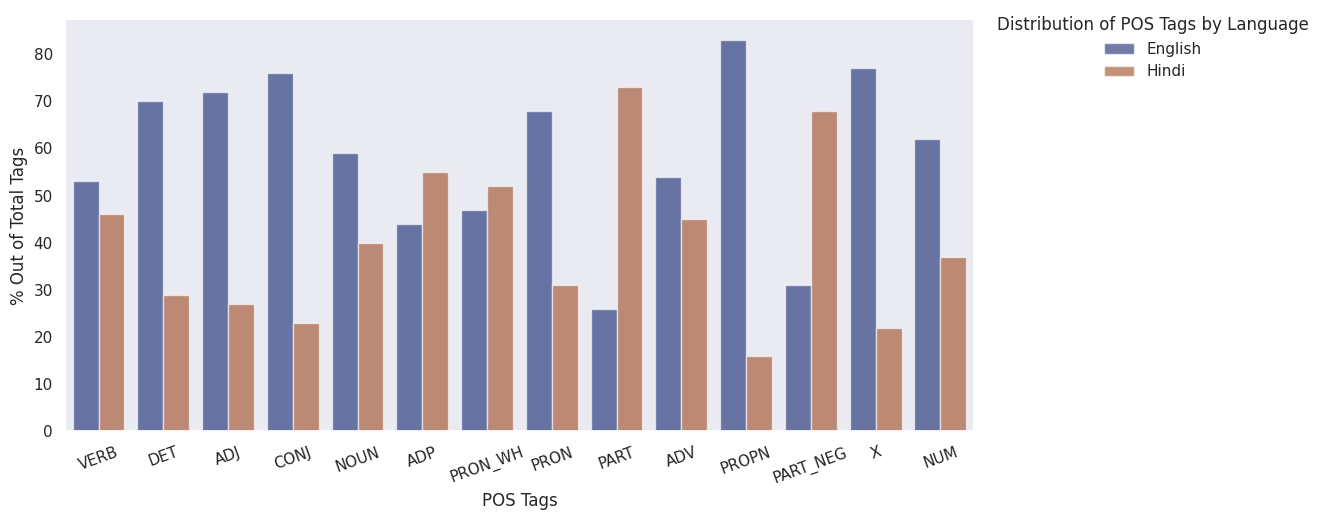

In [19]:
import seaborn as sns
sns.set_theme(style="dark")

g = sns.catplot(
    data=pos_df, kind="bar",
    x="pos_tags", y="count", hue="language",
    errorbar="sd", palette="dark", alpha=.6, height=5, aspect=2
)
g.despine(left=True)
g.set_xticklabels(rotation=20)
g.set_axis_labels("POS Tags", "% Out of Total Tags")
g.legend.set_title("Distribution of POS Tags by Language")
sns.move_legend(g, "upper left", bbox_to_anchor=(0.9, 1))

# **Topic Modelling: LDA**
**Note**: I wasn't familiar with doing LDA topic modelling this so followed a tutorial to write the below code: https://www.youtube.com/watch?v=b91ohJvEst4

In [9]:
!pip install pandas

In [8]:
master_corpus1 = pd.read_csv("/content/drive/MyDrive/CS521_FinalProject/Resources/master_corpus1_hinglish.csv") # reload master_corpus1 again

In [34]:
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer

# hinglish stop words we don't want to include in the topic modelling
hindi_sw = ['ka', 'nahi', 'ki', 'hai', 'ke', 'ho', 'kya', 'bhi', 'aa', 'toh', 'ko', 'ye', 'gaya']
hinglish_stop_words = list(text.ENGLISH_STOP_WORDS.union(hindi_sw))

# min_df specifies we want to keep words that show up in at least 5 docs/texts
# max_df specifies we want to keep words that show up in at most 75% or less docs/texts. This helps us exclude common words
tfidf_vectorizer = TfidfVectorizer(stop_words = hinglish_stop_words, min_df = 5, max_df = 0.75)

# tokenize the data, remove stop words, remove most common words, and return what is left
doc_term_matrix = tfidf_vectorizer.fit_transform(master_corpus1['text'])

print(f'Rows: {doc_term_matrix. shape[0]}, Columns: {doc_term_matrix. shape[1]}' )

Rows: 1192, Columns: 455


In [35]:
from sklearn. decomposition import LatentDirichletAllocation

num_topics = 3 # this is the number of topics we are trying to find all the texts
lda_topic_model = LatentDirichletAllocation(n_components = num_topics, random_state = 12345)
doc_topic_matrix = lda_topic_model. fit_transform(doc_term_matrix) # train and get texts' topic assignments
col_names = [f'Topic {x}' for x in range(1, num_topics + 1)]
doc_topic_df = pd.DataFrame(doc_topic_matrix, columns = col_names) # display each document's topic assignments
doc_topic_df.head(n = 10)

,Topic 1,Topic 2,Topic 3
0,0.105208,0.800013,0.094779
1,0.375825,0.071626,0.552549
2,0.113148,0.112585,0.774267
3,0.686465,0.102824,0.210711
4,0.333333,0.333333,0.333333
5,0.415973,0.090976,0.493050
6,0.610697,0.267548,0.121754
7,0.138516,0.718173,0.143311
8,0.113386,0.791682,0.094932
9,0.333333,0.333333,0.333333


In [36]:
num_words = 10 # the top words we want to display for each topic

# The below code gives us the top words for each topic
for topic, words in enumerate(lda_topic_model. components_):
  word_total = words.sum()
  sorted_words = words.argsort() [ ::- 1]
  print(f'\nTopic {topic + 1:02d}')
  for i in range(0, num_words):
    word = tfidf_vectorizer.get_feature_names_out() [sorted_words[i]]
    word_weight = words[sorted_words[i]]
    print(f'{word} ({word_weight :.3f})')


Topic 01
hain (18.133)
tu (17.494)
pe (14.963)
na (14.028)
bhai (13.356)
lodu (13.105)
tha (12.736)
dont (12.545)
kar (12.275)
hi (11.352)

Topic 02
saar (13.479)
panda (12.733)
koi (11.709)
ya (10.284)
like (8.636)
nee (8.288)
hua (8.084)
enna (7.775)
illa (7.493)
life (7.228)

Topic 03
se (21.963)
gt (16.358)
ji (16.000)
aaj (13.785)
bc (13.778)
mein (13.529)
haan (9.790)
time (9.676)
good (9.455)
song (7.968)
